In [1]:
import sys
sys.path.insert(0,'/Users/alexandra/Documents/master_thesis')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
import scipy.stats as scipy
import scipy as sci
import pandas_datareader as pdr
from pandas_datareader.yahoo.daily import YahooDailyReader


import datetime

"""
Load own functions/packages
"""

# set plotting style

from codelib.visualization.layout import DefaultStyle
from codelib.visualization.base import correlation_plot

DefaultStyle();

In [2]:
'''Import data'''

value = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value.csv",index_col='Date',parse_dates=True)
value_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_d.csv",index_col='Date',parse_dates=True)
value_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_bm.csv",index_col='Date',parse_dates=True)
value_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_bm_d.csv",index_col='Date',parse_dates=True)
value_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_aum.csv",index_col='Date',parse_dates=True)
value_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/value_aum_d.csv",index_col='Date',parse_dates=True)

momentum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum.csv",index_col='Date',parse_dates=True)
momentum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_d.csv",index_col='Date',parse_dates=True)
momentum_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_bm.csv",index_col='Date',parse_dates=True)
momentum_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_bm_d.csv",index_col='Date',parse_dates=True)
momentum_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_aum.csv",index_col='Date',parse_dates=True)
momentum_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/momentum_aum_d.csv",index_col='Date',parse_dates=True)

quality = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality.csv",index_col='Date',parse_dates=True)
quality_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_d.csv",index_col='Date',parse_dates=True)
quality_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_bm.csv",index_col='Date',parse_dates=True)
quality_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_bm_d.csv",index_col='Date',parse_dates=True)
quality_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_aum.csv",index_col='Date',parse_dates=True)
quality_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/quality_aum_d.csv",index_col='Date',parse_dates=True)

fundamentals = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals.csv",index_col='Date',parse_dates=True)
fundamentals_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_d.csv",index_col='Date',parse_dates=True)
fundamentals_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_bm.csv",index_col='Date',parse_dates=True)
fundamentals_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_bm_d.csv",index_col='Date',parse_dates=True)
fundamentals_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_aum.csv",index_col='Date',parse_dates=True)
fundamentals_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/fundamentals_aum_d.csv",index_col='Date',parse_dates=True)

multi = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor.csv",index_col='Date',parse_dates=True)
multi_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_d.csv",index_col='Date',parse_dates=True)
multi_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_aum.csv",index_col='Date',parse_dates=True)
multi_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_bm.csv",index_col='Date',parse_dates=True)
multi_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multi_bm_d.csv",index_col='Date',parse_dates=True)
multi_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/multifactor_aum_d.csv",index_col='Date',parse_dates=True)

dividend = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend.csv",index_col='Date',parse_dates=True)
dividend_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_d.csv",index_col='Date',parse_dates=True)
dividend_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_aum.csv",index_col='Date',parse_dates=True)
dividend_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_bm.csv",index_col='Date',parse_dates=True)
dividend_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_bm_d.csv",index_col='Date',parse_dates=True)
dividend_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/dividend_aum_d.csv",index_col='Date',parse_dates=True)

lowvol = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol.csv",index_col='Date',parse_dates=True)
lowvol_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_d.csv",index_col='Date',parse_dates=True)
lowvol_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_aum.csv",index_col='Date',parse_dates=True)
lowvol_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_bm.csv",index_col='Date',parse_dates=True)
lowvol_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_bm_d.csv",index_col='Date',parse_dates=True)
lowvol_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/lowvol_aum_d.csv",index_col='Date',parse_dates=True)

equal = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal.csv",index_col='Date',parse_dates=True)
equal_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_d.csv",index_col='Date',parse_dates=True)
equal_aum = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_aum.csv",index_col='Date',parse_dates=True)
equal_bm = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_bm.csv",index_col='Date',parse_dates=True)
equal_bm_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_bm_d.csv",index_col='Date',parse_dates=True)
equal_aum_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/equal_aum_d.csv",index_col='Date',parse_dates=True)

factors = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors.csv",index_col='Date',parse_dates=True)
factors_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors_d.csv",index_col='Date',parse_dates=True)
rf = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/rf.csv",index_col='Date',parse_dates=True)
rf_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/rf_d.csv",index_col='Date',parse_dates=True)
ind_pf=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/12_Industry_Portfolios.csv",index_col='Date',parse_dates=True)
sp500=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/sp500.csv",index_col='Date',parse_dates=True)
#factors=pd.concat([factors['MKT'],factors.iloc[:,1:].sub(rf['RF'],axis=0)],axis=1)
#factors_d=pd.concat([factors_d['MKT'],factors_d.iloc[:,1:].sub(rf_d['RF'],axis=0)],axis=1)

# Hypothesis 1

In [3]:
'''Calculate monthly returns'''

#etfs
value_return_m=(value/value.shift(1)-1)
momentum_return_m=(momentum/momentum.shift(1)-1)
quality_return_m=(quality/quality.shift(1)-1)
fundamentals_return_m=(fundamentals/fundamentals.shift(1)-1)
equal_return_m=(equal/equal.shift(1)-1)
lowvol_return_m=(lowvol/lowvol.shift(1)-1)
dividend_return_m=(dividend/dividend.shift(1)-1)
multi_return_m=(multi/multi.shift(1)-1)

#benchmarks
value_bm_return_m=(value_bm/value_bm.shift(1)-1)
momentum_bm_return_m=(momentum_bm/momentum_bm.shift(1)-1)
quality_bm_return_m=(quality_bm/quality_bm.shift(1)-1)
fundamentals_bm_return_m=(fundamentals_bm/fundamentals_bm.shift(1)-1)
equal_bm_return_m=(equal_bm/equal_bm.shift(1)-1)
multi_bm_return_m=(multi_bm/multi_bm.shift(1)-1)
dividend_bm_return_m=(dividend_bm/dividend_bm.shift(1)-1)
lowvol_bm_return_m=(lowvol_bm/lowvol_bm.shift(1)-1)

In [4]:
'''Calculate portfolio weights'''

value_weights=value_aum.div(value_aum.sum(axis=1),axis=0)
momentum_weights=momentum_aum.div(momentum_aum.sum(axis=1),axis=0)
quality_weights=quality_aum.div(quality_aum.sum(axis=1),axis=0)
fundamentals_weights=fundamentals_aum.div(fundamentals_aum.sum(axis=1),axis=0)
equal_weights=equal_aum.div(equal_aum.sum(axis=1),axis=0)
lowvol_weights=lowvol_aum.div(lowvol_aum.sum(axis=1),axis=0)
multi_weights=multi_aum.div(multi_aum.sum(axis=1),axis=0)
dividend_weights=dividend_aum.div(dividend_aum.sum(axis=1),axis=0)

In [5]:
'''Create portfolios and calculate total return'''
value_pf=(value_weights.shift(1)*value).sum(axis=1)[20:]
value_pf_index=value_pf/value_pf[0]

momentum_pf=(momentum_weights.shift(1)*momentum).sum(axis=1)[28:]
momentum_pf_index=momentum_pf/momentum_pf[0]

quality_pf=(quality_weights.shift(1)*quality).sum(axis=1)[37:]
quality_pf_index=quality_pf/quality_pf[0]

fundamentals_pf=(fundamentals_weights.shift(1)*fundamentals).sum(axis=1)[37:]
fundamentals_pf_index=fundamentals_pf/fundamentals_pf[0]

lowvol_pf=(lowvol_weights.shift(1)*lowvol).sum(axis=1)[49:]
lowvol_pf_index=lowvol_pf/lowvol_pf[0]

equal_pf=(equal_weights.shift(1)*equal).sum(axis=1)[1:]
equal_pf_index=equal_pf/equal_pf[0]

dividend_pf=(dividend_weights.shift(1)*dividend).sum(axis=1)[9:]
dividend_pf_index=dividend_pf/dividend_pf[0]

multi_pf=(multi_weights.shift(1)*multi).sum(axis=1)[6:]
multi_pf_index=multi_pf/multi_pf[0]

'''Save as files'''
multi_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/multi_index.csv")
value_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/value_index.csv")
quality_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/quality_index.csv")
momentum_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/momentum_index.csv")
fundamentals_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/fundamentals_index.csv")
lowvol_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/lowvol_index.csv")
equal_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/equal_index.csv")
dividend_pf_index.to_csv("/Users/alexandra/Documents/master_thesis/dividend_index.csv")

In [6]:
'''Calculate portfolio monthly returns'''

def pf_return(weights,returns):
    return (weights.shift(1)*returns).sum(axis=1)-rf['RF']

#etfs
value_pf_return_m=pf_return(value_weights,value_return_m)[20:]
momentum_pf_return_m=pf_return(momentum_weights,momentum_return_m)[28:]
quality_pf_return_m=pf_return(quality_weights,quality_return_m)[37:]
fundamentals_pf_return_m=pf_return(fundamentals_weights,fundamentals_return_m)[37:]
multi_pf_return_m=pf_return(multi_weights,multi_return_m)[6:]
equal_pf_return_m=pf_return(equal_weights,equal_return_m)[1:]
dividend_pf_return_m=pf_return(dividend_weights,dividend_return_m)[9:]
lowvol_pf_return_m=pf_return(lowvol_weights,lowvol_return_m)[49:]

#benchmarks
value_bm_pf_return_m=pf_return(value_weights,value_bm_return_m)[20:]
momentum_bm_pf_return_m=pf_return(momentum_weights,momentum_bm_return_m)[28:]
quality_bm_pf_return_m=pf_return(quality_weights,quality_bm_return_m)[37:]
fundamentals_bm_pf_return_m=pf_return(fundamentals_weights,fundamentals_bm_return_m)[37:]
multi_bm_pf_return_m=pf_return(multi_weights,multi_bm_return_m)[6:]
equal_bm_pf_return_m=pf_return(equal_weights,equal_bm_return_m)[1:]
dividend_bm_pf_return_m=pf_return(dividend_weights,dividend_bm_return_m)[9:]
lowvol_bm_pf_return_m=pf_return(lowvol_weights,lowvol_bm_return_m)[49:]

#difference
value_diff_return_m=value_pf_return_m-value_bm_pf_return_m
momentum_diff_return_m=momentum_pf_return_m-momentum_bm_pf_return_m
quality_diff_return_m=quality_pf_return_m-quality_bm_pf_return_m
fundamentals_diff_return_m=fundamentals_pf_return_m-fundamentals_bm_pf_return_m
lowvol_diff_return_m=lowvol_pf_return_m-lowvol_bm_pf_return_m
equal_diff_return_m=equal_pf_return_m-equal_bm_pf_return_m
multi_diff_return_m=multi_pf_return_m-multi_bm_pf_return_m
dividend_diff_return_m=dividend_pf_return_m-dividend_bm_pf_return_m

Text(0.5, 1.0, 'Correlation Matrix')

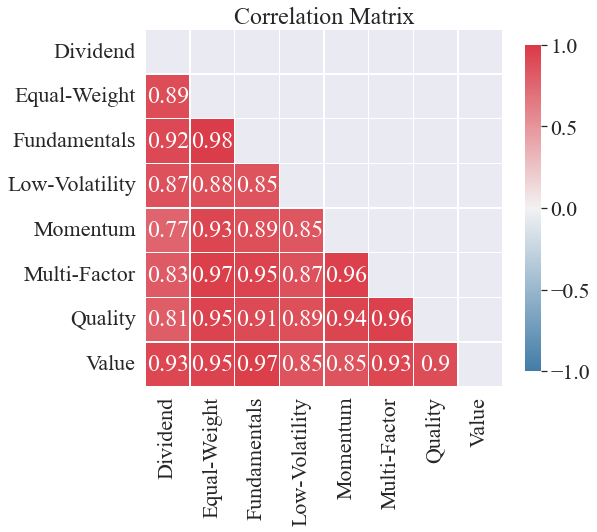

In [7]:
'''Calculate correlations (ETFs)'''

etf_pf=pd.concat([dividend_pf_return_m,equal_pf_return_m,fundamentals_pf_return_m,lowvol_pf_return_m,
                  momentum_pf_return_m,multi_pf_return_m,quality_pf_return_m,value_pf_return_m,],axis=1)[48:]
etf_pf_correl_matrix=np.corrcoef(etf_pf,rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(etf_pf_correl_matrix, names=['Dividend','Equal-Weight','Fundamentals','Low-Volatility',
                                              'Momentum','Multi-Factor','Quality','Value'], include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [8]:
'''Calculate portfolio annualized returns (since inception)'''

def pf_return_annualized(pf_monthly_returns):
    n = len(pf_monthly_returns)
    test=scipy.ttest_1samp(pf_monthly_returns,0)
    print(test)
    return np.prod(pf_monthly_returns+1) ** (12 / n) - 1

#etfs
value_pf_return_y=pf_return_annualized(value_pf_return_m)
momentum_pf_return_y=pf_return_annualized(momentum_pf_return_m)
quality_pf_return_y=pf_return_annualized(quality_pf_return_m)
fundamentals_pf_return_y=pf_return_annualized(fundamentals_pf_return_m)
equal_pf_return_y=pf_return_annualized(equal_pf_return_m)
multi_pf_return_y=pf_return_annualized(multi_pf_return_m)
dividend_pf_return_y=pf_return_annualized(dividend_pf_return_m)
lowvol_pf_return_y=pf_return_annualized(lowvol_pf_return_m)

print(value_pf_return_y,momentum_pf_return_y,quality_pf_return_y,fundamentals_pf_return_y,
      multi_pf_return_y,dividend_pf_return_y,equal_pf_return_y,lowvol_pf_return_y)



Ttest_1sampResult(statistic=2.279810141028017, pvalue=0.02363312139438294)
Ttest_1sampResult(statistic=2.4878831058711066, pvalue=0.01366793372368601)
Ttest_1sampResult(statistic=2.411467098805745, pvalue=0.016835254376993392)
Ttest_1sampResult(statistic=2.311395205199791, pvalue=0.02187815281194307)
Ttest_1sampResult(statistic=3.308575785594518, pvalue=0.0010903486934816843)
Ttest_1sampResult(statistic=2.8197357283191264, pvalue=0.005241081767005883)
Ttest_1sampResult(statistic=2.346880710766753, pvalue=0.019823760231623886)
Ttest_1sampResult(statistic=2.9061578375425645, pvalue=0.00412119728426169)
0.07674777678863798 0.08850300573851477 0.08519559987636671 0.09075448300725619 0.09494599521791147 0.07026018887066354 0.11881445538886592 0.09066572259200689


In [9]:
#benchmarks

value_bm_pf_return_y=pf_return_annualized(value_bm_pf_return_m)
momentum_bm_pf_return_y=pf_return_annualized(momentum_bm_pf_return_m)
quality_bm_pf_return_y=pf_return_annualized(quality_bm_pf_return_m)
fundamentals_bm_pf_return_y=pf_return_annualized(fundamentals_bm_pf_return_m)
equal_bm_pf_return_y=pf_return_annualized(equal_bm_pf_return_m)
multi_bm_pf_return_y=pf_return_annualized(multi_bm_pf_return_m)
dividend_bm_pf_return_y=pf_return_annualized(dividend_bm_pf_return_m)
lowvol_bm_pf_return_y=pf_return_annualized(lowvol_bm_pf_return_m)

print(value_bm_pf_return_y,momentum_bm_pf_return_y,quality_bm_pf_return_y,fundamentals_bm_pf_return_y,
      multi_bm_pf_return_y,dividend_bm_pf_return_y,equal_bm_pf_return_y,lowvol_bm_pf_return_y)

Ttest_1sampResult(statistic=2.2883767230779015, pvalue=0.023120318017196724)
Ttest_1sampResult(statistic=3.1312421176741916, pvalue=0.0020015429634700254)
Ttest_1sampResult(statistic=2.7937262842605746, pvalue=0.005741414329018598)
Ttest_1sampResult(statistic=2.1310405047060317, pvalue=0.03436453022377933)
Ttest_1sampResult(statistic=3.515837056142649, pvalue=0.0005291791972552329)
Ttest_1sampResult(statistic=3.477634574282137, pvalue=0.0006085499966707911)
Ttest_1sampResult(statistic=2.5545620094531625, pvalue=0.011310810903599618)
Ttest_1sampResult(statistic=2.4500801394729796, pvalue=0.015244335698765427)
0.07551168316240964 0.11343078643822468 0.09986273931769296 0.07724721447928373 0.11299666244882833 0.08184477573685212 0.11367607543608638 0.09107724076644952


In [10]:
#difference

value_diff_return_y=pf_return_annualized(value_diff_return_m)
momentum_diff_return_y=pf_return_annualized(momentum_diff_return_m)
quality_diff_return_y=pf_return_annualized(quality_diff_return_m)
fundamentals_diff_return_y=pf_return_annualized(fundamentals_diff_return_m)
equal_diff_return_y=pf_return_annualized(equal_diff_return_m)
multi_diff_return_y=pf_return_annualized(multi_diff_return_m)
dividend_diff_return_y=pf_return_annualized(dividend_diff_return_m)
lowvol_diff_return_y=pf_return_annualized(lowvol_diff_return_m)

print(value_diff_return_y,momentum_diff_return_y,quality_diff_return_y,fundamentals_diff_return_y,
      multi_diff_return_y,dividend_diff_return_y,equal_diff_return_y,lowvol_diff_return_y)

Ttest_1sampResult(statistic=0.24240920208933842, pvalue=0.8087019573893147)
Ttest_1sampResult(statistic=-2.274105552405854, pvalue=0.024021175260827816)
Ttest_1sampResult(statistic=-1.0158702395351509, pvalue=0.3109762843072627)
Ttest_1sampResult(statistic=1.976137050291944, pvalue=0.049578922932825245)
Ttest_1sampResult(statistic=0.858481332480387, pvalue=0.39153230002491524)
Ttest_1sampResult(statistic=-1.9976695737828027, pvalue=0.04697302179696342)
Ttest_1sampResult(statistic=-0.9219112515300332, pvalue=0.3575893698120155)
Ttest_1sampResult(statistic=-0.2661107591272641, pvalue=0.7904601792158925)
0.0012810166318446559 -0.022483510326801293 -0.0142114055453747 0.01422403050904042 -0.014972924378589214 -0.01354413536995358 0.006973173759762474 -0.007168167164212869


In [ ]:
'''Adjusted-benchmark returns box-plots'''
def box_plots(etf_return,bm_return):
    difference_y=[]
    etf_return=etf_return.sub(rf['RF'],axis=0)
    bm_return=bm_return.sub(rf['RF'],axis=0)
    etf_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    bm_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    for n in np.arange(0,216,12):
        n=n+12
        m=n-12
        differences=[]
        for i in range(len(etf_return.columns)):
            etf_returns=etf_return.iloc[:,i].dropna()
            bm_returns=bm_return.iloc[:,i].dropna()
            if (m==0):
                x = max(len(etf_returns[-n:]),0.5)
                differences.append(np.prod((etf_returns[-n:]-bm_returns[-n:])+1) ** (12/x) - 1)
            else:
                x=max(len(etf_returns[-n:-m]),0.5)
                differences.append(np.prod((etf_returns[-n:-m]-bm_returns[-n:-m])+1) ** (12/x) - 1)
            for value in differences:
                if (value==0):
                    differences.remove(value)
        difference_y.append(differences)
        years=difference_y        
    return years

value_return_y=box_plots(value_return_m,value_bm_return_m)
momentum_return_y=box_plots(momentum_return_m,momentum_bm_return_m)
quality_return_y=box_plots(quality_return_m,quality_bm_return_m)
fundamentals_return_y=box_plots(fundamentals_return_m,fundamentals_bm_return_m)
lowvol_return_y=box_plots(lowvol_return_m,lowvol_bm_return_m)
equal_return_y=box_plots(equal_return_m,equal_bm_return_m)
dividend_return_y=box_plots(dividend_return_m,dividend_bm_return_m)
multi_return_y=box_plots(multi_return_m,multi_bm_return_m)

In [177]:
'''Adjusted-benchmark returns box-plots'''
def box_plots(etf_return,bm_return):
    difference_y=[]
    etf_return=etf_return.sub(rf['RF'],axis=0)
    bm_return=bm_return.sub(rf['RF'],axis=0)
    etf_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    bm_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    for n in np.arange(0,228,12):
        n=n+12
        m=n-12
        differences=[]
        for i in range(len(etf_return.columns)):
            etf_returns=etf_return.iloc[:,i].dropna()
            bm_returns=bm_return.iloc[:,i].dropna()
            if (m==0):
                x = max(len(etf_returns[-n:]),0.5)
                differences.append(np.prod((etf_returns[-n:]-bm_returns[-n:])+1) ** (12/x) - 1)
            else:
                x=max(len(etf_returns[-n:-m]),0.5)
                differences.append(np.prod((etf_returns[-n:-m]-bm_returns[-n:-m])+1) ** (12/x) - 1)
            for value in differences:
                if (value==0):
                    differences.remove(value)
        difference_y.append(differences)
        years=difference_y        
    return years

value_return_y=box_plots(value_return_m,value_bm_return_m)
momentum_return_y=box_plots(momentum_return_m,momentum_bm_return_m)
quality_return_y=box_plots(quality_return_m,quality_bm_return_m)
fundamentals_return_y=box_plots(fundamentals_return_m,fundamentals_bm_return_m)
lowvol_return_y=box_plots(lowvol_return_m,lowvol_bm_return_m)
equal_return_y=box_plots(equal_return_m,equal_bm_return_m)
dividend_return_y=box_plots(dividend_return_m,dividend_bm_return_m)
multi_return_y=box_plots(multi_return_m,multi_bm_return_m)



12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228


(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

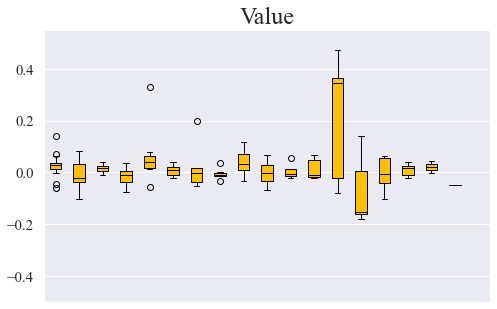

In [178]:
'''Box plots'''

fig, ax = plt.subplots(figsize=(8,5))

c='#FFC000'
ax=plt.boxplot(value_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Value')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

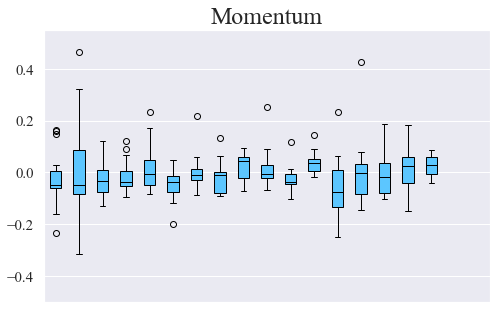

In [179]:
fig, ax = plt.subplots(figsize=(8,5))

c='#5CC6FF'
ax=plt.boxplot(momentum_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Momentum')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

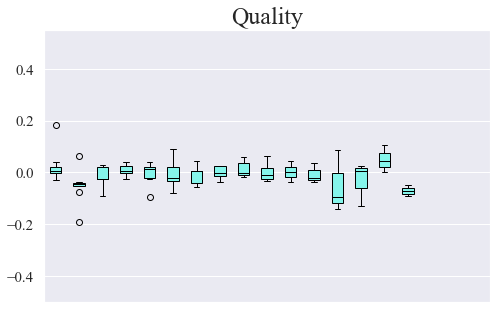

In [180]:
fig, ax = plt.subplots(figsize=(8,5))

c='#85F5EB'
ax=plt.boxplot(quality_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Quality')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

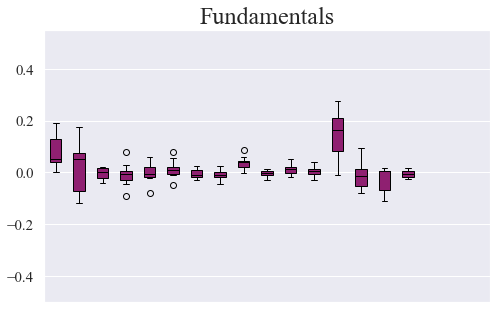

In [181]:
fig, ax = plt.subplots(figsize=(8,5))

c='#8F2071'
ax=plt.boxplot(fundamentals_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Fundamentals')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

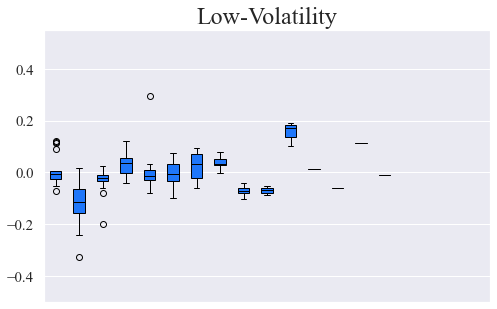

In [182]:
fig, ax = plt.subplots(figsize=(8,5))

c='#1F77FA'
ax=plt.boxplot(lowvol_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Low-Volatility')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

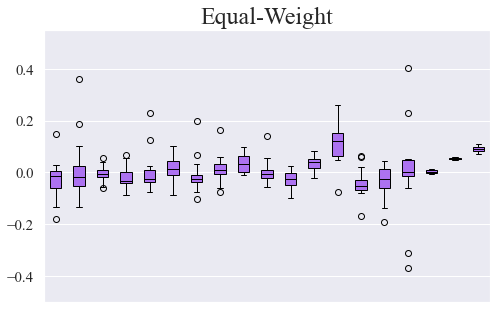

In [183]:
fig, ax = plt.subplots(figsize=(8,5))

c='#AC72F0'
ax=plt.boxplot(equal_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Equal-Weight')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

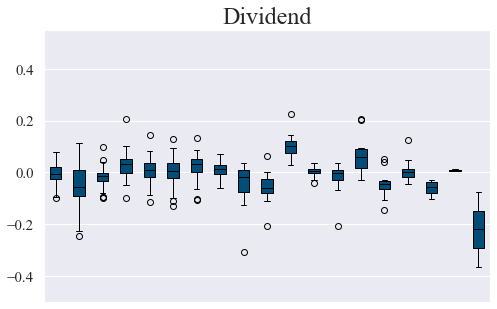

In [184]:
fig, ax = plt.subplots(figsize=(8,5))

c='#014D7A'
ax=plt.boxplot(dividend_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Dividend')
plt.xticks(ticks=[])
plt.yticks(size=15)

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

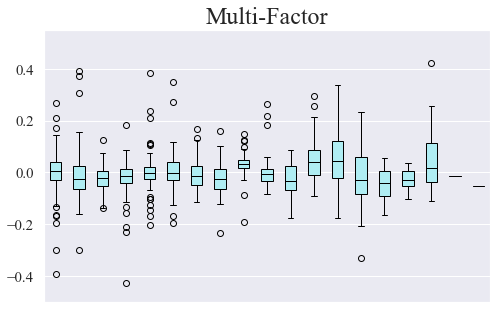

In [186]:
fig, ax = plt.subplots(figsize=(8,5))

c='#AFEDF3'
ax=plt.boxplot(multi_return_y,patch_artist=True,boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color=c, markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.ylim(-0.5,0.55)
plt.title('Multi-Factor')
plt.xticks(ticks=[])
plt.yticks(size=15)

In [13]:
'''Calculate portfolio annualized returns (1Y, 3Y, 5Y)'''

def pf_return_annualized_period(pf_monthly_returns,months):
    n = len(pf_monthly_returns[-months:])
    return np.prod(pf_monthly_returns[-months:]+1) ** (12 / n) - 1


'''1 year'''
#etfs
value_pf_return_1y=pf_return_annualized_period(value_pf_return_m,12)
momentum_pf_return_1y=pf_return_annualized_period(momentum_pf_return_m,12)
quality_pf_return_1y=pf_return_annualized_period(quality_pf_return_m,12)
fundamentals_pf_return_1y=pf_return_annualized_period(fundamentals_pf_return_m,12)
equal_pf_return_1y=pf_return_annualized_period(equal_pf_return_m,12)
multi_pf_return_1y=pf_return_annualized_period(multi_pf_return_m,12)
dividend_pf_return_1y=pf_return_annualized_period(dividend_pf_return_m,12)
lowvol_pf_return_1y=pf_return_annualized_period(lowvol_pf_return_m,12)

print('1 year etfs: ',value_pf_return_1y,momentum_pf_return_1y,quality_pf_return_1y,fundamentals_pf_return_1y,
      multi_pf_return_1y,dividend_pf_return_1y,equal_pf_return_1y,lowvol_pf_return_1y)

#benchmark
value_bm_pf_return_1y=pf_return_annualized_period(value_bm_pf_return_m,12)
momentum_bm_pf_return_1y=pf_return_annualized_period(momentum_bm_pf_return_m,12)
quality_bm_pf_return_1y=pf_return_annualized_period(quality_bm_pf_return_m,12)
fundamentals_bm_pf_return_1y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12)
equal_bm_pf_return_1y=pf_return_annualized_period(equal_bm_pf_return_m,12)
multi_bm_pf_return_1y=pf_return_annualized_period(multi_bm_pf_return_m,12)
dividend_bm_pf_return_1y=pf_return_annualized_period(dividend_bm_pf_return_m,12)
lowvol_bm_pf_return_1y=pf_return_annualized_period(lowvol_bm_pf_return_m,12)

print('1 year benchmarks: ',value_bm_pf_return_1y,momentum_bm_pf_return_1y,quality_bm_pf_return_1y,
      fundamentals_bm_pf_return_1y, multi_bm_pf_return_1y,dividend_bm_pf_return_1y,
      equal_bm_pf_return_1y,lowvol_bm_pf_return_1y)

#difference
value_diff_return_1y=pf_return_annualized_period(value_diff_return_m,12)
momentum_diff_return_1y=pf_return_annualized_period(momentum_diff_return_m,12)
quality_diff_return_1y=pf_return_annualized_period(quality_diff_return_m,12)
fundamentals_diff_return_1y=pf_return_annualized_period(fundamentals_diff_return_m,12)
equal_diff_return_1y=pf_return_annualized_period(equal_diff_return_m,12)
multi_diff_return_1y=pf_return_annualized_period(multi_diff_return_m,12)
dividend_diff_return_1y=pf_return_annualized_period(dividend_diff_return_m,12)
lowvol_diff_return_1y=pf_return_annualized_period(lowvol_diff_return_m,12)

print('1 year difference: ',value_diff_return_1y,momentum_diff_return_1y,quality_diff_return_1y,
      fundamentals_diff_return_1y, multi_diff_return_1y,dividend_diff_return_1y,
      equal_diff_return_1y,lowvol_diff_return_1y,'\n')

'''3 years'''
#etfs
value_pf_return_3y=pf_return_annualized_period(value_pf_return_m,12*3)
momentum_pf_return_3y=pf_return_annualized_period(momentum_pf_return_m,12*3)
quality_pf_return_3y=pf_return_annualized_period(quality_pf_return_m,12*3)
fundamentals_pf_return_3y=pf_return_annualized_period(fundamentals_pf_return_m,12*3)
equal_pf_return_3y=pf_return_annualized_period(equal_pf_return_m,12*3)
multi_pf_return_3y=pf_return_annualized_period(multi_pf_return_m,12*3)
dividend_pf_return_3y=pf_return_annualized_period(dividend_pf_return_m,12*3)
lowvol_pf_return_3y=pf_return_annualized_period(lowvol_pf_return_m,12*3)

print('3 years etfs: ',value_pf_return_3y,momentum_pf_return_3y,quality_pf_return_3y,fundamentals_pf_return_3y,
      multi_pf_return_3y,dividend_pf_return_3y,equal_pf_return_3y,lowvol_pf_return_3y)

#benchmark
value_bm_pf_return_3y=pf_return_annualized_period(value_bm_pf_return_m,12*3)
momentum_bm_pf_return_3y=pf_return_annualized_period(momentum_bm_pf_return_m,12*3)
quality_bm_pf_return_3y=pf_return_annualized_period(quality_bm_pf_return_m,12*3)
fundamentals_bm_pf_return_3y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12*3)
equal_bm_pf_return_3y=pf_return_annualized_period(equal_bm_pf_return_m,12*3)
multi_bm_pf_return_3y=pf_return_annualized_period(multi_bm_pf_return_m,12*3)
dividend_bm_pf_return_3y=pf_return_annualized_period(dividend_bm_pf_return_m,12*3)
lowvol_bm_pf_return_3y=pf_return_annualized_period(lowvol_bm_pf_return_m,12*3)

print('3 years benchmarks: ',value_bm_pf_return_3y,momentum_bm_pf_return_3y,quality_bm_pf_return_3y,
      fundamentals_bm_pf_return_3y, multi_bm_pf_return_3y,dividend_bm_pf_return_3y,
      equal_bm_pf_return_3y,lowvol_bm_pf_return_3y)

#difference
value_diff_return_3y=pf_return_annualized_period(value_diff_return_m,12*3)
momentum_diff_return_3y=pf_return_annualized_period(momentum_diff_return_m,12*3)
quality_diff_return_3y=pf_return_annualized_period(quality_diff_return_m,12*3)
fundamentals_diff_return_3y=pf_return_annualized_period(fundamentals_diff_return_m,12*3)
equal_diff_return_3y=pf_return_annualized_period(equal_diff_return_m,12*3)
multi_diff_return_3y=pf_return_annualized_period(multi_diff_return_m,12*3)
dividend_diff_return_3y=pf_return_annualized_period(dividend_diff_return_m,12*3)
lowvol_diff_return_3y=pf_return_annualized_period(lowvol_diff_return_m,12*3)

print('3 years difference: ',value_diff_return_3y,momentum_diff_return_3y,quality_diff_return_3y,
      fundamentals_diff_return_3y, multi_diff_return_3y,dividend_diff_return_3y,
      equal_diff_return_3y,lowvol_diff_return_3y,'\n')

'''5 years'''
#etfs
value_pf_return_5y=pf_return_annualized_period(value_pf_return_m,12*5)
momentum_pf_return_5y=pf_return_annualized_period(momentum_pf_return_m,12*5)
quality_pf_return_5y=pf_return_annualized_period(quality_pf_return_m,12*5)
fundamentals_pf_return_5y=pf_return_annualized_period(fundamentals_pf_return_m,12*5)
equal_pf_return_5y=pf_return_annualized_period(equal_pf_return_m,12*5)
multi_pf_return_5y=pf_return_annualized_period(multi_pf_return_m,12*5)
dividend_pf_return_5y=pf_return_annualized_period(dividend_pf_return_m,12*5)
lowvol_pf_return_5y=pf_return_annualized_period(lowvol_pf_return_m,12*5)

print('5 years: ',value_pf_return_5y,momentum_pf_return_5y,quality_pf_return_5y,fundamentals_pf_return_5y,
      multi_pf_return_5y,dividend_pf_return_5y,equal_pf_return_5y,lowvol_pf_return_5y)

#benchmark
value_bm_pf_return_5y=pf_return_annualized_period(value_bm_pf_return_m,12*5)
momentum_bm_pf_return_5y=pf_return_annualized_period(momentum_bm_pf_return_m,12*5)
quality_bm_pf_return_5y=pf_return_annualized_period(quality_bm_pf_return_m,12*5)
fundamentals_bm_pf_return_5y=pf_return_annualized_period(fundamentals_bm_pf_return_m,12*5)
equal_bm_pf_return_5y=pf_return_annualized_period(equal_bm_pf_return_m,12*5)
multi_bm_pf_return_5y=pf_return_annualized_period(multi_bm_pf_return_m,12*5)
dividend_bm_pf_return_5y=pf_return_annualized_period(dividend_bm_pf_return_m,12*5)
lowvol_bm_pf_return_5y=pf_return_annualized_period(lowvol_bm_pf_return_m,12*5)

print('5 years benchmarks: ',value_bm_pf_return_5y,momentum_bm_pf_return_5y,quality_bm_pf_return_5y,
      fundamentals_bm_pf_return_5y, multi_bm_pf_return_5y,dividend_bm_pf_return_5y,
      equal_bm_pf_return_5y,lowvol_bm_pf_return_5y)

#difference
value_diff_return_5y=pf_return_annualized_period(value_diff_return_m,12*5)
momentum_diff_return_5y=pf_return_annualized_period(momentum_diff_return_m,12*5)
quality_diff_return_5y=pf_return_annualized_period(quality_diff_return_m,12*5)
fundamentals_diff_return_5y=pf_return_annualized_period(fundamentals_diff_return_m,12*5)
equal_diff_return_5y=pf_return_annualized_period(equal_diff_return_m,12*5)
multi_diff_return_5y=pf_return_annualized_period(multi_diff_return_m,12*5)
dividend_diff_return_5y=pf_return_annualized_period(dividend_diff_return_m,12*5)
lowvol_diff_return_5y=pf_return_annualized_period(lowvol_diff_return_m,12*5)

print('5 years difference: ',value_diff_return_5y,momentum_diff_return_5y,quality_diff_return_5y,
      fundamentals_diff_return_5y, multi_diff_return_5y,dividend_diff_return_5y,
      equal_diff_return_5y,lowvol_diff_return_5y)


1 year etfs:  0.2724292844954408 0.13428781843252047 0.2524423825292019 0.3016782790083179 0.24171888691653565 0.24857573548737633 0.2646604910089212 0.21142618839988625
1 year benchmarks:  0.2517542178504788 0.2573057642610377 0.26336956800634526 0.21973233440343876 0.24736523028356294 0.2541819014432971 0.273020234345847 0.25360266934971243
1 year difference:  0.01556844762634535 -0.10267366559204916 -0.007576029281769703 0.06786868142892155 -0.0053643451963441 -0.004454776235811697 -0.007791409949456818 -0.03398014786809611 

3 years etfs:  0.15732844751217656 0.22255314444327823 0.234531764248606 0.2032841163708603 0.21554245603424893 0.14882899218946855 0.24103417377757896 0.15505031142104175
3 years benchmarks:  0.16610640641132357 0.3118737492349275 0.2512042931192515 0.17845611946170425 0.23564182541651713 0.17302459016864047 0.27479694596955184 0.22854258899976787
3 years difference:  -0.003839011643037016 -0.07208004503682941 -0.015081755456688772 0.0241586110791705 -0.015515

In [187]:
'''Calculate portfolio annualized returns (yearly)'''

def pf_return_annualized_yearly(pf_monthly_returns):
    annualized_return=[]
    for n in np.arange(0,228,12):
        n=n+12
        m=n-12
        if (m==0):
            x = max(len(pf_monthly_returns[-n:]),0.5)
            annualized_return.append(np.prod((pf_monthly_returns[-n:])+1) ** (12/x) - 1)
        else:
            x=max(len(pf_monthly_returns[-n:-m]),0.5)
            annualized_return.append(np.prod((pf_monthly_returns[-n:-m])+1) ** (12/x) - 1)
    return annualized_return


#etfs
value_pf_return_yearly=pf_return_annualized_yearly(value_pf_return_m)
quality_pf_return_yearly=pf_return_annualized_yearly(quality_pf_return_m)
momentum_pf_return_yearly=pf_return_annualized_yearly(momentum_pf_return_m)
fundamentals_pf_return_yearly=pf_return_annualized_yearly(fundamentals_pf_return_m)
lowvol_pf_return_yearly=pf_return_annualized_yearly(lowvol_pf_return_m)
equal_pf_return_yearly=pf_return_annualized_yearly(equal_pf_return_m)
dividend_pf_return_yearly=pf_return_annualized_yearly(dividend_pf_return_m)
multi_pf_return_yearly=pf_return_annualized_yearly(multi_pf_return_m)

print('yearly etfs: ',"\n",value_pf_return_yearly,"\n",momentum_pf_return_yearly,"\n",quality_pf_return_yearly,"\n",fundamentals_pf_return_yearly,"\n",
      multi_pf_return_yearly,"\n",dividend_pf_return_yearly,"\n",equal_pf_return_yearly,"\n",lowvol_pf_return_yearly)

#difference
value_diff_return_yearly=pf_return_annualized_yearly(value_diff_return_m)
quality_diff_return_yearly=pf_return_annualized_yearly(quality_diff_return_m)
momentum_diff_return_yearly=pf_return_annualized_yearly(momentum_diff_return_m)
fundamentals_diff_return_yearly=pf_return_annualized_yearly(fundamentals_diff_return_m)
lowvol_diff_return_yearly=pf_return_annualized_yearly(lowvol_diff_return_m)
equal_diff_return_yearly=pf_return_annualized_yearly(equal_diff_return_m)
dividend_diff_return_yearly=pf_return_annualized_yearly(dividend_diff_return_m)
multi_diff_return_yearly=pf_return_annualized_yearly(multi_diff_return_m)

print('\n yearly diff: ',"\n",value_diff_return_yearly,"\n",momentum_diff_return_yearly,"\n",quality_diff_return_yearly,"\n",fundamentals_diff_return_yearly,"\n",
      multi_diff_return_yearly,"\n",dividend_diff_return_yearly,"\n",equal_diff_return_yearly,"\n",lowvol_diff_return_yearly)


yearly etfs:  
 [0.2724292844954408, -0.021089630341182608, 0.24449541338154201, -0.13681787137726065, 0.17036092087895272, 0.1858893360977245, -0.06068654453999367, 0.1089483746321418, 0.3538143669644611, 0.16332117948868996, 0.019741214895741654, 0.15482506622683534, 0.17344842458872156, -0.34334181808163, -0.0394631461834124, 0.18336953998234318, 0.04221112862499021, 0.27598244087471757, 0.0] 
 [0.13428781843252047, 0.291915071284103, 0.24694129665833398, -0.06493591855288816, 0.2443099989516535, 0.00803223609149284, 0.02702251622012808, 0.07489503449954626, 0.3302289188604772, 0.16213056635333278, -0.005418125747869262, 0.2377570977592549, 0.22158168436035885, -0.42760620758059853, 0.10931737530400332, 0.04406999978406323, 0.18410463964473478, 0.0, 0.0] 
 [0.2524423825292019, 0.15369023291057649, 0.3021464598286596, -0.06980907080153209, 0.20816467241769843, 0.11707580929872474, 0.005831488062370438, 0.11669100233493124, 0.3344111567444008, 0.15894791028882116, 0.03363051705007458,

In [15]:
'''Calculate portfolio annualized standard deviation'''

def pf_std_annualized(pf_monthly_returns):
    std_m=pf_monthly_returns.std()
    return np.sqrt(12)*std_m
    
#etfs
value_pf_std_y=pf_std_annualized(value_pf_return_m)
momentum_pf_std_y=pf_std_annualized(momentum_pf_return_m)
quality_pf_std_y=pf_std_annualized(quality_pf_return_m)
fundamentals_pf_std_y=pf_std_annualized(fundamentals_pf_return_m)
equal_pf_std_y=pf_std_annualized(equal_pf_return_m)
multi_pf_std_y=pf_std_annualized(multi_pf_return_m)
dividend_pf_std_y=pf_std_annualized(dividend_pf_return_m)
lowvol_pf_std_y=pf_std_annualized(lowvol_pf_return_m)

print(value_pf_std_y,momentum_pf_std_y,quality_pf_std_y,fundamentals_pf_std_y,
      multi_pf_std_y,dividend_pf_std_y,equal_pf_std_y,lowvol_pf_std_y)


0.15937191640573917 0.16197254525261667 0.1568210962090775 0.17879583773087843 0.15878995989341663 0.14342693913841956 0.1670892497245904 0.12710496558606646


In [16]:
#benchmark
value_bm_pf_std_y=pf_std_annualized(value_bm_pf_return_m)
momentum_bm_pf_std_y=pf_std_annualized(momentum_bm_pf_return_m)
quality_bm_pf_std_y=pf_std_annualized(quality_bm_pf_return_m)
fundamentals_bm_pf_std_y=pf_std_annualized(fundamentals_bm_pf_return_m)
equal_bm_pf_std_y=pf_std_annualized(equal_bm_pf_return_m)
multi_bm_pf_std_y=pf_std_annualized(multi_bm_pf_return_m)
dividend_bm_pf_std_y=pf_std_annualized(dividend_bm_pf_return_m)
lowvol_bm_pf_std_y=pf_std_annualized(lowvol_bm_pf_return_m)

print(value_bm_pf_std_y,momentum_bm_pf_std_y,quality_bm_pf_std_y,fundamentals_bm_pf_std_y,
      multi_bm_pf_std_y,dividend_bm_pf_std_y,equal_bm_pf_std_y,lowvol_bm_pf_std_y)

0.15565346383474504 0.15736760080909268 0.15396720078275392 0.1666088685000316 0.14682579370190954 0.15199772169004036 0.1476847094428375 0.15832827487302956


In [17]:
'''Sharpe ratio'''

def sr(returns,std):
    return returns/std

#etfs
value_sr=sr(value_pf_return_y,value_pf_std_y)
momentum_sr=sr(momentum_pf_return_y,momentum_pf_std_y)
quality_sr=sr(quality_pf_return_y,quality_pf_std_y)
fundamentals_sr=sr(fundamentals_pf_return_y,fundamentals_pf_std_y)
lowvol_sr=sr(lowvol_pf_return_y,lowvol_pf_std_y)
dividend_sr=sr(dividend_pf_return_y,dividend_pf_std_y)
equal_sr=sr(equal_pf_return_y,equal_pf_std_y)
multi_sr=sr(multi_pf_return_y,multi_pf_std_y)


print(value_sr,momentum_sr,quality_sr,fundamentals_sr,
      multi_sr,dividend_sr,equal_sr,lowvol_sr)


0.4815639952101009 0.5464074519572631 0.5432661927243639 0.50758722439534 0.5979344996474673 0.48986744953719125 0.7110837805825642 0.71331377317918


In [18]:
#benchmark
value_bm_sr=sr(value_bm_pf_return_y,value_bm_pf_std_y)
momentum_bm_sr=sr(momentum_bm_pf_return_y,momentum_bm_pf_std_y)
quality_bm_sr=sr(quality_bm_pf_return_y,quality_bm_pf_std_y)
fundamentals_bm_sr=sr(fundamentals_bm_pf_return_y,fundamentals_bm_pf_std_y)
lowvol_bm_sr=sr(lowvol_bm_pf_return_y,lowvol_bm_pf_std_y)
dividend_bm_sr=sr(dividend_bm_pf_return_y,dividend_bm_pf_std_y)
equal_bm_sr=sr(equal_bm_pf_return_y,equal_bm_pf_std_y)
multi_bm_sr=sr(multi_bm_pf_return_y,multi_bm_pf_std_y)


print(value_bm_sr,momentum_bm_sr,quality_bm_sr,fundamentals_bm_sr,
      multi_bm_sr,dividend_bm_sr,equal_bm_sr,lowvol_bm_sr)


0.4851269049982676 0.7208013965710194 0.6485974857632063 0.46364407354023346 0.7695968099327138 0.5384605428741436 0.7697213602203388 0.5752430564880997


In [19]:
'''Difference p-value'''
def sr_ttest(etf_return,bm_return):
    etf_sr=[]
    bm_sr=[]
    etf_return=etf_return.sub(rf['RF'],axis=0)
    bm_return=bm_return.sub(rf['RF'],axis=0)
    etf_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    bm_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    for i in range(len(etf_return.columns)):
        etf_returns=etf_return.iloc[:,i].dropna()
        bm_returns=bm_return.iloc[:,i].dropna()
        n = len(etf_returns)
        etf_return_y=np.prod(etf_returns+1) ** (12 / n) - 1
        bm_return_y=np.prod(bm_returns[etf_returns.index[0]:]+1) ** (12 / n) - 1
        etf_std_y=etf_returns.std()*np.sqrt(12)
        bm_std_y=bm_returns[etf_returns.index[0]:].std()*np.sqrt(12)
        etf_sr.append(etf_return_y/etf_std_y)
        bm_sr.append(bm_return_y/bm_std_y)
    test=scipy.ttest_ind(etf_sr,bm_sr)
    return test

value_diff_sr=sr_ttest(value_return_m,value_bm_return_m)
momentum_diff_sr=sr_ttest(momentum_return_m,momentum_bm_return_m)
fundamentals_diff_sr=sr_ttest(fundamentals_return_m,fundamentals_bm_return_m)
quality_diff_sr=sr_ttest(quality_return_m,quality_bm_return_m)
lowvol_diff_sr=sr_ttest(lowvol_return_m,lowvol_bm_return_m)
equal_diff_sr=sr_ttest(equal_return_m,equal_bm_return_m)
dividend_diff_sr=sr_ttest(dividend_return_m,dividend_bm_return_m)
multi_diff_sr=sr_ttest(multi_return_m,multi_bm_return_m)

print(value_diff_sr,momentum_diff_sr,quality_diff_sr,fundamentals_diff_sr,
      multi_diff_sr,dividend_diff_sr,equal_diff_sr,lowvol_diff_sr)



Ttest_indResult(statistic=-0.06233761942711853, pvalue=0.9507707305717223) Ttest_indResult(statistic=-1.5801442123634912, pvalue=0.12157653435620823) Ttest_indResult(statistic=-0.17468026917765586, pvalue=0.8635221405091403) Ttest_indResult(statistic=1.3675521046153953, pvalue=0.18315852490459367) Ttest_indResult(statistic=-1.5851054427554614, pvalue=0.11469764011684241) Ttest_indResult(statistic=-0.21128040283493021, pvalue=0.833107213763236) Ttest_indResult(statistic=-1.1580886786515379, pvalue=0.25255773107905116) Ttest_indResult(statistic=0.11491278438594216, pvalue=0.909190221746542)


In [20]:
'''Sortino ratio'''

def sortino(pf_monthly_returns):
    n = len(pf_monthly_returns)
    d=np.minimum(pf_monthly_returns-pf_monthly_returns.mean(),0)
    dd=np.sqrt(12)*np.sqrt(np.sum(d**2)/(n-1))
    pf=np.prod(pf_monthly_returns+1) ** (12 / n) - 1
    return pf/dd

#etfs
value_sortino=sortino(value_pf_return_m)
momentum_sortino=sortino(momentum_pf_return_m)
quality_sortino=sortino(quality_pf_return_m)
fundamentals_sortino=sortino(fundamentals_pf_return_m)
equal_sortino=sortino(equal_pf_return_m)
multi_sortino=sortino(multi_pf_return_m)
dividend_sortino=sortino(dividend_pf_return_m)
lowvol_sortino=sortino(lowvol_pf_return_m)

print(value_sortino,momentum_sortino,quality_sortino,fundamentals_sortino,
      multi_sortino,dividend_sortino,equal_sortino,lowvol_sortino)

0.6275467411323429 0.7016776344255028 0.6972159175685648 0.6750480388803566 0.7761419898018916 0.6242700662828945 0.9562342864042205 0.8868357370420236


In [21]:
#benchmark
value_bm_sortino=sortino(value_bm_pf_return_m)
momentum_bm_sortino=sortino(momentum_bm_pf_return_m)
quality_bm_sortino=sortino(quality_bm_pf_return_m)
fundamentals_bm_sortino=sortino(fundamentals_bm_pf_return_m)
equal_bm_sortino=sortino(equal_bm_pf_return_m)
multi_bm_sortino=sortino(multi_bm_pf_return_m)
dividend_bm_sortino=sortino(dividend_bm_pf_return_m)
lowvol_bm_sortino=sortino(lowvol_bm_pf_return_m)

print(value_bm_sortino,momentum_bm_sortino,quality_bm_sortino,fundamentals_bm_sortino,
      multi_bm_sortino,dividend_bm_sortino,equal_bm_sortino,lowvol_bm_sortino)

0.6262238725474599 0.9515046567822464 0.8458561881850323 0.6001516729167742 0.9952785734000693 0.6958141386241848 1.017396259063807 0.7480025018594052


In [22]:
'''Difference p-value'''
def sortino_ttest(etf_return,bm_return):
    etf_sortino=[]
    bm_sortino=[]
    etf_return=etf_return.sub(rf['RF'],axis=0)
    bm_return=bm_return.sub(rf['RF'],axis=0)
    etf_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    bm_return.replace([np.inf, -np.inf], np.nan, inplace=True)
    for i in range(len(etf_return.columns)):
        etf_returns=etf_return.iloc[:,i].dropna()
        bm_returns=bm_return.iloc[:,i].dropna()
        n = len(etf_returns)
        etf_return_y=np.prod(etf_returns+1) ** (12 / n) - 1
        bm_return_y=np.prod(bm_returns[etf_returns.index[0]:]+1) ** (12 / n) - 1
        etf_d=np.minimum(etf_returns-etf_returns.mean(),0)
        etf_dd=np.sqrt(12)*np.sqrt(np.sum(etf_d**2)/(n-1))
        bm_d=np.minimum(bm_returns[etf_returns.index[0]:]-bm_returns[etf_returns.index[0]:].mean(),0)
        bm_dd=np.sqrt(12)*np.sqrt(np.sum(bm_d**2)/(n-1))
        etf_sortino.append(etf_return_y/etf_dd)
        bm_sortino.append(bm_return_y/bm_dd)
    test=scipy.ttest_ind(etf_sortino,bm_sortino)
    return test

value_diff_sortino=sortino_ttest(value_return_m,value_bm_return_m)
momentum_diff_sortino=sortino_ttest(momentum_return_m,momentum_bm_return_m)
fundamentals_diff_sortino=sortino_ttest(fundamentals_return_m,fundamentals_bm_return_m)
quality_diff_sortino=sortino_ttest(quality_return_m,quality_bm_return_m)
lowvol_diff_sortino=sortino_ttest(lowvol_return_m,lowvol_bm_return_m)
equal_diff_sortino=sortino_ttest(equal_return_m,equal_bm_return_m)
dividend_diff_sortino=sortino_ttest(dividend_return_m,dividend_bm_return_m)
multi_diff_sortino=sortino_ttest(multi_return_m,multi_bm_return_m)

print(value_diff_sortino,momentum_diff_sortino,quality_diff_sortino,fundamentals_diff_sortino,
      multi_diff_sortino,dividend_diff_sortino,equal_diff_sortino,lowvol_diff_sortino)


Ttest_indResult(statistic=0.0332399381223213, pvalue=0.9737371203208514) Ttest_indResult(statistic=-1.6348531454182744, pvalue=0.10955396870388424) Ttest_indResult(statistic=-0.14014005954566022, pvalue=0.8902983455490077) Ttest_indResult(statistic=1.6249691763673877, pvalue=0.1162315649251041) Ttest_indResult(statistic=-1.6490893386261642, pvalue=0.10087347676262463) Ttest_indResult(statistic=-0.14902443654130065, pvalue=0.8818405883071649) Ttest_indResult(statistic=-1.02219627305128, pvalue=0.31181238582733756) Ttest_indResult(statistic=-0.075069743160652, pvalue=0.9405991872994315)


In [23]:
'''Information ratio'''

def ir(pf_return,bm_return):
    te=(pf_return-bm_return).std()*np.sqrt(12)
    n = len(pf_return)
    pf=np.prod(pf_return+1) ** (12 / n) - 1
    bm=np.prod(bm_return+1) ** (12 / n) - 1
    return (pf-bm)/te

value_ir=ir(value_pf_return_m,value_bm_pf_return_m)
momentum_ir=ir(momentum_pf_return_m,momentum_bm_pf_return_m)
quality_ir=ir(quality_pf_return_m,quality_bm_pf_return_m)
fundamentals_ir=ir(fundamentals_pf_return_m,fundamentals_bm_pf_return_m)
lowvol_ir=ir(lowvol_pf_return_m,lowvol_bm_pf_return_m)
equal_ir=ir(equal_pf_return_m,equal_bm_pf_return_m)
dividend_ir=ir(dividend_pf_return_m,dividend_bm_pf_return_m)
multi_ir=ir(multi_pf_return_m,multi_bm_pf_return_m)

print(value_ir,momentum_ir,quality_ir,fundamentals_ir,
      multi_ir,dividend_ir,equal_ir,lowvol_ir)

0.041943261871942424 -0.6313632783311584 -0.2866839306295257 0.45849049358792515 -0.5736374169336627 -0.2066488400327994 0.13131679769164664 -0.005909885749500493


In [24]:
'''CAPM'''

def capm(pf_return,bm_return):
    X = sm.add_constant(bm_return)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    
    #Calculate predicted Y values and standardize them
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
    #Calculate standardized residuals
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    
    #Breush-Pagan test
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    
    #Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    print("alpha: ", results.params[0:-1]*12)
    print("\n Breusch-Pagan test: ", test)
    print("\n VIF: ", vif, "\n")
    return standardized_predicted_Y,standardized_residuals,print(results.summary())

print('VALUE')
value_capm=capm(value_pf_return_m,value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_capm=capm(momentum_pf_return_m,momentum_bm_pf_return_m)
print('\n QUALITY')
quality_capm=capm(quality_pf_return_m,quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_capm=capm(fundamentals_pf_return_m,fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_capm=capm(lowvol_pf_return_m,lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_capm=capm(equal_pf_return_m,equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_capm=capm(dividend_pf_return_m,dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_capm=capm(multi_pf_return_m,multi_bm_pf_return_m)

VALUE
alpha:  const    0.001178
dtype: float64

 Breusch-Pagan test:  (2.753200835999266, 0.09705994686321948, 2.763255358928861, 0.09796529604312817)

 VIF:     VIF Factor features
0    1.025176    const
1    1.000000        0 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2250.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          3.68e-113
Time:                        06:49:04   Log-Likelihood:                 700.32
No. Observations:                 209   AIC:                            -1397.
Df Residuals:                     207   BIC:                            -1390.
Df Model:                           1                                         
Covariance Type:                  HC3                      

## Assumptions

__Linearity__

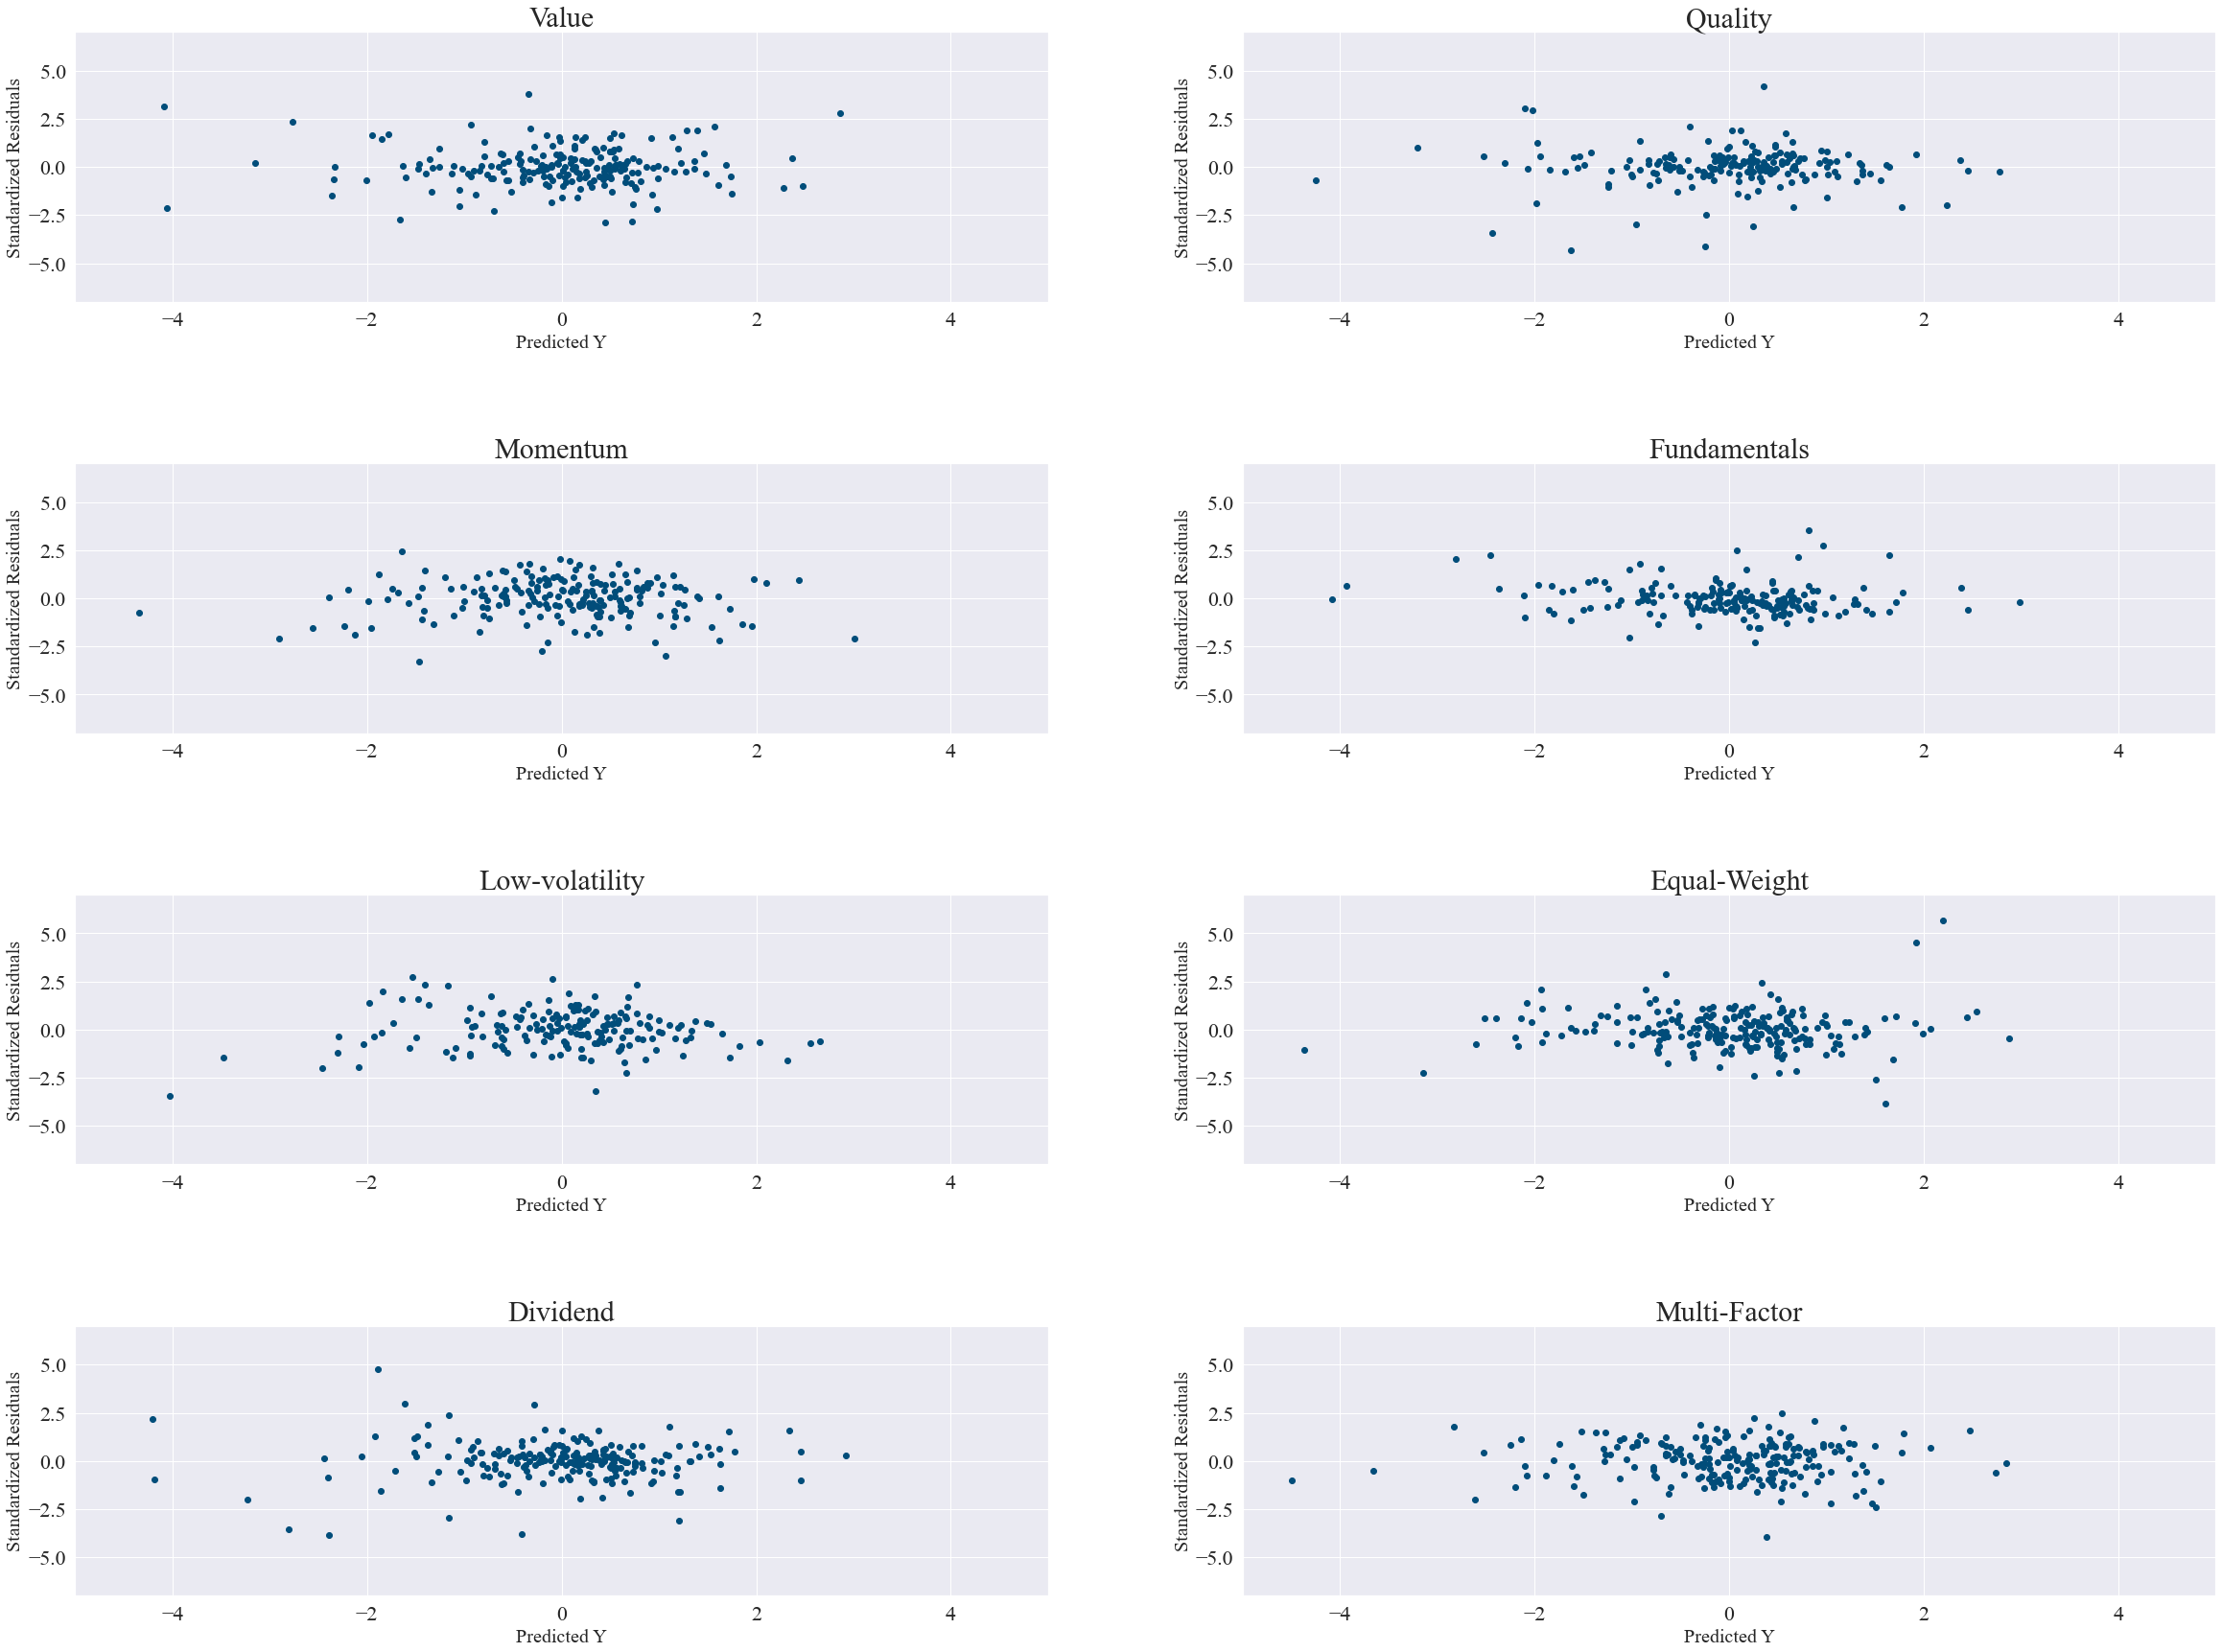

In [25]:
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_capm,quality_capm,momentum_capm,fundamentals_capm,
            lowvol_capm,equal_capm,dividend_capm,multi_capm]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 2


In [26]:
'''Calculate APB benchmark excess returns (t-36)'''

#01/2013-12/2015
value_apb_20132015=(value_return_m[121:157].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
quality_apb_20132015=(quality_return_m[121:157].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
momentum_apb_20132015=(momentum_return_m[121:157].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
fundamentals_apb_20132015=(fundamentals_return_m[121:157].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
lowvol_apb_20132015=(lowvol_return_m[121:157].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
equal_apb_20132015=(equal_return_m[121:157].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
dividend_apb_20132015=(dividend_return_m[121:157].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]
multi_apb_20132015=(multi_return_m[121:157].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[121:157]

#01/2014-12/2016
value_apb_20142016=(value_return_m[133:169].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
quality_apb_20142016=(quality_return_m[133:169].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
momentum_apb_20142016=(momentum_return_m[133:169].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
fundamentals_apb_20142016=(fundamentals_return_m[133:169].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
lowvol_apb_20142016=(lowvol_return_m[133:169].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
equal_apb_20142016=(equal_return_m[133:169].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
dividend_apb_20142016=(dividend_return_m[133:169].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]
multi_apb_20142016=(multi_return_m[133:169].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[133:169]

#01/2015-12/2017
value_apb_20152017=(value_return_m[145:181].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
quality_apb_20152017=(quality_return_m[145:181].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
momentum_apb_20152017=(momentum_return_m[145:181].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
fundamentals_apb_20152017=(fundamentals_return_m[145:181].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
lowvol_apb_20152017=(lowvol_return_m[145:181].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
equal_apb_20152017=(equal_return_m[145:181].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
dividend_apb_20152017=(dividend_return_m[145:181].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]
multi_apb_20152017=(multi_return_m[145:181].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[145:181]

#01/2016-12/2018
value_apb_20162018=(value_return_m[157:193].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
quality_apb_20162018=(quality_return_m[157:193].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
momentum_apb_20162018=(momentum_return_m[157:193].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
fundamentals_apb_20162018=(fundamentals_return_m[157:193].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
lowvol_apb_20162018=(lowvol_return_m[157:193].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
equal_apb_20162018=(equal_return_m[157:193].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
dividend_apb_20162018=(dividend_return_m[157:193].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]
multi_apb_20162018=(multi_return_m[157:193].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:193]

#01/2017-12/2019
value_apb_20172019=(value_return_m[169:205].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
quality_apb_20172019=(quality_return_m[169:205].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
momentum_apb_20172019=(momentum_return_m[169:205].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
fundamentals_apb_20172019=(fundamentals_return_m[169:205].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
lowvol_apb_20172019=(lowvol_return_m[169:205].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
equal_apb_20172019=(equal_return_m[169:205].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
dividend_apb_20172019=(dividend_return_m[169:205].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]
multi_apb_20172019=(multi_return_m[169:205].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:205]

#01/2018-12/2020
value_apb_20182020=(value_return_m[181:217].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
quality_apb_20182020=(quality_return_m[181:217].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
momentum_apb_20182020=(momentum_return_m[181:217].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
fundamentals_apb_20182020=(fundamentals_return_m[181:217].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
lowvol_apb_20182020=(lowvol_return_m[181:217].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
equal_apb_20182020=(equal_return_m[181:217].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
dividend_apb_20182020=(dividend_return_m[181:217].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]
multi_apb_20182020=(multi_return_m[181:217].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:217]



In [27]:
'''Regress APB excess returns against the 6-factor model and save the residuals + alpha (t-36)'''

def carhart(pf_return,factors):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
    
    residuals = results.resid
    alpha=results.params[0:1]
    r_squared=results.rsquared
    alpha_t=results.tvalues[0]
    alpha_p=results.pvalues[0]
    data=([results.params[0],alpha_t,alpha_p,r_squared])
    
    #Calculate predicted Y values and standardize them
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
    #Calculate standardized residuals
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    
    #Breush-Pagan test
    bp = sms.het_breuschpagan(results.resid, results.model.exog)
    if (bp[1]<=0.05):
        bp_r=1
    else:
        bp_r=0
    #Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif["features"] =['intercept','BM','SMB','HML','MOM','BAB','QMJ']
    vif['not passed']=[0,0,0,0,0,0,0]
    for i in range(0,7):
        if (vif.iloc[i,0]<=10):
            vif.iloc[i,2]=0
        else:
            vif.iloc[i,2]=1
    
    #Durbin-Watson test
    dw=durbin_watson(results.resid)
    if (1.5<=dw<=2.5):
        dw_r=0
    else:
        dw_r=1
        
    #Jarque-Bera test
    jb=jarque_bera(results.resid)
    if (jb[1]<=0.05):
        jb_r=1
    else:
        jb_r=0
        
    print('results: ',data)  
    #return standardized_predicted_Y,standardized_residuals
    #print(results.summary())
    return residuals.to_frame('Residuals + alpha')+alpha.array
    #return bp_r,jb_r,dw_r,vif

#01/2013-12/2015
value_apb_20132015_carhart=carhart(value_apb_20132015,factors[121:157])
quality_apb_20132015_carhart=carhart(quality_apb_20132015,factors[121:157])
momentum_apb_20132015_carhart=carhart(momentum_apb_20132015,factors[121:157])
fundamentals_apb_20132015_carhart=carhart(fundamentals_apb_20132015,factors[121:157])
lowvol_apb_20132015_carhart=carhart(lowvol_apb_20132015,factors[121:157])
equal_apb_20132015_carhart=carhart(equal_apb_20132015,factors[121:157])
dividend_apb_20132015_carhart=carhart(dividend_apb_20132015,factors[121:157])
multi_apb_20132015_carhart=carhart(multi_apb_20132015,factors[121:157])

#01/2014-12/2016
value_apb_20142016_carhart=carhart(value_apb_20142016,factors[133:169])
quality_apb_20142016_carhart=carhart(quality_apb_20142016,factors[133:169])
momentum_apb_20142016_carhart=carhart(momentum_apb_20142016,factors[133:169])
fundamentals_apb_20142016_carhart=carhart(fundamentals_apb_20142016,factors[133:169])
lowvol_apb_20142016_carhart=carhart(lowvol_apb_20142016,factors[133:169])
equal_apb_20142016_carhart=carhart(equal_apb_20142016,factors[133:169])
dividend_apb_20142016_carhart=carhart(dividend_apb_20142016,factors[133:169])
multi_apb_20142016_carhart=carhart(multi_apb_20142016,factors[133:169])

#01/2015-12/2017
value_apb_20152017_carhart=carhart(value_apb_20152017,factors[145:181])
quality_apb_20152017_carhart=carhart(quality_apb_20152017,factors[145:181])
momentum_apb_20152017_carhart=carhart(momentum_apb_20152017,factors[145:181])
fundamentals_apb_20152017_carhart=carhart(fundamentals_apb_20152017,factors[145:181])
lowvol_apb_20152017_carhart=carhart(lowvol_apb_20152017,factors[145:181])
equal_apb_20152017_carhart=carhart(equal_apb_20152017,factors[145:181])
dividend_apb_20152017_carhart=carhart(dividend_apb_20152017,factors[145:181])
multi_apb_20152017_carhart=carhart(multi_apb_20152017,factors[145:181])

#01/2016-12/2018
value_apb_20162018_carhart=carhart(value_apb_20162018,factors[157:193])
quality_apb_20162018_carhart=carhart(quality_apb_20162018,factors[157:193])
momentum_apb_20162018_carhart=carhart(momentum_apb_20162018,factors[157:193])
fundamentals_apb_20162018_carhart=carhart(fundamentals_apb_20162018,factors[157:193])
lowvol_apb_20162018_carhart=carhart(lowvol_apb_20162018,factors[157:193])
equal_apb_20162018_carhart=carhart(equal_apb_20162018,factors[157:193])
dividend_apb_20162018_carhart=carhart(dividend_apb_20162018,factors[157:193])
multi_apb_20162018_carhart=carhart(multi_apb_20162018,factors[157:193])

#01/2017-12/2019
value_apb_20172019_carhart=carhart(value_apb_20172019,factors[169:205])
quality_apb_20172019_carhart=carhart(quality_apb_20172019,factors[169:205])
momentum_apb_20172019_carhart=carhart(momentum_apb_20172019,factors[169:205])
fundamentals_apb_20172019_carhart=carhart(fundamentals_apb_20172019,factors[169:205])
lowvol_apb_20172019_carhart=carhart(lowvol_apb_20172019,factors[169:205])
equal_apb_20172019_carhart=carhart(equal_apb_20172019,factors[169:205])
dividend_apb_20172019_carhart=carhart(dividend_apb_20172019,factors[169:205])
multi_apb_20172019_carhart=carhart(multi_apb_20172019,factors[169:205])

#01/2018-12/2020
value_apb_20182020_carhart=carhart(value_apb_20182020,factors[181:217])
quality_apb_20182020_carhart=carhart(quality_apb_20182020,factors[181:217])
momentum_apb_20182020_carhart=carhart(momentum_apb_20182020,factors[181:217])
fundamentals_apb_20182020_carhart=carhart(fundamentals_apb_20182020,factors[181:217])
lowvol_apb_20182020_carhart=carhart(lowvol_apb_20182020,factors[181:217])
equal_apb_20182020_carhart=carhart(equal_apb_20182020,factors[181:217])
dividend_apb_20182020_carhart=carhart(dividend_apb_20182020,factors[181:217])
multi_apb_20182020_carhart=carhart(multi_apb_20182020,factors[181:217])

results:  [0.000890148789396375, 0.5132546698281025, 0.6077731883575884, 0.9670329152984214]
results:  [-0.0008724131869048708, -0.5690488212431176, 0.5693230085994809, 0.968408505146192]
results:  [-0.001598867945425924, -1.2812097755144602, 0.20011999343592224, 0.9804596278155453]
results:  [-4.0005711420592054e-05, -0.04600623987938637, 0.9633052764729771, 0.9904076611158906]
results:  [-0.004713083372275384, -1.7717708829637404, 0.07643259776957793, 0.8671357611950694]
results:  [0.0014877390511058564, 1.3624666123139595, 0.17305067401616714, 0.9873620436334163]
results:  [-0.0018854365156856813, -1.0981080235564606, 0.27215732216981803, 0.9449350963378865]
results:  [0.0005768887928892898, 0.7312659157748226, 0.46461674511918616, 0.9896777046273141]
results:  [-0.0005811429421112325, -0.3811473144229254, 0.7030939405668817, 0.9578001378962684]
results:  [8.423361770881505e-06, 0.007433358232250328, 0.9940690928501501, 0.97060420096891]
results:  [-0.00026680126142917095, -0.260184

In [28]:
'''Calculate excess returns for each ETF in each rolling period (t-36)'''

#01/2013-12/2015
value_etfs_20132015=(value_return_m[121:157].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
quality_etfs_20132015=(quality_return_m[121:157].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
momentum_etfs_20132015=(momentum_return_m[121:157].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
fundamentals_etfs_20132015=(fundamentals_return_m[121:157].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
lowvol_etfs_20132015=(lowvol_return_m[121:157].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
equal_etfs_20132015=(equal_return_m[121:157].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
dividend_etfs_20132015=(dividend_return_m[121:157].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values
multi_etfs_20132015=(multi_return_m[121:157].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[121:157].values

#01/2014-12/2016
value_etfs_20142016=(value_return_m[133:169].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
quality_etfs_20142016=(quality_return_m[133:169].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
momentum_etfs_20142016=(momentum_return_m[133:169].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
fundamentals_etfs_20142016=(fundamentals_return_m[133:169].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
lowvol_etfs_20142016=(lowvol_return_m[133:169].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
equal_etfs_20142016=(equal_return_m[133:169].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
dividend_etfs_20142016=(dividend_return_m[133:169].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values
multi_etfs_20142016=(multi_return_m[133:169].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[133:169].values

#01/2015-12/2017
value_etfs_20152017=(value_return_m[145:181].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
quality_etfs_20152017=(quality_return_m[145:181].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
momentum_etfs_20152017=(momentum_return_m[145:181].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
fundamentals_etfs_20152017=(fundamentals_return_m[145:181].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
lowvol_etfs_20152017=(lowvol_return_m[145:181].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
equal_etfs_20152017=(equal_return_m[145:181].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
dividend_etfs_20152017=(dividend_return_m[145:181].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values
multi_etfs_20152017=(multi_return_m[145:181].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[145:181].values

#01/2016-12/2018
value_etfs_20162018=(value_return_m[157:193].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
quality_etfs_20162018=(quality_return_m[157:193].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
momentum_etfs_20162018=(momentum_return_m[157:193].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
fundamentals_etfs_20162018=(fundamentals_return_m[157:193].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
lowvol_etfs_20162018=(lowvol_return_m[157:193].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
equal_etfs_20162018=(equal_return_m[157:193].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
dividend_etfs_20162018=(dividend_return_m[157:193].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values
multi_etfs_20162018=(multi_return_m[157:193].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:193].values

#01/2017-12/2019
value_etfs_20172019=(value_return_m[169:205].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
quality_etfs_20172019=(quality_return_m[169:205].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
momentum_etfs_20172019=(momentum_return_m[169:205].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
fundamentals_etfs_20172019=(fundamentals_return_m[169:205].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
lowvol_etfs_20172019=(lowvol_return_m[169:205].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
equal_etfs_20172019=(equal_return_m[169:205].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
dividend_etfs_20172019=(dividend_return_m[169:205].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values
multi_etfs_20172019=(multi_return_m[169:205].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:205].values

#01/2018-12/2020
value_etfs_20182020=(value_return_m[181:217].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
quality_etfs_20182020=(quality_return_m[181:217].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
momentum_etfs_20182020=(momentum_return_m[181:217].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
fundamentals_etfs_20182020=(fundamentals_return_m[181:217].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
lowvol_etfs_20182020=(lowvol_return_m[181:217].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
equal_etfs_20182020=(equal_return_m[181:217].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
dividend_etfs_20182020=(dividend_return_m[181:217].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values
multi_etfs_20182020=(multi_return_m[181:217].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:217].values

In [475]:
'''Calculate APB benchmark excess returns (t+12)'''

#01/2016-12/2016
value_apb_2016=(value_return_m[157:169].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
quality_apb_2016=(quality_return_m[157:169].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
momentum_apb_2016=(momentum_return_m[157:169].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
fundamentals_apb_2016=(fundamentals_return_m[157:169].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
lowvol_apb_2016=(lowvol_return_m[157:169].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
equal_apb_2016=(equal_return_m[157:169].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
dividend_apb_2016=(dividend_return_m[157:169].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]
multi_apb_2016=(multi_return_m[157:169].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[157:169]

#01/2017-12/2017
value_apb_2017=(value_return_m[169:181].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
quality_apb_2017=(quality_return_m[169:181].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
momentum_apb_2017=(momentum_return_m[169:181].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
fundamentals_apb_2017=(fundamentals_return_m[169:181].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
lowvol_apb_2017=(lowvol_return_m[169:181].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
equal_apb_2017=(equal_return_m[169:181].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
dividend_apb_2017=(dividend_return_m[169:181].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]
multi_apb_2017=(multi_return_m[169:181].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[169:181]

#01/2018-12/2018
value_apb_2018=(value_return_m[181:193].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
quality_apb_2018=(quality_return_m[181:193].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
momentum_apb_2018=(momentum_return_m[181:193].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
fundamentals_apb_2018=(fundamentals_return_m[181:193].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
lowvol_apb_2018=(lowvol_return_m[181:193].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
equal_apb_2018=(equal_return_m[181:193].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
dividend_apb_2018=(dividend_return_m[181:193].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]
multi_apb_2018=(multi_return_m[181:193].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[181:193]

#01/2019-12/2019
value_apb_2019=(value_return_m[193:205].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
quality_apb_2019=(quality_return_m[193:205].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
momentum_apb_2019=(momentum_return_m[193:205].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
fundamentals_apb_2019=(fundamentals_return_m[193:205].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
lowvol_apb_2019=(lowvol_return_m[193:205].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
equal_apb_2019=(equal_return_m[193:205].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
dividend_apb_2019=(dividend_return_m[193:205].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]
multi_apb_2019=(multi_return_m[193:205].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[193:205]

#01/2020-12/2020
value_apb_2020=(value_return_m[205:217].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
quality_apb_2020=(quality_return_m[205:217].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
momentum_apb_2020=(momentum_return_m[205:217].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
fundamentals_apb_2020=(fundamentals_return_m[205:217].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
lowvol_apb_2020=(lowvol_return_m[205:217].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
equal_apb_2020=(equal_return_m[205:217].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
dividend_apb_2020=(dividend_return_m[205:217].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]
multi_apb_2020=(multi_return_m[205:217].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[205:217]

#01/2021-12/2021
value_apb_2021=(value_return_m[217:229].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
quality_apb_2021=(quality_return_m[217:229].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
momentum_apb_2021=(momentum_return_m[217:229].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
fundamentals_apb_2021=(fundamentals_return_m[217:229].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
lowvol_apb_2021=(lowvol_return_m[217:229].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
equal_apb_2021=(equal_return_m[217:229].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
dividend_apb_2021=(dividend_return_m[217:229].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]
multi_apb_2021=(multi_return_m[217:229].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan)).mean(axis=1)-rf['RF'].iloc[217:229]

In [476]:
'''Regress ETF excess returns against the Carhart factors + the residuals & APB alpha and sort 
top/bottom quantiles based on alpha t statistics (t-36)'''

def apb_carhart(etf_return,factors,apb_factor):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ'],apb_factor))
    X = sm.add_constant(X)
    etf=etf_return.columns
    alpha_t=[]
    alpha=[]
    alpha_p=[]
    bp_r=0
    dw_r=0
    jb_r=0
    vif = pd.DataFrame()
    vif["VIF Factor"] = [0,0,0,0,0,0,0,0]
    vif["features"] =['intercept','BM','SMB','HML','MOM','BAB','QMJ','adj']
    vif['not passed']=[0,0,0,0,0,0,0,0]
    #calculate alpha and alpha t-statistics
    for i in range(len(etf_return.columns)):
        model = sm.OLS(etf_return.iloc[:,i],X,missing='drop')
        results = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
        alpha.append(results.params[0])
        alpha_t.append(results.tvalues[0])
        alpha_p.append(results.pvalues[0])
        #Calculate predicted Y values and standardize them
        #predicted_Y=results.predict()
        #standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
        #Calculate standardized residuals
        #influence = results.get_influence()
        #standardized_residuals = influence.resid_studentized_internal
    
        #Breush-Pagan test
        bp = sms.het_breuschpagan(results.resid, results.model.exog)
        if (bp[1]<=0.05):
            bp_r=bp_r+1
        else:
            bp_r=bp_r+0
            
        #Calculate VIF
        vif["VIF Factor"] = [variance_inflation_factor(X, z) for z in range(X.shape[1])]
        for j in range(0,8):
            if (vif.iloc[j,0]<=10):
                vif.iloc[j,2]=vif.iloc[j,2]+0
            else:
                vif.iloc[j,2]=vif.iloc[j,2]+1
    
        #Durbin-Watson test
        dw=durbin_watson(results.resid)
        if (1.5<=dw<=2.5):
            dw_r=dw_r+0
        else:
            dw_r=dw_r+1

        #Jarque-Bera test
        jb=jarque_bera(results.resid)
        if (jb[1]<=0.05):
            jb_r=jb_r+1
        else:
            jb_r=jb_r+0
        
        
       
        
    #print count of positive and negative alphas 
    alpha=np.array(alpha)
    alpha_p=(np.array([alpha,alpha_p]))
    alpha_positive=len(alpha[alpha>0])
    alpha_negative=len(alpha[alpha<0])
    alpha_positive_significant=0
    alpha_negative_significant=0

    for i in range(len(etf_return.columns)):
        if (alpha_p[0][i][alpha_p[0][i]>0]):
            if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
                alpha_positive_significant=alpha_positive_significant+1
            else:
                alpha_positive_significant=alpha_positive_significant+0
    
        if (alpha_p[0][i][alpha_p[0][i]<0]):
            if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
                alpha_negative_significant=alpha_negative_significant+1
            else:
                alpha_negative_significant=alpha_negative_significant+0
    print(alpha_positive,alpha_negative,alpha_positive_significant,alpha_negative_significant)
    
    #calculate top and bottom quantiles
    #quantile_1=np.quantile(alpha_t,0.25)
    #quantile_4=np.quantile(alpha_t,0.75)
    
    #calculate the median
    median=np.quantile(alpha_t,0.5)
    
    #sort ETFs in the top and bottom halves
    alpha_t=pd.DataFrame([np.array(alpha_t)],index=['alpha t stat'],columns = etf)
    alpha_t_bottom=(alpha_t[alpha_t<=median]).dropna(axis=1,how='all')
    alpha_t_top=(alpha_t[alpha_t>median]).dropna(axis=1,how='all')

    
    #filter only ETFs in the top and bottom quantiles
    #alpha_t=pd.DataFrame([np.array(alpha_t)],index=['alpha t stat'],columns = etf)
    #alpha_t_bottom=(alpha_t[alpha_t<=quantile_1]).dropna(axis=1,how='all')
    #alpha_t_top=(alpha_t[alpha_t>=quantile_4]).dropna(axis=1,how='all')

    #return winner and loser ETFs
    losers_period_1=alpha_t_bottom.columns
    winers_period_1=alpha_t_top.columns
    return losers_period_1,winers_period_1,alpha_t_bottom,alpha_t_top
    #return bp_r,jb_r,dw_r,vif



#01/2013-12/2015
value_etfs_20132015_carhart=apb_carhart(value_etfs_20132015,factors[121:157],value_apb_20132015_carhart)
quality_etfs_20132015_carhart=apb_carhart(quality_etfs_20132015,factors[121:157],quality_apb_20132015_carhart)
momentum_etfs_20132015_carhart=apb_carhart(momentum_etfs_20132015,factors[121:157],momentum_apb_20132015_carhart)
fundamentals_etfs_20132015_carhart=apb_carhart(fundamentals_etfs_20132015,factors[121:157],fundamentals_apb_20132015_carhart)
lowvol_etfs_20132015_carhart=apb_carhart(lowvol_etfs_20132015,factors[121:157],lowvol_apb_20132015_carhart)
equal_etfs_20132015_carhart=apb_carhart(equal_etfs_20132015,factors[121:157],equal_apb_20132015_carhart)
dividend_etfs_20132015_carhart=apb_carhart(dividend_etfs_20132015,factors[121:157],dividend_apb_20132015_carhart)
multi_etfs_20132015_carhart=apb_carhart(multi_etfs_20132015,factors[121:157],multi_apb_20132015_carhart)

#01/2014-12/2016
value_etfs_20142016_carhart=apb_carhart(value_etfs_20142016,factors[133:169],value_apb_20142016_carhart)
quality_etfs_20142016_carhart=apb_carhart(quality_etfs_20142016,factors[133:169],quality_apb_20142016_carhart)
momentum_etfs_20142016_carhart=apb_carhart(momentum_etfs_20142016,factors[133:169],momentum_apb_20142016_carhart)
fundamentals_etfs_20142016_carhart=apb_carhart(fundamentals_etfs_20142016,factors[133:169],fundamentals_apb_20142016_carhart)
lowvol_etfs_20142016_carhart=apb_carhart(lowvol_etfs_20142016,factors[133:169],lowvol_apb_20142016_carhart)
equal_etfs_20142016_carhart=apb_carhart(equal_etfs_20142016,factors[133:169],equal_apb_20142016_carhart)
dividend_etfs_20142016_carhart=apb_carhart(dividend_etfs_20142016,factors[133:169],dividend_apb_20142016_carhart)
multi_etfs_20142016_carhart=apb_carhart(multi_etfs_20142016,factors[133:169],multi_apb_20142016_carhart)

#01/2015-12/2017
value_etfs_20152017_carhart=apb_carhart(value_etfs_20152017,factors[145:181],value_apb_20152017_carhart)
quality_etfs_20152017_carhart=apb_carhart(value_etfs_20152017,factors[145:181],quality_apb_20152017_carhart)
momentum_etfs_20152017_carhart=apb_carhart(momentum_etfs_20152017,factors[145:181],momentum_apb_20152017_carhart)
fundamentals_etfs_20152017_carhart=apb_carhart(fundamentals_etfs_20152017,factors[145:181],fundamentals_apb_20152017_carhart)
lowvol_etfs_20152017_carhart=apb_carhart(lowvol_etfs_20152017,factors[145:181],lowvol_apb_20152017_carhart)
equal_etfs_20152017_carhart=apb_carhart(equal_etfs_20152017,factors[145:181],equal_apb_20152017_carhart)
dividend_etfs_20152017_carhart=apb_carhart(dividend_etfs_20152017,factors[145:181],dividend_apb_20152017_carhart)
multi_etfs_20152017_carhart=apb_carhart(multi_etfs_20152017,factors[145:181],multi_apb_20152017_carhart)

#01/2016-12/2018
value_etfs_20162018_carhart=apb_carhart(value_etfs_20162018,factors[157:193],value_apb_20162018_carhart)
quality_etfs_20162018_carhart=apb_carhart(quality_etfs_20162018,factors[157:193],quality_apb_20162018_carhart)
momentum_etfs_20162018_carhart=apb_carhart(momentum_etfs_20162018,factors[157:193],momentum_apb_20162018_carhart)
fundamentals_etfs_20162018_carhart=apb_carhart(fundamentals_etfs_20162018,factors[157:193],fundamentals_apb_20162018_carhart)
lowvol_etfs_20162018_carhart=apb_carhart(lowvol_etfs_20162018,factors[157:193],lowvol_apb_20162018_carhart)
equal_etfs_20162018_carhart=apb_carhart(equal_etfs_20162018,factors[157:193],equal_apb_20162018_carhart)
dividend_etfs_20162018_carhart=apb_carhart(dividend_etfs_20162018,factors[157:193],dividend_apb_20162018_carhart)
multi_etfs_20162018_carhart=apb_carhart(multi_etfs_20162018,factors[157:193],multi_apb_20162018_carhart)

#01/2017-12/2019
value_etfs_20172019_carhart=apb_carhart(value_etfs_20172019,factors[169:205],value_apb_20172019_carhart)
quality_etfs_20172019_carhart=apb_carhart(quality_etfs_20172019,factors[169:205],quality_apb_20172019_carhart)
momentum_etfs_20172019_carhart=apb_carhart(momentum_etfs_20172019,factors[169:205],momentum_apb_20172019_carhart)
fundamentals_etfs_20172019_carhart=apb_carhart(fundamentals_etfs_20172019,factors[169:205],fundamentals_apb_20172019_carhart)
lowvol_etfs_20172019_carhart=apb_carhart(lowvol_etfs_20172019,factors[169:205],lowvol_apb_20172019_carhart)
equal_etfs_20172019_carhart=apb_carhart(equal_etfs_20172019,factors[169:205],equal_apb_20172019_carhart)
dividend_etfs_20172019_carhart=apb_carhart(dividend_etfs_20172019,factors[169:205],dividend_apb_20172019_carhart)
multi_etfs_20172019_carhart=apb_carhart(multi_etfs_20172019,factors[169:205],multi_apb_20172019_carhart)

#01/2018-12/2020
value_etfs_20182020_carhart=apb_carhart(value_etfs_20182020,factors[181:217],value_apb_20182020_carhart)
quality_etfs_20182020_carhart=apb_carhart(quality_etfs_20182020,factors[181:217],quality_apb_20182020_carhart)
momentum_etfs_20182020_carhart=apb_carhart(momentum_etfs_20182020,factors[181:217],momentum_apb_20182020_carhart)
fundamentals_etfs_20182020_carhart=apb_carhart(fundamentals_etfs_20182020,factors[181:217],fundamentals_apb_20182020_carhart)
lowvol_etfs_20182020_carhart=apb_carhart(lowvol_etfs_20182020,factors[181:217],lowvol_apb_20182020_carhart)
equal_etfs_20182020_carhart=apb_carhart(equal_etfs_20182020,factors[181:217],equal_apb_20182020_carhart)
dividend_etfs_20182020_carhart=apb_carhart(dividend_etfs_20182020,factors[181:217],dividend_apb_20182020_carhart)
multi_etfs_20182020_carhart=apb_carhart(multi_etfs_20182020,factors[181:217],multi_apb_20182020_carhart)

<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

4 3 0 0
2 2 0 0
8 7 1 3
4 4 0 0
3 4 1 0


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

10 10 0 0
10 10 2 3


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

17 22 2 5
3 4 0 0
2 3 0 0
7 9 3 3


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

7 4 0 0
3 4 1 0
10 10 2 0


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

9 16 2 1


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

15 25 0 3
3 4 0 0
1 6 0 0
6 10 1 2


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

6 5 1 1
7 4 1 1
7 14 0 2


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

13 15 3 1


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

17 27 3 3
4 5 0 0
2 4 0 0
9 10 3 4


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

7 4 0 1
7 6 0 0
8 13 1 6


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

13 22 3 0


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

26 34 6 4
6 6 0 0
4 4 0 0


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

9 12 1 1
7 5 0 1
11 4 0 1


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

10 12 1 1


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

18 27 2 1


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

35 39 6 3
7 6 0 0
4 5 0 1


<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

10 12 0 0
8 4 0 0
11 7 1 1


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

11 13 0 0


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

24 24 1 1
42 47 8 4


<ipython-input-476-08c111c85ada>:74: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-476-08c111c85ada>:81: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-476-08c111c85ada>:80: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

In [477]:
'''Regress APB excess returns against the Carhart factors and save the residuals + alpha (t+12)'''

#01/2016-12/2016
value_apb_2016_carhart=carhart(value_apb_2016,factors[157:169])
quality_apb_2016_carhart=carhart(quality_apb_2016,factors[157:169])
momentum_apb_2016_carhart=carhart(momentum_apb_2016,factors[157:169])
fundamentals_apb_2016_carhart=carhart(fundamentals_apb_2016,factors[157:169])
lowvol_apb_2016_carhart=carhart(lowvol_apb_2016,factors[157:169])
equal_apb_2016_carhart=carhart(equal_apb_2016,factors[157:169])
dividend_apb_2016_carhart=carhart(dividend_apb_2016,factors[157:169])
multi_apb_2016_carhart=carhart(multi_apb_2016,factors[157:169])

#01/2017-12/2017
value_apb_2017_carhart=carhart(value_apb_2017,factors[169:181])
quality_apb_2017_carhart=carhart(quality_apb_2017,factors[169:181])
momentum_apb_2017_carhart=carhart(momentum_apb_2017,factors[169:181])
fundamentals_apb_2017_carhart=carhart(fundamentals_apb_2017,factors[169:181])
lowvol_apb_2017_carhart=carhart(lowvol_apb_2017,factors[169:181])
equal_apb_2017_carhart=carhart(equal_apb_2017,factors[169:181])
dividend_apb_2017_carhart=carhart(dividend_apb_2017,factors[169:181])
multi_apb_2017_carhart=carhart(multi_apb_2017,factors[169:181])

#01/2018-12/2018
value_apb_2018_carhart=carhart(value_apb_2018,factors[181:193])
quality_apb_2018_carhart=carhart(quality_apb_2018,factors[181:193])
momentum_apb_2018_carhart=carhart(momentum_apb_2018,factors[181:193])
fundamentals_apb_2018_carhart=carhart(fundamentals_apb_2018,factors[181:193])
lowvol_apb_2018_carhart=carhart(lowvol_apb_2018,factors[181:193])
equal_apb_2018_carhart=carhart(equal_apb_2018,factors[181:193])
dividend_apb_2018_carhart=carhart(dividend_apb_2018,factors[181:193])
multi_apb_2018_carhart=carhart(multi_apb_2018,factors[181:193])

#01/2019-12/2019
value_apb_2019_carhart=carhart(value_apb_2019,factors[193:205])
quality_apb_2019_carhart=carhart(quality_apb_2019,factors[193:205])
momentum_apb_2019_carhart=carhart(momentum_apb_2019,factors[193:205])
fundamentals_apb_2019_carhart=carhart(fundamentals_apb_2019,factors[193:205])
lowvol_apb_2019_carhart=carhart(lowvol_apb_2019,factors[193:205])
equal_apb_2019_carhart=carhart(equal_apb_2019,factors[193:205])
dividend_apb_2019_carhart=carhart(dividend_apb_2019,factors[193:205])
multi_apb_2019_carhart=carhart(multi_apb_2019,factors[193:205])

#01/2020-12/2020
value_apb_2020_carhart=carhart(value_apb_2020,factors[205:217])
quality_apb_2020_carhart=carhart(quality_apb_2020,factors[205:217])
momentum_apb_2020_carhart=carhart(momentum_apb_2020,factors[205:217])
fundamentals_apb_2020_carhart=carhart(fundamentals_apb_2020,factors[205:217])
lowvol_apb_2020_carhart=carhart(lowvol_apb_2020,factors[205:217])
equal_apb_2020_carhart=carhart(equal_apb_2020,factors[205:217])
dividend_apb_2020_carhart=carhart(dividend_apb_2020,factors[205:217])
multi_apb_2020_carhart=carhart(multi_apb_2020,factors[205:217])

#01/2021-12/2021
value_apb_2021_carhart=carhart(value_apb_2021,factors[217:229])
quality_apb_2021_carhart=carhart(quality_apb_2021,factors[217:229])
momentum_apb_2021_carhart=carhart(momentum_apb_2021,factors[217:229])
fundamentals_apb_2021_carhart=carhart(fundamentals_apb_2021,factors[217:229])
lowvol_apb_2021_carhart=carhart(lowvol_apb_2021,factors[217:229])
equal_apb_2021_carhart=carhart(equal_apb_2021,factors[217:229])
dividend_apb_2021_carhart=carhart(dividend_apb_2021,factors[217:229])
multi_apb_2021_carhart=carhart(multi_apb_2021,factors[217:229])

results:  [-0.004009911062849356, -1.3192781713469055, 0.18707613269646695, 0.9647793493707342]
results:  [-0.000785139736918297, -0.20739175465557555, 0.8357039214552429, 0.953759659992542]
results:  [-0.00010282850623182568, -0.04679472721882553, 0.9626768315015252, 0.9881752167591709]
results:  [-0.002980640692226141, -1.6999258459954927, 0.0891448746276953, 0.9878723289095407]
results:  [0.002236994944585872, 0.843133236688859, 0.39915393216965345, 0.9177958749321883]
results:  [0.012848100827620829, 2.3037508083288087, 0.021236635927753798, 0.9435820012038743]
results:  [0.003925269981423738, 1.4620190663217036, 0.1437359851783718, 0.9117764151160691]
results:  [-0.0012607175943404711, -1.1264321869970175, 0.2599826291811763, 0.9940022201561721]
results:  [0.00026064028593887796, 0.04869734460093508, 0.9611604920684244, 0.927710847815906]
results:  [-0.002734294042225322, -1.3309548138198988, 0.18320387950019656, 0.9579042317424712]
results:  [0.0013917569194726448, 1.014896486469

In [164]:
'''Compute number of APB regressions that fulfill/do not fulfill the assumptions'''

#Breusch-Pagan test
value_apb_bp=value_apb_2016_carhart[0]+value_apb_2017_carhart[0]+value_apb_2018_carhart[0]+value_apb_2019_carhart[0]+value_apb_2020_carhart[0]+value_apb_2021_carhart[0]+value_apb_20132015_carhart[0]+value_apb_20142016_carhart[0]+value_apb_20152017_carhart[0]+value_apb_20162018_carhart[0]+value_apb_20172019_carhart[0]+value_apb_20182020_carhart[0]
momentum_apb_bp=momentum_apb_2016_carhart[0]+momentum_apb_2017_carhart[0]+momentum_apb_2018_carhart[0]+momentum_apb_2019_carhart[0]+momentum_apb_2020_carhart[0]+momentum_apb_2021_carhart[0]+momentum_apb_20132015_carhart[0]+momentum_apb_20142016_carhart[0]+momentum_apb_20152017_carhart[0]+momentum_apb_20162018_carhart[0]+momentum_apb_20172019_carhart[0]+momentum_apb_20182020_carhart[0]
quality_apb_bp=quality_apb_2016_carhart[0]+quality_apb_2017_carhart[0]+quality_apb_2018_carhart[0]+quality_apb_2019_carhart[0]+quality_apb_2020_carhart[0]+quality_apb_2021_carhart[0]+quality_apb_20132015_carhart[0]+quality_apb_20142016_carhart[0]+quality_apb_20152017_carhart[0]+quality_apb_20162018_carhart[0]+quality_apb_20172019_carhart[0]+quality_apb_20182020_carhart[0]
fundamentals_apb_bp=fundamentals_apb_2016_carhart[0]+fundamentals_apb_2017_carhart[0]+fundamentals_apb_2018_carhart[0]+fundamentals_apb_2019_carhart[0]+fundamentals_apb_2020_carhart[0]+fundamentals_apb_2021_carhart[0]+fundamentals_apb_20132015_carhart[0]+fundamentals_apb_20142016_carhart[0]+fundamentals_apb_20152017_carhart[0]+fundamentals_apb_20162018_carhart[0]+fundamentals_apb_20172019_carhart[0]+fundamentals_apb_20182020_carhart[0]
lowvol_apb_bp=lowvol_apb_2016_carhart[0]+lowvol_apb_2017_carhart[0]+lowvol_apb_2018_carhart[0]+lowvol_apb_2019_carhart[0]+lowvol_apb_2020_carhart[0]+lowvol_apb_2021_carhart[0]+lowvol_apb_20132015_carhart[0]+lowvol_apb_20142016_carhart[0]+lowvol_apb_20152017_carhart[0]+lowvol_apb_20162018_carhart[0]+lowvol_apb_20172019_carhart[0]+lowvol_apb_20182020_carhart[0]
equal_apb_bp=equal_apb_2016_carhart[0]+equal_apb_2017_carhart[0]+equal_apb_2018_carhart[0]+equal_apb_2019_carhart[0]+equal_apb_2020_carhart[0]+equal_apb_2021_carhart[0]+equal_apb_20132015_carhart[0]+equal_apb_20142016_carhart[0]+equal_apb_20152017_carhart[0]+equal_apb_20162018_carhart[0]+equal_apb_20172019_carhart[0]+equal_apb_20182020_carhart[0]
dividend_apb_bp=dividend_apb_2016_carhart[0]+dividend_apb_2017_carhart[0]+dividend_apb_2018_carhart[0]+dividend_apb_2019_carhart[0]+dividend_apb_2020_carhart[0]+dividend_apb_2021_carhart[0]+dividend_apb_20132015_carhart[0]+dividend_apb_20142016_carhart[0]+dividend_apb_20152017_carhart[0]+dividend_apb_20162018_carhart[0]+dividend_apb_20172019_carhart[0]+dividend_apb_20182020_carhart[0]
multi_apb_bp=multi_apb_2016_carhart[0]+multi_apb_2017_carhart[0]+multi_apb_2018_carhart[0]+multi_apb_2019_carhart[0]+multi_apb_2020_carhart[0]+multi_apb_2021_carhart[0]+multi_apb_20132015_carhart[0]+multi_apb_20142016_carhart[0]+multi_apb_20152017_carhart[0]+multi_apb_20162018_carhart[0]+multi_apb_20172019_carhart[0]+multi_apb_20182020_carhart[0]

#Jarque-Bera test
value_apb_jb=value_apb_2016_carhart[1]+value_apb_2017_carhart[1]+value_apb_2018_carhart[1]+value_apb_2019_carhart[1]+value_apb_2020_carhart[1]+value_apb_2021_carhart[1]+value_apb_20132015_carhart[1]+value_apb_20142016_carhart[1]+value_apb_20152017_carhart[1]+value_apb_20162018_carhart[1]+value_apb_20172019_carhart[1]+value_apb_20182020_carhart[1]
momentum_apb_jb=momentum_apb_2016_carhart[1]+momentum_apb_2017_carhart[1]+momentum_apb_2018_carhart[1]+momentum_apb_2019_carhart[1]+momentum_apb_2020_carhart[1]+momentum_apb_2021_carhart[1]+momentum_apb_20132015_carhart[1]+momentum_apb_20142016_carhart[1]+momentum_apb_20152017_carhart[1]+momentum_apb_20162018_carhart[1]+momentum_apb_20172019_carhart[1]+momentum_apb_20182020_carhart[1]
quality_apb_jb=quality_apb_2016_carhart[1]+quality_apb_2017_carhart[1]+quality_apb_2018_carhart[1]+quality_apb_2019_carhart[1]+quality_apb_2020_carhart[1]+quality_apb_2021_carhart[1]+quality_apb_20132015_carhart[1]+quality_apb_20142016_carhart[1]+quality_apb_20152017_carhart[1]+quality_apb_20162018_carhart[1]+quality_apb_20172019_carhart[1]+quality_apb_20182020_carhart[1]
fundamentals_apb_jb=fundamentals_apb_2016_carhart[1]+fundamentals_apb_2017_carhart[1]+fundamentals_apb_2018_carhart[1]+fundamentals_apb_2019_carhart[1]+fundamentals_apb_2020_carhart[1]+fundamentals_apb_2021_carhart[1]+fundamentals_apb_20132015_carhart[1]+fundamentals_apb_20142016_carhart[1]+fundamentals_apb_20152017_carhart[1]+fundamentals_apb_20162018_carhart[1]+fundamentals_apb_20172019_carhart[1]+fundamentals_apb_20182020_carhart[1]
lowvol_apb_jb=lowvol_apb_2016_carhart[1]+lowvol_apb_2017_carhart[1]+lowvol_apb_2018_carhart[1]+lowvol_apb_2019_carhart[1]+lowvol_apb_2020_carhart[1]+lowvol_apb_2021_carhart[1]+lowvol_apb_20132015_carhart[1]+lowvol_apb_20142016_carhart[1]+lowvol_apb_20152017_carhart[1]+lowvol_apb_20162018_carhart[1]+lowvol_apb_20172019_carhart[1]+lowvol_apb_20182020_carhart[1]
equal_apb_jb=equal_apb_2016_carhart[1]+equal_apb_2017_carhart[1]+equal_apb_2018_carhart[1]+equal_apb_2019_carhart[1]+equal_apb_2020_carhart[1]+equal_apb_2021_carhart[1]+equal_apb_20132015_carhart[1]+equal_apb_20142016_carhart[1]+equal_apb_20152017_carhart[1]+equal_apb_20162018_carhart[1]+equal_apb_20172019_carhart[1]+equal_apb_20182020_carhart[1]
dividend_apb_jb=dividend_apb_2016_carhart[1]+dividend_apb_2017_carhart[1]+dividend_apb_2018_carhart[1]+dividend_apb_2019_carhart[1]+dividend_apb_2020_carhart[1]+dividend_apb_2021_carhart[1]+dividend_apb_20132015_carhart[1]+dividend_apb_20142016_carhart[1]+dividend_apb_20152017_carhart[1]+dividend_apb_20162018_carhart[1]+dividend_apb_20172019_carhart[1]+dividend_apb_20182020_carhart[1]
multi_apb_jb=multi_apb_2016_carhart[1]+multi_apb_2017_carhart[1]+multi_apb_2018_carhart[1]+multi_apb_2019_carhart[1]+multi_apb_2020_carhart[1]+multi_apb_2021_carhart[1]+multi_apb_20132015_carhart[1]+multi_apb_20142016_carhart[1]+multi_apb_20152017_carhart[1]+multi_apb_20162018_carhart[1]+multi_apb_20172019_carhart[1]+multi_apb_20182020_carhart[1]

#Durbin-Watson test
value_apb_dw=value_apb_2016_carhart[2]+value_apb_2017_carhart[2]+value_apb_2018_carhart[2]+value_apb_2019_carhart[2]+value_apb_2020_carhart[2]+value_apb_2021_carhart[2]+value_apb_20132015_carhart[2]+value_apb_20142016_carhart[2]+value_apb_20152017_carhart[2]+value_apb_20162018_carhart[2]+value_apb_20172019_carhart[2]+value_apb_20182020_carhart[2]
momentum_apb_dw=momentum_apb_2016_carhart[2]+momentum_apb_2017_carhart[2]+momentum_apb_2018_carhart[2]+momentum_apb_2019_carhart[2]+momentum_apb_2020_carhart[2]+momentum_apb_2021_carhart[2]+momentum_apb_20132015_carhart[2]+momentum_apb_20142016_carhart[2]+momentum_apb_20152017_carhart[2]+momentum_apb_20162018_carhart[2]+momentum_apb_20172019_carhart[2]+momentum_apb_20182020_carhart[2]
quality_apb_dw=quality_apb_2016_carhart[2]+quality_apb_2017_carhart[2]+quality_apb_2018_carhart[2]+quality_apb_2019_carhart[2]+quality_apb_2020_carhart[2]+quality_apb_2021_carhart[2]+quality_apb_20132015_carhart[2]+quality_apb_20142016_carhart[2]+quality_apb_20152017_carhart[2]+quality_apb_20162018_carhart[2]+quality_apb_20172019_carhart[2]+quality_apb_20182020_carhart[2]
fundamentals_apb_dw=fundamentals_apb_2016_carhart[2]+fundamentals_apb_2017_carhart[2]+fundamentals_apb_2018_carhart[2]+fundamentals_apb_2019_carhart[2]+fundamentals_apb_2020_carhart[2]+fundamentals_apb_2021_carhart[2]+fundamentals_apb_20132015_carhart[2]+fundamentals_apb_20142016_carhart[2]+fundamentals_apb_20152017_carhart[2]+fundamentals_apb_20162018_carhart[2]+fundamentals_apb_20172019_carhart[2]+fundamentals_apb_20182020_carhart[2]
lowvol_apb_dw=lowvol_apb_2016_carhart[2]+lowvol_apb_2017_carhart[2]+lowvol_apb_2018_carhart[2]+lowvol_apb_2019_carhart[2]+lowvol_apb_2020_carhart[2]+lowvol_apb_2021_carhart[2]+lowvol_apb_20132015_carhart[2]+lowvol_apb_20142016_carhart[2]+lowvol_apb_20152017_carhart[2]+lowvol_apb_20162018_carhart[2]+lowvol_apb_20172019_carhart[2]+lowvol_apb_20182020_carhart[2]
equal_apb_dw=equal_apb_2016_carhart[2]+equal_apb_2017_carhart[2]+equal_apb_2018_carhart[2]+equal_apb_2019_carhart[2]+equal_apb_2020_carhart[2]+equal_apb_2021_carhart[2]+equal_apb_20132015_carhart[2]+equal_apb_20142016_carhart[2]+equal_apb_20152017_carhart[2]+equal_apb_20162018_carhart[2]+equal_apb_20172019_carhart[2]+equal_apb_20182020_carhart[2]
dividend_apb_dw=dividend_apb_2016_carhart[2]+dividend_apb_2017_carhart[2]+dividend_apb_2018_carhart[2]+dividend_apb_2019_carhart[2]+dividend_apb_2020_carhart[2]+dividend_apb_2021_carhart[2]+dividend_apb_20132015_carhart[2]+dividend_apb_20142016_carhart[2]+dividend_apb_20152017_carhart[2]+dividend_apb_20162018_carhart[2]+dividend_apb_20172019_carhart[2]+dividend_apb_20182020_carhart[2]
multi_apb_dw=multi_apb_2016_carhart[2]+multi_apb_2017_carhart[2]+multi_apb_2018_carhart[2]+multi_apb_2019_carhart[2]+multi_apb_2020_carhart[2]+multi_apb_2021_carhart[2]+multi_apb_20132015_carhart[2]+multi_apb_20142016_carhart[2]+multi_apb_20152017_carhart[2]+multi_apb_20162018_carhart[2]+multi_apb_20172019_carhart[2]+multi_apb_20182020_carhart[2]


#VIF
value_apb_vif=value_apb_2016_carhart[3].iloc[:,2]+value_apb_2017_carhart[3].iloc[:,2]+value_apb_2018_carhart[3].iloc[:,2]+value_apb_2019_carhart[3].iloc[:,2]+value_apb_2020_carhart[3].iloc[:,2]+value_apb_2021_carhart[3].iloc[:,2]+value_apb_20132015_carhart[3].iloc[:,2]+value_apb_20142016_carhart[3].iloc[:,2]+value_apb_20152017_carhart[3].iloc[:,2]+value_apb_20162018_carhart[3].iloc[:,2]+value_apb_20172019_carhart[3].iloc[:,2]+value_apb_20182020_carhart[3].iloc[:,2]
momentum_apb_vif=momentum_apb_2016_carhart[3].iloc[:,2]+momentum_apb_2017_carhart[3].iloc[:,2]+momentum_apb_2018_carhart[3].iloc[:,2]+momentum_apb_2019_carhart[3].iloc[:,2]+momentum_apb_2020_carhart[3].iloc[:,2]+momentum_apb_2021_carhart[3].iloc[:,2]+momentum_apb_20132015_carhart[3].iloc[:,2]+momentum_apb_20142016_carhart[3].iloc[:,2]+momentum_apb_20152017_carhart[3].iloc[:,2]+momentum_apb_20162018_carhart[3].iloc[:,2]+momentum_apb_20172019_carhart[3].iloc[:,2]+momentum_apb_20182020_carhart[3].iloc[:,2]
quality_apb_vif=quality_apb_2016_carhart[3].iloc[:,2]+quality_apb_2017_carhart[3].iloc[:,2]+quality_apb_2018_carhart[3].iloc[:,2]+quality_apb_2019_carhart[3].iloc[:,2]+quality_apb_2020_carhart[3].iloc[:,2]+quality_apb_2021_carhart[3].iloc[:,2]+quality_apb_20132015_carhart[3].iloc[:,2]+quality_apb_20142016_carhart[3].iloc[:,2]+quality_apb_20152017_carhart[3].iloc[:,2]+quality_apb_20162018_carhart[3].iloc[:,2]+quality_apb_20172019_carhart[3].iloc[:,2]+quality_apb_20182020_carhart[3].iloc[:,2]
fundamentals_apb_vif=fundamentals_apb_2016_carhart[3].iloc[:,2]+fundamentals_apb_2017_carhart[3].iloc[:,2]+fundamentals_apb_2018_carhart[3].iloc[:,2]+fundamentals_apb_2019_carhart[3].iloc[:,2]+fundamentals_apb_2020_carhart[3].iloc[:,2]+fundamentals_apb_2021_carhart[3].iloc[:,2]+fundamentals_apb_20132015_carhart[3].iloc[:,2]+fundamentals_apb_20142016_carhart[3].iloc[:,2]+fundamentals_apb_20152017_carhart[3].iloc[:,2]+fundamentals_apb_20162018_carhart[3].iloc[:,2]+fundamentals_apb_20172019_carhart[3].iloc[:,2]+fundamentals_apb_20182020_carhart[3].iloc[:,2]
lowvol_apb_vif=lowvol_apb_2016_carhart[3].iloc[:,2]+lowvol_apb_2017_carhart[3].iloc[:,2]+lowvol_apb_2018_carhart[3].iloc[:,2]+lowvol_apb_2019_carhart[3].iloc[:,2]+lowvol_apb_2020_carhart[3].iloc[:,2]+lowvol_apb_2021_carhart[3].iloc[:,2]+lowvol_apb_20132015_carhart[3].iloc[:,2]+lowvol_apb_20142016_carhart[3].iloc[:,2]+lowvol_apb_20152017_carhart[3].iloc[:,2]+lowvol_apb_20162018_carhart[3].iloc[:,2]+lowvol_apb_20172019_carhart[3].iloc[:,2]+lowvol_apb_20182020_carhart[3].iloc[:,2]
equal_apb_vif=equal_apb_2016_carhart[3].iloc[:,2]+equal_apb_2017_carhart[3].iloc[:,2]+equal_apb_2018_carhart[3].iloc[:,2]+equal_apb_2019_carhart[3].iloc[:,2]+equal_apb_2020_carhart[3].iloc[:,2]+equal_apb_2021_carhart[3].iloc[:,2]+equal_apb_20132015_carhart[3].iloc[:,2]+equal_apb_20142016_carhart[3].iloc[:,2]+equal_apb_20152017_carhart[3].iloc[:,2]+equal_apb_20162018_carhart[3].iloc[:,2]+equal_apb_20172019_carhart[3].iloc[:,2]+equal_apb_20182020_carhart[3].iloc[:,2]
dividend_apb_vif=dividend_apb_2016_carhart[3].iloc[:,2]+dividend_apb_2017_carhart[3].iloc[:,2]+dividend_apb_2018_carhart[3].iloc[:,2]+dividend_apb_2019_carhart[3].iloc[:,2]+dividend_apb_2020_carhart[3].iloc[:,2]+dividend_apb_2021_carhart[3].iloc[:,2]+dividend_apb_20132015_carhart[3].iloc[:,2]+dividend_apb_20142016_carhart[3].iloc[:,2]+dividend_apb_20152017_carhart[3].iloc[:,2]+dividend_apb_20162018_carhart[3].iloc[:,2]+dividend_apb_20172019_carhart[3].iloc[:,2]+dividend_apb_20182020_carhart[3].iloc[:,2]
multi_apb_vif=multi_apb_2016_carhart[3].iloc[:,2]+multi_apb_2017_carhart[3].iloc[:,2]+multi_apb_2018_carhart[3].iloc[:,2]+multi_apb_2019_carhart[3].iloc[:,2]+multi_apb_2020_carhart[3].iloc[:,2]+multi_apb_2021_carhart[3].iloc[:,2]+multi_apb_20132015_carhart[3].iloc[:,2]+multi_apb_20142016_carhart[3].iloc[:,2]+multi_apb_20152017_carhart[3].iloc[:,2]+multi_apb_20162018_carhart[3].iloc[:,2]+multi_apb_20172019_carhart[3].iloc[:,2]+multi_apb_20182020_carhart[3].iloc[:,2]


KeyError: 0

In [ ]:
print ('Breusch-Pagan: ',dividend_apb_bp,equal_apb_bp,fundamentals_apb_bp,lowvol_apb_bp,
       momentum_apb_bp,multi_apb_bp,quality_apb_bp,value_apb_bp)
print ('Jarque-Bera: ',dividend_apb_jb,equal_apb_jb,fundamentals_apb_jb,lowvol_apb_jb,
       momentum_apb_jb,multi_apb_jb,quality_apb_jb,value_apb_jb)
print ('Durbin-Watson: ',dividend_apb_dw,equal_apb_dw,fundamentals_apb_dw,lowvol_apb_dw,
       momentum_apb_dw,multi_apb_dw,quality_apb_dw,value_apb_dw)
print ('VIF: ',dividend_apb_vif,equal_apb_vif,fundamentals_apb_vif,lowvol_apb_vif,
       momentum_apb_vif,multi_apb_vif,quality_apb_vif,value_apb_vif)

In [478]:
'''Calculate excess returns for each ETF in each rolling period (t+12)'''

#01/2016-12/2016
value_etfs_2016=(value_return_m[157:169].loc[:,(value_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
quality_etfs_2016=(quality_return_m[157:169].loc[:,(quality_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
momentum_etfs_2016=(momentum_return_m[157:169].loc[:,(momentum_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
fundamentals_etfs_2016=(fundamentals_return_m[157:169].loc[:,(fundamentals_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
lowvol_etfs_2016=(lowvol_return_m[157:169].loc[:,(lowvol_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
equal_etfs_2016=(equal_return_m[157:169].loc[:,(equal_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
dividend_etfs_2016=(dividend_return_m[157:169].loc[:,(dividend_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values
multi_etfs_2016=(multi_return_m[157:169].loc[:,(multi_return_m[121:157].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[157:169].values

#01/2017-12/2017
value_etfs_2017=(value_return_m[169:181].loc[:,(value_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
quality_etfs_2017=(quality_return_m[169:181].loc[:,(quality_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
momentum_etfs_2017=(momentum_return_m[169:181].loc[:,(momentum_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
fundamentals_etfs_2017=(fundamentals_return_m[169:181].loc[:,(fundamentals_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
lowvol_etfs_2017=(lowvol_return_m[169:181].loc[:,(lowvol_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
equal_etfs_2017=(equal_return_m[169:181].loc[:,(equal_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
dividend_etfs_2017=(dividend_return_m[169:181].loc[:,(dividend_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values
multi_etfs_2017=(multi_return_m[169:181].loc[:,(multi_return_m[133:169].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[169:181].values

#01/2018-12/2018
value_etfs_2018=(value_return_m[181:193].loc[:,(value_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
quality_etfs_2018=(quality_return_m[181:193].loc[:,(quality_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
momentum_etfs_2018=(momentum_return_m[181:193].loc[:,(momentum_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
fundamentals_etfs_2018=(fundamentals_return_m[181:193].loc[:,(fundamentals_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
lowvol_etfs_2018=(lowvol_return_m[181:193].loc[:,(lowvol_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
equal_etfs_2018=(equal_return_m[181:193].loc[:,(equal_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
dividend_etfs_2018=(dividend_return_m[181:193].loc[:,(dividend_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values
multi_etfs_2018=(multi_return_m[181:193].loc[:,(multi_return_m[145:181].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[181:193].values

#01/2019-12/2019
value_etfs_2019=(value_return_m[193:205].loc[:,(value_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
quality_etfs_2019=(quality_return_m[193:205].loc[:,(quality_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
momentum_etfs_2019=(momentum_return_m[193:205].loc[:,(momentum_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
fundamentals_etfs_2019=(fundamentals_return_m[193:205].loc[:,(fundamentals_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
lowvol_etfs_2019=(lowvol_return_m[193:205].loc[:,(lowvol_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
equal_etfs_2019=(equal_return_m[193:205].loc[:,(equal_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
dividend_etfs_2019=(dividend_return_m[193:205].loc[:,(dividend_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values
multi_etfs_2019=(multi_return_m[193:205].loc[:,(multi_return_m[157:193].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[193:205].values

#01/2020-12/2020
value_etfs_2020=(value_return_m[205:217].loc[:,(value_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
quality_etfs_2020=(quality_return_m[205:217].loc[:,(quality_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
momentum_etfs_2020=(momentum_return_m[205:217].loc[:,(momentum_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
fundamentals_etfs_2020=(fundamentals_return_m[205:217].loc[:,(fundamentals_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
lowvol_etfs_2020=(lowvol_return_m[205:217].loc[:,(lowvol_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
equal_etfs_2020=(equal_return_m[205:217].loc[:,(equal_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
dividend_etfs_2020=(dividend_return_m[205:217].loc[:,(dividend_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values
multi_etfs_2020=(multi_return_m[205:217].loc[:,(multi_return_m[169:205].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[205:217].values

#01/2021-12/2021
value_etfs_2021=(value_return_m[217:229].loc[:,(value_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
quality_etfs_2021=(quality_return_m[217:229].loc[:,(quality_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
momentum_etfs_2021=(momentum_return_m[217:229].loc[:,(momentum_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
fundamentals_etfs_2021=(fundamentals_return_m[217:229].loc[:,(fundamentals_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
lowvol_etfs_2021=(lowvol_return_m[217:229].loc[:,(lowvol_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
equal_etfs_2021=(equal_return_m[217:229].loc[:,(equal_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
dividend_etfs_2021=(dividend_return_m[217:229].loc[:,(dividend_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values
multi_etfs_2021=(multi_return_m[217:229].loc[:,(multi_return_m[181:217].replace(np.nan,0)!=0).sum()>30].replace(np.inf, np.nan))-rf.iloc[217:229].values

In [479]:
'''Regress ETF excess returns against the Carhart factors + the residuals & APB alpha and sort 
top/bottom quantiles based on alpha t statistics (t+12)'''

def apb_carhart_median(etf_return,factors,apb_factor):
    X = np.column_stack((factors['MKT'],factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ'],apb_factor))
    X = sm.add_constant(X)
    etf=etf_return.columns
    alpha=[]
    alpha_t=[]
    alpha_p=[]
    bp_r=0
    dw_r=0
    jb_r=0
    vif = pd.DataFrame()
    vif["VIF Factor"] = [0,0,0,0,0,0,0,0]
    vif["features"] =['intercept','BM','SMB','HML','MOM','BAB','QMJ','adj']
    vif['not passed']=[0,0,0,0,0,0,0,0]
    
    #calculate alpha and alpha t-statistics
    for i in range(len(etf_return.columns)):
        model = sm.OLS(etf_return.iloc[:,i],X,missing='drop')
        results = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
        alpha.append(results.params[0])
        alpha_t.append(results.tvalues[0])
        alpha_p.append(results.pvalues[0])
        
        #Calculate predicted Y values and standardize them
        #predicted_Y=results.predict()
        #standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
        #Calculate standardized residuals
        #influence = results.get_influence()
        #standardized_residuals = influence.resid_studentized_internal
    
        #Breush-Pagan test
        bp = sms.het_breuschpagan(results.resid, results.model.exog)
        if (bp[1]<=0.05):
            bp_r=bp_r+1
        else:
            bp_r=bp_r+0
        #Calculate VIF
        vif["VIF Factor"] = [variance_inflation_factor(X, z) for z in range(X.shape[1])]
        for j in range(0,8):
            if (vif.iloc[j,0]<=10):
                vif.iloc[j,2]=vif.iloc[j,2]+0
            else:
                vif.iloc[j,2]=vif.iloc[j,2]+1
    
        #Durbin-Watson test
        dw=durbin_watson(results.resid)
        if (1.5<=dw<=2.5):
            dw_r=dw_r+0
        else:
            dw_r=dw_r+1
        #Jarque-Bera test
        jb=jarque_bera(results.resid)
        if (jb[1]<=0.05):
            jb_r=jb_r+1
        else:
            jb_r=jb_r+0
            
    #print count of positive and negative alphas 
    alpha=np.array(alpha)
    alpha_p=(np.array([alpha,alpha_p]))
    alpha_positive=len(alpha[alpha>0])
    alpha_negative=len(alpha[alpha<0])
    alpha_positive_significant=0
    alpha_negative_significant=0

    for i in range(len(etf_return.columns)):
        if (alpha_p[0][i][alpha_p[0][i]>0]):
            if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
                alpha_positive_significant=alpha_positive_significant+1
            else:
                alpha_positive_significant=alpha_positive_significant+0
    
        if (alpha_p[0][i][alpha_p[0][i]<0]):
            if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
                alpha_negative_significant=alpha_negative_significant+1
            else:
                alpha_negative_significant=alpha_negative_significant+0
    #print(alpha_positive,alpha_negative,alpha_positive_significant,alpha_negative_significant)
        
    #calculate the median
    median=np.quantile(alpha_t,0.5)
    
    #sort ETFs in the top and bottom halves
    alpha_t=pd.DataFrame([np.array(alpha_t)],index=['alpha t stat'],columns = etf)
    alpha_t_bottom=(alpha_t[alpha_t<=median]).dropna(axis=1,how='all')
    alpha_t_top=(alpha_t[alpha_t>median]).dropna(axis=1,how='all')

    #return winner and loser ETFs
    losers_period_2=alpha_t_bottom.columns
    winners_period_2=alpha_t_top.columns
    print (losers_period_2,winners_period_2)
    return losers_period_2,winners_period_2,alpha_t_bottom,alpha_t_top
    #return bp_r,jb_r,dw_r,vif


#01/2016-12/2016
value_etfs_2016_carhart=apb_carhart_median(value_etfs_2016,factors[157:169],value_apb_2016_carhart)
quality_etfs_2016_carhart=apb_carhart_median(quality_etfs_2016,factors[157:169],quality_apb_2016_carhart)
momentum_etfs_2016_carhart=apb_carhart_median(momentum_etfs_2016,factors[157:169],momentum_apb_2016_carhart)
fundamentals_etfs_2016_carhart=apb_carhart_median(fundamentals_etfs_2016,factors[157:169],fundamentals_apb_2016_carhart)
lowvol_etfs_2016_carhart=apb_carhart_median(lowvol_etfs_2016,factors[157:169],lowvol_apb_2016_carhart)
equal_etfs_2016_carhart=apb_carhart_median(equal_etfs_2016,factors[157:169],equal_apb_2016_carhart)
dividend_etfs_2016_carhart=apb_carhart_median(dividend_etfs_2016,factors[157:169],dividend_apb_2016_carhart)
multi_etfs_2016_carhart=apb_carhart_median(multi_etfs_2016,factors[157:169],multi_apb_2016_carhart)

#01/2017-12/2017
value_etfs_2017_carhart=apb_carhart_median(value_etfs_2017,factors[169:181],value_apb_2017_carhart)
quality_etfs_2017_carhart=apb_carhart_median(quality_etfs_2017,factors[169:181],quality_apb_2017_carhart)
momentum_etfs_2017_carhart=apb_carhart_median(momentum_etfs_2017,factors[169:181],momentum_apb_2017_carhart)
fundamentals_etfs_2017_carhart=apb_carhart_median(fundamentals_etfs_2017,factors[169:181],fundamentals_apb_2017_carhart)
lowvol_etfs_2017_carhart=apb_carhart_median(lowvol_etfs_2017,factors[169:181],lowvol_apb_2017_carhart)
equal_etfs_2017_carhart=apb_carhart_median(equal_etfs_2017,factors[169:181],equal_apb_2017_carhart)
dividend_etfs_2017_carhart=apb_carhart_median(dividend_etfs_2017,factors[169:181],dividend_apb_2017_carhart)
multi_etfs_2017_carhart=apb_carhart_median(multi_etfs_2017,factors[169:181],multi_apb_2017_carhart)

#01/2018-12/2018
value_etfs_2018_carhart=apb_carhart_median(value_etfs_2018,factors[181:193],value_apb_2018_carhart)
quality_etfs_2018_carhart=apb_carhart_median(value_etfs_2018,factors[181:193],quality_apb_2018_carhart)
momentum_etfs_2018_carhart=apb_carhart_median(momentum_etfs_2018,factors[181:193],momentum_apb_2018_carhart)
fundamentals_etfs_2018_carhart=apb_carhart_median(fundamentals_etfs_2018,factors[181:193],fundamentals_apb_2018_carhart)
lowvol_etfs_2018_carhart=apb_carhart_median(lowvol_etfs_2018,factors[181:193],lowvol_apb_2018_carhart)
equal_etfs_2018_carhart=apb_carhart_median(equal_etfs_2018,factors[181:193],equal_apb_2018_carhart)
dividend_etfs_2018_carhart=apb_carhart_median(dividend_etfs_2018,factors[181:193],dividend_apb_2018_carhart)
multi_etfs_2018_carhart=apb_carhart_median(multi_etfs_2018,factors[181:193],multi_apb_2018_carhart)

#01/2019-12/2019
value_etfs_2019_carhart=apb_carhart_median(value_etfs_2019,factors[193:205],value_apb_2019_carhart)
quality_etfs_2019_carhart=apb_carhart_median(quality_etfs_2019,factors[193:205],quality_apb_2019_carhart)
momentum_etfs_2019_carhart=apb_carhart_median(momentum_etfs_2019,factors[193:205],momentum_apb_2019_carhart)
fundamentals_etfs_2019_carhart=apb_carhart_median(fundamentals_etfs_2019,factors[193:205],fundamentals_apb_2019_carhart)
lowvol_etfs_2019_carhart=apb_carhart_median(lowvol_etfs_2019,factors[193:205],lowvol_apb_2019_carhart)
equal_etfs_2019_carhart=apb_carhart_median(equal_etfs_2019,factors[193:205],equal_apb_2019_carhart)
dividend_etfs_2019_carhart=apb_carhart_median(dividend_etfs_2019,factors[193:205],dividend_apb_2019_carhart)
multi_etfs_2019_carhart=apb_carhart_median(multi_etfs_2019,factors[193:205],multi_apb_2019_carhart)

#01/2020-12/2020
value_etfs_2020_carhart=apb_carhart_median(value_etfs_2020,factors[205:217],value_apb_2020_carhart)
quality_etfs_2020_carhart=apb_carhart_median(quality_etfs_2020,factors[205:217],quality_apb_2020_carhart)
momentum_etfs_2020_carhart=apb_carhart_median(momentum_etfs_2020,factors[205:217],momentum_apb_2020_carhart)
fundamentals_etfs_2020_carhart=apb_carhart_median(fundamentals_etfs_2020,factors[205:217],fundamentals_apb_2020_carhart)
lowvol_etfs_2020_carhart=apb_carhart_median(lowvol_etfs_2020,factors[205:217],lowvol_apb_2020_carhart)
equal_etfs_2020_carhart=apb_carhart_median(equal_etfs_2020,factors[205:217],equal_apb_2020_carhart)
dividend_etfs_2020_carhart=apb_carhart_median(dividend_etfs_2020,factors[205:217],dividend_apb_2020_carhart)
multi_etfs_2020_carhart=apb_carhart_median(multi_etfs_2020,factors[205:217],multi_apb_2020_carhart)

#01/2021-12/2021
value_etfs_2021_carhart=apb_carhart_median(value_etfs_2021,factors[217:229],value_apb_2021_carhart)
quality_etfs_2021_carhart=apb_carhart_median(quality_etfs_2021,factors[217:229],quality_apb_2021_carhart)
momentum_etfs_2021_carhart=apb_carhart_median(momentum_etfs_2021,factors[217:229],momentum_apb_2021_carhart)
fundamentals_etfs_2021_carhart=apb_carhart_median(fundamentals_etfs_2021,factors[217:229],fundamentals_apb_2021_carhart)
lowvol_etfs_2021_carhart=apb_carhart_median(lowvol_etfs_2021,factors[217:229],lowvol_apb_2021_carhart)
equal_etfs_2021_carhart=apb_carhart_median(equal_etfs_2021,factors[217:229],equal_apb_2021_carhart)
dividend_etfs_2021_carhart=apb_carhart_median(dividend_etfs_2021,factors[217:229],dividend_apb_2021_carhart)
multi_etfs_2021_carhart=apb_carhart_median(multi_etfs_2021,factors[217:229],multi_apb_2021_carhart)

<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['ILCV', 'RPV', 'RZV', 'VLU'], dtype='object') Index(['PWV', 'RFV', 'VLUE'], dtype='object')
Index(['FTCS', 'XMHQ'], dtype='object') Index(['MOAT', 'SPHQ'], dtype='object')
Index(['DWAS', 'MMTM', 'PDP', 'PEZ', 'PFI', 'PSL', 'PYZ', 'XMMO'], dtype='object') Index(['MTUM', 'PRN', 'PTF', 'PTH', 'PUI', 'PXI', 'XSMO'], dtype='object')
Index(['PRF', 'RWJ', 'RWK', 'RWL'], dtype='object') Index(['EES', 'EPS', 'EZM', 'PRFZ'], dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

Index(['DEF', 'LGLV', 'SPLV', 'USMV'], dtype='object') Index(['SMLV', 'XMLV', 'XSLV'], dtype='object')
Index(['EQWL', 'EWMC', 'EWSC', 'QQXT', 'RCD', 'RGI', 'RTM', 'RYF', 'RYJ',
       'RYU'],
      dtype='object') Index(['EUSA', 'QQEW', 'QQQE', 'QTEC', 'RHS', 'RSP', 'RYE', 'RYH', 'RYT',
       'XNTK'],
      dtype='object')
Index(['DES', 'DGRW', 'DHS', 'DIV', 'HDV', 'QDEF', 'QDF', 'QDYN', 'SDY',
       'SPHD'],
      dtype='object')

<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

 Index(['DLN', 'DON', 'DTD', 'DVY', 'FDL', 'FVD', 'KBWD', 'PEY', 'SDOG',
       'TDIV'],
      dtype='object')
Index(['BFOR', 'CSM', 'FNX', 'FNY', 'FTC', 'FXD', 'FXG', 'FXH', 'FXN', 'FXO',
       'FYT', 'PBE', 'PBJ', 'PBS', 'PEJ', 'PJP', 'PKB', 'PXE', 'PXJ', 'SPGP'],
      dtype='object') Index(['FAB', 'FAD', 'FEX', 'FNK', 'FTA', 'FXL', 'FXR', 'FXU', 'FXZ', 'FYC',
       'FYX', 'GRES', 'PSI', 'PSJ', 'PWC', 'PXQ', 'SPVM', 'TILT', 'XSVM'],
      dtype='object')
Index(['PWV', 'RFV', 'RPV', 'VLU'], dtype='object') Index(['ILCV', 'RZV', 'VLUE'], dtype='object')
Index(['FTCS', 'MOAT', 'XMHQ'], dtype='object') Index(['QUAL', 'SPHQ'], dtype='object')
Index(['FV', 'MMTM', 'PDP', 'PFI', 'PRN', 'PTF', 'PUI', 'XMMO'], dtype='object') Index(['DWAS', 'MTUM', 'PEZ', 'PSL', 'PTH', 'PXI', 'PYZ', 'XSMO'], dtype='object')


<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['EZM', 'FNDA', 'PRFZ', 'RWJ', 'RWK', 'RWL'], dtype='object') Index(['EES', 'EPS', 'FNDB', 'FNDX', 'PRF'], dtype='object')
Index(['DEF', 'SPLV', 'USMV', 'XMLV'], dtype='object') Index(['LGLV', 'SMLV', 'XSLV'], dtype='object')
Index(['EUSA', 'EWMC', 'EWSC', 'QQEW', 'QQXT', 'RHS', 'RSP', 'RYF', 'RYH',
       'RYU'],
      dtype='object') Index(['EQWL', 'QQQE', 'QTEC', 'RCD', 'RGI', 'RTM', 'RYE', 'RYJ', 'RYT',
       'XNTK'],
      dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

Index(['DES', 'DGRS', 'DIV', 'DON', 'DVY', 'FDL', 'FVD', 'KBWD', 'PEY', 'RDIV',
       'RDVY', 'SDOG', 'SPHD'],
      dtype='object') Index(['DGRO', 'DGRW', 'DHS', 'DLN', 'DTD', 'HDV', 'NOBL', 'QDEF', 'QDF',
       'QDYN', 'SDY', 'TDIV'],
      dtype='object')
Index(['BFOR', 'FAD', 'FEX', 'FTA', 'FTC', 'FXG', 'FXH', 'FXL', 'FXO', 'FXU',
       'FYC', 'FYT', 'PBE', 'PBJ', 'PBS', 'PSI', 'PSJ', 'PXQ', 'SPGP', 'SPVM'],
      dtype='object') Index(['CSM', 'FAB', 'FNK', 'FNX', 'FNY', 'FXD', 'FXN', 'FXR', 'FXZ', 'FYX',
       'GRES', 'PEJ', 'PJP', 'PKB', 'PWC', 'PXE', 'PXJ', 'TILT', 'VUSE',
       'XSVM'],
      dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['ILCV', 'PWV', 'RFV', 'RZV'], dtype='object') Index(['RPV', 'VLU', 'VLUE'], dtype='object')
Index(['ILCV', 'PWV', 'RFV', 'RZV'], dtype='object') Index(['RPV', 'VLU', 'VLUE'], dtype='object')
Index(['DWAS', 'FV', 'PDP', 'PFI', 'PRN', 'PSL', 'PTF', 'XMMO'], dtype='object') Index(['MMTM', 'MTUM', 'PEZ', 'PTH', 'PUI', 'PXI', 'PYZ', 'XSMO'], dtype='object')
Index(['EPS', 'EZM', 'FNDA', 'PRFZ', 'RWJ', 'RWK'], dtype='object') Index(['EES', 'FNDB', 'FNDX', 'PRF', 'RWL'], dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

Index(['CFA', 'CFO', 'CSF', 'DEF', 'SMLV', 'SPLV'], dtype='object') Index(['LGLV', 'USMV', 'XMLV', 'XRLV', 'XSLV'], dtype='object')
Index(['EWMC', 'QQEW', 'QQQE', 'QQXT', 'QTEC', 'RCD', 'RGI', 'RHS', 'RTM',
       'RYF', 'XNTK'],
      dtype='object') Index(['EQAL', 'EQWL', 'EUSA', 'EWSC', 'RSP', 'RYE', 'RYH', 'RYJ', 'RYT',
       'RYU'],
      dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

Index(['CDC', 'DES', 'DGRS', 'DHS', 'DON', 'FVD', 'NOBL', 'PEY', 'RDVY',
       'REGL', 'SDOG', 'SDY', 'SPHD', 'TDIV'],
      dtype='object') Index(['DGRO', 'DGRW', 'DIV', 'DLN', 'DTD', 'DVY', 'FDL', 'HDV', 'KBWD',
       'QDEF', 'QDF', 'QDYN', 'RDIV', 'SMDV'],
      dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['BFOR', 'FAB', 'FEX', 'FNK', 'FNX', 'FNY', 'FTA', 'FXD', 'FXG', 'FXO',
       'FXR', 'FXZ', 'FYT', 'LRGF', 'PBE', 'PJP', 'PKB', 'PSI', 'SMLF', 'TILT',
       'TUSA', 'VUSE'],
      dtype='object') Index(['CSM', 'FAD', 'FTC', 'FXH', 'FXL', 'FXN', 'FXU', 'FYC', 'FYX', 'GRES',
       'PBJ', 'PBS', 'PEJ', 'PSJ', 'PWC', 'PXE', 'PXJ', 'PXQ', 'QUS', 'SPGP',
       'SPVM', 'XSVM'],
      dtype='object')
Index(['PY', 'RFV', 'SPVU', 'VLU', 'VLUE'], dtype='object') Index(['ILCV', 'PWV', 'RPV', 'RZV'], dtype='object')
Index(['FTCS', 'SPHQ', 'XMHQ'], dtype='object') Index(['MOAT', 'PSET', 'QUAL'], dtype='object')
Index(['DWAS', 'FV', 'FVC', 'ONEO', 'PEZ', 'PTF', 'PTH', 'PUI', 'PXI', 'PYZ'], dtype='object') Index(['MMTM', 'MTUM', 'PDP', 'PFI', 'PRN', 'PSL', 'SPMO', 'XMMO', 'XSMO'], dtype='object')


<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['EZM', 'FNDX', 'PRF', 'PRFZ', 'RWK', 'RWL'], dtype='object') Index(['EES', 'EPS', 'FNDA', 'FNDB', 'RWJ'], dtype='object')
Index(['CFA', 'CFO', 'DEF', 'LGLV', 'SPLV', 'USMV', 'XRLV'], dtype='object') Index(['CSA', 'CSF', 'ONEV', 'SMLV', 'XMLV', 'XSLV'], dtype='object')
Index(['EQAL', 'EQWL', 'EWMC', 'QQEW', 'QQQE', 'QQXT', 'QTEC', 'RTM', 'RYE',
       'RYH', 'XNTK'],
      dtype='object') Index(['EUSA', 'EWSC', 'RCD', 'RGI', 'RHS', 'RSP', 'RYF', 'RYJ', 'RYT', 'RYU'], dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['CDC', 'DGRW', 'DHS', 'DIV', 'DJD', 'DON', 'DVY', 'HDV', 'PEY', 'QDEF',
       'QDF', 'QDYN', 'RDIV', 'REGL', 'SDOG', 'SPHD', 'SPYD', 'TDIV'],
      dtype='object') Index(['CDL', 'CSB', 'DES', 'DGRO', 'DGRS', 'DLN', 'DTD', 'FDL', 'FVD', 'KBWD',
       'LEAD', 'LVHD', 'NOBL', 'ONEY', 'RDVY', 'SDY', 'SMDV'],
      dtype='object')


<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['BFOR', 'FTC', 'FXD', 'FXG', 'FXL', 'FXN', 'FXU', 'FXZ', 'FYC', 'FYX',
       'GRES', 'JHMA', 'JHMC', 'JHME', 'JHMH', 'JHMT', 'JHMU', 'JSMD', 'LRGF',
       'PBE', 'PBJ', 'PBS', 'PEJ', 'PJP', 'PSI', 'PWC', 'PXE', 'PXJ', 'PXQ',
       'VUSE'],
      dtype='object') Index(['CSM', 'DEUS', 'FAB', 'FAD', 'FEX', 'FNK', 'FNX', 'FNY', 'FTA', 'FXH',
       'FXO', 'FXR', 'FYT', 'GSLC', 'JHMF', 'JHML', 'JHMM', 'JHMS', 'JPME',
       'JPUS', 'PKB', 'PSJ', 'QLC', 'QUS', 'SMLF', 'SPGP', 'SPVM', 'TILT',
       'TUSA', 'XSVM'],
      dtype='object')
Index(['FVAL', 'ILCV', 'PWV', 'PY', 'RZV', 'SPVU'], dtype='object') Index(['NULV', 'NUMV', 'RFV', 'RPV', 'VLU', 'VLUE'], dtype='object')
Index(['FQAL', 'FTCS', 'MOAT', 'SPHQ'], dtype='object') Index(['PSET', 'QUAL', 'XMHQ', 'XSHQ'], dtype='object')


<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['FDMO', 'FV', 'ONEO', 'PDP', 'PFI', 'PRN', 'PTH', 'PUI', 'PXI', 'SPMO',
       'XMMO'],
      dtype='object') Index(['DWAS', 'DWPP', 'FVC', 'MMTM', 'MTUM', 'PEZ', 'PSL', 'PTF', 'PYZ',
       'XSMO'],
      dtype='object')
Index(['EES', 'EPS', 'EZM', 'FNDX', 'PRF', 'RWK'], dtype='object') Index(['CALF', 'FNDA', 'FNDB', 'PRFZ', 'RWJ', 'RWL'], dtype='object')
Index(['CFA', 'DEF', 'FDLO', 'LGLV', 'SMMV', 'USMV', 'XMLV', 'XRLV'], dtype='object') Index(['CFO', 'CSA', 'CSF', 'ONEV', 'SMLV', 'SPLV', 'XSLV'], dtype='object')


<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['EQAL', 'EQWL', 'EUSA', 'EWMC', 'QQXT', 'RCD', 'RSP', 'RYE', 'RYF',
       'RYH', 'RYJ'],
      dtype='object') Index(['EWSC', 'ISMD', 'QQEW', 'QQQE', 'QTEC', 'RGI', 'RHS', 'RTM', 'RYT',
       'RYU', 'XNTK'],
      dtype='object')


<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['DGRO', 'DGRW', 'DHS', 'DIV', 'DJD', 'DLN', 'DTD', 'FDL', 'FDRR',
       'FDVV', 'HDV', 'KBWD', 'LEAD', 'LVHD', 'QDEF', 'QDF', 'QDYN', 'RDIV',
       'RNLC', 'SPHD', 'SPYD', 'WBIY', 'XSHD'],
      dtype='object') Index(['CDC', 'CDL', 'CSB', 'DES', 'DGRS', 'DON', 'DVY', 'ESGS', 'FVD', 'NOBL',
       'ONEY', 'PEY', 'RDVY', 'REGL', 'RNDV', 'RNMC', 'RNSC', 'SDOG', 'SDY',
       'SMDV', 'TDIV', 'VSDA'],
      dtype='object')


<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['CSM', 'CSML', 'DEUS', 'FAB', 'FEX', 'FLQL', 'FNK', 'FNX', 'FTA',
       'FTXH', 'FTXN', 'FXD', 'FXN', 'FYT', 'FYX', 'GRES', 'GSLC', 'JHMA',
       'JHMC', 'JHME', 'JHMF', 'JHMH', 'LRGF', 'PEJ', 'PJP', 'PKB', 'PSC',
       'PWC', 'PXE', 'PXJ', 'QLC', 'QUS', 'SPGP', 'SPVM', 'USMF', 'VSMV',
       'VUSE'],
      dtype='object') Index(['BFOR', 'FAD', 'FLQS', 'FNY', 'FTC', 'FTXG', 'FTXL', 'FTXO', 'FTXR',
       'FXG', 'FXH', 'FXL', 'FXO', 'FXR', 'FXU', 'FXZ', 'FYC', 'JHMI', 'JHML',
       'JHMM', 'JHMS', 'JHMT', 'JHMU', 'JPME', 'JPSE', 'JPUS', 'JSMD', 'PBE',
       'PBJ', 'PBS', 'PSI', 'PSJ', 'PXQ', 'SMLF', 'TILT', 'TUSA', 'XSVM'],
      dtype='object')
Index(['ILCV', 'NULV', 'PWV', 'RPV', 'SPVU', 'VLU', 'VLUE'], dtype='object') Index(['FVAL', 'JVAL', 'NUMV', 'PY', 'RFV', 'RZV'], dtype='object')
Index(['FTCS', 'MOAT', 'QUAL', 'XMHQ', 'XSHQ'], dtype='object') Index(['FQAL', 'JQUA', 'PSET', 'SPHQ'], dtype='object')


<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['DWAS', 'FV', 'FVC', 'ONEO', 'PEZ', 'PRN', 'PSL', 'PTH', 'PUI', 'PYZ',
       'XSMO'],
      dtype='object') Index(['DWPP', 'FDMO', 'JMOM', 'MMTM', 'MTUM', 'PDP', 'PFI', 'PTF', 'PXI',
       'SPMO', 'XMMO'],
      dtype='object')
Index(['EES', 'EZM', 'FNDA', 'FNDB', 'FNDX', 'PRFZ'], dtype='object') Index(['CALF', 'EPS', 'PRF', 'RWJ', 'RWK', 'RWL'], dtype='object')
Index(['CFA', 'CFO', 'CSA', 'CSF', 'LGLV', 'ONEV', 'SMLV', 'XMLV', 'XSLV'], dtype='object') Index(['DEF', 'FDLO', 'JMIN', 'RBUS', 'SMMV', 'SPLV', 'SPMV', 'USMV', 'XRLV'], dtype='object')


<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['EQAL', 'EUSA', 'EWMC', 'ISMD', 'QQQE', 'RCD', 'RGI', 'RTM', 'RYE',
       'RYF', 'RYJ', 'XNTK'],
      dtype='object') Index(['EDOW', 'EQWL', 'EWSC', 'GSEW', 'QQEW', 'QQXT', 'QTEC', 'RHS', 'RSP',
       'RYH', 'RYT', 'RYU'],
      dtype='object')


<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]<0]):
<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an ar

Index(['CSB', 'DES', 'DGRO', 'DGRS', 'DGRW', 'DJD', 'DON', 'FDVV', 'HDV',
       'KBWD', 'LEAD', 'NOBL', 'ONEY', 'RDIV', 'RDVY', 'REGL', 'RNLC', 'RNSC',
       'SDVY', 'SDY', 'SMDV', 'SPYD', 'VSDA', 'XSHD'],
      dtype='object') Index(['CDC', 'CDL', 'DHS', 'DIV', 'DLN', 'DTD', 'DVY', 'ESGS', 'FDL', 'FDRR',
       'FVD', 'JDIV', 'LVHD', 'PEY', 'QDEF', 'QDF', 'QDYN', 'RNDV', 'RNMC',
       'SDOG', 'SPDV', 'SPHD', 'TDIV', 'WBIY'],
      dtype='object')
Index(['BFOR', 'FAB', 'FEX', 'FLQS', 'FNK', 'FNX', 'FTC', 'FTXG', 'FTXO',
       'FTXR', 'FXD', 'FXL', 'FXN', 'FXO', 'FXR', 'FXZ', 'FYC', 'FYT', 'FYX',
       'GRES', 'GSSC', 'JHMA', 'JHMC', 'JHME', 'JHMF', 'JHMI', 'JHSC', 'JPME',
       'JPSE', 'JSMD', 'KNG', 'OMFS', 'PKB', 'PSJ', 'PWC', 'PXE', 'PXJ', 'PXQ',
       'SPGP', 'SQLV', 'TILT', 'TUSA', 'ULVM', 'USEQ', 'XSVM'],
      dtype='object') Index(['CLRG', 'CSM', 'CSML', 'DEUS', 'FAD', 'FLQL', 'FLQM', 'FNY', 'FTA',
       'FTXH', 'FTXL', 'FTXN', 'FXG', 'FXH', 'FXU', 'GSLC', 'JHMH', 'JHML

<ipython-input-479-abcc710e5862>:71: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (alpha_p[0][i][alpha_p[0][i]>0]):
<ipython-input-479-abcc710e5862>:78: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:72: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ((alpha_p[1][i][alpha_p[1][i]<0.05])):
<ipython-input-479-abcc710e5862>:77: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

In [ ]:
'''Compute number of individual ETF regressions that fulfill/do not fulfill the assumptions'''

#Breusch-Pagan test
value_etfs_bp=value_etfs_2016_carhart[0]+value_etfs_2017_carhart[0]+value_etfs_2018_carhart[0]+value_etfs_2019_carhart[0]+value_etfs_2020_carhart[0]+value_etfs_2021_carhart[0]+value_etfs_20132015_carhart[0]+value_etfs_20142016_carhart[0]+value_etfs_20152017_carhart[0]+value_etfs_20162018_carhart[0]+value_etfs_20172019_carhart[0]+value_etfs_20182020_carhart[0]
momentum_etfs_bp=momentum_etfs_2016_carhart[0]+momentum_etfs_2017_carhart[0]+momentum_etfs_2018_carhart[0]+momentum_etfs_2019_carhart[0]+momentum_etfs_2020_carhart[0]+momentum_etfs_2021_carhart[0]+momentum_etfs_20132015_carhart[0]+momentum_etfs_20142016_carhart[0]+momentum_etfs_20152017_carhart[0]+momentum_etfs_20162018_carhart[0]+momentum_etfs_20172019_carhart[0]+momentum_etfs_20182020_carhart[0]
quality_etfs_bp=quality_etfs_2016_carhart[0]+quality_etfs_2017_carhart[0]+quality_etfs_2018_carhart[0]+quality_etfs_2019_carhart[0]+quality_etfs_2020_carhart[0]+quality_etfs_2021_carhart[0]+quality_etfs_20132015_carhart[0]+quality_etfs_20142016_carhart[0]+quality_etfs_20152017_carhart[0]+quality_etfs_20162018_carhart[0]+quality_etfs_20172019_carhart[0]+quality_etfs_20182020_carhart[0]
fundamentals_etfs_bp=fundamentals_etfs_2016_carhart[0]+fundamentals_etfs_2017_carhart[0]+fundamentals_etfs_2018_carhart[0]+fundamentals_etfs_2019_carhart[0]+fundamentals_etfs_2020_carhart[0]+fundamentals_etfs_2021_carhart[0]+fundamentals_etfs_20132015_carhart[0]+fundamentals_etfs_20142016_carhart[0]+fundamentals_etfs_20152017_carhart[0]+fundamentals_etfs_20162018_carhart[0]+fundamentals_etfs_20172019_carhart[0]+fundamentals_etfs_20182020_carhart[0]
lowvol_etfs_bp=lowvol_etfs_2016_carhart[0]+lowvol_etfs_2017_carhart[0]+lowvol_etfs_2018_carhart[0]+lowvol_etfs_2019_carhart[0]+lowvol_etfs_2020_carhart[0]+lowvol_etfs_2021_carhart[0]+lowvol_etfs_20132015_carhart[0]+lowvol_etfs_20142016_carhart[0]+lowvol_etfs_20152017_carhart[0]+lowvol_etfs_20162018_carhart[0]+lowvol_etfs_20172019_carhart[0]+lowvol_etfs_20182020_carhart[0]
equal_etfs_bp=equal_etfs_2016_carhart[0]+equal_etfs_2017_carhart[0]+equal_etfs_2018_carhart[0]+equal_etfs_2019_carhart[0]+equal_etfs_2020_carhart[0]+equal_etfs_2021_carhart[0]+equal_etfs_20132015_carhart[0]+equal_etfs_20142016_carhart[0]+equal_etfs_20152017_carhart[0]+equal_etfs_20162018_carhart[0]+equal_etfs_20172019_carhart[0]+equal_etfs_20182020_carhart[0]
dividend_etfs_bp=dividend_etfs_2016_carhart[0]+dividend_etfs_2017_carhart[0]+dividend_etfs_2018_carhart[0]+dividend_etfs_2019_carhart[0]+dividend_etfs_2020_carhart[0]+dividend_etfs_2021_carhart[0]+dividend_etfs_20132015_carhart[0]+dividend_etfs_20142016_carhart[0]+dividend_etfs_20152017_carhart[0]+dividend_etfs_20162018_carhart[0]+dividend_etfs_20172019_carhart[0]+dividend_etfs_20182020_carhart[0]
multi_etfs_bp=multi_etfs_2016_carhart[0]+multi_etfs_2017_carhart[0]+multi_etfs_2018_carhart[0]+multi_etfs_2019_carhart[0]+multi_etfs_2020_carhart[0]+multi_etfs_2021_carhart[0]+multi_etfs_20132015_carhart[0]+multi_etfs_20142016_carhart[0]+multi_etfs_20152017_carhart[0]+multi_etfs_20162018_carhart[0]+multi_etfs_20172019_carhart[0]+multi_etfs_20182020_carhart[0]

#Jarque-Bera test
value_etfs_jb=value_etfs_2016_carhart[1]+value_etfs_2017_carhart[1]+value_etfs_2018_carhart[1]+value_etfs_2019_carhart[1]+value_etfs_2020_carhart[1]+value_etfs_2021_carhart[1]+value_etfs_20132015_carhart[1]+value_etfs_20142016_carhart[1]+value_etfs_20152017_carhart[1]+value_etfs_20162018_carhart[1]+value_etfs_20172019_carhart[1]+value_etfs_20182020_carhart[1]
momentum_etfs_jb=momentum_etfs_2016_carhart[1]+momentum_etfs_2017_carhart[1]+momentum_etfs_2018_carhart[1]+momentum_etfs_2019_carhart[1]+momentum_etfs_2020_carhart[1]+momentum_etfs_2021_carhart[1]+momentum_etfs_20132015_carhart[1]+momentum_etfs_20142016_carhart[1]+momentum_etfs_20152017_carhart[1]+momentum_etfs_20162018_carhart[1]+momentum_etfs_20172019_carhart[1]+momentum_etfs_20182020_carhart[1]
quality_etfs_jb=quality_etfs_2016_carhart[1]+quality_etfs_2017_carhart[1]+quality_etfs_2018_carhart[1]+quality_etfs_2019_carhart[1]+quality_etfs_2020_carhart[1]+quality_etfs_2021_carhart[1]+quality_etfs_20132015_carhart[1]+quality_etfs_20142016_carhart[1]+quality_etfs_20152017_carhart[1]+quality_etfs_20162018_carhart[1]+quality_etfs_20172019_carhart[1]+quality_etfs_20182020_carhart[1]
fundamentals_etfs_jb=fundamentals_etfs_2016_carhart[1]+fundamentals_etfs_2017_carhart[1]+fundamentals_etfs_2018_carhart[1]+fundamentals_etfs_2019_carhart[1]+fundamentals_etfs_2020_carhart[1]+fundamentals_etfs_2021_carhart[1]+fundamentals_etfs_20132015_carhart[1]+fundamentals_etfs_20142016_carhart[1]+fundamentals_etfs_20152017_carhart[1]+fundamentals_etfs_20162018_carhart[1]+fundamentals_etfs_20172019_carhart[1]+fundamentals_etfs_20182020_carhart[1]
lowvol_etfs_jb=lowvol_etfs_2016_carhart[1]+lowvol_etfs_2017_carhart[1]+lowvol_etfs_2018_carhart[1]+lowvol_etfs_2019_carhart[1]+lowvol_etfs_2020_carhart[1]+lowvol_etfs_2021_carhart[1]+lowvol_etfs_20132015_carhart[1]+lowvol_etfs_20142016_carhart[1]+lowvol_etfs_20152017_carhart[1]+lowvol_etfs_20162018_carhart[1]+lowvol_etfs_20172019_carhart[1]+lowvol_etfs_20182020_carhart[1]
equal_etfs_jb=equal_etfs_2016_carhart[1]+equal_etfs_2017_carhart[1]+equal_etfs_2018_carhart[1]+equal_etfs_2019_carhart[1]+equal_etfs_2020_carhart[1]+equal_etfs_2021_carhart[1]+equal_etfs_20132015_carhart[1]+equal_etfs_20142016_carhart[1]+equal_etfs_20152017_carhart[1]+equal_etfs_20162018_carhart[1]+equal_etfs_20172019_carhart[1]+equal_etfs_20182020_carhart[1]
dividend_etfs_jb=dividend_etfs_2016_carhart[1]+dividend_etfs_2017_carhart[1]+dividend_etfs_2018_carhart[1]+dividend_etfs_2019_carhart[1]+dividend_etfs_2020_carhart[1]+dividend_etfs_2021_carhart[1]+dividend_etfs_20132015_carhart[1]+dividend_etfs_20142016_carhart[1]+dividend_etfs_20152017_carhart[1]+dividend_etfs_20162018_carhart[1]+dividend_etfs_20172019_carhart[1]+dividend_etfs_20182020_carhart[1]
multi_etfs_jb=multi_etfs_2016_carhart[1]+multi_etfs_2017_carhart[1]+multi_etfs_2018_carhart[1]+multi_etfs_2019_carhart[1]+multi_etfs_2020_carhart[1]+multi_etfs_2021_carhart[1]+multi_etfs_20132015_carhart[1]+multi_etfs_20142016_carhart[1]+multi_etfs_20152017_carhart[1]+multi_etfs_20162018_carhart[1]+multi_etfs_20172019_carhart[1]+multi_etfs_20182020_carhart[1]

#Durbin-Watson test
value_etfs_dw=value_etfs_2016_carhart[2]+value_etfs_2017_carhart[2]+value_etfs_2018_carhart[2]+value_etfs_2019_carhart[2]+value_etfs_2020_carhart[2]+value_etfs_2021_carhart[2]
momentum_etfs_dw=momentum_etfs_2016_carhart[2]+momentum_etfs_2017_carhart[2]+momentum_etfs_2018_carhart[2]+momentum_etfs_2019_carhart[2]+momentum_etfs_2020_carhart[2]+momentum_etfs_2021_carhart[2]
quality_etfs_dw=quality_etfs_2016_carhart[2]+quality_etfs_2017_carhart[2]+quality_etfs_2018_carhart[2]+quality_etfs_2019_carhart[2]+quality_etfs_2020_carhart[2]+quality_etfs_2021_carhart[2]
fundamentals_etfs_dw=fundamentals_etfs_2016_carhart[2]+fundamentals_etfs_2017_carhart[2]+fundamentals_etfs_2018_carhart[2]+fundamentals_etfs_2019_carhart[2]+fundamentals_etfs_2020_carhart[2]+fundamentals_etfs_2021_carhart[2]
lowvol_etfs_dw=lowvol_etfs_2016_carhart[2]+lowvol_etfs_2017_carhart[2]+lowvol_etfs_2018_carhart[2]+lowvol_etfs_2019_carhart[2]+lowvol_etfs_2020_carhart[2]+lowvol_etfs_2021_carhart[2]
equal_etfs_dw=equal_etfs_2016_carhart[2]+equal_etfs_2017_carhart[2]+equal_etfs_2018_carhart[2]+equal_etfs_2019_carhart[2]+equal_etfs_2020_carhart[2]+equal_etfs_2021_carhart[2]
dividend_etfs_dw=dividend_etfs_2016_carhart[2]+dividend_etfs_2017_carhart[2]+dividend_etfs_2018_carhart[2]+dividend_etfs_2019_carhart[2]+dividend_etfs_2020_carhart[2]+dividend_etfs_2021_carhart[2]
multi_etfs_dw=multi_etfs_2016_carhart[2]+multi_etfs_2017_carhart[2]+multi_etfs_2018_carhart[2]+multi_etfs_2019_carhart[2]+multi_etfs_2020_carhart[2]+multi_etfs_2021_carhart[2]

#VIF
value_etfs_vif=value_etfs_2016_carhart[3].iloc[:,2]+value_etfs_2017_carhart[3].iloc[:,2]+value_etfs_2018_carhart[3].iloc[:,2]+value_etfs_2019_carhart[3].iloc[:,2]+value_etfs_2020_carhart[3].iloc[:,2]+value_etfs_2021_carhart[3].iloc[:,2]+value_etfs_20132015_carhart[3].iloc[:,2]+value_etfs_20142016_carhart[3].iloc[:,2]+value_etfs_20152017_carhart[3].iloc[:,2]+value_etfs_20162018_carhart[3].iloc[:,2]+value_etfs_20172019_carhart[3].iloc[:,2]+value_etfs_20182020_carhart[3].iloc[:,2]
momentum_etfs_vif=momentum_etfs_2016_carhart[3].iloc[:,2]+momentum_etfs_2017_carhart[3].iloc[:,2]+momentum_etfs_2018_carhart[3].iloc[:,2]+momentum_etfs_2019_carhart[3].iloc[:,2]+momentum_etfs_2020_carhart[3].iloc[:,2]+momentum_etfs_2021_carhart[3].iloc[:,2]+momentum_etfs_20132015_carhart[3].iloc[:,2]+momentum_etfs_20142016_carhart[3].iloc[:,2]+momentum_etfs_20152017_carhart[3].iloc[:,2]+momentum_etfs_20162018_carhart[3].iloc[:,2]+momentum_etfs_20172019_carhart[3].iloc[:,2]+momentum_etfs_20182020_carhart[3].iloc[:,2]
quality_etfs_vif=quality_etfs_2016_carhart[3].iloc[:,2]+quality_etfs_2017_carhart[3].iloc[:,2]+quality_etfs_2018_carhart[3].iloc[:,2]+quality_etfs_2019_carhart[3].iloc[:,2]+quality_etfs_2020_carhart[3].iloc[:,2]+quality_etfs_2021_carhart[3].iloc[:,2]+quality_etfs_20132015_carhart[3].iloc[:,2]+quality_etfs_20142016_carhart[3].iloc[:,2]+quality_etfs_20152017_carhart[3].iloc[:,2]+quality_etfs_20162018_carhart[3].iloc[:,2]+quality_etfs_20172019_carhart[3].iloc[:,2]+quality_etfs_20182020_carhart[3].iloc[:,2]
fundamentals_etfs_vif=fundamentals_etfs_2016_carhart[3].iloc[:,2]+fundamentals_etfs_2017_carhart[3].iloc[:,2]+fundamentals_etfs_2018_carhart[3].iloc[:,2]+fundamentals_etfs_2019_carhart[3].iloc[:,2]+fundamentals_etfs_2020_carhart[3].iloc[:,2]+fundamentals_etfs_2021_carhart[3].iloc[:,2]+fundamentals_etfs_20132015_carhart[3].iloc[:,2]+fundamentals_etfs_20142016_carhart[3].iloc[:,2]+fundamentals_etfs_20152017_carhart[3].iloc[:,2]+fundamentals_etfs_20162018_carhart[3].iloc[:,2]+fundamentals_etfs_20172019_carhart[3].iloc[:,2]+fundamentals_etfs_20182020_carhart[3].iloc[:,2]
lowvol_etfs_vif=lowvol_etfs_2016_carhart[3].iloc[:,2]+lowvol_etfs_2017_carhart[3].iloc[:,2]+lowvol_etfs_2018_carhart[3].iloc[:,2]+lowvol_etfs_2019_carhart[3].iloc[:,2]+lowvol_etfs_2020_carhart[3].iloc[:,2]+lowvol_etfs_2021_carhart[3].iloc[:,2]+lowvol_etfs_20132015_carhart[3].iloc[:,2]+lowvol_etfs_20142016_carhart[3].iloc[:,2]+lowvol_etfs_20152017_carhart[3].iloc[:,2]+lowvol_etfs_20162018_carhart[3].iloc[:,2]+lowvol_etfs_20172019_carhart[3].iloc[:,2]+lowvol_etfs_20182020_carhart[3].iloc[:,2]
equal_etfs_vif=equal_etfs_2016_carhart[3].iloc[:,2]+equal_etfs_2017_carhart[3].iloc[:,2]+equal_etfs_2018_carhart[3].iloc[:,2]+equal_etfs_2019_carhart[3].iloc[:,2]+equal_etfs_2020_carhart[3].iloc[:,2]+equal_etfs_2021_carhart[3].iloc[:,2]+equal_etfs_20132015_carhart[3].iloc[:,2]+equal_etfs_20142016_carhart[3].iloc[:,2]+equal_etfs_20152017_carhart[3].iloc[:,2]+equal_etfs_20162018_carhart[3].iloc[:,2]+equal_etfs_20172019_carhart[3].iloc[:,2]+equal_etfs_20182020_carhart[3].iloc[:,2]
dividend_etfs_vif=dividend_etfs_2016_carhart[3].iloc[:,2]+dividend_etfs_2017_carhart[3].iloc[:,2]+dividend_etfs_2018_carhart[3].iloc[:,2]+dividend_etfs_2019_carhart[3].iloc[:,2]+dividend_etfs_2020_carhart[3].iloc[:,2]+dividend_etfs_2021_carhart[3].iloc[:,2]+dividend_etfs_20132015_carhart[3].iloc[:,2]+dividend_etfs_20142016_carhart[3].iloc[:,2]+dividend_etfs_20152017_carhart[3].iloc[:,2]+dividend_etfs_20162018_carhart[3].iloc[:,2]+dividend_etfs_20172019_carhart[3].iloc[:,2]+dividend_etfs_20182020_carhart[3].iloc[:,2]
multi_etfs_vif=multi_etfs_2016_carhart[3].iloc[:,2]+multi_etfs_2017_carhart[3].iloc[:,2]+multi_etfs_2018_carhart[3].iloc[:,2]+multi_etfs_2019_carhart[3].iloc[:,2]+multi_etfs_2020_carhart[3].iloc[:,2]+multi_etfs_2021_carhart[3].iloc[:,2]+multi_etfs_20132015_carhart[3].iloc[:,2]+multi_etfs_20142016_carhart[3].iloc[:,2]+multi_etfs_20152017_carhart[3].iloc[:,2]+multi_etfs_20162018_carhart[3].iloc[:,2]+multi_etfs_20172019_carhart[3].iloc[:,2]+multi_etfs_20182020_carhart[3].iloc[:,2]


In [ ]:
print ('Breusch-Pagan: ',dividend_etfs_bp,equal_etfs_bp,fundamentals_etfs_bp,lowvol_etfs_bp,
       momentum_etfs_bp,multi_etfs_bp,quality_etfs_bp,value_etfs_bp)
print ('Jarque-Bera: ',dividend_etfs_jb,equal_etfs_jb,fundamentals_etfs_jb,lowvol_etfs_jb,
       momentum_etfs_jb,multi_etfs_jb,quality_etfs_jb,value_etfs_jb)
print ('Durbin-Watson: ',dividend_etfs_dw,equal_etfs_dw,fundamentals_etfs_dw,lowvol_etfs_dw,
       momentum_etfs_dw,multi_etfs_dw,quality_etfs_dw,value_etfs_dw)
print ('VIF: ',dividend_etfs_vif,equal_etfs_vif,fundamentals_etfs_vif,lowvol_etfs_vif,
       momentum_etfs_vif,multi_etfs_vif,quality_etfs_vif,value_etfs_vif)

In [480]:
'''Build contigency tables with winners and losers'''

def win_lose(winner_period_1,winner_period_2,loser_period_1,loser_period_2):
    WW=[]
    WL=[]
    LW=[]
    LL=[]
    for etf in winner_period_1:
        if etf in winner_period_2:
            WW.append(etf)
        else:
            WL.append(etf)
    for etf in loser_period_1:
        if etf in loser_period_2:
            LL.append(etf)
        else:
            LW.append(etf)
    #print(WW,WL,LW,LL)
    return len(WW),len(WL),len(LW),len(LL)

#01/2013-12/2015
value_20132015_wl=win_lose(value_etfs_20132015_carhart[1],value_etfs_2016_carhart[1],value_etfs_20132015_carhart[0],value_etfs_2016_carhart[0])
quality_20132015_wl=win_lose(quality_etfs_20132015_carhart[1],quality_etfs_2016_carhart[1],quality_etfs_20132015_carhart[0],quality_etfs_2016_carhart[0])
momentum_20132015_wl=win_lose(momentum_etfs_20132015_carhart[1],momentum_etfs_2016_carhart[1],momentum_etfs_20132015_carhart[0],momentum_etfs_2016_carhart[0])
fundamentals_20132015_wl=win_lose(fundamentals_etfs_20132015_carhart[1],fundamentals_etfs_2016_carhart[1],fundamentals_etfs_20132015_carhart[0],fundamentals_etfs_2016_carhart[0])
lowvol_20132015_wl=win_lose(lowvol_etfs_20132015_carhart[1],lowvol_etfs_2016_carhart[1],lowvol_etfs_20132015_carhart[0],lowvol_etfs_2016_carhart[0])
equal_20132015_wl=win_lose(equal_etfs_20132015_carhart[1],equal_etfs_2016_carhart[1],equal_etfs_20132015_carhart[0],equal_etfs_2016_carhart[0])
dividend_20132015_wl=win_lose(dividend_etfs_20132015_carhart[1],dividend_etfs_2016_carhart[1],dividend_etfs_20132015_carhart[0],dividend_etfs_2016_carhart[0])
multi_20132015_wl=win_lose(multi_etfs_20132015_carhart[1],multi_etfs_2016_carhart[1],multi_etfs_20132015_carhart[0],multi_etfs_2016_carhart[0])
print('01/2013-12/2015: ','\n value: ',value_20132015_wl,'\n quality: ',quality_20132015_wl,
      '\n momentum: ',momentum_20132015_wl,'\n fundamentals: ',fundamentals_20132015_wl,
     '\n lowvol: ',lowvol_20132015_wl,'\n equal: ',equal_20132015_wl,'\n dividend: ',dividend_20132015_wl,
     '\n multi-factor: ',multi_20132015_wl)

#01/2014-12/2016
value_20142016_wl=win_lose(value_etfs_20142016_carhart[1],value_etfs_2017_carhart[1],value_etfs_20142016_carhart[0],value_etfs_2017_carhart[0])
quality_20142016_wl=win_lose(quality_etfs_20142016_carhart[1],quality_etfs_2017_carhart[1],quality_etfs_20142016_carhart[0],quality_etfs_2017_carhart[0])
momentum_20142016_wl=win_lose(momentum_etfs_20142016_carhart[1],momentum_etfs_2017_carhart[1],momentum_etfs_20142016_carhart[0],momentum_etfs_2017_carhart[0])
fundamentals_20142016_wl=win_lose(fundamentals_etfs_20142016_carhart[1],fundamentals_etfs_2017_carhart[1],fundamentals_etfs_20142016_carhart[0],fundamentals_etfs_2017_carhart[0])
lowvol_20142016_wl=win_lose(lowvol_etfs_20142016_carhart[1],lowvol_etfs_2017_carhart[1],lowvol_etfs_20142016_carhart[0],lowvol_etfs_2017_carhart[0])
equal_20142016_wl=win_lose(equal_etfs_20142016_carhart[1],equal_etfs_2017_carhart[1],equal_etfs_20142016_carhart[0],equal_etfs_2017_carhart[0])
dividend_20142016_wl=win_lose(dividend_etfs_20142016_carhart[1],dividend_etfs_2017_carhart[1],dividend_etfs_20142016_carhart[0],dividend_etfs_2017_carhart[0])
multi_20142016_wl=win_lose(multi_etfs_20142016_carhart[1],multi_etfs_2017_carhart[1],multi_etfs_20142016_carhart[0],multi_etfs_2017_carhart[0])
print('\n 01/2014-12/2016: ','\n value: ',value_20142016_wl,'\n quality: ',quality_20142016_wl,
      '\n momentum: ',momentum_20142016_wl,'\n fundamentals: ',fundamentals_20142016_wl,
     '\n lowvol: ',lowvol_20142016_wl,'\n equal: ',equal_20142016_wl,'\n dividend: ',dividend_20142016_wl,
     '\n multi-factor: ',multi_20142016_wl)

#01/2015-12/2017
value_20152017_wl=win_lose(value_etfs_20152017_carhart[1],value_etfs_2018_carhart[1],value_etfs_20152017_carhart[0],value_etfs_2018_carhart[0])
quality_20152017_wl=win_lose(quality_etfs_20152017_carhart[1],quality_etfs_2018_carhart[1],quality_etfs_20152017_carhart[0],quality_etfs_2018_carhart[0])
momentum_20152017_wl=win_lose(momentum_etfs_20152017_carhart[1],momentum_etfs_2018_carhart[1],momentum_etfs_20152017_carhart[0],momentum_etfs_2018_carhart[0])
fundamentals_20152017_wl=win_lose(fundamentals_etfs_20152017_carhart[1],fundamentals_etfs_2018_carhart[1],fundamentals_etfs_20152017_carhart[0],fundamentals_etfs_2018_carhart[0])
lowvol_20152017_wl=win_lose(lowvol_etfs_20152017_carhart[1],lowvol_etfs_2018_carhart[1],lowvol_etfs_20152017_carhart[0],lowvol_etfs_2018_carhart[0])
equal_20152017_wl=win_lose(equal_etfs_20152017_carhart[1],equal_etfs_2018_carhart[1],equal_etfs_20152017_carhart[0],equal_etfs_2018_carhart[0])
dividend_20152017_wl=win_lose(dividend_etfs_20152017_carhart[1],dividend_etfs_2018_carhart[1],dividend_etfs_20152017_carhart[0],dividend_etfs_2018_carhart[0])
multi_20152017_wl=win_lose(multi_etfs_20152017_carhart[1],multi_etfs_2018_carhart[1],multi_etfs_20152017_carhart[0],multi_etfs_2018_carhart[0])
print('\n 01/2015-12/2017: ','\n value: ',value_20152017_wl,'\n quality: ',quality_20152017_wl,
      '\n momentum: ',momentum_20152017_wl,'\n fundamentals: ',fundamentals_20152017_wl,
     '\n lowvol: ',lowvol_20152017_wl,'\n equal: ',equal_20152017_wl,'\n dividend: ',dividend_20152017_wl,
     '\n multi-factor: ',multi_20152017_wl)

#01/2016-12/2018
value_20162018_wl=win_lose(value_etfs_20162018_carhart[1],value_etfs_2019_carhart[1],value_etfs_20162018_carhart[0],value_etfs_2019_carhart[0])
quality_20162018_wl=win_lose(quality_etfs_20162018_carhart[1],quality_etfs_2019_carhart[1],quality_etfs_20162018_carhart[0],quality_etfs_2019_carhart[0])
momentum_20162018_wl=win_lose(momentum_etfs_20162018_carhart[1],momentum_etfs_2019_carhart[1],momentum_etfs_20162018_carhart[0],momentum_etfs_2019_carhart[0])
fundamentals_20162018_wl=win_lose(fundamentals_etfs_20162018_carhart[1],fundamentals_etfs_2019_carhart[1],fundamentals_etfs_20162018_carhart[0],fundamentals_etfs_2019_carhart[0])
lowvol_20162018_wl=win_lose(lowvol_etfs_20162018_carhart[1],lowvol_etfs_2019_carhart[1],lowvol_etfs_20162018_carhart[0],lowvol_etfs_2019_carhart[0])
equal_20162018_wl=win_lose(equal_etfs_20162018_carhart[1],equal_etfs_2019_carhart[1],equal_etfs_20162018_carhart[0],equal_etfs_2019_carhart[0])
dividend_20162018_wl=win_lose(dividend_etfs_20162018_carhart[1],dividend_etfs_2019_carhart[1],dividend_etfs_20162018_carhart[0],dividend_etfs_2019_carhart[0])
multi_20162018_wl=win_lose(multi_etfs_20162018_carhart[1],multi_etfs_2019_carhart[1],multi_etfs_20162018_carhart[0],multi_etfs_2019_carhart[0])
print('\n 01/2016-12/2018: ','\n value: ',value_20162018_wl,'\n quality: ',quality_20162018_wl,
'\n momentum: ',momentum_20162018_wl,'\n fundamentals: ',fundamentals_20162018_wl,
'\n lowvol: ',lowvol_20162018_wl,'\n equal: ',equal_20162018_wl,'\n dividend: ',dividend_20162018_wl,
'\n multi-factor: ',multi_20162018_wl)

#01/2017-12/2019
value_20172019_wl=win_lose(value_etfs_20172019_carhart[1],value_etfs_2020_carhart[1],value_etfs_20172019_carhart[0],value_etfs_2020_carhart[0])
quality_20172019_wl=win_lose(quality_etfs_20172019_carhart[1],quality_etfs_2020_carhart[1],quality_etfs_20172019_carhart[0],quality_etfs_2020_carhart[0])
momentum_20172019_wl=win_lose(momentum_etfs_20172019_carhart[1],momentum_etfs_2020_carhart[1],momentum_etfs_20172019_carhart[0],momentum_etfs_2020_carhart[0])
fundamentals_20172019_wl=win_lose(fundamentals_etfs_20172019_carhart[1],fundamentals_etfs_2020_carhart[1],fundamentals_etfs_20172019_carhart[0],fundamentals_etfs_2020_carhart[0])
lowvol_20172019_wl=win_lose(lowvol_etfs_20172019_carhart[1],lowvol_etfs_2020_carhart[1],lowvol_etfs_20172019_carhart[0],lowvol_etfs_2020_carhart[0])
equal_20172019_wl=win_lose(equal_etfs_20172019_carhart[1],equal_etfs_2020_carhart[1],equal_etfs_20172019_carhart[0],equal_etfs_2020_carhart[0])
dividend_20172019_wl=win_lose(dividend_etfs_20172019_carhart[1],dividend_etfs_2020_carhart[1],dividend_etfs_20172019_carhart[0],dividend_etfs_2020_carhart[0])
multi_20172019_wl=win_lose(multi_etfs_20172019_carhart[1],multi_etfs_2020_carhart[1],multi_etfs_20172019_carhart[0],multi_etfs_2020_carhart[0])
print('\n 01/2017-12/2019: ','\n value: ',value_20172019_wl,'\n quality: ',quality_20172019_wl,
'\n momentum: ',momentum_20172019_wl,'\n fundamentals: ',fundamentals_20172019_wl,
'\n lowvol: ',lowvol_20172019_wl,'\n equal: ',equal_20172019_wl,'\n dividend: ',dividend_20172019_wl,
'\n multi-factor: ',multi_20172019_wl)

#01/2018-12/2020
value_20182020_wl=win_lose(value_etfs_20182020_carhart[1],value_etfs_2021_carhart[1],value_etfs_20182020_carhart[0],value_etfs_2021_carhart[0])
quality_20182020_wl=win_lose(quality_etfs_20182020_carhart[1],quality_etfs_2021_carhart[1],quality_etfs_20182020_carhart[0],quality_etfs_2021_carhart[0])
momentum_20182020_wl=win_lose(momentum_etfs_20182020_carhart[1],momentum_etfs_2021_carhart[1],momentum_etfs_20182020_carhart[0],momentum_etfs_2021_carhart[0])
fundamentals_20182020_wl=win_lose(fundamentals_etfs_20182020_carhart[1],fundamentals_etfs_2021_carhart[1],fundamentals_etfs_20182020_carhart[0],fundamentals_etfs_2021_carhart[0])
lowvol_20182020_wl=win_lose(lowvol_etfs_20182020_carhart[1],lowvol_etfs_2021_carhart[1],lowvol_etfs_20182020_carhart[0],lowvol_etfs_2021_carhart[0])
equal_20182020_wl=win_lose(equal_etfs_20182020_carhart[1],equal_etfs_2021_carhart[1],equal_etfs_20182020_carhart[0],equal_etfs_2021_carhart[0])
dividend_20182020_wl=win_lose(dividend_etfs_20182020_carhart[1],dividend_etfs_2021_carhart[1],dividend_etfs_20182020_carhart[0],dividend_etfs_2021_carhart[0])
multi_20182020_wl=win_lose(multi_etfs_20182020_carhart[1],multi_etfs_2021_carhart[1],multi_etfs_20182020_carhart[0],multi_etfs_2021_carhart[0])
print('\n 01/2018-12/2020: ','\n value: ',value_20182020_wl,'\n quality: ',quality_20182020_wl,
'\n momentum: ',momentum_20182020_wl,'\n fundamentals: ',fundamentals_20182020_wl,
'\n lowvol: ',lowvol_20182020_wl,'\n equal: ',equal_20182020_wl,'\n dividend: ',dividend_20182020_wl,
'\n multi-factor: ',multi_20182020_wl)


01/2013-12/2015:  
 value:  (1, 2, 2, 2) 
 quality:  (1, 1, 1, 1) 
 momentum:  (3, 4, 4, 4) 
 fundamentals:  (2, 2, 2, 2) 
 lowvol:  (1, 2, 2, 2) 
 equal:  (7, 3, 3, 7) 
 dividend:  (8, 2, 2, 8) 
 multi-factor:  (7, 12, 12, 8)

 01/2014-12/2016:  
 value:  (2, 1, 1, 3) 
 quality:  (0, 2, 2, 1) 
 momentum:  (6, 2, 2, 6) 
 fundamentals:  (2, 3, 3, 3) 
 lowvol:  (1, 2, 2, 2) 
 equal:  (5, 5, 5, 5) 
 dividend:  (2, 10, 10, 3) 
 multi-factor:  (10, 10, 10, 10)

 01/2015-12/2017:  
 value:  (1, 2, 2, 2) 
 quality:  (1, 2, 2, 2) 
 momentum:  (5, 3, 3, 5) 
 fundamentals:  (2, 3, 3, 3) 
 lowvol:  (3, 2, 2, 4) 
 equal:  (4, 6, 6, 5) 
 dividend:  (6, 8, 8, 6) 
 multi-factor:  (13, 9, 9, 13)

 01/2016-12/2018:  
 value:  (1, 3, 3, 2) 
 quality:  (2, 1, 1, 2) 
 momentum:  (5, 4, 4, 6) 
 fundamentals:  (2, 3, 3, 3) 
 lowvol:  (1, 5, 5, 2) 
 equal:  (3, 7, 7, 4) 
 dividend:  (8, 9, 9, 9) 
 multi-factor:  (15, 15, 15, 15)

 01/2017-12/2019:  
 value:  (3, 3, 3, 3) 
 quality:  (2, 2, 2, 2) 
 momentum: 

In [485]:
'''Calculate the Odds Ratio'''

def odds_ratio(winners_losers):
    WW=winners_losers[0]
    WL=winners_losers[1]
    LW=winners_losers[2]
    LL=winners_losers[3]
    se = np.sqrt((1/WW)+(1/WL)+(1/LW)+(1/LL))
    lower  = np.exp(np.log((WW*LL)/(WL*LW)) - 1.96*se)
    upper  = np.exp(np.log((WW*LL)/(WL*LW)) + 1.96*se)
    pvalue=scipy.fisher_exact([[WW,WL],[LW,LL]])
    try:
        return (WW*LL)/(WL*LW),pvalue,lower, upper
    except ZeroDivisionError:
        return 'inf'

#sum the contigency tables across all periods
value_wl=[value_20132015_wl[i]+value_20142016_wl[i]+value_20152017_wl[i]+value_20162018_wl[i]+value_20172019_wl[i]+value_20182020_wl[i] for i in range(len(value_20132015_wl))]
quality_wl=[quality_20132015_wl[i]+quality_20142016_wl[i]+quality_20152017_wl[i]+quality_20162018_wl[i]+quality_20172019_wl[i]+quality_20182020_wl[i] for i in range(len(quality_20132015_wl))]
momentum_wl=[momentum_20132015_wl[i]+momentum_20142016_wl[i]+momentum_20152017_wl[i]+momentum_20162018_wl[i]+momentum_20172019_wl[i]+momentum_20182020_wl[i] for i in range(len(momentum_20132015_wl))]
fundamentals_wl=[fundamentals_20132015_wl[i]+fundamentals_20142016_wl[i]+fundamentals_20152017_wl[i]+fundamentals_20162018_wl[i]+fundamentals_20172019_wl[i]+fundamentals_20182020_wl[i] for i in range(len(fundamentals_20132015_wl))]
lowvol_wl=[lowvol_20132015_wl[i]+lowvol_20142016_wl[i]+lowvol_20152017_wl[i]+lowvol_20162018_wl[i]+lowvol_20172019_wl[i]+lowvol_20182020_wl[i] for i in range(len(lowvol_20132015_wl))]
equal_wl=[equal_20132015_wl[i]+equal_20142016_wl[i]+equal_20152017_wl[i]+equal_20162018_wl[i]+equal_20172019_wl[i]+equal_20182020_wl[i] for i in range(len(equal_20132015_wl))]
dividend_wl=[dividend_20132015_wl[i]+dividend_20142016_wl[i]+dividend_20152017_wl[i]+dividend_20162018_wl[i]+dividend_20172019_wl[i]+dividend_20182020_wl[i] for i in range(len(dividend_20132015_wl))]
multi_wl=[multi_20132015_wl[i]+multi_20142016_wl[i]+multi_20152017_wl[i]+multi_20162018_wl[i]+multi_20172019_wl[i]+multi_20182020_wl[i] for i in range(len(multi_20132015_wl))]
total_wl=[value_wl[i]+quality_wl[i]+momentum_wl[i]+fundamentals_wl[i]+lowvol_wl[i]+equal_wl[i]+dividend_wl[i]+multi_wl[i] for i in range(len(multi_20132015_wl))]
print('\n Contigency tables: \n value: ',value_wl,'\n quality: ',quality_wl,
      '\n momentum: ',momentum_wl,'\n fundamentals: ',fundamentals_wl,
     '\n lowvol: ',lowvol_wl,'\n equal: ',equal_wl,'\n dividend: ',dividend_wl,
     '\n multi-factor: ', multi_wl, '\n total: ',total_wl)

#compute the odds ratio
value_or=odds_ratio(value_wl)
quality_or=odds_ratio(quality_wl)
momentum_or=odds_ratio(momentum_wl)
fundamentals_or=odds_ratio(fundamentals_wl)
lowvol_or=odds_ratio(lowvol_wl)
equal_or=odds_ratio(equal_wl)
dividend_or=odds_ratio(dividend_wl)
multi_or=odds_ratio(multi_wl)
total_or=odds_ratio(total_wl)
print('\n Odds ratios: \n value: ',value_or,'\n quality: ',quality_or,
      '\n momentum: ',momentum_or,'\n fundamentals: ',fundamentals_or,
     '\n lowvol: ',lowvol_or,'\n equal: ',equal_or,'\n dividend: ',dividend_or,
     '\n multi-factor: ',multi_or, '\n total: ',total_or)


 Contigency tables: 
 value:  [10, 15, 15, 15] 
 quality:  [8, 10, 10, 11] 
 momentum:  [28, 25, 25, 31] 
 fundamentals:  [12, 19, 19, 15] 
 lowvol:  [14, 19, 19, 19] 
 equal:  [33, 30, 30, 35] 
 dividend:  [43, 56, 56, 46] 
 multi-factor:  [80, 92, 92, 82] 
 total:  [228, 266, 266, 254]

 Odds ratios: 
 value:  (0.6666666666666666, (0.6666666666666666, 0.588121991344724), 0.2278651389603479, 1.9504714344294005) 
 quality:  (0.88, (0.88, 1.0), 0.2486131390064739, 3.1148796201790225) 
 momentum:  (1.3888, (1.3888, 0.4457790894545297), 0.6534321660547325, 2.951745475961836) 
 fundamentals:  (0.4986149584487535, (0.4986149584487535, 0.2162471184256626), 0.18522514990094602, 1.3422414662469244) 
 lowvol:  (0.7368421052631579, (0.7368421052631579, 0.6347019795735714), 0.2882345185348241, 1.8836615782472488) 
 equal:  (1.2833333333333334, (1.2833333333333334, 0.5959809841323793), 0.6408229369565331, 2.570046029042429) 
 dividend:  (0.6307397959183674, (0.6307397959183674, 0.1212689653332251

In [486]:
#sum the contigency tables across all periods excluding 2018-2020 period
value_wl_exc2020=[value_20132015_wl[i]+value_20142016_wl[i]+value_20152017_wl[i]+value_20162018_wl[i] for i in range(len(value_20132015_wl))]
quality_wl_exc2020=[quality_20132015_wl[i]+quality_20142016_wl[i]+quality_20152017_wl[i]+quality_20162018_wl[i] for i in range(len(quality_20132015_wl))]
momentum_wl_exc2020=[momentum_20132015_wl[i]+momentum_20142016_wl[i]+momentum_20152017_wl[i]+momentum_20162018_wl[i] for i in range(len(momentum_20132015_wl))]
fundamentals_wl_exc2020=[fundamentals_20132015_wl[i]+fundamentals_20142016_wl[i]+fundamentals_20152017_wl[i]+fundamentals_20162018_wl[i] for i in range(len(fundamentals_20132015_wl))]
lowvol_wl_exc2020=[lowvol_20132015_wl[i]+lowvol_20142016_wl[i]+lowvol_20152017_wl[i]+lowvol_20162018_wl[i] for i in range(len(lowvol_20132015_wl))]
equal_wl_exc2020=[equal_20132015_wl[i]+equal_20142016_wl[i]+equal_20152017_wl[i]+equal_20162018_wl[i] for i in range(len(equal_20132015_wl))]
dividend_wl_exc2020=[dividend_20132015_wl[i]+dividend_20142016_wl[i]+dividend_20152017_wl[i]+dividend_20162018_wl[i] for i in range(len(dividend_20132015_wl))]
multi_wl_exc2020=[multi_20132015_wl[i]+multi_20142016_wl[i]+multi_20152017_wl[i]+multi_20162018_wl[i] for i in range(len(multi_20132015_wl))]
total_wl_exc2020=[value_wl_exc2020[i]+quality_wl_exc2020[i]+momentum_wl_exc2020[i]+fundamentals_wl_exc2020[i]+lowvol_wl_exc2020[i]+equal_wl_exc2020[i]+dividend_wl_exc2020[i]+multi_wl_exc2020[i] for i in range(len(multi_20132015_wl))]
print('\n Contigency tables: \n value: ',value_wl_exc2020,'\n quality: ',quality_wl_exc2020,
      '\n momentum: ',momentum_wl_exc2020,'\n fundamentals: ',fundamentals_wl_exc2020,
     '\n lowvol: ',lowvol_wl_exc2020,'\n equal: ',equal_wl_exc2020,'\n dividend: ',dividend_wl_exc2020,
     '\n multi-factor: ', multi_wl_exc2020, '\n total: ',total_wl_exc2020)

#compute the odds ratio excluding 2018-2020 period
value_or_exc2020=odds_ratio(value_wl_exc2020)
quality_or_exc2020=odds_ratio(quality_wl_exc2020)
momentum_or_exc2020=odds_ratio(momentum_wl_exc2020)
fundamentals_or_exc2020=odds_ratio(fundamentals_wl_exc2020)
lowvol_or_exc2020=odds_ratio(lowvol_wl_exc2020)
equal_or_exc2020=odds_ratio(equal_wl_exc2020)
dividend_or_exc2020=odds_ratio(dividend_wl_exc2020)
multi_or_exc2020=odds_ratio(multi_wl_exc2020)
total_or_exc2020=odds_ratio(total_wl_exc2020)
print('\n Odds ratios: \n value: ',value_or_exc2020,'\n quality: ',quality_or_exc2020,
      '\n momentum: ',momentum_or_exc2020,'\n fundamentals: ',fundamentals_or_exc2020,
     '\n lowvol: ',lowvol_or_exc2020,'\n equal: ',equal_or_exc2020,'\n dividend: ',dividend_or_exc2020,
     '\n multi-factor: ',multi_or_exc2020, '\n total: ',total_or_exc2020)



 Contigency tables: 
 value:  [5, 8, 8, 9] 
 quality:  [4, 6, 6, 6] 
 momentum:  [19, 13, 13, 21] 
 fundamentals:  [8, 11, 11, 11] 
 lowvol:  [6, 11, 11, 10] 
 equal:  [19, 21, 21, 21] 
 dividend:  [24, 29, 29, 26] 
 multi-factor:  [45, 46, 46, 46] 
 total:  [130, 145, 145, 150]

 Odds ratios: 
 value:  (0.703125, (0.703125, 0.7213359235169381), 0.16196019932184388, 3.0525077623704884) 
 quality:  (0.6666666666666666, (0.6666666666666666, 0.6913550845439407), 0.12210488389496447, 3.6398580488128456) 
 momentum:  (2.36094674556213, (2.36094674556213, 0.13874947620114464), 0.8790316645457186, 6.34114760616852) 
 fundamentals:  (0.7272727272727273, (0.7272727272727273, 0.7558439784084388), 0.21128656690765285, 2.503356590889607) 
 lowvol:  (0.49586776859504134, (0.49586776859504134, 0.34151674526003445), 0.13344863838490675, 1.8425429206869706) 
 equal:  (0.9047619047619048, (0.9047619047619048, 0.8292032784905101), 0.38034370548593743, 2.1522483282917277) 
 dividend:  (0.741973840665873

In [487]:
'''Calculate Chi-squared statistic'''


def chi_squared(winners_losers):
    WW=winners_losers[0]
    WL=winners_losers[1]
    LW=winners_losers[2]
    LL=winners_losers[3]
    D1=((WW+WL)*(WW+LW))/(WW+WL+LW+LL)
    D2=((WW+WL)*(WL+LL))/(WW+WL+LW+LL)
    D3=((LW+WW)*(LW+LL))/(WW+WL+LW+LL)
    D4=((LW+LL)*(WL+LL))/(WW+WL+LW+LL)
    chi_squared=(WW-D1)**2/D1+(WL-D2)**2/D2+(LW-D3)**2/D3+(LL-D4)**2/D4
    df=(2-1)*(2-1)
    chi=scipy.chi2_contingency([[WW,WL],[LW,LL]])
    p_value=scipy.distributions.chi2.sf(chi_squared,df)
    print (D1,D2,D3,D4)
    return chi_squared,p_value,'\n',chi

#compute the odds ratio
value_chi=chi_squared(value_wl)
quality_chi=chi_squared(quality_wl)
momentum_chi=chi_squared(momentum_wl)
fundamentals_chi=chi_squared(fundamentals_wl)
lowvol_chi=chi_squared(lowvol_wl)
equal_chi=chi_squared(equal_wl)
dividend_chi=chi_squared(dividend_wl)
multi_chi=chi_squared(multi_wl)
total_chi=chi_squared(total_wl)
print('\n Chi Squared: \n value: ',value_chi,'\n quality: ',quality_chi,
      '\n momentum: ',momentum_chi,'\n fundamentals: ',fundamentals_chi,
     '\n lowvol: ',lowvol_chi,'\n equal: ',equal_chi,'\n dividend: ',dividend_chi,
     '\n multi-factor: ',multi_chi, '\n total: ',total_chi)


11.363636363636363 13.636363636363637 13.636363636363637 16.363636363636363
8.307692307692308 9.692307692307692 9.692307692307692 11.307692307692308
25.770642201834864 27.229357798165136 27.229357798165136 28.770642201834864
14.784615384615385 16.215384615384615 16.215384615384615 17.784615384615385
15.338028169014084 17.661971830985916 17.661971830985916 20.338028169014084
31.0078125 31.9921875 31.9921875 33.0078125
48.76119402985075 50.23880597014925 50.23880597014925 51.76119402985075
85.5028901734104 86.4971098265896 86.4971098265896 87.5028901734104
240.66666666666666 253.33333333333334 253.33333333333334 266.6666666666667

 Chi Squared: 
 value:  (0.5499999999999997, 0.45831769413307966, '\n', (0.22061111111111095, 0.6385746763873277, 1, array([[11.36363636, 13.63636364],
       [13.63636364, 16.36363636]]))) 
 quality:  (0.03930461073318234, 0.8428464145129115, '\n', (0.015353363567649173, 0.9013875719995806, 1, array([[ 8.30769231,  9.69230769],
       [ 9.69230769, 11.30769231

In [488]:
#compute the odds ratio excl. 2020
value_chi_exc2020=chi_squared(value_wl_exc2020)
quality_chi_exc2020=chi_squared(quality_wl_exc2020)
momentum_chi_exc2020=chi_squared(momentum_wl_exc2020)
fundamentals_chi_exc2020=chi_squared(fundamentals_wl_exc2020)
lowvol_chi_exc2020=chi_squared(lowvol_wl_exc2020)
equal_chi_exc2020=chi_squared(equal_wl_exc2020)
dividend_chi_exc2020=chi_squared(dividend_wl_exc2020)
multi_chi_exc2020=chi_squared(multi_wl_exc2020)
total_chi_exc2020=chi_squared(total_wl_exc2020)
print('\n Chi Squared: \n value: ',value_chi_exc2020,'\n quality: ',quality_chi_exc2020,
      '\n momentum: ',momentum_chi_exc2020,'\n fundamentals: ',fundamentals_chi_exc2020,
     '\n lowvol: ',lowvol_chi_exc2020,'\n equal: ',equal_chi_exc2020,'\n dividend: ',dividend_chi_exc2020,
     '\n multi-factor: ',multi_chi_exc2020, '\n total: ',total_chi_exc2020)


5.633333333333334 7.366666666666666 7.366666666666666 9.633333333333333
4.545454545454546 5.454545454545454 5.454545454545454 6.545454545454546
15.515151515151516 16.484848484848484 16.484848484848484 17.515151515151516
8.804878048780488 10.195121951219512 10.195121951219512 11.804878048780488
7.605263157894737 9.394736842105264 9.394736842105264 11.605263157894736
19.51219512195122 20.48780487804878 20.48780487804878 21.51219512195122
26.00925925925926 26.99074074074074 26.99074074074074 28.00925925925926
45.25136612021858 45.74863387978142 45.74863387978142 46.25136612021858
132.67543859649123 142.32456140350877 142.32456140350877 152.67543859649123

 Chi Squared: 
 value:  (0.22173993161483196, 0.6377173638351055, '\n', (0.009827808603427485, 0.921030841183851, 1, array([[5.63333333, 7.36666667],
       [7.36666667, 9.63333333]]))) 
 quality:  (0.22000000000000033, 0.6390399183714746, '\n', (0.0015277777777778047, 0.9688211865975332, 1, array([[4.54545455, 5.45454545],
       [5.454

## Assumptions

__Linearity__

KeyError: 0

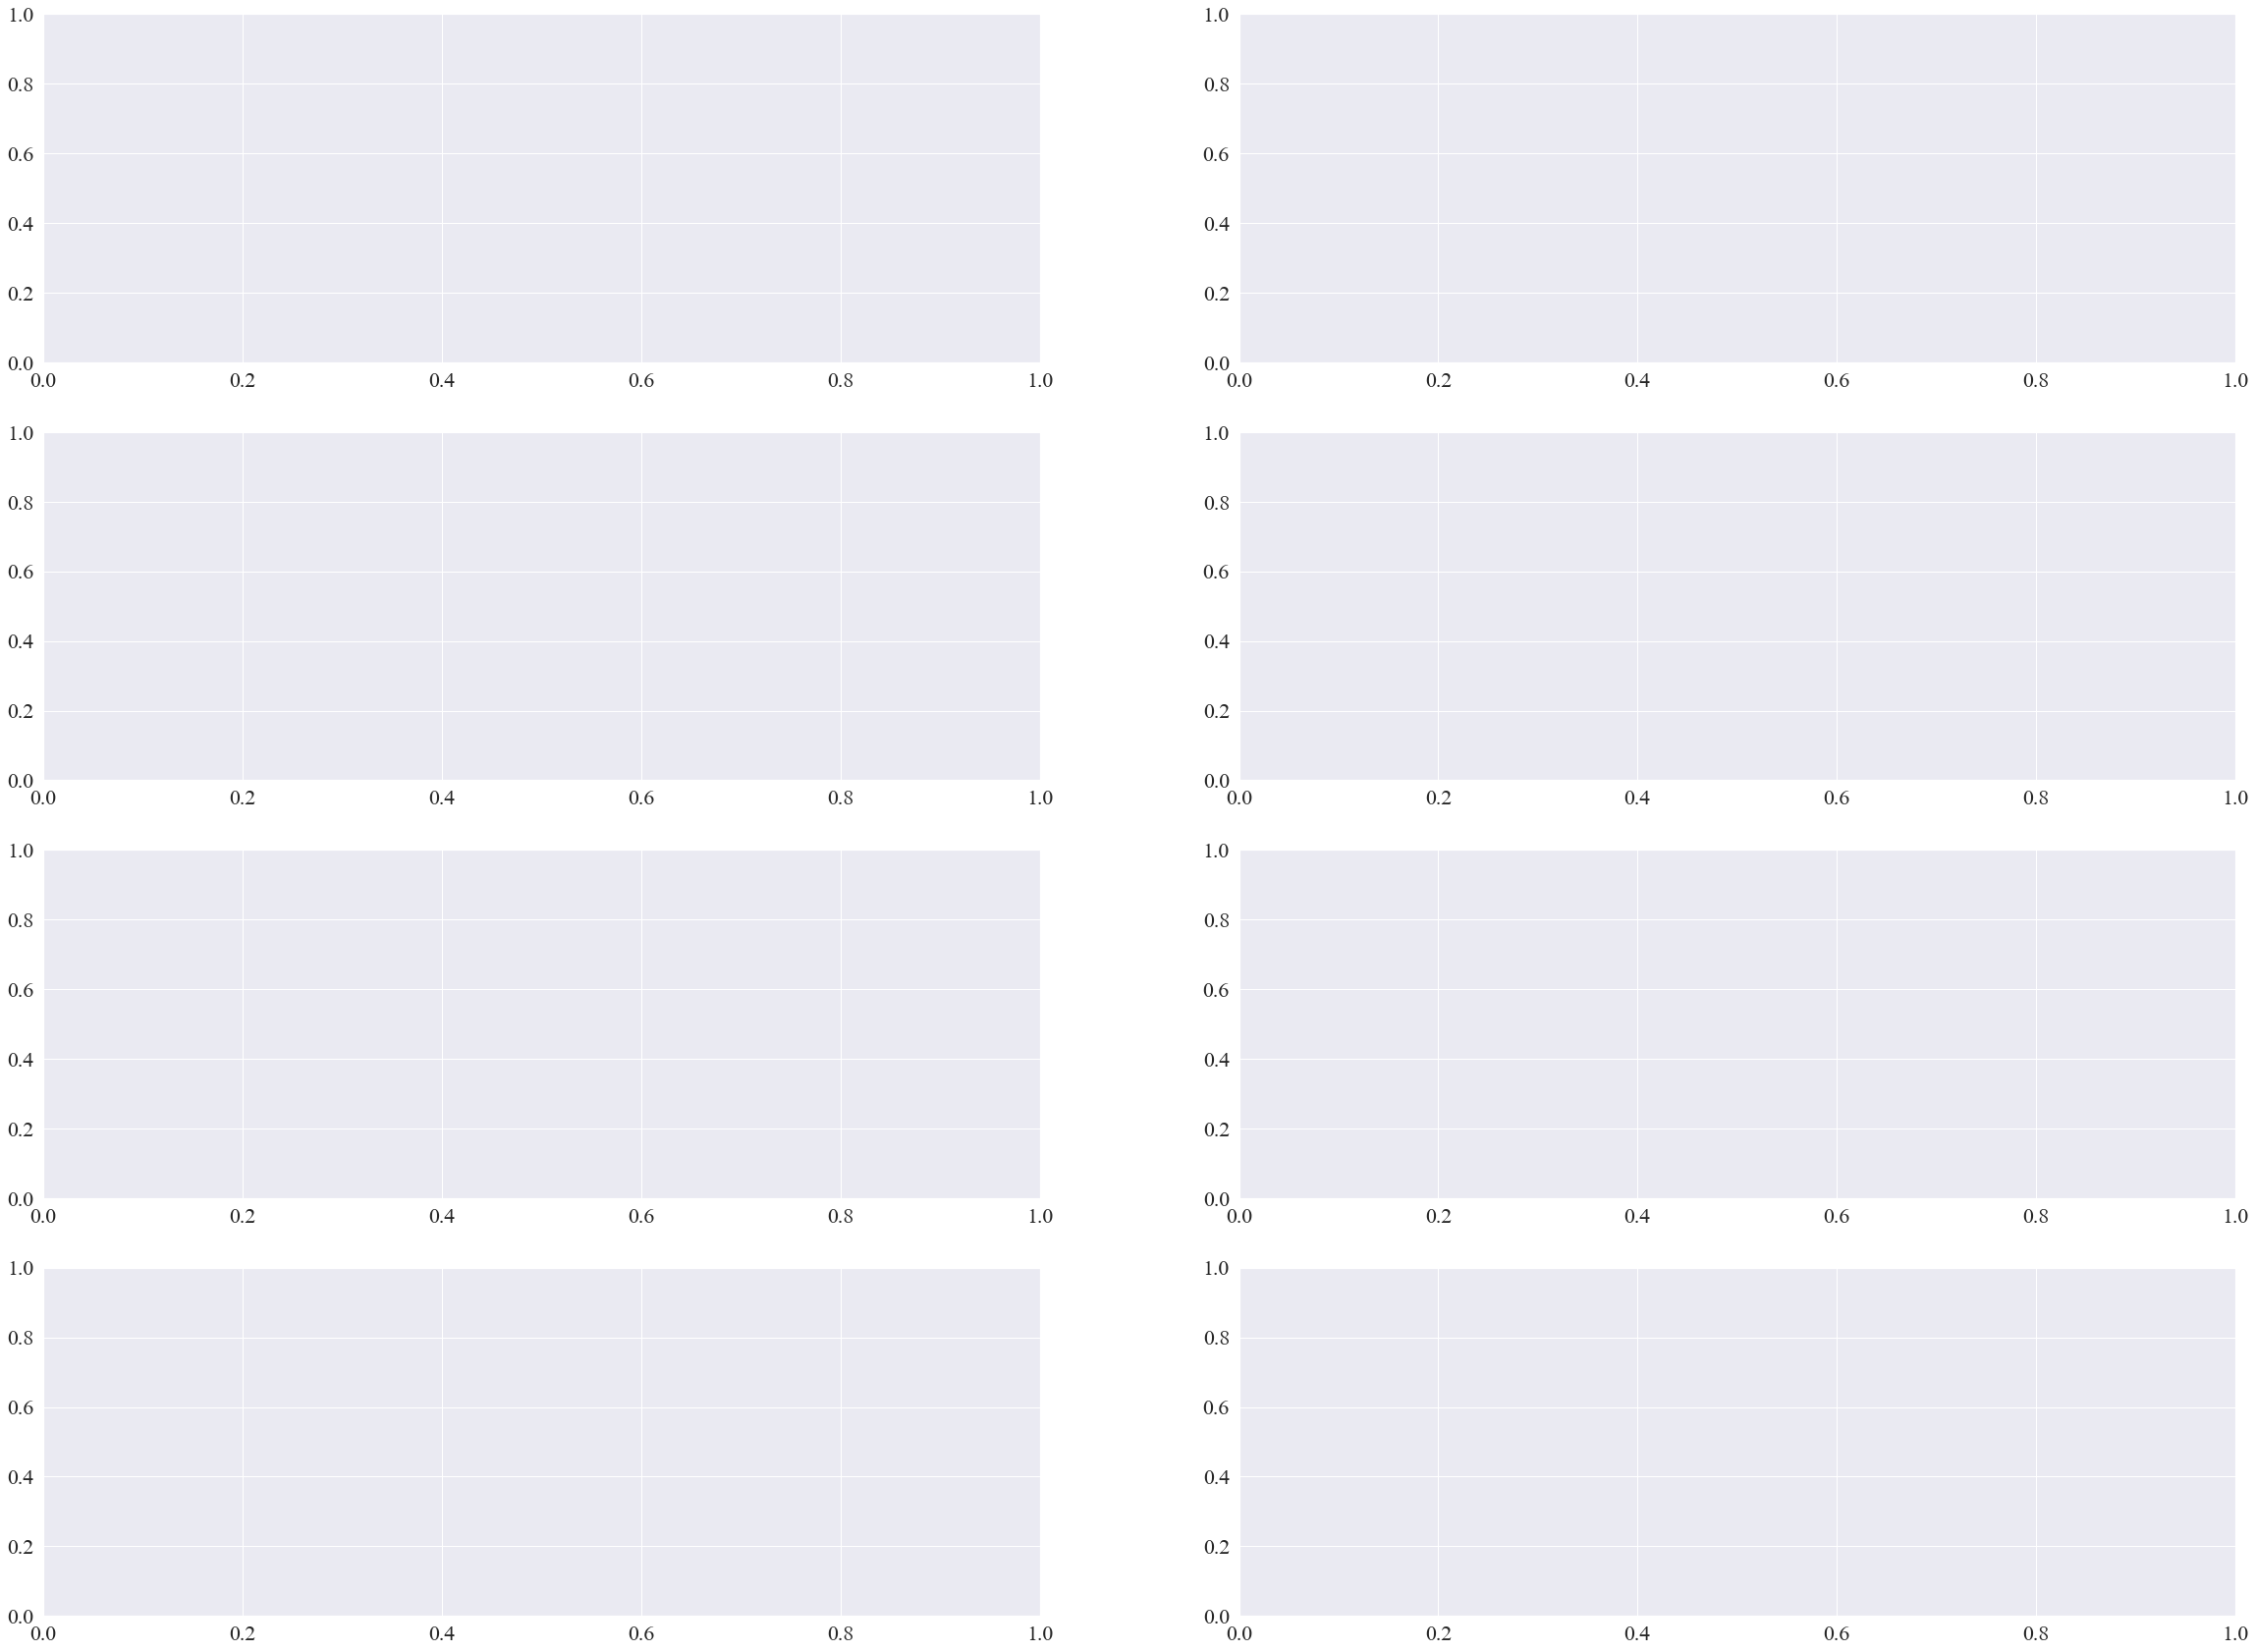

In [37]:
#2013-2015
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20132015_carhart,quality_apb_20132015_carhart,momentum_apb_20132015_carhart,fundamentals_apb_20132015_carhart,
             lowvol_apb_20132015_carhart,equal_apb_20132015_carhart,dividend_apb_20132015_carhart,multi_apb_20132015_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

KeyError: 0

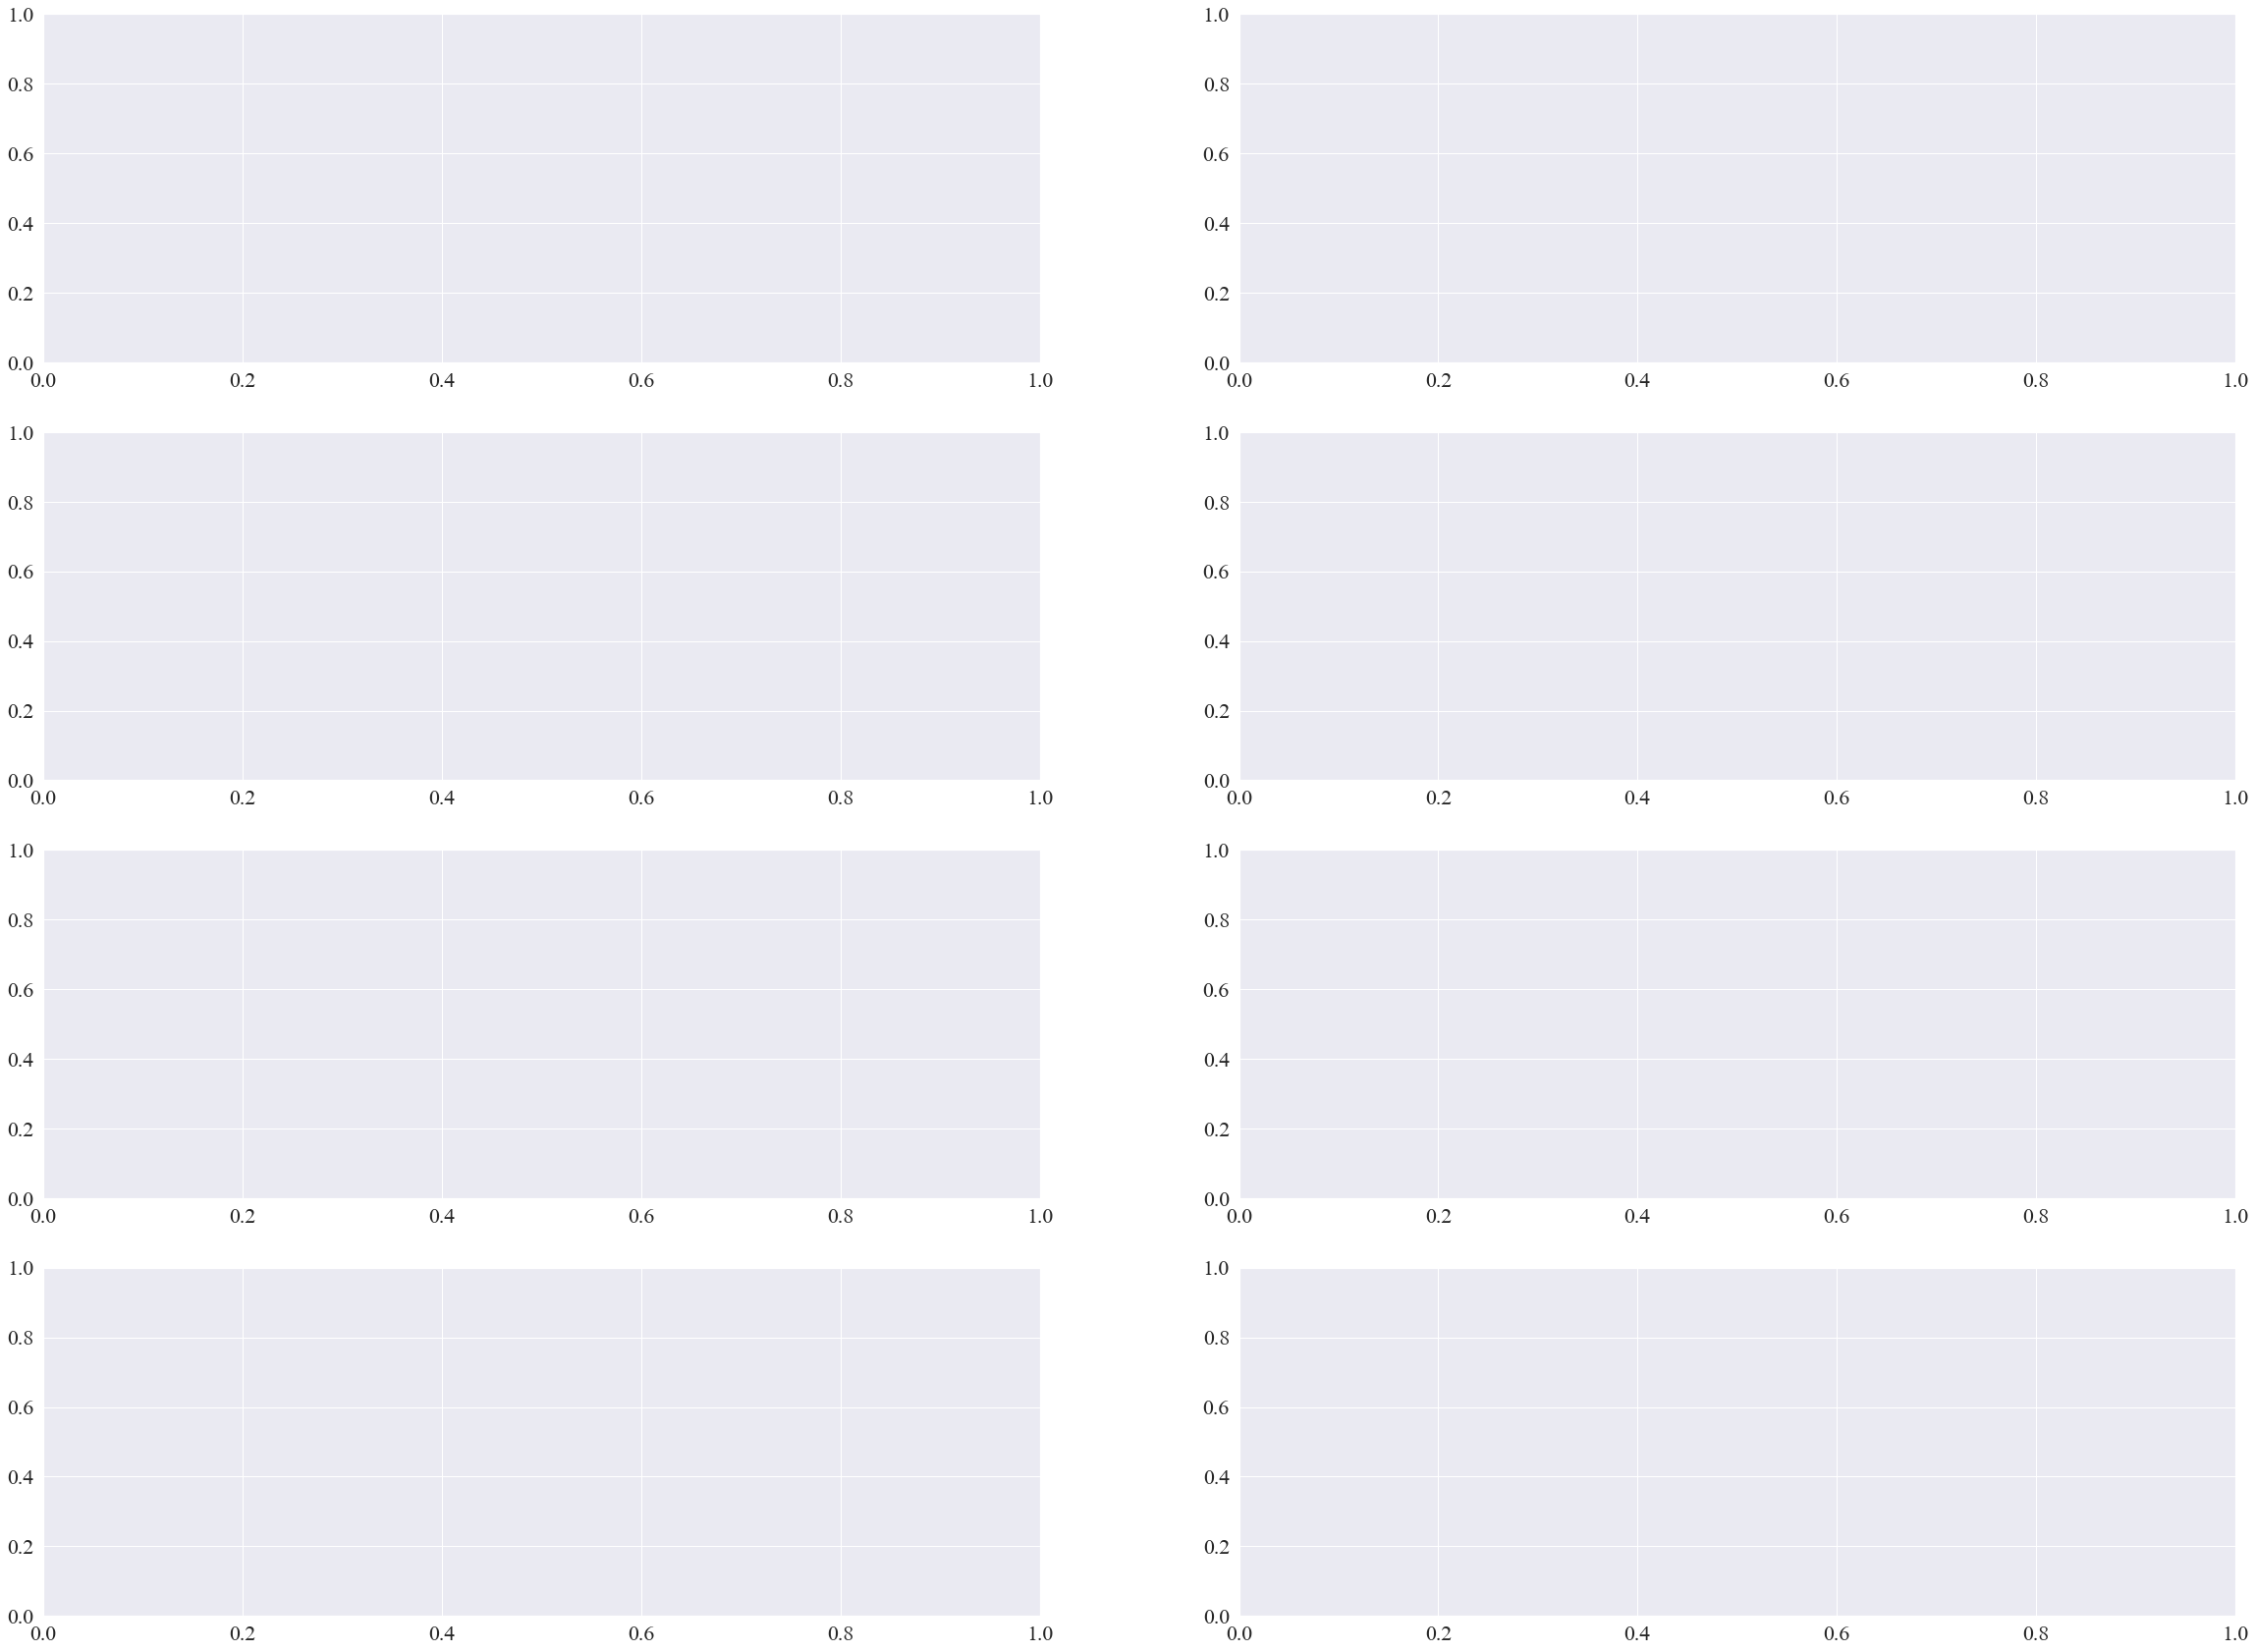

In [38]:
#2014-2016
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20142016_carhart,quality_apb_20142016_carhart,momentum_apb_20142016_carhart,fundamentals_apb_20142016_carhart,
             lowvol_apb_20142016_carhart,equal_apb_20142016_carhart,dividend_apb_20142016_carhart,multi_apb_20142016_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2015-2017
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20152017_carhart,quality_apb_20152017_carhart,momentum_apb_20152017_carhart,fundamentals_apb_20152017_carhart,
             lowvol_apb_20152017_carhart,equal_apb_20152017_carhart,dividend_apb_20152017_carhart,multi_apb_20152017_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

KeyError: 0

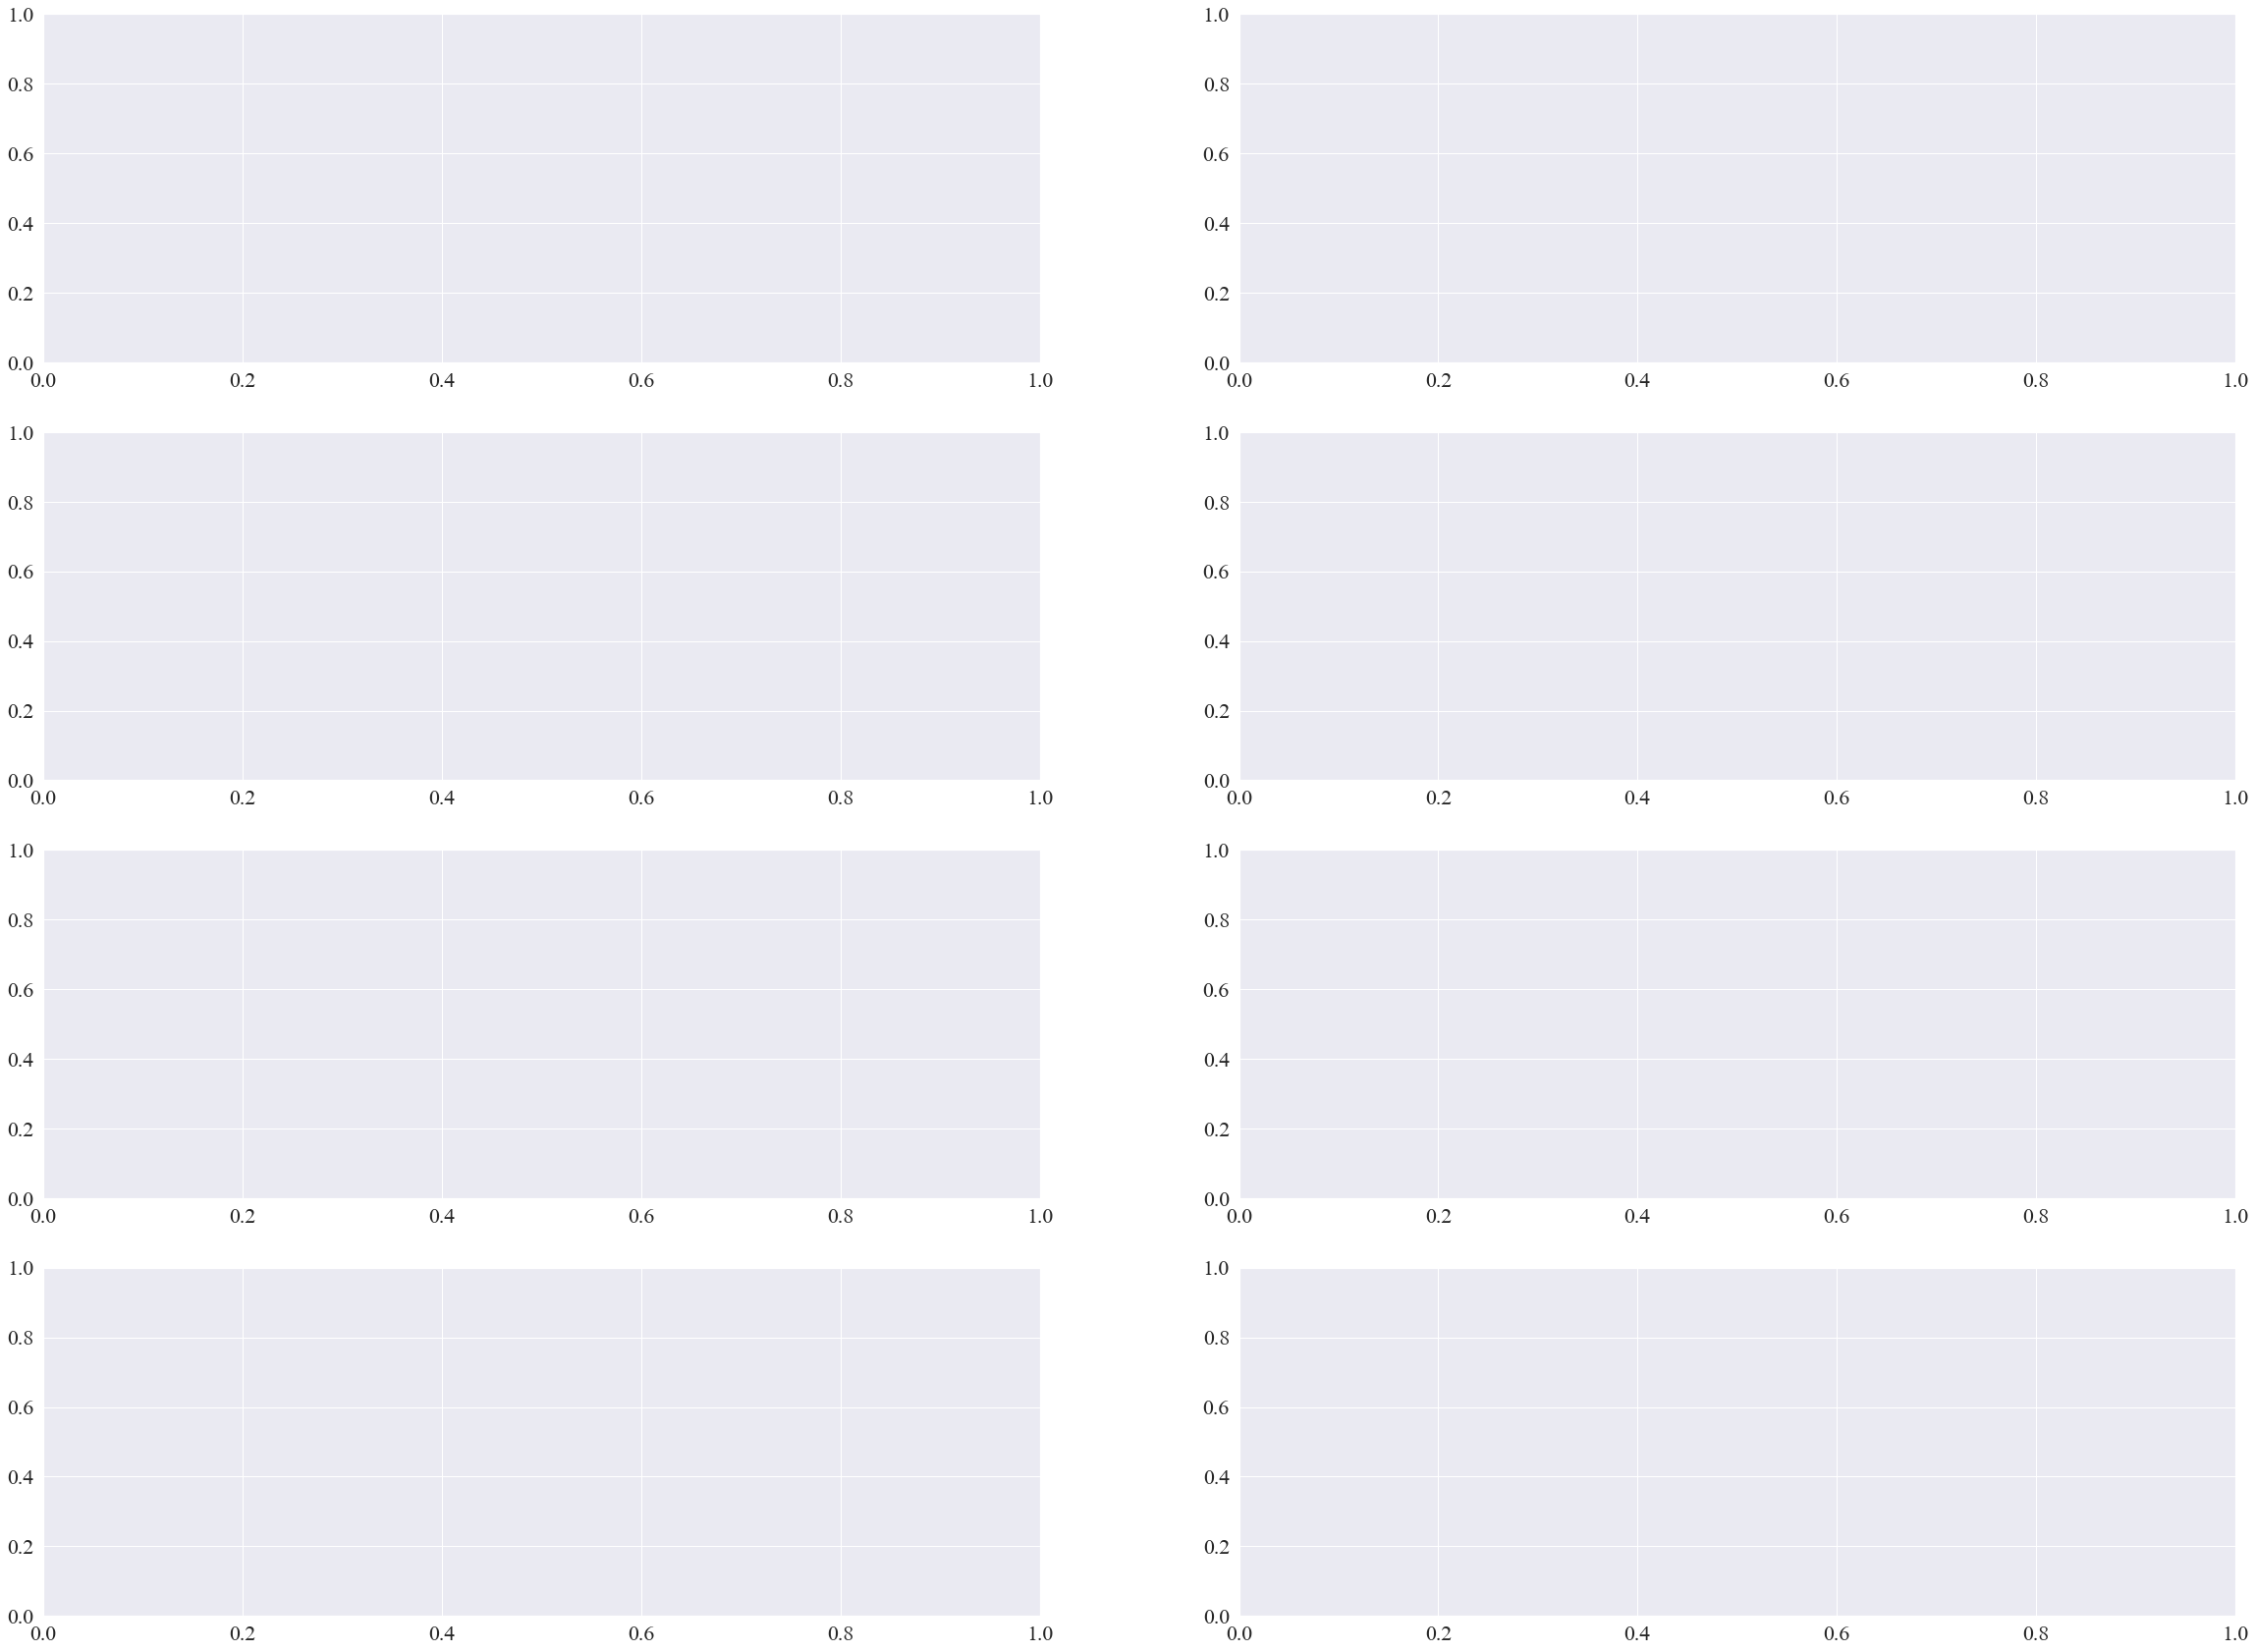

In [39]:
#2016-2018
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20162018_carhart,quality_apb_20162018_carhart,momentum_apb_20162018_carhart,fundamentals_apb_20162018_carhart,
             lowvol_apb_20162018_carhart,equal_apb_20162018_carhart,dividend_apb_20162018_carhart,multi_apb_20162018_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2017-2019
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20172019_carhart,quality_apb_20172019_carhart,momentum_apb_20172019_carhart,fundamentals_apb_20172019_carhart,
             lowvol_apb_20172019_carhart,equal_apb_20172019_carhart,dividend_apb_20172019_carhart,multi_apb_20172019_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

KeyError: 0

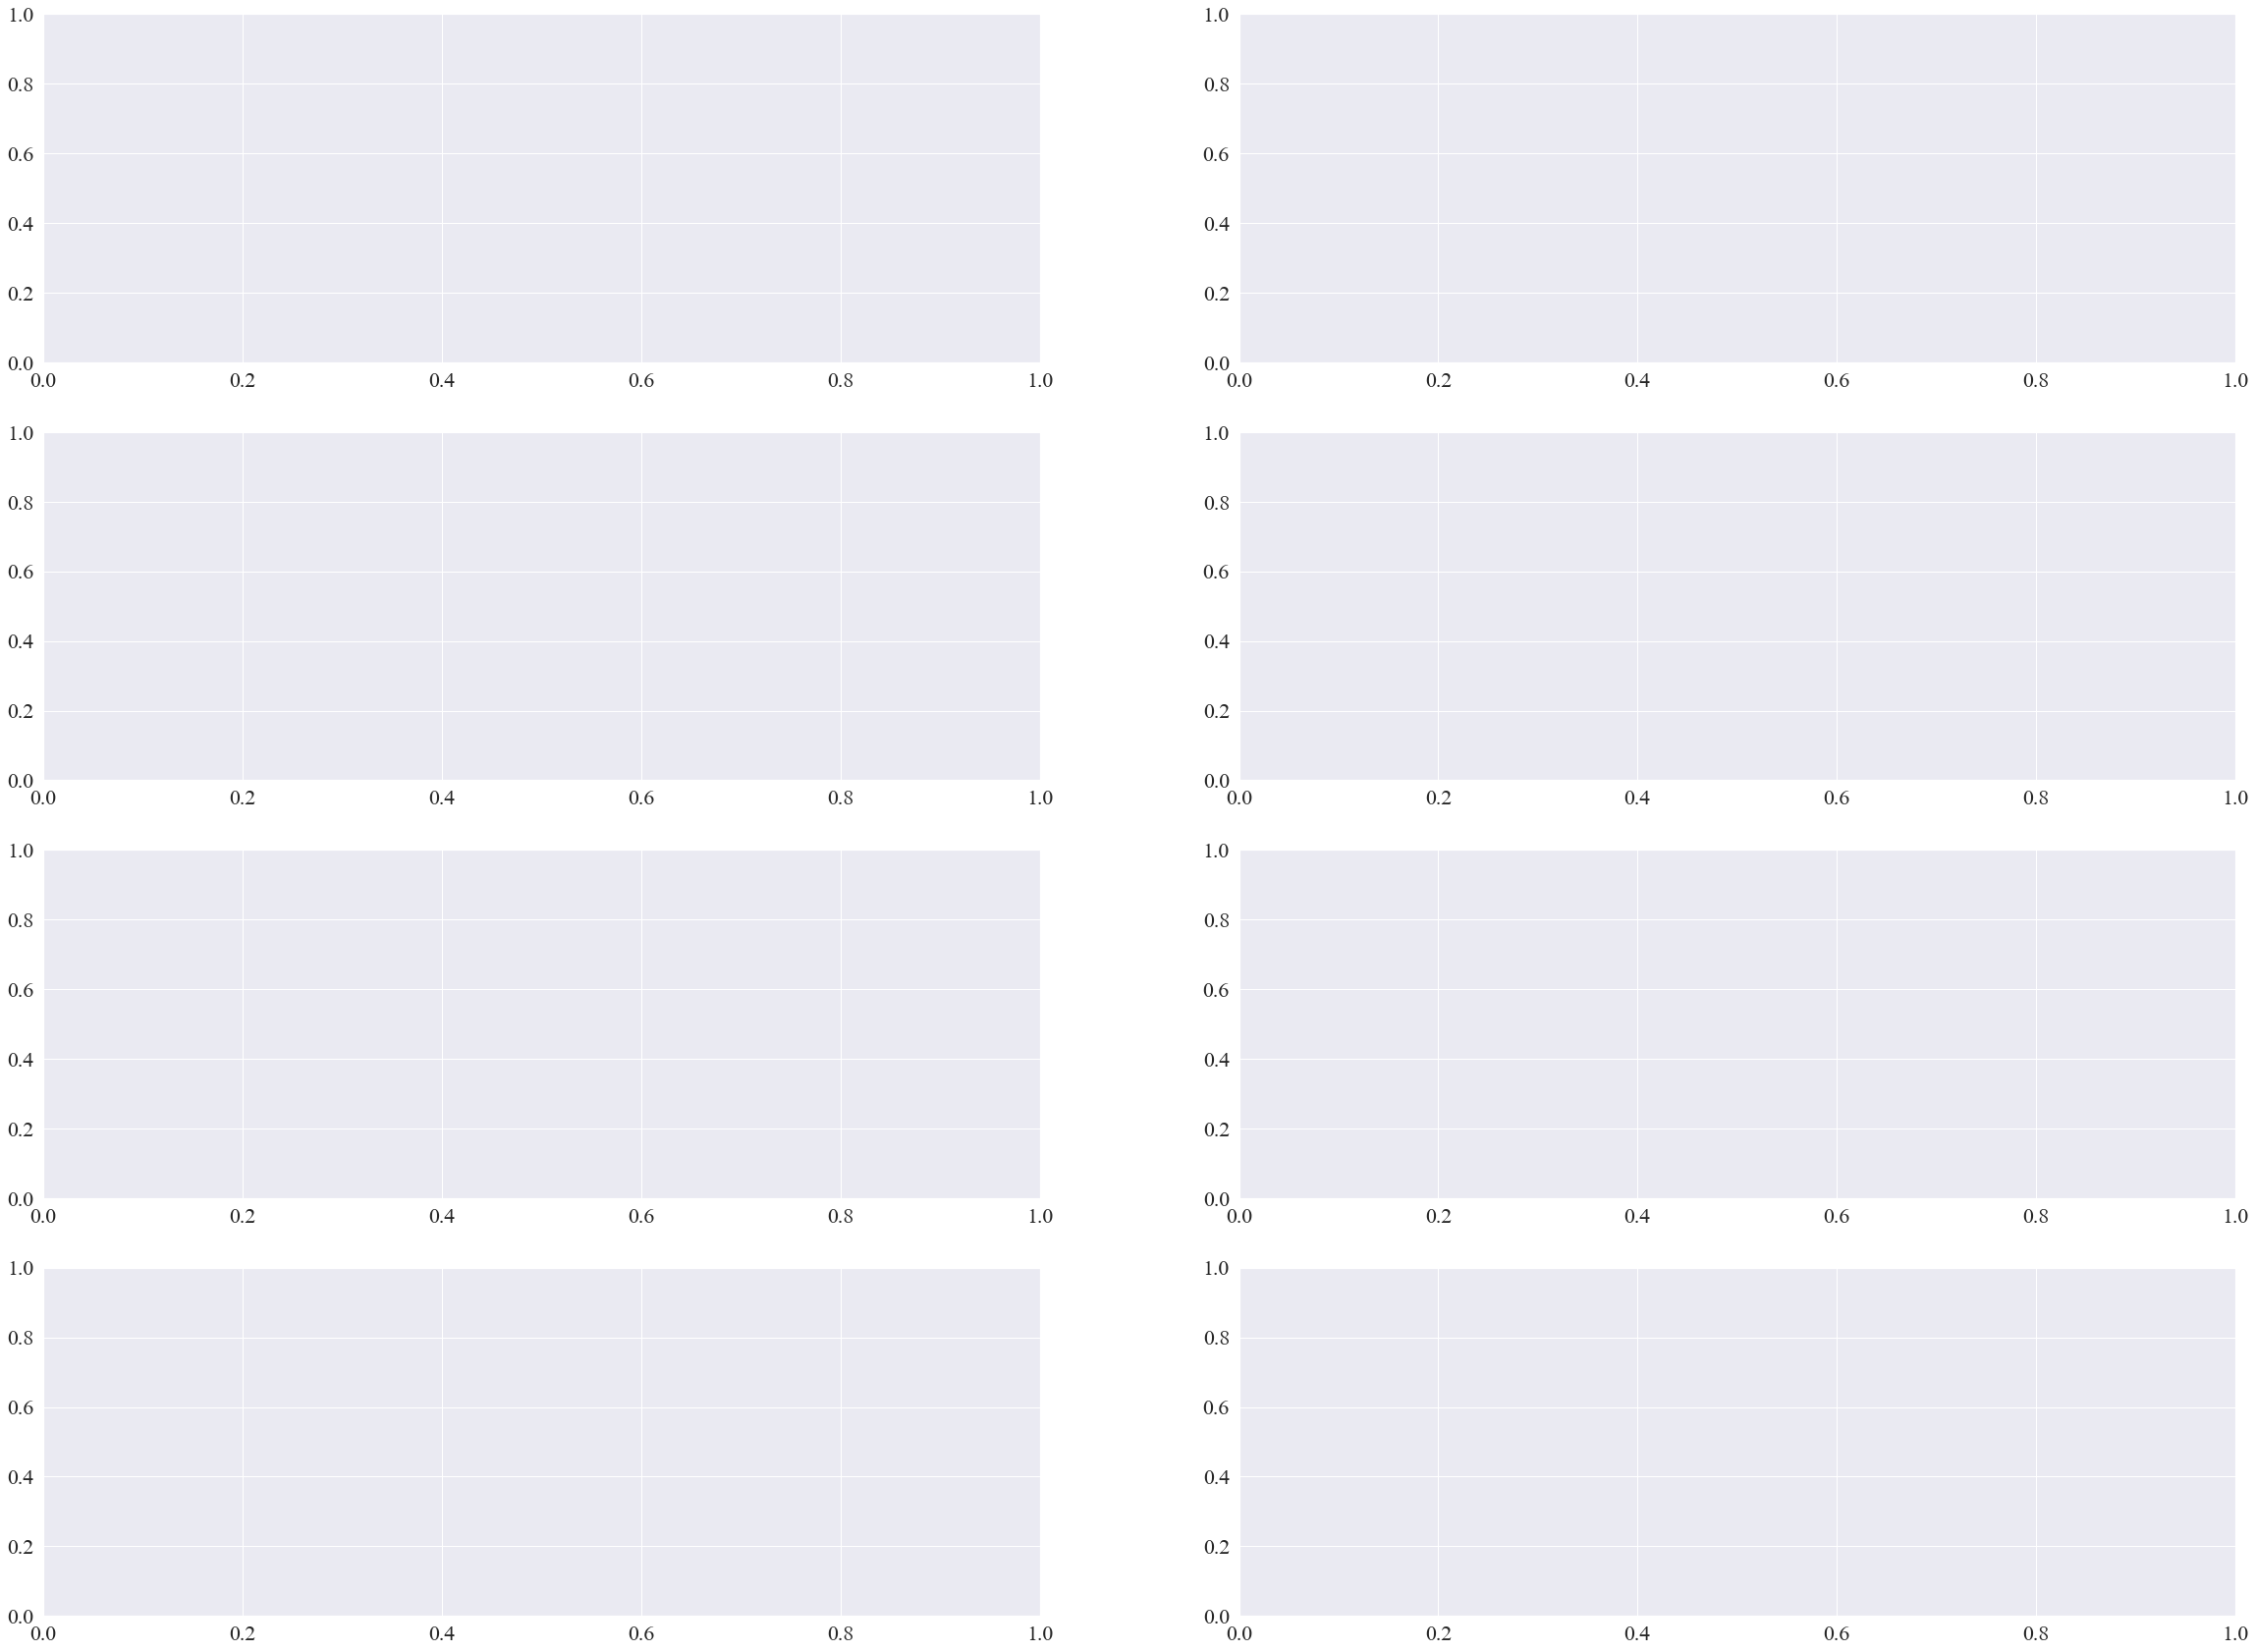

In [40]:
#2018-2020
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_20182020_carhart,quality_apb_20182020_carhart,momentum_apb_20182020_carhart,fundamentals_apb_20182020_carhart,
             lowvol_apb_20182020_carhart,equal_apb_20182020_carhart,dividend_apb_20182020_carhart,multi_apb_20182020_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2016
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2016_carhart,quality_apb_2016_carhart,momentum_apb_2016_carhart,fundamentals_apb_2016_carhart,
             lowvol_apb_2016_carhart,equal_apb_2016_carhart,dividend_apb_2016_carhart,multi_apb_2016_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2017
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2017_carhart,quality_apb_2017_carhart,momentum_apb_2017_carhart,fundamentals_apb_2017_carhart,
             lowvol_apb_2017_carhart,equal_apb_2017_carhart,dividend_apb_2017_carhart,multi_apb_2017_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

KeyError: 0

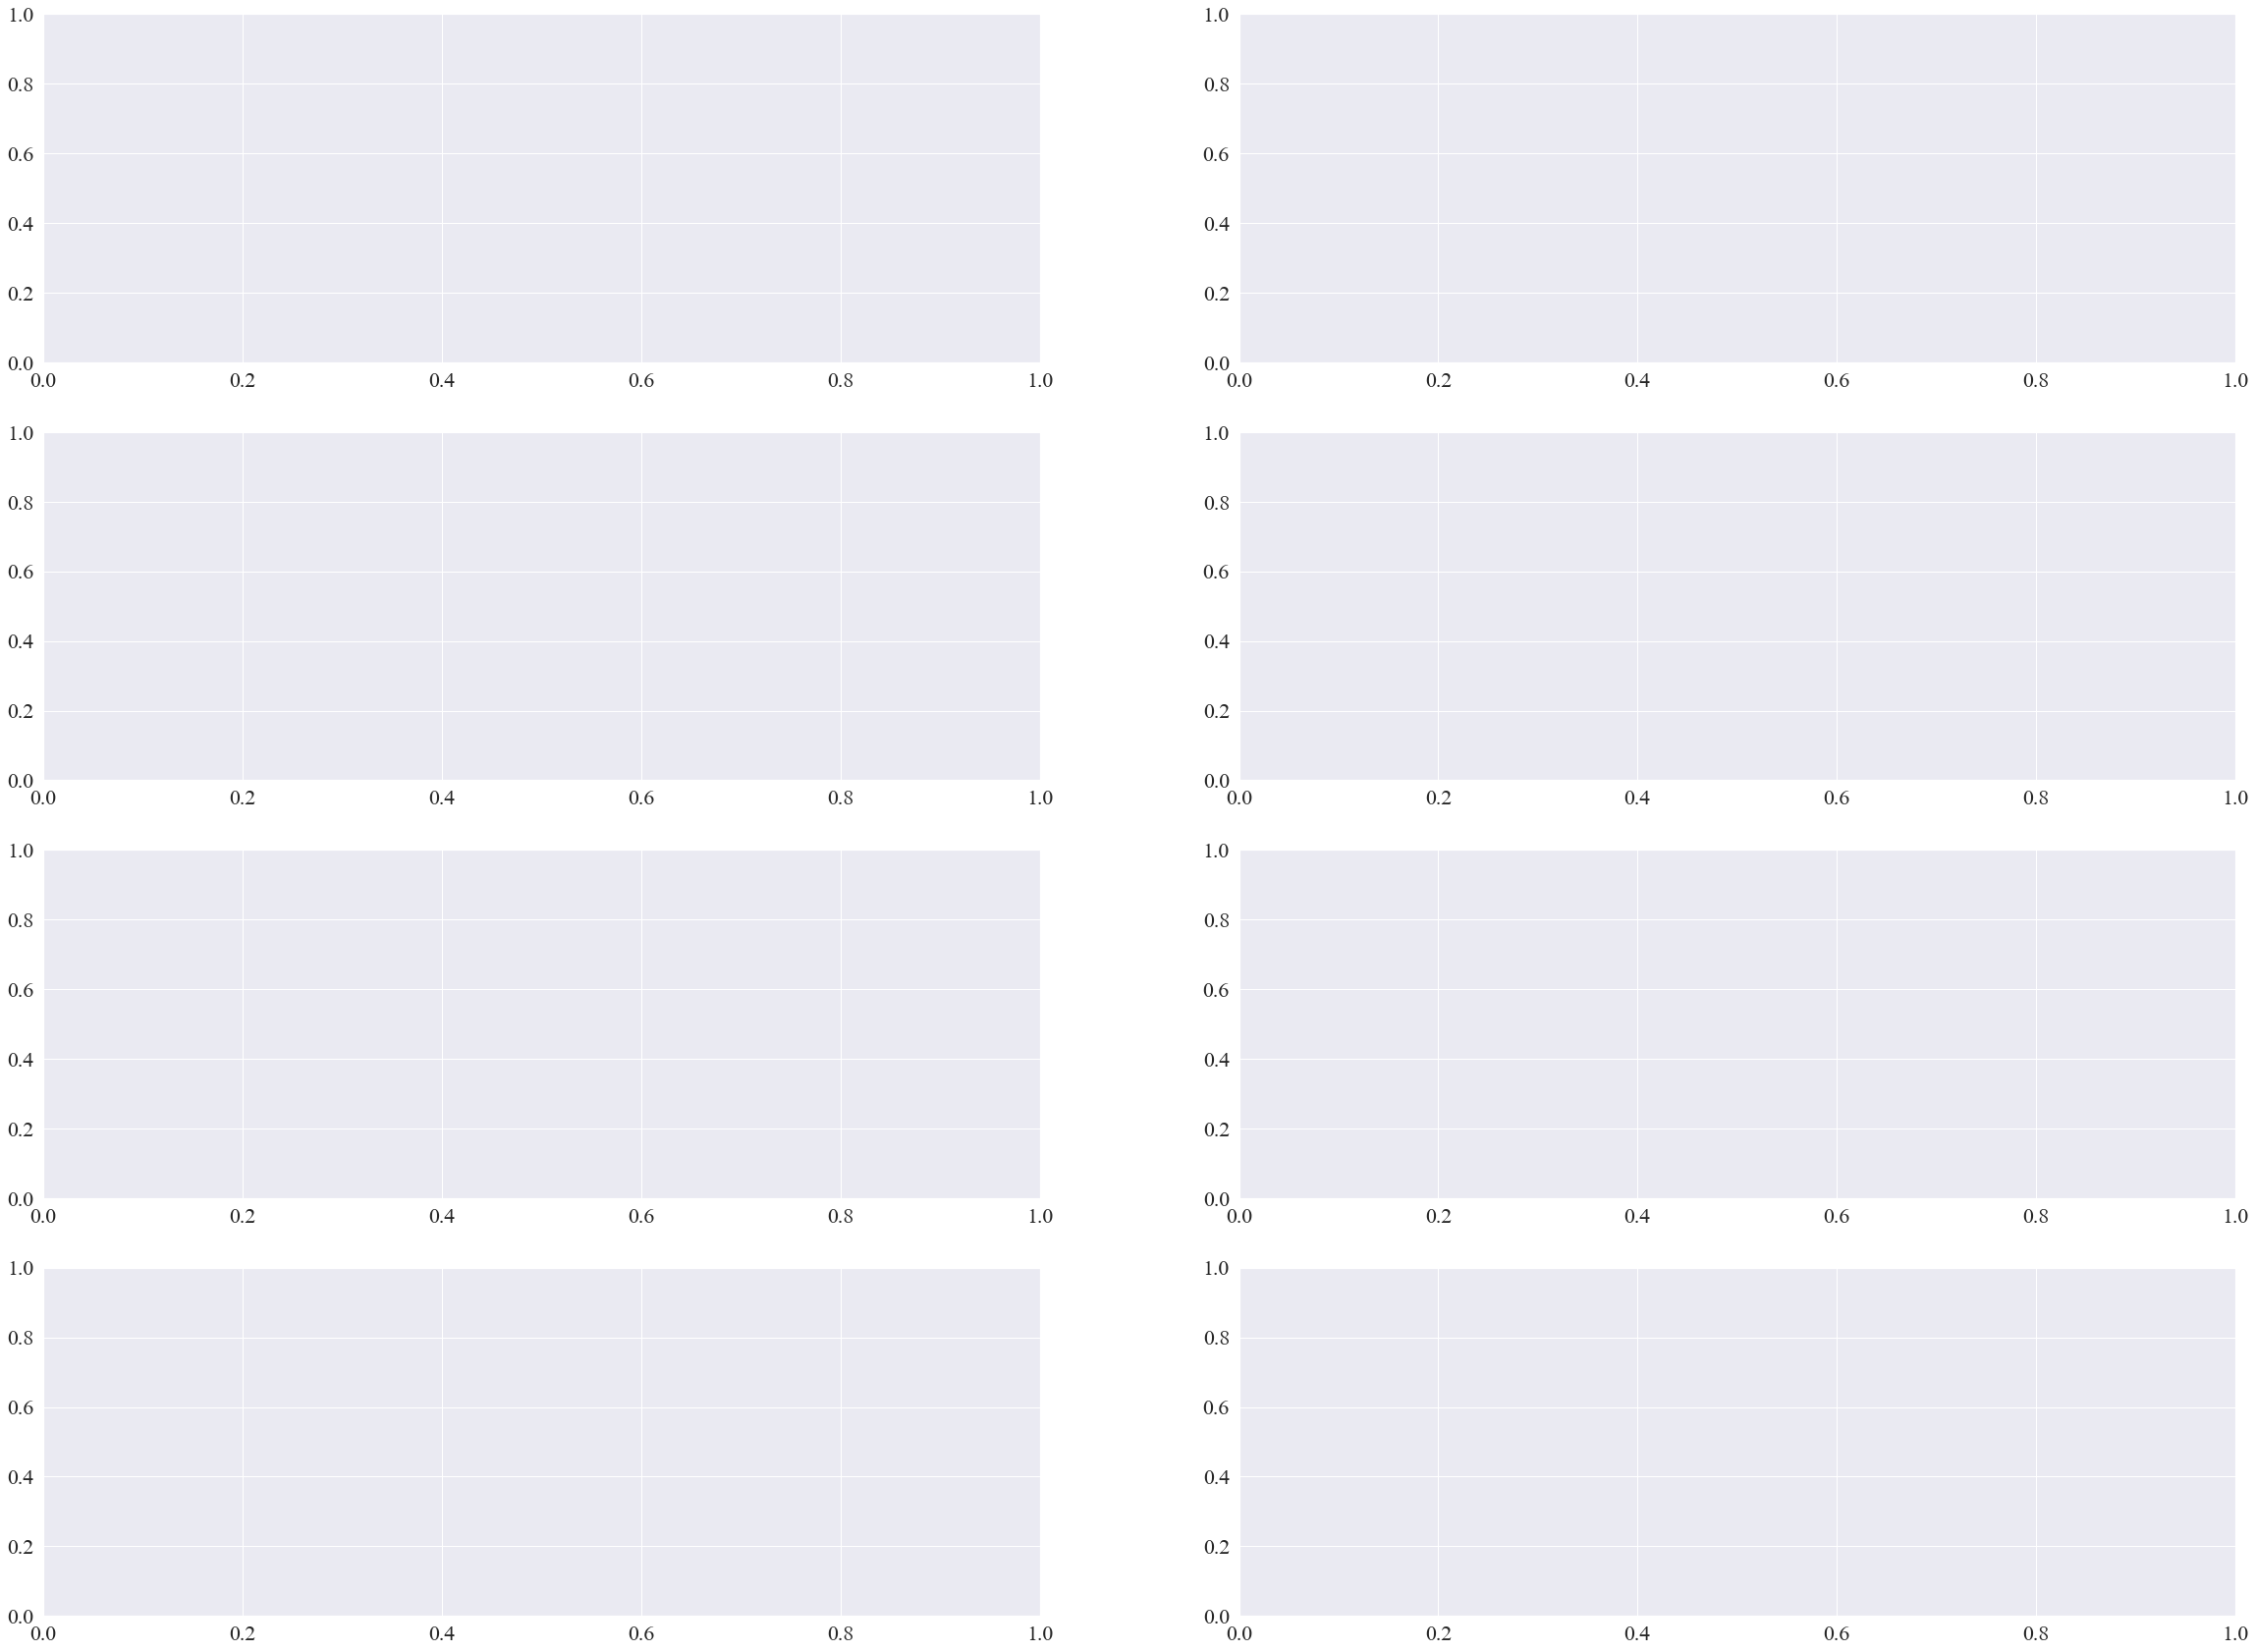

In [41]:
#2018
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2018_carhart,quality_apb_2018_carhart,momentum_apb_2018_carhart,fundamentals_apb_2018_carhart,
             lowvol_apb_2018_carhart,equal_apb_2018_carhart,dividend_apb_2018_carhart,multi_apb_2018_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2019
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2019_carhart,quality_apb_2019_carhart,momentum_apb_2019_carhart,fundamentals_apb_2019_carhart,
             lowvol_apb_2019_carhart,equal_apb_2019_carhart,dividend_apb_2019_carhart,multi_apb_2019_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2020
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2020_carhart,quality_apb_2020_carhart,momentum_apb_2020_carhart,fundamentals_apb_2020_carhart,
             lowvol_apb_2020_carhart,equal_apb_2020_carhart,dividend_apb_2020_carhart,multi_apb_2020_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

In [ ]:
#2021
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_apb_2021_carhart,quality_apb_2021_carhart,momentum_apb_2021_carhart,fundamentals_apb_2021_carhart,
             lowvol_apb_2021_carhart,equal_apb_2021_carhart,dividend_apb_2021_carhart,multi_apb_2021_carhart]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 3

In [52]:
'''Calculate daily returns'''

#etfs
value_return_d=(value_d/value_d.shift(1)-1)
momentum_return_d=(momentum_d/momentum_d.shift(1)-1)
quality_return_d=(quality_d/quality_d.shift(1)-1)
fundamentals_return_d=(fundamentals_d/fundamentals_d.shift(1)-1)
equal_return_d=(equal_d/equal_d.shift(1)-1)
lowvol_return_d=(lowvol_d/lowvol_d.shift(1)-1)
dividend_return_d=(dividend_d/dividend_d.shift(1)-1)
multi_return_d=(multi_d/multi_d.shift(1)-1)

#benchmarks
value_bm_return_d=(value_bm_d/value_bm_d.shift(1)-1)
momentum_bm_return_d=(momentum_bm_d/momentum_bm_d.shift(1)-1)
quality_bm_return_d=(quality_bm_d/quality_bm_d.shift(1)-1)
fundamentals_bm_return_d=(fundamentals_bm_d/fundamentals_bm_d.shift(1)-1)
equal_bm_return_d=(equal_bm_d/equal_bm_d.shift(1)-1)
multi_bm_return_d=(multi_bm_d/multi_bm_d.shift(1)-1)
dividend_bm_return_d=(dividend_bm_d/dividend_bm_d.shift(1)-1)
lowvol_bm_return_d=(lowvol_bm_d/lowvol_bm_d.shift(1)-1)

In [53]:
'''Calculate portfolio weights'''

value_weights_d=value_aum_d.div(value_aum_d.sum(axis=1),axis=0)
momentum_weights_d=momentum_aum_d.div(momentum_aum_d.sum(axis=1),axis=0)
quality_weights_d=quality_aum_d.div(quality_aum_d.sum(axis=1),axis=0)
fundamentals_weights_d=fundamentals_aum_d.div(fundamentals_aum_d.sum(axis=1),axis=0)
equal_weights_d=equal_aum_d.div(equal_aum_d.sum(axis=1),axis=0)
lowvol_weights_d=lowvol_aum_d.div(lowvol_aum_d.sum(axis=1),axis=0)
multi_weights_d=multi_aum_d.div(multi_aum_d.sum(axis=1),axis=0)
dividend_weights_d=dividend_aum_d.div(dividend_aum_d.sum(axis=1),axis=0)

## Bear markets

In [54]:
'''Calculate portfolio daily returns'''

def pf_return_d(weights,returns):
    return (weights*returns).sum(axis=1)-rf_d['RF']

'''Calculate portfolio daily returns in bear markets '''

#etfs
value_pf_return_d_bear=pd.concat([pf_return_d(value_weights_d,value_return_d)[1202:1485],pf_return_d(value_weights_d,value_return_d)[1515:1557],pf_return_d(value_weights_d,value_return_d)[4313:4336]])
momentum_pf_return_d_bear=pd.concat([pf_return_d(momentum_weights_d,momentum_return_d)[1202:1485],pf_return_d(momentum_weights_d,momentum_return_d)[1515:1557],pf_return_d(momentum_weights_d,momentum_return_d)[4313:4336]])
quality_pf_return_d_bear=pd.concat([pf_return_d(quality_weights_d,quality_return_d)[1202:1485],pf_return_d(quality_weights_d,quality_return_d)[1515:1557],pf_return_d(quality_weights_d,quality_return_d)[4313:4336]])
fundamentals_pf_return_d_bear=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1202:1485],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1515:1557],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[4313:4336]])
lowvol_pf_return_d_bear=pd.concat([pf_return_d(lowvol_weights_d,lowvol_return_d)[1202:1485],pf_return_d(lowvol_weights_d,lowvol_return_d)[1515:1557],pf_return_d(lowvol_weights_d,lowvol_return_d)[4313:4336]])
equal_pf_return_d_bear=pd.concat([pf_return_d(equal_weights_d,equal_return_d)[1202:1485],pf_return_d(equal_weights_d,equal_return_d)[1515:1557],pf_return_d(equal_weights_d,equal_return_d)[4313:4336]])
dividend_pf_return_d_bear=pd.concat([pf_return_d(dividend_weights_d,dividend_return_d)[1202:1485],pf_return_d(dividend_weights_d,dividend_return_d)[1515:1557],pf_return_d(dividend_weights_d,dividend_return_d)[4313:4336]])
multi_pf_return_d_bear=pd.concat([pf_return_d(multi_weights_d,multi_return_d)[1202:1485],pf_return_d(multi_weights_d,multi_return_d)[1515:1557],pf_return_d(multi_weights_d,multi_return_d)[4313:4336]])

#benchmarks
value_bm_pf_return_d_bear=pd.concat([pf_return_d(value_weights_d,value_bm_return_d)[1202:1485],pf_return_d(value_weights_d,value_bm_return_d)[1515:1557],pf_return_d(value_weights_d,value_bm_return_d)[4313:4336]])
momentum_bm_pf_return_d_bear=pd.concat([pf_return_d(momentum_weights_d,momentum_bm_return_d)[1202:1485],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1515:1557],pf_return_d(momentum_weights_d,momentum_bm_return_d)[4313:4336]])
quality_bm_pf_return_d_bear=pd.concat([pf_return_d(quality_weights_d,quality_bm_return_d)[1202:1485],pf_return_d(quality_weights_d,quality_bm_return_d)[1515:1557],pf_return_d(quality_weights_d,quality_bm_return_d)[4313:4336]])
fundamentals_bm_pf_return_d_bear=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1202:1485],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1515:1557],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[4313:4336]])
lowvol_bm_pf_return_d_bear=pd.concat([pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1202:1485],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1515:1557],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[4313:4336]])
equal_bm_pf_return_d_bear=pd.concat([pf_return_d(equal_weights_d,equal_bm_return_d)[1202:1485],pf_return_d(equal_weights_d,equal_bm_return_d)[1515:1557],pf_return_d(equal_weights_d,equal_bm_return_d)[4313:4336]])
dividend_bm_pf_return_d_bear=pd.concat([pf_return_d(dividend_weights_d,dividend_bm_return_d)[1202:1485],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1515:1557],pf_return_d(dividend_weights_d,dividend_bm_return_d)[4313:4336]])
multi_bm_pf_return_d_bear=pd.concat([pf_return_d(multi_weights_d,multi_bm_return_d)[1202:1485],pf_return_d(multi_weights_d,multi_bm_return_d)[1515:1557],pf_return_d(multi_weights_d,multi_bm_return_d)[4313:4336]])


#difference
value_diff_return_d_bear=value_pf_return_d_bear-value_bm_pf_return_d_bear
momentum_diff_return_d_bear=momentum_pf_return_d_bear-momentum_bm_pf_return_d_bear
quality_diff_return_d_bear=quality_pf_return_d_bear-quality_bm_pf_return_d_bear
fundamentals_diff_return_d_bear=fundamentals_pf_return_d_bear-fundamentals_bm_pf_return_d_bear
lowvol_diff_return_d_bear=lowvol_pf_return_d_bear-lowvol_bm_pf_return_d_bear
equal_diff_return_d_bear=equal_pf_return_d_bear-equal_bm_pf_return_d_bear
multi_diff_return_d_bear=multi_pf_return_d_bear-multi_bm_pf_return_d_bear
dividend_diff_return_d_bear=dividend_pf_return_d_bear-dividend_bm_pf_return_d_bear


Text(0.5, 1.0, 'Correlation Matrix')

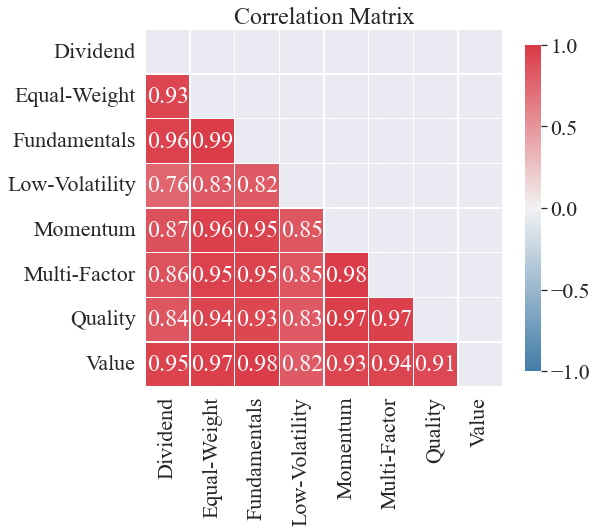

In [55]:
'''Calculate correlations (ETFs) in bear markets'''

etf_pf=pd.concat([dividend_pf_return_d_bear,equal_pf_return_d_bear,fundamentals_pf_return_d_bear,lowvol_pf_return_d_bear,
                  momentum_pf_return_d_bear,multi_pf_return_d_bear,quality_pf_return_d_bear,value_pf_return_d_bear,],axis=1)
etf_pf_correl_matrix=np.corrcoef(etf_pf,rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(etf_pf_correl_matrix, names=['Dividend','Equal-Weight','Fundamentals','Low-Volatility',
                                              'Momentum','Multi-Factor','Quality','Value'], include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [56]:
'''Calculate portfolio annualized returns (bear markets)'''

def pf_return_annualized_d(pf_daily_returns):
    n = len(pf_daily_returns)
    test=scipy.ttest_1samp(pf_daily_returns,0)
    print(test)
    return np.prod(pf_daily_returns+1) ** (252 / n) - 1


#etfs
value_pf_return_y_bear=pf_return_annualized_d(value_pf_return_d_bear)
momentum_pf_return_y_bear=pf_return_annualized_d(momentum_pf_return_d_bear)
quality_pf_return_y_bear=pf_return_annualized_d(quality_pf_return_d_bear)
fundamentals_pf_return_y_bear=pf_return_annualized_d(fundamentals_pf_return_d_bear)
equal_pf_return_y_bear=pf_return_annualized_d(equal_pf_return_d_bear)
multi_pf_return_y_bear=pf_return_annualized_d(multi_pf_return_d_bear)
dividend_pf_return_y_bear=pf_return_annualized_d(dividend_pf_return_d_bear)
lowvol_pf_return_y_bear=pf_return_annualized_d(lowvol_pf_return_d_bear)

print(value_pf_return_y_bear,momentum_pf_return_y_bear,quality_pf_return_y_bear,fundamentals_pf_return_y_bear,
      multi_pf_return_y_bear,dividend_pf_return_y_bear,equal_pf_return_y_bear,lowvol_pf_return_y_bear)

#benchmarks
value_bm_pf_return_y_bear=pf_return_annualized_d(value_bm_pf_return_d_bear)
momentum_bm_pf_return_y_bear=pf_return_annualized_d(momentum_bm_pf_return_d_bear)
quality_bm_pf_return_y_bear=pf_return_annualized_d(quality_bm_pf_return_d_bear)
fundamentals_bm_pf_return_y_bear=pf_return_annualized_d(fundamentals_bm_pf_return_d_bear)
equal_bm_pf_return_y_bear=pf_return_annualized_d(equal_bm_pf_return_d_bear)
multi_bm_pf_return_y_bear=pf_return_annualized_d(multi_bm_pf_return_d_bear)
dividend_bm_pf_return_y_bear=pf_return_annualized_d(dividend_bm_pf_return_d_bear)
lowvol_bm_pf_return_y_bear=pf_return_annualized_d(lowvol_bm_pf_return_d_bear)

print(value_bm_pf_return_y_bear,momentum_bm_pf_return_y_bear,quality_bm_pf_return_y_bear,fundamentals_bm_pf_return_y_bear,
      multi_bm_pf_return_y_bear,dividend_bm_pf_return_y_bear,equal_bm_pf_return_y_bear,lowvol_bm_pf_return_y_bear)


Ttest_1sampResult(statistic=-2.9207039087784006, pvalue=0.0037208999277051702)
Ttest_1sampResult(statistic=-3.074336246647351, pvalue=0.0022769299756286825)
Ttest_1sampResult(statistic=-3.0127022483443926, pvalue=0.0027795182948188116)
Ttest_1sampResult(statistic=-3.328886070491962, pvalue=0.0009655170431196872)
Ttest_1sampResult(statistic=-3.122649275182258, pvalue=0.0019429850328565876)
Ttest_1sampResult(statistic=-2.972569485870947, pvalue=0.003159485086730067)
Ttest_1sampResult(statistic=-2.90801520856716, pvalue=0.0038714517807303312)
Ttest_1sampResult(statistic=-3.12419172201709, pvalue=0.001933108275945691)
-0.6871134444716858 -0.6616082449005454 -0.658991170791048 -0.7069862968174803 -0.6585860717885774 -0.6881056146866802 -0.6918985754820945 -0.6002119917586115
Ttest_1sampResult(statistic=-2.977656462198146, pvalue=0.00310882210462779)
Ttest_1sampResult(statistic=-2.795276329612752, pvalue=0.005473983102649063)
Ttest_1sampResult(statistic=-2.8702841725831405, pvalue=0.00435255

In [58]:
#difference
value_diff_return_y_bear=pf_return_annualized_d(value_diff_return_d_bear)
momentum_diff_return_y_bear=pf_return_annualized_d(momentum_diff_return_d_bear)
quality_diff_return_y_bear=pf_return_annualized_d(quality_diff_return_d_bear)
fundamentals_diff_return_y_bear=pf_return_annualized_d(fundamentals_diff_return_d_bear)
equal_diff_return_y_bear=pf_return_annualized_d(equal_diff_return_d_bear)
multi_diff_return_y_bear=pf_return_annualized_d(multi_diff_return_d_bear)
dividend_diff_return_y_bear=pf_return_annualized_d(dividend_diff_return_d_bear)
lowvol_diff_return_y_bear=pf_return_annualized_d(lowvol_diff_return_d_bear)

print(value_diff_return_y_bear,momentum_diff_return_y_bear,quality_diff_return_y_bear,fundamentals_diff_return_y_bear,
      multi_diff_return_y_bear,dividend_diff_return_y_bear,equal_diff_return_y_bear,lowvol_diff_return_y_bear)

value_diff_return_d_bear

Ttest_1sampResult(statistic=0.7061636688863889, pvalue=0.48056020764648255)
Ttest_1sampResult(statistic=-1.1085611296362026, pvalue=0.26838729969394076)
Ttest_1sampResult(statistic=0.03069535022089002, pvalue=0.975530146385575)
Ttest_1sampResult(statistic=-0.5738326624442399, pvalue=0.5664527862730424)
Ttest_1sampResult(statistic=-2.230245031129339, pvalue=0.026370227025494183)
Ttest_1sampResult(statistic=-1.0332138661202825, pvalue=0.30222337652306286)
Ttest_1sampResult(statistic=0.37811492939875546, pvalue=0.7055764180849144)
Ttest_1sampResult(statistic=0.7163833582426009, pvalue=0.4742365169655114)
0.037427708646408986 -0.06748835160244082 -0.005428004363171146 -0.03327918285001097 -0.06814120565996862 0.03273421072705207 -0.1142226700648078 0.12419701946890327


Date
2007-10-10   -0.001780
2007-11-10    0.000296
2007-12-10   -0.000076
2007-10-15    0.001005
2007-10-16    0.001113
                ...   
2020-03-17   -0.007326
2020-03-18    0.015490
2020-03-19   -0.008335
2020-03-20   -0.001190
2020-03-23    0.010931
Length: 348, dtype: float64

In [35]:
'''Calculate portfolio annualized standard deviation (bear markets)'''

def pf_std_annualized_d(pf_daily_returns):
    std_d=pf_daily_returns.std()
    return np.sqrt(252)*std_d
    
#etfs
value_pf_std_y_bear=pf_std_annualized_d(value_pf_return_d_bear)
momentum_pf_std_y_bear=pf_std_annualized_d(momentum_pf_return_d_bear)
quality_pf_std_y_bear=pf_std_annualized_d(quality_pf_return_d_bear)
fundamentals_pf_std_y_bear=pf_std_annualized_d(fundamentals_pf_return_d_bear)
equal_pf_std_y_bear=pf_std_annualized_d(equal_pf_return_d_bear)
multi_pf_std_y_bear=pf_std_annualized_d(multi_pf_return_d_bear)
dividend_pf_std_y_bear=pf_std_annualized_d(dividend_pf_return_d_bear)
lowvol_pf_std_y_bear=pf_std_annualized_d(lowvol_pf_return_d_bear)

print(value_pf_std_y_bear,momentum_pf_std_y_bear,quality_pf_std_y_bear,fundamentals_pf_std_y_bear,
      multi_pf_std_y_bear,dividend_pf_std_y_bear,equal_pf_std_y_bear,lowvol_pf_std_y_bear)

0.4290222031639274 0.38476614724294467 0.3890767321501799 0.40327392098943693 0.3930434447998714 0.4318595341261763 0.4101677931672605 0.3242783878586314


In [36]:
#benchmark
value_bm_pf_std_y_bear=pf_std_annualized_d(value_bm_pf_return_d_bear)
momentum_bm_pf_std_y_bear=pf_std_annualized_d(momentum_bm_pf_return_d_bear)
quality_bm_pf_std_y_bear=pf_std_annualized_d(quality_bm_pf_return_d_bear)
fundamentals_bm_pf_std_y_bear=pf_std_annualized_d(fundamentals_bm_pf_return_d_bear)
equal_bm_pf_std_y_bear=pf_std_annualized_d(equal_bm_pf_return_d_bear)
multi_bm_pf_std_y_bear=pf_std_annualized_d(multi_bm_pf_return_d_bear)
dividend_bm_pf_std_y_bear=pf_std_annualized_d(dividend_bm_pf_return_d_bear)
lowvol_bm_pf_std_y_bear=pf_std_annualized_d(lowvol_bm_pf_return_d_bear)

print(value_bm_pf_std_y_bear,momentum_bm_pf_std_y_bear,quality_bm_pf_std_y_bear,fundamentals_bm_pf_std_y_bear,
      multi_bm_pf_std_y_bear,dividend_bm_pf_std_y_bear,equal_bm_pf_std_y_bear,lowvol_bm_pf_std_y_bear)

0.43614127358902494 0.3948761914569808 0.4098126020794802 0.43454713390079797 0.4077080229788387 0.4359878754471939 0.40604428898310746 0.4098645936852257


In [37]:
'''Information ratio (bear markets)'''

def ir_d(pf_return,bm_return):
    te=(pf_return-bm_return).std()*np.sqrt(252)
    n = len(pf_return)
    pf=np.prod(pf_return+1) ** (252 / n) - 1
    bm=np.prod(bm_return+1) ** (252 / n) - 1
    print (te)
    return (pf-bm)/te

value_ir_bear=ir_d(value_pf_return_d_bear,value_bm_pf_return_d_bear)
momentum_ir_bear=ir_d(momentum_pf_return_d_bear,momentum_bm_pf_return_d_bear)
quality_ir_bear=ir_d(quality_pf_return_d_bear,quality_bm_pf_return_d_bear)
fundamentals_ir_bear=ir_d(fundamentals_pf_return_d_bear,fundamentals_bm_pf_return_d_bear)
lowvol_ir_bear=ir_d(lowvol_pf_return_d_bear,lowvol_bm_pf_return_d_bear)
equal_ir_bear=ir_d(equal_pf_return_d_bear,equal_bm_pf_return_d_bear)
dividend_ir_bear=ir_d(dividend_pf_return_d_bear,dividend_bm_pf_return_d_bear)
multi_ir_bear=ir_d(multi_pf_return_d_bear,multi_bm_pf_return_d_bear)

print(value_ir_bear,momentum_ir_bear,quality_ir_bear,fundamentals_ir_bear,
      multi_ir_bear,dividend_ir_bear,equal_ir_bear,lowvol_ir_bear)


0.0646196597341899
0.07136497909724436
0.13377530202324256
0.0649760295471194
0.23857949449805801
0.06285269665895003
0.12382633563466332
0.07689849339270548
0.1986949192616376 -0.3125384006190241 0.030131745234682494 -0.08501255061408197 -0.285755189198361 0.10380690478218896 -0.6341915599716658 0.27269030388750365


In [38]:
'''CAPM (bear markets)'''

def capm_d(pf_return,bm_return):
    X = sm.add_constant(bm_return)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    
    #Calculate predicted Y values and standardize them
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
    #Calculate standardized residuals
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    
    #Breush-Pagan test
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    
    #Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    print("alpha: ", results.params[0:-1]*252)
    print("\n Breusch-Pagan test: ", test)
    print("\n VIF: ", vif, "\n")
    return standardized_predicted_Y,standardized_residuals,print(results.summary())
    
print('VALUE')
value_capm_bear=capm_d(value_pf_return_d_bear,value_bm_pf_return_d_bear)
print('\n MOMENTUM')
momentum_capm_bear=capm_d(momentum_pf_return_d_bear,momentum_bm_pf_return_d_bear)
print('\n QUALITY')
quality_capm_bear=capm_d(quality_pf_return_d_bear,quality_bm_pf_return_d_bear)
print('\n FUNDAMENTALS')
fundamentals_capm_bear=capm_d(fundamentals_pf_return_d_bear,fundamentals_bm_pf_return_d_bear)
print('\n LOW VOLATILITY')
lowvol_capm_bear=capm_d(lowvol_pf_return_d_bear,lowvol_bm_pf_return_d_bear)
print('\n EQUAL-WEIGHT')
equal_capm_bear=capm_d(equal_pf_return_d_bear,equal_bm_pf_return_d_bear)
print('\n DIVIDEND')
dividend_capm_bear=capm_d(dividend_pf_return_d_bear,dividend_bm_pf_return_d_bear)
print('\n MULTI-FACTOR')
multi_capm_bear=capm_d(multi_pf_return_d_bear,multi_bm_pf_return_d_bear)

VALUE
alpha:  const    0.00881
dtype: float64

 Breusch-Pagan test:  (1.0692075811127704, 0.30112450305701705, 1.066338967739533, 0.30249509338910746)

 VIF:     VIF Factor features
0    1.025552    const
1    1.000000        0 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     3301.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          5.05e-179
Time:                        13:08:57   Log-Likelihood:                 1428.0
No. Observations:                 348   AIC:                            -2852.
Df Residuals:                     346   BIC:                            -2844.
Df Model:                           1                                         
Covariance Type:                  HC3                      

## Bull markets

In [59]:
'''Calculate portfolio monthly returns in bull markets '''


#etfs
value_pf_return_d_bull=pd.concat([pf_return_d(value_weights_d,value_return_d)[385:1202],pf_return_d(value_weights_d,value_return_d)[1485:1515],pf_return_d(value_weights_d,value_return_d)[1557:4313],pf_return_d(value_weights_d,value_return_d)[4336:]])
momentum_pf_return_d_bull=pd.concat([pf_return_d(momentum_weights_d,momentum_return_d)[566:1202],pf_return_d(momentum_weights_d,momentum_return_d)[1485:1515],pf_return_d(momentum_weights_d,momentum_return_d)[1557:4313],pf_return_d(momentum_weights_d,momentum_return_d)[4336:]])
quality_pf_return_d_bull=pd.concat([pf_return_d(quality_weights_d,quality_return_d)[757:1202],pf_return_d(quality_weights_d,quality_return_d)[1485:1515],pf_return_d(quality_weights_d,quality_return_d)[1557:4313],pf_return_d(quality_weights_d,quality_return_d)[4336:]])
fundamentals_pf_return_d_bull=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_return_d)[757:1202],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1485:1515],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[1557:4313],pf_return_d(fundamentals_weights_d,fundamentals_return_d)[4336:]])
lowvol_pf_return_d_bull=pd.concat([pf_return_d(lowvol_weights_d,lowvol_return_d)[1008:1202],pf_return_d(lowvol_weights_d,lowvol_return_d)[1485:1515],pf_return_d(lowvol_weights_d,lowvol_return_d)[1557:4313],pf_return_d(lowvol_weights_d,lowvol_return_d)[4336:]])
equal_pf_return_d_bull=pd.concat([pf_return_d(equal_weights_d,equal_return_d)[1:1202],pf_return_d(equal_weights_d,equal_return_d)[1485:1515],pf_return_d(equal_weights_d,equal_return_d)[1557:4313],pf_return_d(equal_weights_d,equal_return_d)[4336:]])
dividend_pf_return_d_bull=pd.concat([pf_return_d(dividend_weights_d,dividend_return_d)[168:1202],pf_return_d(dividend_weights_d,dividend_return_d)[1485:1515],pf_return_d(dividend_weights_d,dividend_return_d)[1557:4313],pf_return_d(dividend_weights_d,dividend_return_d)[4336:]])
multi_pf_return_d_bull=pd.concat([pf_return_d(multi_weights_d,multi_return_d)[104:1202],pf_return_d(multi_weights_d,multi_return_d)[1485:1515],pf_return_d(multi_weights_d,multi_return_d)[1557:4313],pf_return_d(multi_weights_d,multi_return_d)[4336:]])

#benchmarks
value_bm_pf_return_d_bull=pd.concat([pf_return_d(value_weights_d,value_bm_return_d)[385:1202],pf_return_d(value_weights_d,value_bm_return_d)[1485:1515],pf_return_d(value_weights_d,value_bm_return_d)[1557:4313],pf_return_d(value_weights_d,value_bm_return_d)[4336:]])
momentum_bm_pf_return_d_bull=pd.concat([pf_return_d(momentum_weights_d,momentum_bm_return_d)[566:1202],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1485:1515],pf_return_d(momentum_weights_d,momentum_bm_return_d)[1557:4313],pf_return_d(momentum_weights_d,momentum_bm_return_d)[4336:]])
quality_bm_pf_return_d_bull=pd.concat([pf_return_d(quality_weights_d,quality_bm_return_d)[757:1202],pf_return_d(quality_weights_d,quality_bm_return_d)[1485:1515],pf_return_d(quality_weights_d,quality_bm_return_d)[1557:4313],pf_return_d(quality_weights_d,quality_bm_return_d)[4336:]])
fundamentals_bm_pf_return_d_bull=pd.concat([pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[757:1202],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1485:1515],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[1557:4313],pf_return_d(fundamentals_weights_d,fundamentals_bm_return_d)[4336:]])
lowvol_bm_pf_return_d_bull=pd.concat([pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1008:1202],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1485:1515],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[1557:4313],pf_return_d(lowvol_weights_d,lowvol_bm_return_d)[4336:]])
equal_bm_pf_return_d_bull=pd.concat([pf_return_d(equal_weights_d,equal_bm_return_d)[1:1202],pf_return_d(equal_weights_d,equal_bm_return_d)[1485:1515],pf_return_d(equal_weights_d,equal_bm_return_d)[1557:4313],pf_return_d(equal_weights_d,equal_bm_return_d)[4336:]])
dividend_bm_pf_return_d_bull=pd.concat([pf_return_d(dividend_weights_d,dividend_bm_return_d)[168:1202],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1485:1515],pf_return_d(dividend_weights_d,dividend_bm_return_d)[1557:4313],pf_return_d(dividend_weights_d,dividend_bm_return_d)[4336:]])
multi_bm_pf_return_d_bull=pd.concat([pf_return_d(multi_weights_d,multi_bm_return_d)[104:1202],pf_return_d(multi_weights_d,multi_bm_return_d)[1485:1515],pf_return_d(multi_weights_d,multi_bm_return_d)[1557:4313],pf_return_d(multi_weights_d,multi_bm_return_d)[4336:]])

#difference
value_diff_return_d_bull=value_pf_return_d_bull-value_bm_pf_return_d_bull
momentum_diff_return_d_bull=momentum_pf_return_d_bull-momentum_bm_pf_return_d_bull
quality_diff_return_d_bull=quality_pf_return_d_bull-quality_bm_pf_return_d_bull
fundamentals_diff_return_d_bull=fundamentals_pf_return_d_bull-fundamentals_bm_pf_return_d_bull
lowvol_diff_return_d_bull=lowvol_pf_return_d_bull-lowvol_bm_pf_return_d_bull
equal_diff_return_d_bull=equal_pf_return_d_bull-equal_bm_pf_return_d_bull
multi_diff_return_d_bull=multi_pf_return_d_bull-multi_bm_pf_return_d_bull
dividend_diff_return_d_bull=dividend_pf_return_d_bull-dividend_bm_pf_return_d_bull


Text(0.5, 1.0, 'Correlation Matrix')

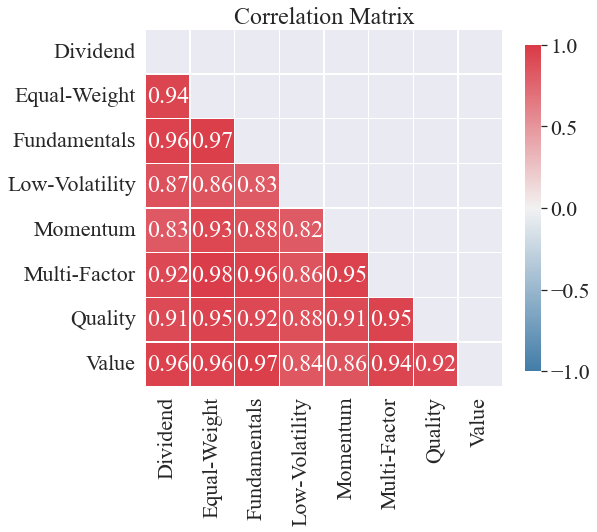

In [60]:
'''Calculate correlations (ETFs) in bull markets'''

etf_pf=pd.concat([dividend_pf_return_d_bull,equal_pf_return_d_bull,fundamentals_pf_return_d_bull,lowvol_pf_return_d_bull,
                  momentum_pf_return_d_bull,multi_pf_return_d_bull,quality_pf_return_d_bull,value_pf_return_d_bull],axis=1)[1008:]
etf_pf_correl_matrix=np.corrcoef(etf_pf,rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(etf_pf_correl_matrix, names=['Dividend','Equal-Weight','Fundamentals','Low-Volatility',
                                              'Momentum','Multi-Factor','Quality','Value'], include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)



In [61]:
'''Calculate portfolio annualized returns (bull markets)'''

#etfs
value_pf_return_y_bull=pf_return_annualized_d(value_pf_return_d_bull)
momentum_pf_return_y_bull=pf_return_annualized_d(momentum_pf_return_d_bull)
quality_pf_return_y_bull=pf_return_annualized_d(quality_pf_return_d_bull)
fundamentals_pf_return_y_bull=pf_return_annualized_d(fundamentals_pf_return_d_bull)
equal_pf_return_y_bull=pf_return_annualized_d(equal_pf_return_d_bull)
multi_pf_return_y_bull=pf_return_annualized_d(multi_pf_return_d_bull)
dividend_pf_return_y_bull=pf_return_annualized_d(dividend_pf_return_d_bull)
lowvol_pf_return_y_bull=pf_return_annualized_d(lowvol_pf_return_d_bull)

print(value_pf_return_y_bull,momentum_pf_return_y_bull,quality_pf_return_y_bull,fundamentals_pf_return_y_bull,
      multi_pf_return_y_bull,dividend_pf_return_y_bull,equal_pf_return_y_bull,lowvol_pf_return_y_bull)

#benchmarks
value_bm_pf_return_y_bull=pf_return_annualized_d(value_bm_pf_return_d_bull)
momentum_bm_pf_return_y_bull=pf_return_annualized_d(momentum_bm_pf_return_d_bull)
quality_bm_pf_return_y_bull=pf_return_annualized_d(quality_bm_pf_return_d_bull)
fundamentals_bm_pf_return_y_bull=pf_return_annualized_d(fundamentals_bm_pf_return_d_bull)
equal_bm_pf_return_y_bull=pf_return_annualized_d(equal_bm_pf_return_d_bull)
multi_bm_pf_return_y_bull=pf_return_annualized_d(multi_bm_pf_return_d_bull)
dividend_bm_pf_return_y_bull=pf_return_annualized_d(dividend_bm_pf_return_d_bull)
lowvol_bm_pf_return_y_bull=pf_return_annualized_d(lowvol_bm_pf_return_d_bull)

print(value_bm_pf_return_y_bull,momentum_bm_pf_return_y_bull,quality_bm_pf_return_y_bull,fundamentals_bm_pf_return_y_bull,
      multi_bm_pf_return_y_bull,dividend_bm_pf_return_y_bull,equal_bm_pf_return_y_bull,lowvol_bm_pf_return_y_bull)


Ttest_1sampResult(statistic=4.6101219053479285, pvalue=4.148341876047125e-06)
Ttest_1sampResult(statistic=4.446458378727569, pvalue=8.974664315022577e-06)
Ttest_1sampResult(statistic=4.788939739479576, pvalue=1.742719740615205e-06)
Ttest_1sampResult(statistic=4.755127635071927, pvalue=2.059228623747306e-06)
Ttest_1sampResult(statistic=5.443674415098911, pvalue=5.500959028835885e-08)
Ttest_1sampResult(statistic=4.8619403180050265, pvalue=1.2035805039453302e-06)
Ttest_1sampResult(statistic=4.852882835904889, pvalue=1.260233820606615e-06)
Ttest_1sampResult(statistic=5.568339228630413, pvalue=2.7697005321404403e-08)
0.19862359570959764 0.21052026113654243 0.21208807876093916 0.23647163002656235 0.2042657711561584 0.1829046288751659 0.23698645283547415 0.20832333621599175
Ttest_1sampResult(statistic=4.609996534807124, pvalue=4.150831206547954e-06)
Ttest_1sampResult(statistic=5.090417662534961, pvalue=3.74270161443232e-07)
Ttest_1sampResult(statistic=5.047156472486176, pvalue=4.7015085208787

In [62]:
#difference
value_diff_return_y_bull=pf_return_annualized_d(value_diff_return_d_bull)
momentum_diff_return_y_bull=pf_return_annualized_d(momentum_diff_return_d_bull)
quality_diff_return_y_bull=pf_return_annualized_d(quality_diff_return_d_bull)
fundamentals_diff_return_y_bull=pf_return_annualized_d(fundamentals_diff_return_d_bull)
equal_diff_return_y_bull=pf_return_annualized_d(equal_diff_return_d_bull)
multi_diff_return_y_bull=pf_return_annualized_d(multi_diff_return_d_bull)
dividend_diff_return_y_bull=pf_return_annualized_d(dividend_diff_return_d_bull)
lowvol_diff_return_y_bull=pf_return_annualized_d(lowvol_diff_return_d_bull)

print(value_diff_return_y_bull,momentum_diff_return_y_bull,quality_diff_return_y_bull,fundamentals_diff_return_y_bull,
      multi_diff_return_y_bull,dividend_diff_return_y_bull,equal_diff_return_y_bull,lowvol_diff_return_y_bull)

Ttest_1sampResult(statistic=-0.13374140123924455, pvalue=0.893613709102433)
Ttest_1sampResult(statistic=-1.3311921576458994, pvalue=0.18320420362510895)
Ttest_1sampResult(statistic=-1.004941843752441, pvalue=0.3149909446788623)
Ttest_1sampResult(statistic=2.3231366304644676, pvalue=0.020226069458700053)
Ttest_1sampResult(statistic=1.5704562202764287, pvalue=0.11638034809330966)
Ttest_1sampResult(statistic=-1.2055731848071936, pvalue=0.22804794899462638)
Ttest_1sampResult(statistic=-1.5451720979720351, pvalue=0.12237878103150207)
Ttest_1sampResult(statistic=-1.0353100117106557, pvalue=0.30059718320721285)
-0.001838018209239456 -0.017158628084010585 -0.01680104235880242 0.016124032581726455 -0.010777126304248652 -0.018724363535186805 0.015603466428112833 -0.02723346793824799


In [43]:
'''Information ratio (bull markets)'''

value_ir_bull=ir_d(value_pf_return_d_bull,value_bm_pf_return_d_bull)
momentum_ir_bull=ir_d(momentum_pf_return_d_bull,momentum_bm_pf_return_d_bull)
quality_ir_bull=ir_d(quality_pf_return_d_bull,quality_bm_pf_return_d_bull)
fundamentals_ir_bull=ir_d(fundamentals_pf_return_d_bull,fundamentals_bm_pf_return_d_bull)
lowvol_ir_bull=ir_d(lowvol_pf_return_d_bull,lowvol_bm_pf_return_d_bull)
equal_ir_bull=ir_d(equal_pf_return_d_bull,equal_bm_pf_return_d_bull)
dividend_ir_bull=ir_d(dividend_pf_return_d_bull,dividend_bm_pf_return_d_bull)
multi_ir_bull=ir_d(multi_pf_return_d_bull,multi_bm_pf_return_d_bull)

print(value_ir_bull,momentum_ir_bull,quality_ir_bull,fundamentals_ir_bull,
      multi_ir_bull,dividend_ir_bull,equal_ir_bull,lowvol_ir_bull)

0.035865763465569356
0.04761692477873767
0.05802665525163847
0.026907724918154848
0.08535370624815565
0.04394250979642622
0.04735653048998158
0.03514435885015692
-0.03445760032314975 -0.4638975557122421 -0.3098546386229182 0.7341385368095752 -0.40973590334643273 -0.390445892133808 0.4144341519996242 -0.2565169087836003


In [44]:
'''CAPM (bull markets)'''

print('VALUE')
value_capm_bull=capm_d(value_pf_return_d_bull,value_bm_pf_return_d_bull)
print('\n MOMENTUM')
momentum_capm_bull=capm_d(momentum_pf_return_d_bull,momentum_bm_pf_return_d_bull)
print('\n QUALITY')
quality_capm_bull=capm_d(quality_pf_return_d_bull,quality_bm_pf_return_d_bull)
print('\n FUNDAMENTALS')
fundamentals_capm_bull=capm_d(fundamentals_pf_return_d_bull,fundamentals_bm_pf_return_d_bull)
print('\n LOW VOLATILITY')
lowvol_capm_bull=capm_d(lowvol_pf_return_d_bull,lowvol_bm_pf_return_d_bull)
print('\n EQUAL-WEIGHT')
equal_capm_bull=capm_d(equal_pf_return_d_bull,equal_bm_pf_return_d_bull)
print('\n DIVIDEND')
dividend_capm_bull=capm_d(dividend_pf_return_d_bull,dividend_bm_pf_return_d_bull)
print('\n MULTI-FACTOR')
multi_capm_bull=capm_d(multi_pf_return_d_bull,multi_bm_pf_return_d_bull)


VALUE
alpha:  const    0.004319
dtype: float64

 Breusch-Pagan test:  (45.777386030868165, 1.3248416517677268e-11, 46.277611428420876, 1.1767877965223776e-11)

 VIF:     VIF Factor features
0    1.005246    const
1    1.000000        0 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 2.449e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:09:13   Log-Likelihood:                 18975.
No. Observations:                4052   AIC:                        -3.795e+04
Df Residuals:                    4050   BIC:                        -3.793e+04
Df Model:                           1                                         
Covariance Type:                  HC3              

alpha:  const   -0.018719
dtype: float64

 Breusch-Pagan test:  (10.052658019575716, 0.001521282883065947, 10.071383812609005, 0.0015164411130574413)

 VIF:     VIF Factor features
0      1.0068    const
1      1.0000        0 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 4.385e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:09:13   Log-Likelihood:                 20415.
No. Observations:                4333   AIC:                        -4.083e+04
Df Residuals:                    4331   BIC:                        -4.081e+04
Df Model:                           1                                         
Covariance Type:                  HC3                       

## Assumptions

__Linearity__

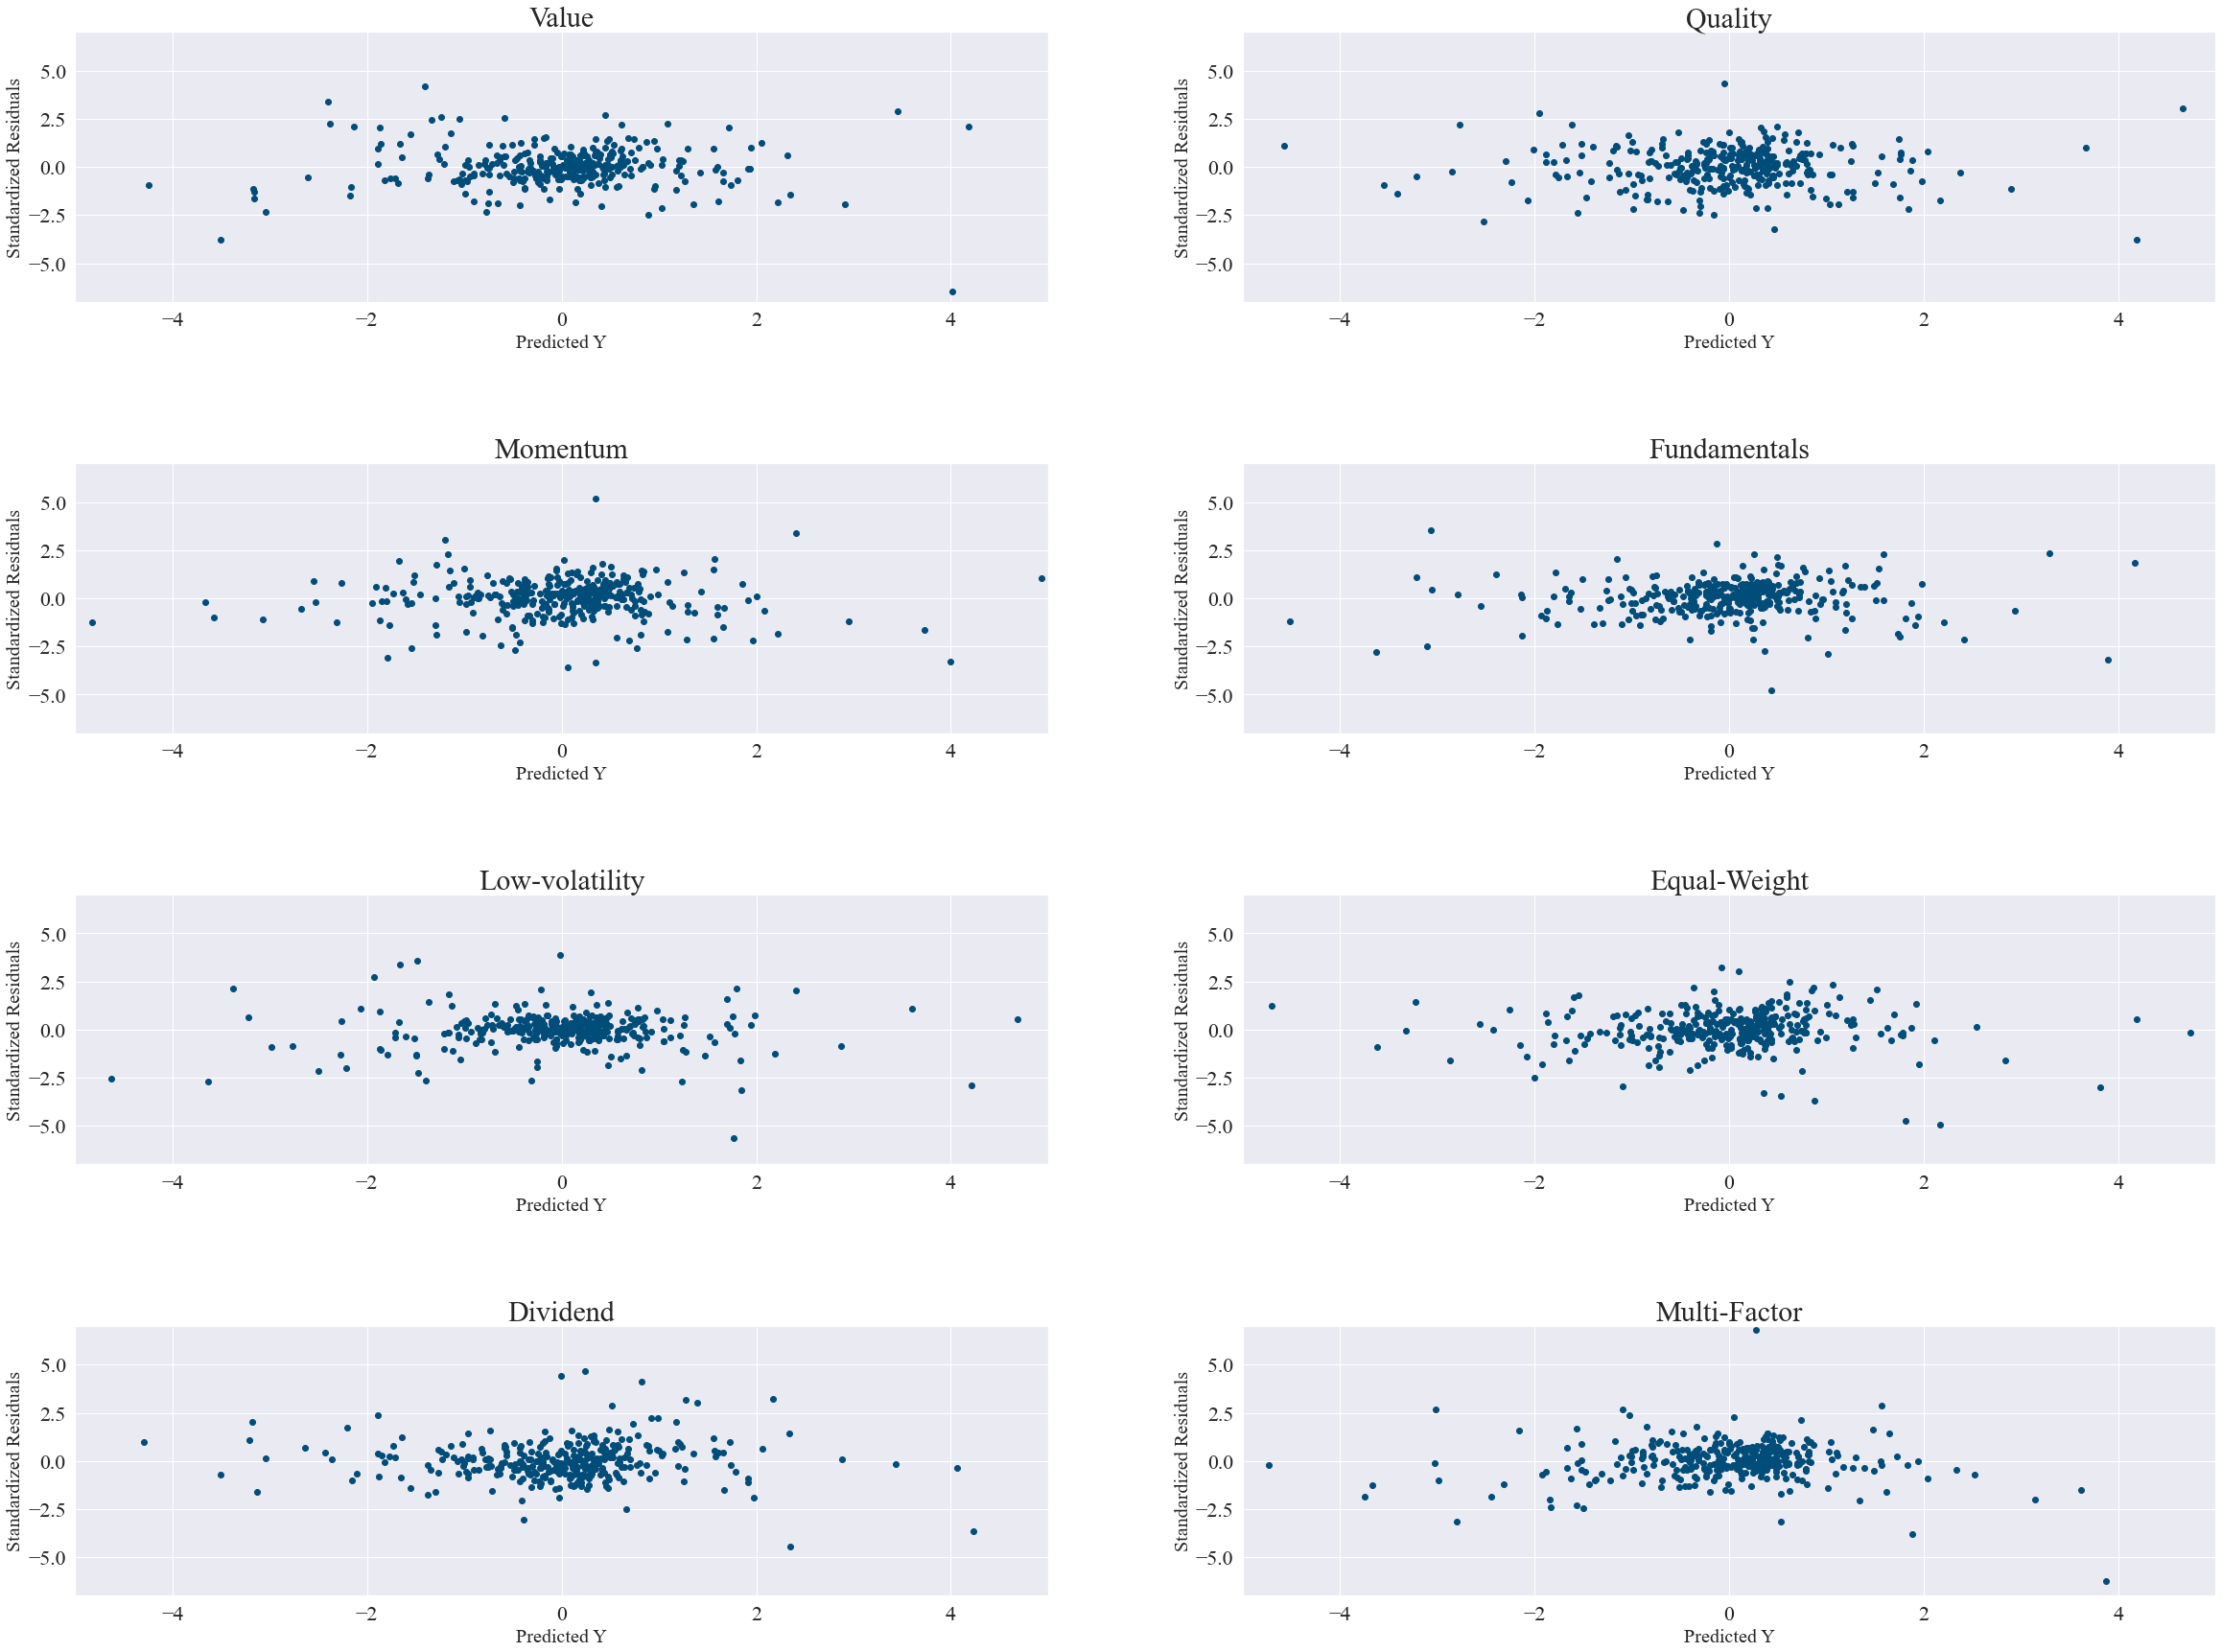

In [45]:
#bear markets
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid_bear=[value_capm_bear,quality_capm_bear,momentum_capm_bear,fundamentals_capm_bear,
            lowvol_capm_bear,equal_capm_bear,dividend_capm_bear,multi_capm_bear]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid_bear):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

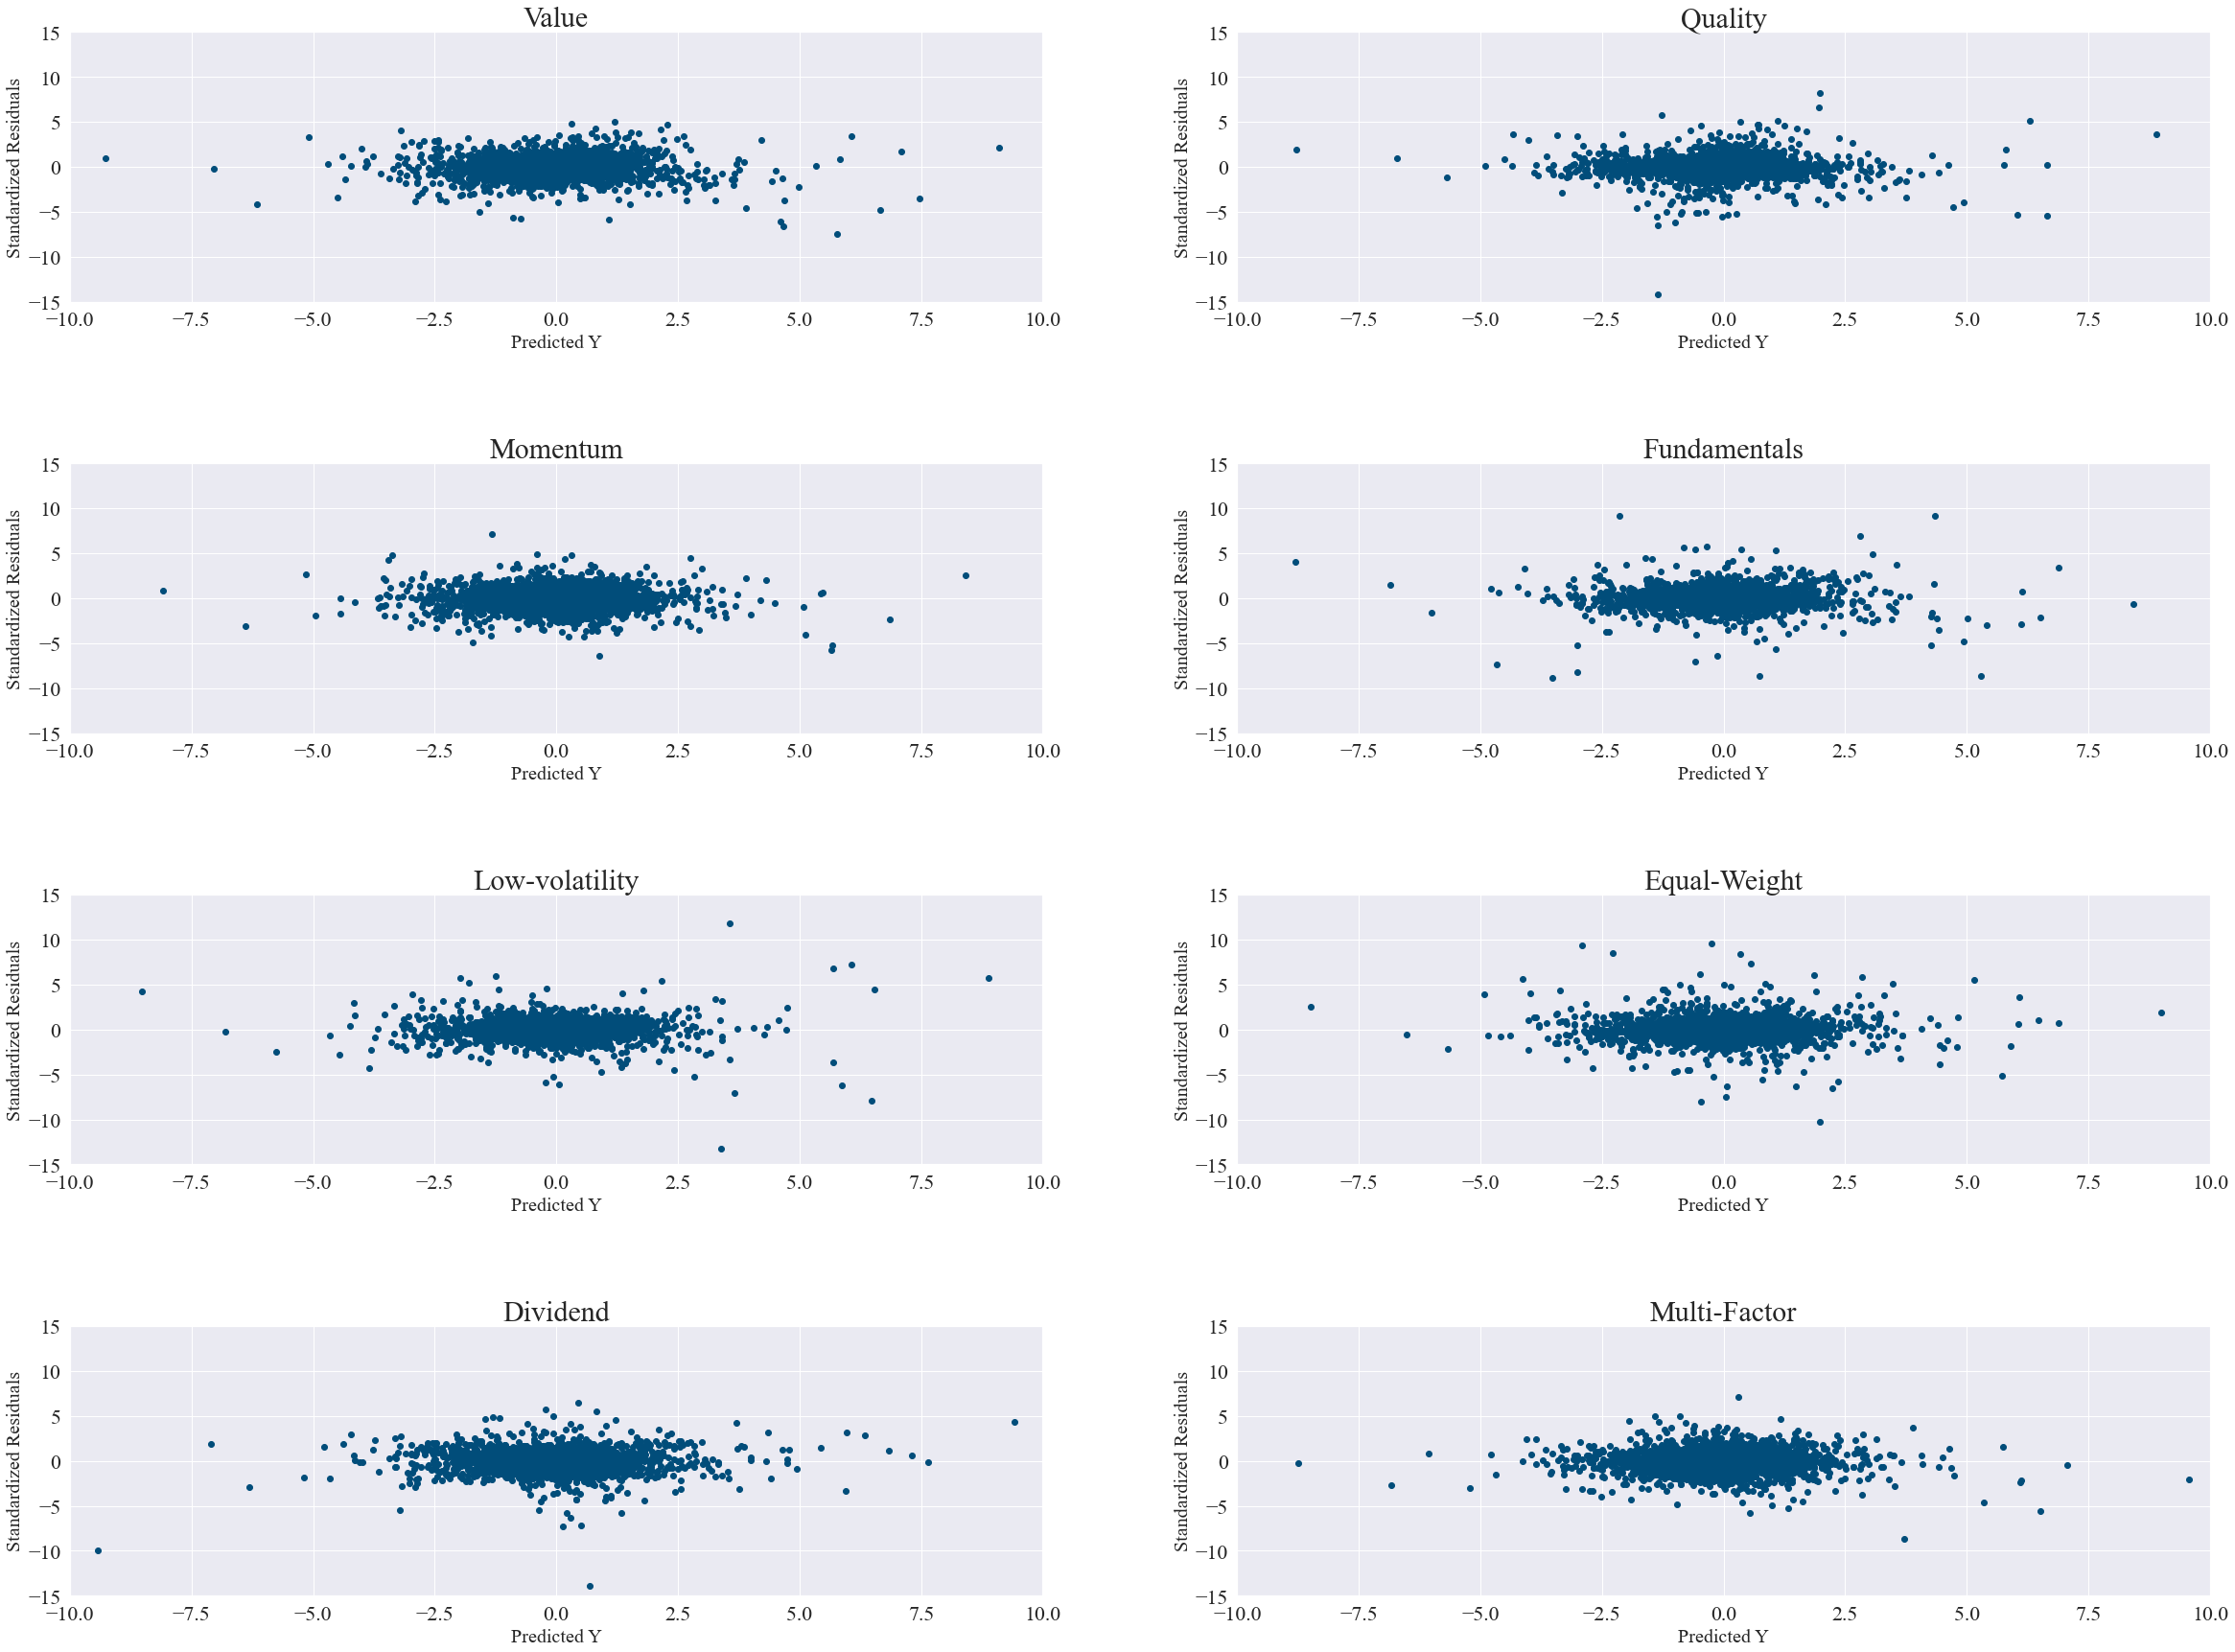

In [46]:
#bull markets
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid_bull=[value_capm_bull,quality_capm_bull,momentum_capm_bull,fundamentals_capm_bull,
            lowvol_capm_bull,equal_capm_bull,dividend_capm_bull,multi_capm_bull]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid_bull):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-15, 15])
    ax[count].set_xlim([-10, 10])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hyphothesis 4

In [114]:
'''Factor annualized excess returns'''

smb_return_y=pf_return_annualized(factors['SMB'][1:])
hml_return_y=pf_return_annualized(factors['HML'][1:])
mom_return_y=pf_return_annualized(factors['MOM'][1:])
bab_return_y=pf_return_annualized(factors['BAB'][1:])
qmj_return_y=pf_return_annualized(factors['QMJ'][1:])

print('\n Annualized returns: \n SMB: ',smb_return_y,'\n HML: ',hml_return_y,
      '\n MOM: ',mom_return_y,'\n BAB: ',bab_return_y,
     '\n QMJ: ',qmj_return_y)


 Annualized returns: 
 SMB:  0.012393227885418856 
 HML:  -0.01882871605922143 
 MOM:  -0.0050622065777273795 
 BAB:  0.06989171383958537 
 QMJ:  0.02679831782595743


In [48]:
'''Factor annualized standard deviation'''

smb_std_y=pf_std_annualized(factors['SMB'][1:])
hml_std_y=pf_std_annualized(factors['HML'][1:])
mom_std_y=pf_std_annualized(factors['MOM'][1:])
bab_std_y=pf_std_annualized(factors['BAB'][1:])
qmj_std_y=pf_std_annualized(factors['QMJ'][1:])

print('\n Annualized standard deviation: \n SMB: ',smb_std_y,'\n HML: ',hml_std_y,
      '\n MOM: ',mom_std_y,'\n BAB: ',bab_std_y,
     '\n QMJ: ',qmj_std_y)


 Annualized standard deviation: 
 SMB:  0.07772878352753973 
 HML:  0.08676857349127728 
 MOM:  0.15569873353240907 
 BAB:  0.09811927668549746 
 QMJ:  0.08936206086350726


Text(0.5, 1.0, 'Correlation Matrix')

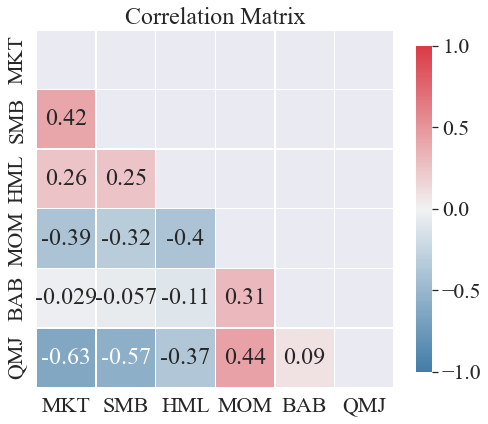

In [49]:
'''Correlation matrix - factors'''

corr_matrix_factors = np.corrcoef(factors.iloc[1:,:],rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix_factors, names=factors.iloc[:,:].columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [50]:
'''Carhart'''

def carhart(pf_return,factors,bm_return):
    X = np.column_stack((bm_return,factors['SMB'],factors['HML'],factors['MOM']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit()
    return print(results.summary())

print('VALUE')
value_carhart=carhart(value_pf_return_m,factors[20:],value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_carhart=carhart(momentum_pf_return_m,factors[28:],momentum_bm_pf_return_m)
print('\n QUALITY')
quality_carhart=carhart(quality_pf_return_m,factors[37:],quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_carhart=carhart(fundamentals_pf_return_m,factors[37:],fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_carhart=carhart(lowvol_pf_return_m,factors[49:],lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_carhart=carhart(equal_pf_return_m,factors[1:],equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_carhart=carhart(dividend_pf_return_m,factors[9:],dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_carhart=carhart(multi_pf_return_m,factors[6:],multi_bm_pf_return_m)

VALUE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1554.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          1.65e-151
Time:                        13:09:27   Log-Likelihood:                 707.86
No. Observations:                 209   AIC:                            -1406.
Df Residuals:                     204   BIC:                            -1389.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.816   

In [426]:
'''6-factor model'''

def six_factors(pf_return,factors,bm_return):
    X = np.column_stack((bm_return,factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    
    #Calculate predicted Y values and standardize them
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
    #Calculate standardized residuals
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    
    #Breush-Pagan test
    test = sms.het_breuschpagan(results.resid, results.model.exog)

    #Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif["features"] = ['intercept','BM','SMB','HML','MOM','BAB','QMJ']
    
    print("\n Breusch-Pagan test: ", test)
    print("\n VIF: ", vif, "\n")
    print("alpha: ", results.params[0:-1]*12)

    return standardized_predicted_Y,standardized_residuals,print(results.summary())
    
print('VALUE')
value_six_factors=six_factors(value_pf_return_m,factors[20:],value_bm_pf_return_m)
print('\n MOMENTUM')
momentum_six_factors=six_factors(momentum_pf_return_m,factors[28:],momentum_bm_pf_return_m)
print('\n QUALITY')
quality_six_factors=six_factors(quality_pf_return_m,factors[37:],quality_bm_pf_return_m)
print('\n FUNDAMENTALS')
fundamentals_six_factors=six_factors(fundamentals_pf_return_m,factors[37:],fundamentals_bm_pf_return_m)
print('\n LOW VOLATILITY')
lowvol_six_factors=six_factors(lowvol_pf_return_m,factors[49:],lowvol_bm_pf_return_m)
print('\n EQUAL-WEIGHT')
equal_six_factors=six_factors(equal_pf_return_m,factors[1:],equal_bm_pf_return_m)
print('\n DIVIDEND')
dividend_six_factors=six_factors(dividend_pf_return_m,factors[9:],dividend_bm_pf_return_m)
print('\n MULTI-FACTOR')
multi_six_factors=six_factors(multi_pf_return_m,factors[6:],multi_bm_pf_return_m)

VALUE

 Breusch-Pagan test:  (12.32447412067425, 0.05510950899331474, 2.1096878231676106, 0.053658635094667215)

 VIF:     VIF Factor   features
0    1.159390  intercept
1    1.797726         BM
2    1.500763        SMB
3    1.349422        HML
4    1.599073        MOM
5    1.142245        BAB
6    2.013110        QMJ 

alpha:  const    -0.000132
x1       11.904231
x2        1.029687
x3        0.846835
x4       -0.332877
x5        0.075334
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     522.2
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          4.71e-120
Time:                        12:56:26   Log-Likelihood:                 712.62
No. Observations:                 209   AIC:                       

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1024.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          1.21e-155
Time:                        12:56:26   Log-Likelihood:                 771.22
No. Observations:                 223   AIC:                            -1528.
Df Residuals:                     216   BIC:                            -1505.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -2.849      0.0

## Bear and bull markets

In [121]:
smb_bear=pd.concat((factors_d['SMB'][1202:1485],factors_d['SMB'][1515:1557],factors_d['SMB'][4313:4336]))
hml_bear=pd.concat((factors_d['HML'][1202:1485],factors_d['HML'][1515:1557],factors_d['HML'][4313:4336]))
mom_bear=pd.concat((factors_d['MOM'][1202:1485],factors_d['MOM'][1515:1557],factors_d['MOM'][4313:4336]))
bab_bear=pd.concat((factors_d['BAB'][1202:1485],factors_d['BAB'][1515:1557],factors_d['BAB'][4313:4336]))
qmj_bear=pd.concat((factors_d['QMJ'][1202:1485],factors_d['QMJ'][1515:1557],factors_d['QMJ'][4313:4336]))

smb_bull=pd.concat((factors_d['SMB'][1:1202],factors_d['SMB'][1485:1515],factors_d['SMB'][1557:4313],factors_d['SMB'][4336:]))
hml_bull=pd.concat((factors_d['HML'][1:1202],factors_d['HML'][1485:1515],factors_d['HML'][1557:4313],factors_d['HML'][4336:]))
mom_bull=pd.concat((factors_d['MOM'][1:1202],factors_d['MOM'][1485:1515],factors_d['MOM'][1557:4313],factors_d['MOM'][4336:]))
bab_bull=pd.concat((factors_d['BAB'][1:1202],factors_d['BAB'][1485:1515],factors_d['BAB'][1557:4313],factors_d['BAB'][4336:]))
qmj_bull=pd.concat((factors_d['QMJ'][1:1202],factors_d['QMJ'][1485:1515],factors_d['QMJ'][1557:4313],factors_d['QMJ'][4336:]))

In [90]:
'''Factor annualized excess returns (bear markets)'''

smb_return_bear=pf_return_annualized_d(smb_bear)
hml_return_bear=pf_return_annualized_d(hml_bear)
mom_return_bear=pf_return_annualized_d(mom_bear)
bab_return_bear=pf_return_annualized_d(bab_bear)
qmj_return_bear=pf_return_annualized_d(qmj_bear)

print('\n Annualized returns: \n SMB: ',smb_return_bear,'\n HML: ',hml_return_bear,
      '\n MOM: ',mom_return_bear,'\n BAB: ',bab_return_bear,
     '\n QMJ: ',qmj_return_bear)


 Annualized returns: 
 SMB:  -0.08797456575460572 
 HML:  -0.24760374942472974 
 MOM:  0.5972966778642457 
 BAB:  -0.24767455423019857 
 QMJ:  0.5840180918745002


In [122]:
'''Factor annualized excess returns (bull markets)'''

smb_return_bull=pf_return_annualized_d(smb_bull)
hml_return_bull=pf_return_annualized_d(hml_bull)
mom_return_bull=pf_return_annualized_d(mom_bull)
bab_return_bull=pf_return_annualized_d(bab_bull)
qmj_return_bull=pf_return_annualized_d(qmj_bull)

print('\n Annualized returns: \n SMB: ',smb_return_bull,'\n HML: ',hml_return_bull,
      '\n MOM: ',mom_return_bull,'\n BAB: ',bab_return_bull,
     '\n QMJ: ',qmj_return_bull)


 Annualized returns: 
 SMB:  0.021710912115319614 
 HML:  0.0046324260259487104 
 MOM:  -0.038749678583352876 
 BAB:  0.10426501679642919 
 QMJ:  -0.008001375524023246


In [67]:
'''Factor annualized standard deviation (bear markets)'''

smb_std_bear=pf_std_annualized_d(smb_bear)
hml_std_bear=pf_std_annualized_d(hml_bear)
mom_std_bear=pf_std_annualized_d(mom_bear)
bab_std_bear=pf_std_annualized_d(bab_bear)
qmj_std_bear=pf_std_annualized_d(qmj_bear)

print('\n Annualized stds: \n SMB: ',smb_std_bear,'\n HML: ',hml_std_bear,
      '\n MOM: ',mom_std_bear,'\n BAB: ',bab_std_bear,
     '\n QMJ: ',qmj_std_bear)


 Annualized stds: 
 SMB:  0.12068825341023842 
 HML:  0.1237877824545687 
 MOM:  0.2252885522783062 
 BAB:  0.2289534937425034 
 QMJ:  0.13847983953559376


In [123]:
'''Factor annualized standard deviation (bull markets)'''

smb_std_bull=pf_std_annualized_d(smb_bull)
hml_std_bull=pf_std_annualized_d(hml_bull)
mom_std_bull=pf_std_annualized_d(mom_bull)
bab_std_bull=pf_std_annualized_d(bab_bull)
qmj_std_bull=pf_std_annualized_d(qmj_bull)

print('\n Annualized stds: \n SMB: ',smb_std_bull,'\n HML: ',hml_std_bull,
      '\n MOM: ',mom_std_bull,'\n BAB: ',bab_std_bull,
     '\n QMJ: ',qmj_std_bull)



 Annualized stds: 
 SMB:  0.07889780143250133 
 HML:  0.08949671913709312 
 MOM:  0.15834126803330278 
 BAB:  0.10941564379013187 
 QMJ:  0.0858050826810228


Text(0.5, 1.0, 'Correlation Matrix')

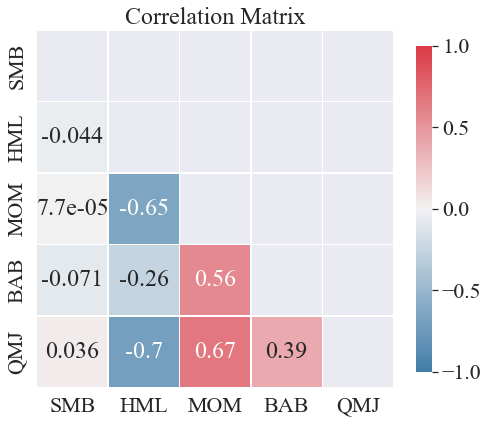

In [125]:
'''Correlation matrix - factors (bear markets)'''

corr_matrix_factors_bear = np.corrcoef(pd.concat((smb_bear,hml_bear,mom_bear,bab_bear,qmj_bear),axis=1),rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix_factors_bear, names=factors.iloc[:,1:].columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)


Text(0.5, 1.0, 'Correlation Matrix')

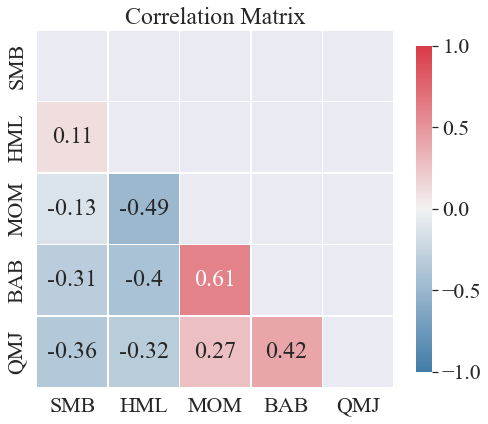

In [124]:
'''Correlation matrix - factors (bull markets)'''

corr_matrix_factors_bull = np.corrcoef(pd.concat((smb_bull,hml_bull,mom_bull,bab_bull,qmj_bull),axis=1),rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix_factors_bull, names=factors.iloc[:,1:].columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [87]:
factors_bear=pd.concat((smb_bear,hml_bear,mom_bear,bab_bear,qmj_bear),axis=1)
factors_bear

,SMB,HML,MOM,BAB,QMJ
Date,,,,,
2007-10-10,0.000698,-0.004793,0.007098,0.007923,0.001349
2007-11-10,-0.005321,0.006652,-0.005826,0.002448,-0.003907
2007-12-10,0.000363,-0.003492,0.009632,0.000527,0.001261
2007-10-15,-0.003011,0.000410,0.008192,0.004676,0.003822
2007-10-16,-0.000444,-0.001050,0.010059,0.004542,0.004431
...,...,...,...,...,...
2020-03-17,-0.003467,-0.017506,0.016184,0.032449,0.013097
2020-03-18,-0.029241,-0.025229,-0.006666,-0.062060,0.008712
2020-03-19,0.035202,0.001855,-0.006115,0.016749,-0.010527


In [126]:
factors_bull=pd.concat((smb_bull,hml_bull,mom_bull,bab_bull,qmj_bull),axis=1)
factors_bull

,SMB,HML,MOM,BAB,QMJ
Date,,,,,
2003-02-01,-0.010499,-0.003475,-0.016417,-0.020307,-0.008407
2003-03-01,-0.004331,0.001835,0.001362,0.001739,-0.002953
2003-06-01,-0.008671,0.000249,-0.014746,-0.007723,-0.012287
2003-07-01,0.001946,-0.005713,-0.006231,-0.003259,-0.000450
2003-08-01,0.004733,0.003928,0.008938,0.009267,0.004324
...,...,...,...,...,...
2021-12-27,-0.004703,0.003439,0.018870,0.002224,0.008572
2021-12-28,-0.006189,0.006718,-0.005639,0.005846,0.007895
2021-12-29,-0.001220,0.000574,0.003209,0.002202,0.006919


In [85]:
'''Six factor model (bear markets)'''

def six_factors_d(pf_return,bm_return,factors):
    X = np.column_stack((bm_return,factors['SMB'],factors['HML'],factors['MOM'],factors['BAB'],factors['QMJ']))
    X = sm.add_constant(X)
    model = sm.OLS(pf_return,X)
    results = model.fit(cov_type='HC3')
    
    #Calculate predicted Y values and standardize them
    predicted_Y=results.predict()
    standardized_predicted_Y=(predicted_Y-predicted_Y.mean())/predicted_Y.std()
    
    #Calculate standardized residuals
    influence = results.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    
    #Breush-Pagan test
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    
    #Calculate VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif["features"] = ['intercept','BM','SMB','HML','MOM','BAB','QMJ']
    
    print("alpha: ", results.params[0:-1]*252)
    print("\n Breusch-Pagan test: ", test)
    print("\n VIF: ", vif, "\n")
    return standardized_predicted_Y,standardized_residuals,print(results.summary())
    
print('VALUE')
value_six_factors_bear=six_factors_d(value_pf_return_d_bear,value_bm_pf_return_d_bear,factors_bear)
print('\n MOMENTUM')
momentum_six_factors_bear=six_factors_d(momentum_pf_return_d_bear,momentum_bm_pf_return_d_bear,factors_bear)
print('\n QUALITY')
quality_six_factors_bear=six_factors_d(quality_pf_return_d_bear,quality_bm_pf_return_d_bear,factors_bear)
print('\n FUNDAMENTALS')
fundamentals_six_factors_bear=six_factors_d(fundamentals_pf_return_d_bear,fundamentals_bm_pf_return_d_bear,factors_bear)
print('\n LOW VOLATILITY')
lowvol_six_factors_bear=six_factors_d(lowvol_pf_return_d_bear,lowvol_bm_pf_return_d_bear,factors_bear)
print('\n EQUAL-WEIGHT')
equal_six_factors_bear=six_factors_d(equal_pf_return_d_bear,equal_bm_pf_return_d_bear,factors_bear)
print('\n DIVIDEND')
dividend_six_factors_bear=six_factors_d(dividend_pf_return_d_bear,dividend_bm_pf_return_d_bear,factors_bear)
print('\n MULTI-FACTOR')
multi_six_factors_bear=six_factors_d(multi_pf_return_d_bear,multi_bm_pf_return_d_bear,factors_bear)

VALUE
alpha:  const      0.016530
x1       244.101923
x2       -25.186106
x3       -12.662980
x4       -15.618647
x5        13.880643
dtype: float64

 Breusch-Pagan test:  (42.315051625458125, 1.593307171151674e-07, 7.867268070720479, 5.975278411136214e-08)

 VIF:     VIF Factor   features
0    1.093268  intercept
1    1.651986         BM
2    1.114985        SMB
3    2.307387        HML
4    2.678341        MOM
5    1.548846        BAB
6    2.808743        QMJ 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          3.14e-215
Time:                        13:55:37   Log-Likelihood:                 1440.7
No. Observations:                 348   AIC:              

In [132]:
'''Six factor model (bull markets)'''

print('VALUE')
value_six_factors_bull=six_factors_d(value_pf_return_d_bull,value_bm_pf_return_d_bull,factors_bull[384:])
print('\n MOMENTUM')
momentum_six_factors_bull=six_factors_d(momentum_pf_return_d_bull,momentum_bm_pf_return_d_bull,factors_bull[565:])
print('\n QUALITY')
quality_six_factors_bull=six_factors_d(quality_pf_return_d_bull,quality_bm_pf_return_d_bull,factors_bull[756:])
print('\n FUNDAMENTALS')
fundamentals_six_factors_bull=six_factors_d(fundamentals_pf_return_d_bull,fundamentals_bm_pf_return_d_bull,factors_bull[756:])
print('\n LOW VOLATILITY')
lowvol_six_factors_bull=six_factors_d(lowvol_pf_return_d_bull,lowvol_bm_pf_return_d_bull,factors_bull[1007:])
print('\n EQUAL-WEIGHT')
equal_six_factors_bull=six_factors_d(equal_pf_return_d_bull,equal_bm_pf_return_d_bull,factors_bull)
print('\n DIVIDEND')
dividend_six_factors_bull=six_factors_d(dividend_pf_return_d_bull,dividend_bm_pf_return_d_bull,factors_bull[167:])
print('\n MULTI-FACTOR')
multi_six_factors_bull=six_factors_d(multi_pf_return_d_bull,multi_bm_pf_return_d_bull,factors_bull[103:])


VALUE
alpha:  const     -0.001404
x1       247.905389
x2        18.359286
x3        12.834707
x4        -1.892269
x5         4.481905
dtype: float64

 Breusch-Pagan test:  (95.37423099782157, 2.3106286294391818e-18, 16.250747771355012, 1.4159351970875649e-18)

 VIF:     VIF Factor   features
0    1.021193  intercept
1    1.526808         BM
2    1.216111        SMB
3    1.468834        HML
4    1.916897        MOM
5    2.139064        BAB
6    1.521023        QMJ 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     6013.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:44:20   Log-Likelihood:                 19093.
No. Observations:                4052   AIC:            

alpha:  const      0.000016
x1       196.343887
x2         6.715110
x3         7.373357
x4        -9.636734
x5        61.946428
dtype: float64

 Breusch-Pagan test:  (124.15795713913808, 2.1791674734526825e-24, 21.426567635203345, 7.809806886920287e-25)

 VIF:     VIF Factor   features
0    1.021779  intercept
1    1.437764         BM
2    1.217065        SMB
3    1.531108        HML
4    1.999089        MOM
5    2.189824        BAB
6    1.569710        QMJ 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     835.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:44:20   Log-Likelihood:                 14425.
No. Observations:                3429   AIC:                  

## Assumptions

__Linearity__

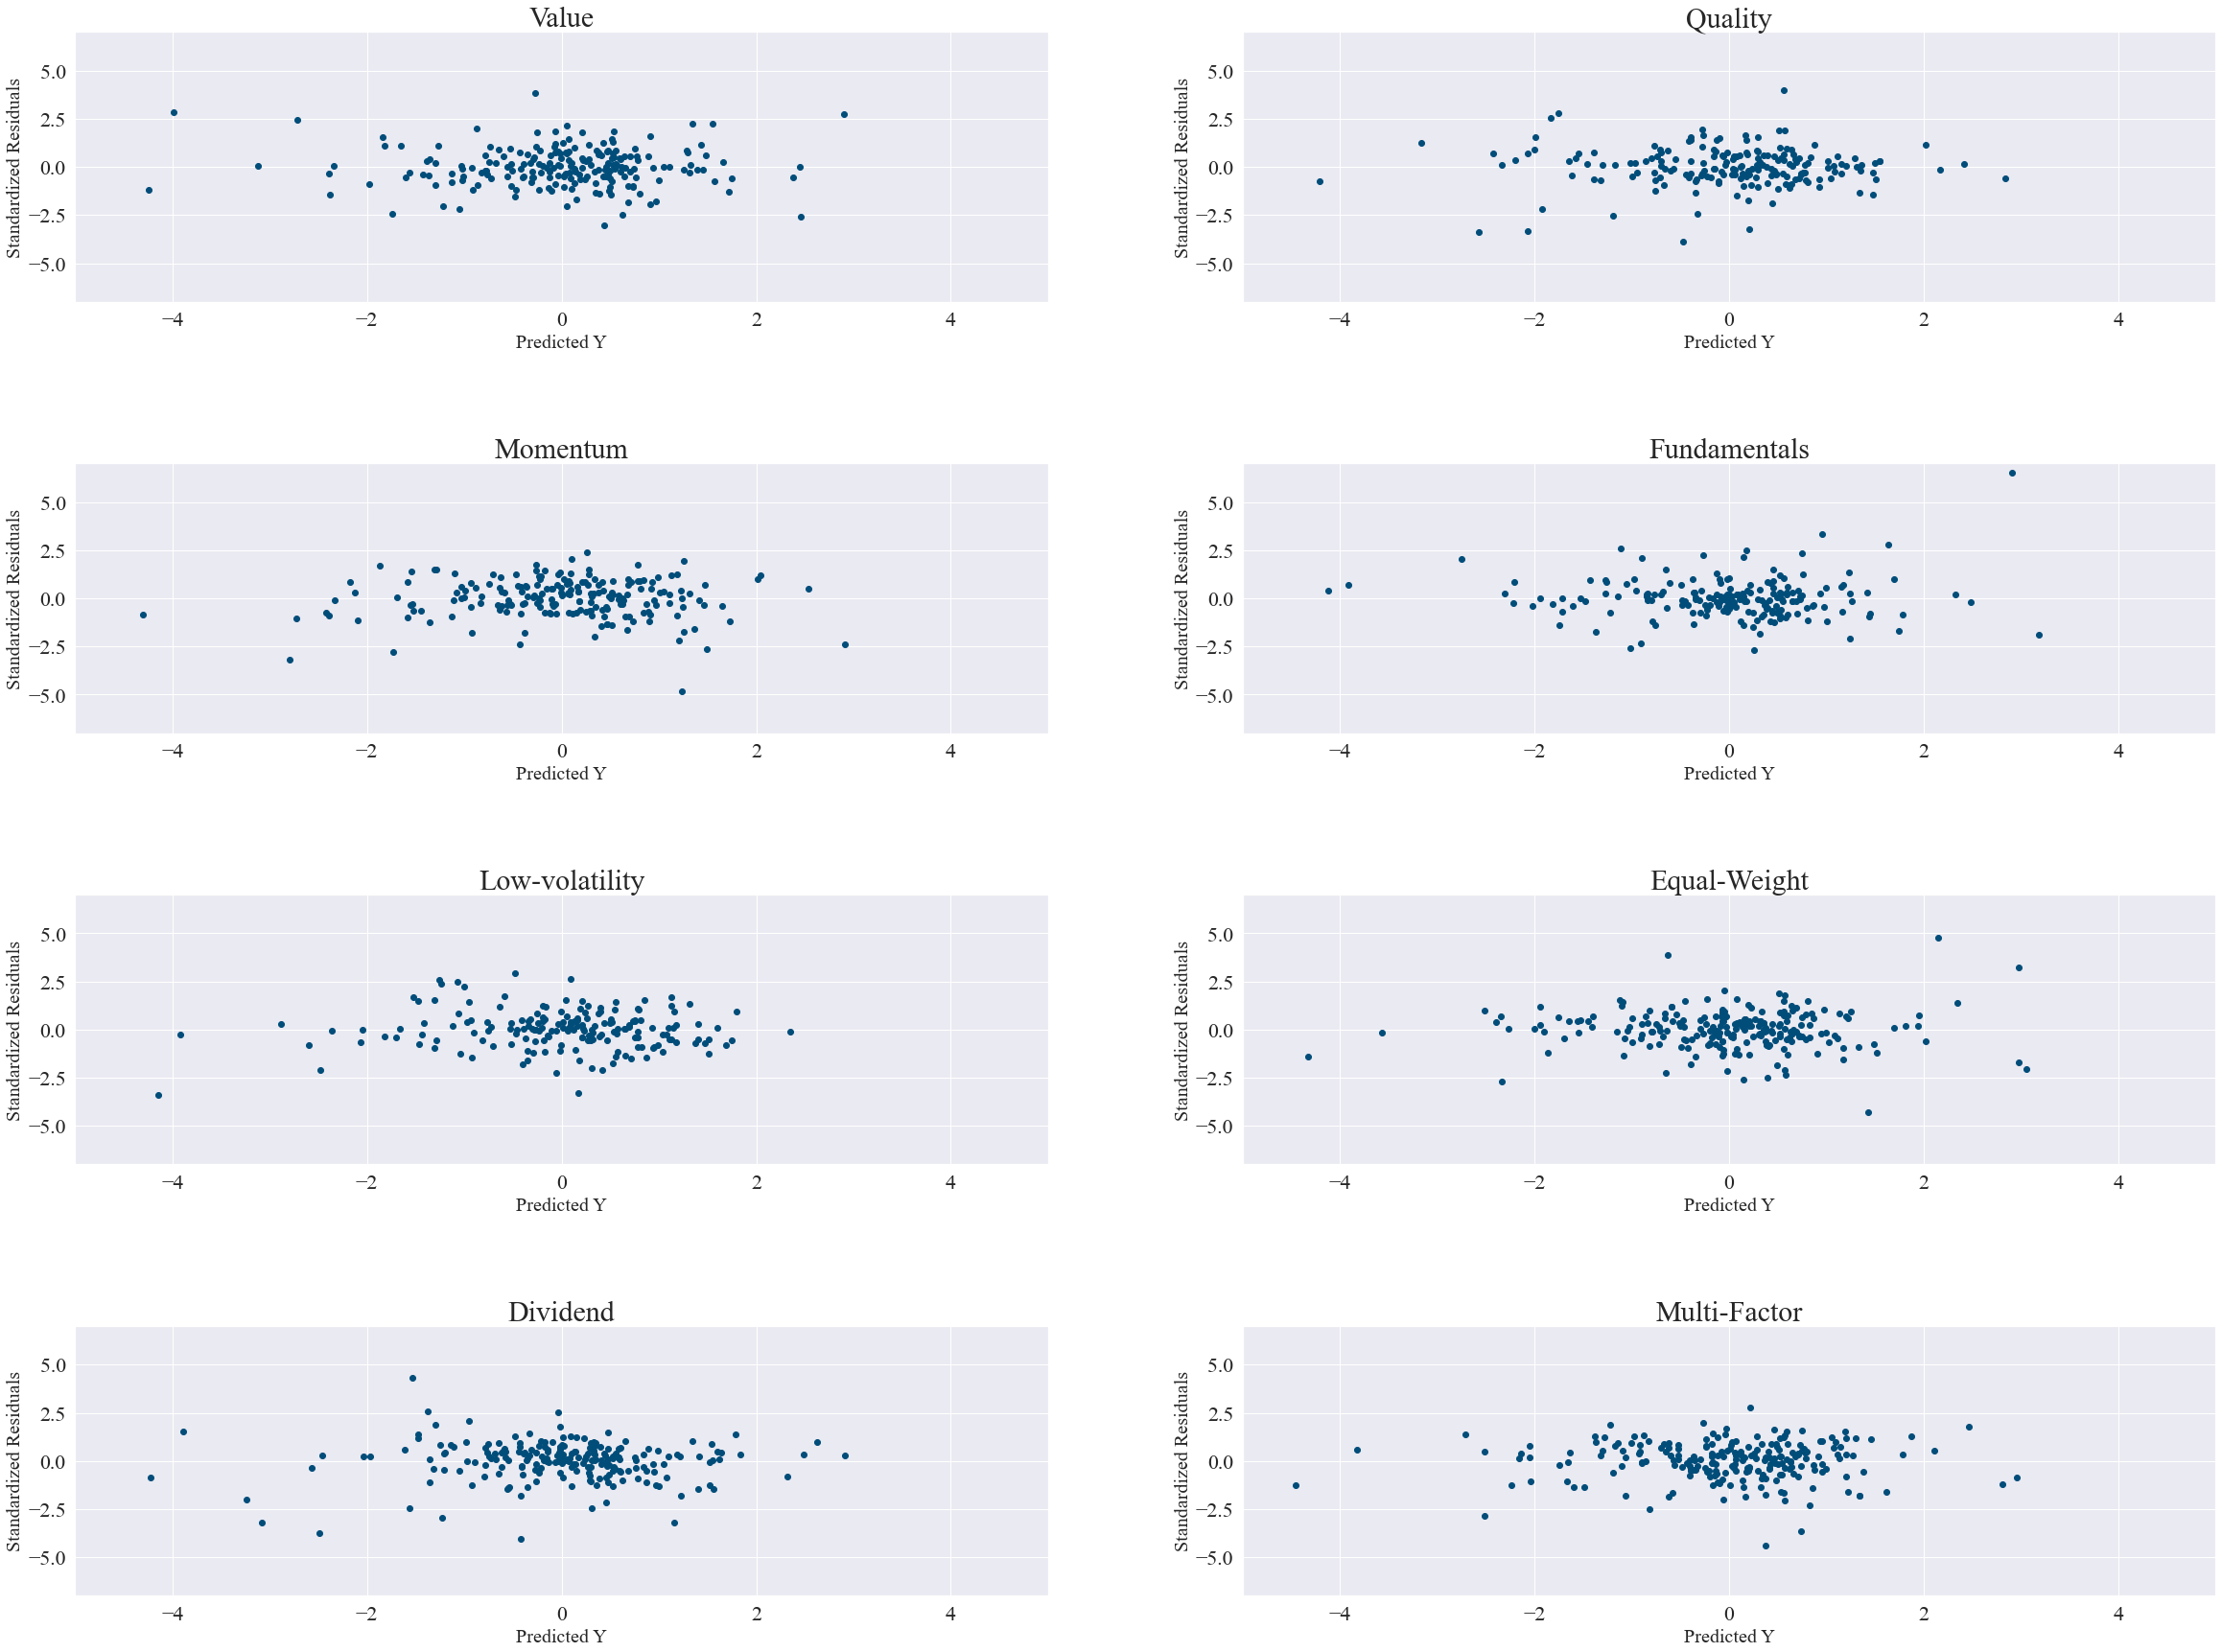

In [65]:
fig, ax = plt.subplots(4,2, figsize=(40,30))
ax=ax.flatten()

stand_resid=[value_six_factors,quality_six_factors,momentum_six_factors,fundamentals_six_factors,
            lowvol_six_factors,equal_six_factors,dividend_six_factors,multi_six_factors]
list=['Value','Quality','Momentum','Fundamentals','Low-volatility','Equal-Weight','Dividend','Multi-Factor']
for count, i in enumerate(stand_resid):
    ax[count].scatter(i[0],i[1], label= "Factor daily return distribution",color='#014D7A')
    ax[count].set_xlabel('Predicted Y',fontsize=20);
    ax[count].set_ylabel('Standardized Residuals',fontsize=20);

    ax[count].set_ylim([-7, 7])
    ax[count].set_xlim([-5, 5])
    ax[count].set_title(list[count],fontsize=30)

fig.subplots_adjust(hspace=0.6)

# Hypothesis 5

In [26]:
ind_pf=pd.read_csv("/Users/alexandra/Documents/master_thesis/data/12_Industry_Portfolios.csv",index_col='Date',parse_dates=True)
ind_pf=ind_pf.sub(rf['RF'], axis=0)

In [27]:
'''Calculate sector annualized returns'''

sectors_return_y=pf_return_annualized(ind_pf[1:])
sectors_return_y

NoDur    0.090709
Durbl    0.121977
Manuf    0.114400
Enrgy    0.062596
Chems    0.099231
BusEq    0.145737
Telcm    0.076113
Utils    0.096546
Shops    0.123992
Hlth     0.099994
Money    0.072243
Other    0.088568
dtype: float64

In [28]:
'''Calculate sector annualized standard deviations'''

sectors_std_y=pf_std_annualized(ind_pf[1:])
sectors_std_y

NoDur    0.124183
Durbl    0.299616
Manuf    0.194387
Enrgy    0.249385
Chems    0.143876
BusEq    0.177505
Telcm    0.154191
Utils    0.132173
Shops    0.146737
Hlth     0.135873
Money    0.198439
Other    0.173212
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

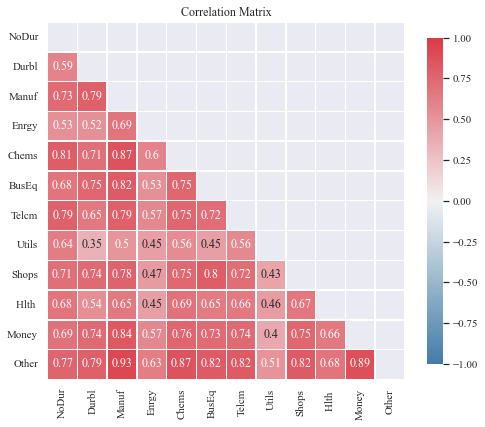

In [29]:
'''Correlation matrix - sectors'''

corr_matrix_sectors = np.corrcoef(ind_pf.iloc[1:,:],rowvar=False)

'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=1)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix_sectors, names=ind_pf.iloc[:,:].columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [31]:
'''Regress ETF portfolio returns against industry portfolios returns'''

def ind_regression(betas,pf_return,ind_pf_returns):
    x=ind_pf_returns
    y=pf_return
    n=len(ind_pf_returns)
    y_hat=np.sum(betas*ind_pf_returns,axis=1)
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    r_sq= (1 - (ss_res/ss_tot))
    
    #calculate t-stats and p-value for the betas
    residual = y - np.matmul(ind_pf_returns, betas)  # calculate the residual
    sigma_hat = np.sum(residual ** 2) / (n - 12 - 1)  # estimate of error term variance
    variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate
    t_stat = betas / np.sqrt(variance_beta_hat.diagonal())
    p_value = 1 - 2 * np.abs(0.5 - np.vectorize(scipy.t.cdf)(t_stat, n - 12 - 1))
    print("beta: ", t_stat,'\n',p_value)

    #calculate alpha
    alpha=(y-y_hat).mean()
    print ("alpha: ", alpha,scipy.ttest_1samp(y-y_hat,0))
    return -r_sq
    
#set contraints: coefficients must sum to 1 and be >0
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0, 
                   'jac' : lambda x: np.ones_like(x)}

bounds = [(0.0, 1.0)] * len(ind_pf.columns)

#initialize coefficients
x0 = np.ones_like(ind_pf.columns)/12

#find coefficients that maximize R-squared (etfs & benchmarks)
res_value = sci.optimize.minimize(ind_regression, x0=x0, args=(value_pf_return_m,ind_pf[20:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_value=res_value.x
print('VALUE: ',res_value)

<ipython-input-31-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.3452 4.0261 1.3641 4.3208 1.3859 2.0390 1.8432 2.3256 1.6447 2.0944
 2.1319 1.1023] 
 [0.1801 0.0001 0.1741 0.0000 0.1674 0.0428 0.0668 0.0211 0.1016 0.0375
 0.0343 0.2717]
alpha:  -0.001604493872033871 Ttest_1sampResult(statistic=-1.6671168476993112, pvalue=0.0969961270662902)
beta:  [1.3452 4.0261 1.3641 4.3208 1.3859 2.0390 1.8432 2.3256 1.6447 2.0944
 2.1319 1.1023] 
 [0.1801 0.0001 0.1741 0.0000 0.1674 0.0428 0.0668 0.0211 0.1016 0.0375
 0.0343 0.2717]
alpha:  -0.0016044939899455483 Ttest_1sampResult(statistic=-1.6671169705819795, pvalue=0.096996102603264)
beta:  [1.3452 4.0261 1.3641 4.3208 1.3859 2.0390 1.8432 2.3256 1.6447 2.0944
 2.1319 1.1023] 
 [0.1801 0.0001 0.1741 0.0000 0.1674 0.0428 0.0668 0.0211 0.1016 0.0375
 0.0343 0.2717]
alpha:  -0.0016044940584053321 Ttest_1sampResult(statistic=-1.6671170115794278, pvalue=0.09699609444164507)
beta:  [1.3452 4.0261 1.3641 4.3208 1.3859 2.0390 1.8432 2.3256 1.6447 2.0944
 2.1319 1.1023] 
 [0.1801 0.0001 0.1741 0.0000 0.1674

beta:  [1.7400 0.0000 2.4070 9.3188 0.3310 0.0000 2.1338 3.6390 0.0000 3.6985
 12.2777 1.6483] 
 [0.0834 1.0000 0.0170 0.0000 0.7410 1.0000 0.0341 0.0004 1.0000 0.0003
 0.0000 0.1009]
alpha:  -0.000333527848811622 Ttest_1sampResult(statistic=-0.49361254341167, pvalue=0.6221006406388304)
beta:  [1.7400 0.0000 2.4070 9.3188 0.3310 0.0000 2.1338 3.6390 0.0000 3.6985
 12.2777 1.6483] 
 [0.0834 1.0000 0.0170 0.0000 0.7410 1.0000 0.0341 0.0004 1.0000 0.0003
 0.0000 0.1009]
alpha:  -0.0003335278100757328 Ttest_1sampResult(statistic=-0.49361248902252447, pvalue=0.6221006789917484)
beta:  [1.7400 0.0000 2.4070 9.3188 0.3310 0.0000 2.1338 3.6390 0.0000 3.6985
 12.2777 1.6483] 
 [0.0834 1.0000 0.0170 0.0000 0.7410 1.0000 0.0341 0.0004 1.0000 0.0003
 0.0000 0.1009]
alpha:  -0.000333527758484918 Ttest_1sampResult(statistic=-0.4936124111773706, pvalue=0.6221007338848499)
beta:  [1.7400 0.0000 2.4070 9.3188 0.3310 0.0000 2.1338 3.6390 0.0000 3.6985
 12.2777 1.6483] 
 [0.0834 1.0000 0.0170 0.0000 0.74

beta:  [2.1486 0.0000 3.1815 8.6972 0.0000 0.0000 1.9707 3.9748 0.0634 3.8393
 12.3751 0.9613] 
 [0.0329 1.0000 0.0017 0.0000 1.0000 1.0000 0.0502 0.0001 0.9495 0.0002
 0.0000 0.3376]
alpha:  -0.0004251431444630401 Ttest_1sampResult(statistic=-0.6321044049145825, pvalue=0.5280128238803274)
beta:  [2.1486 0.0000 3.1815 8.6972 0.0000 0.0000 1.9707 3.9748 0.0634 3.8393
 12.3751 0.9613] 
 [0.0329 1.0000 0.0017 0.0000 1.0000 1.0000 0.0502 0.0001 0.9495 0.0002
 0.0000 0.3376]
alpha:  -0.00042514321292282505 Ttest_1sampResult(statistic=-0.6321045039194837, pvalue=0.5280127593180597)
beta:  [2.1486 0.0000 3.1815 8.6972 0.0000 0.0000 1.9707 3.9748 0.0634 3.8393
 12.3751 0.9613] 
 [0.0329 1.0000 0.0017 0.0000 1.0000 1.0000 0.0502 0.0001 0.9495 0.0002
 0.0000 0.3376]
alpha:  -0.00042514317418693495 Ttest_1sampResult(statistic=-0.6321044490837793, pvalue=0.5280127950770711)
beta:  [2.1486 0.0000 3.1815 8.6972 0.0000 0.0000 1.9707 3.9748 0.0634 3.8393
 12.3751 0.9613] 
 [0.0329 1.0000 0.0017 0.0000

beta:  [2.1841 0.0000 3.1695 8.7365 0.0000 0.0000 2.0419 3.9407 0.0905 3.7850
 12.4711 0.8675] 
 [0.0301 1.0000 0.0018 0.0000 1.0000 1.0000 0.0425 0.0001 0.9280 0.0002
 0.0000 0.3867]
alpha:  -0.00042186409919189156 Ttest_1sampResult(statistic=-0.6272589219844018, pvalue=0.5311774662706684)
beta:  [2.1841 0.0000 3.1695 8.7365 0.0000 0.0000 2.0419 3.9407 0.0905 3.7850
 12.4711 0.8675] 
 [0.0301 1.0000 0.0018 0.0000 1.0000 1.0000 0.0425 0.0001 0.9280 0.0002
 0.0000 0.3867]
alpha:  -0.0004218640252921135 Ttest_1sampResult(statistic=-0.6272588136766988, pvalue=0.5311775371158592)
beta:  [2.1841 0.0000 3.1695 8.7365 0.0000 0.0000 2.0419 3.9407 0.0905 3.7850
 12.4711 0.8675] 
 [0.0301 1.0000 0.0018 0.0000 1.0000 1.0000 0.0425 0.0001 0.9280 0.0002
 0.0000 0.3867]
alpha:  -0.0004218640327355644 Ttest_1sampResult(statistic=-0.627258824766328, pvalue=0.5311775298620176)
beta:  [2.1841 0.0000 3.1695 8.7365 0.0000 0.0000 2.0419 3.9407 0.0905 3.7850
 12.4711 0.8675] 
 [0.0301 1.0000 0.0018 0.0000 1

In [194]:
res_bm_value = sci.optimize.minimize(ind_regression, x0=x0, args=(value_bm_pf_return_m,ind_pf[20:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_value=res_bm_value.x
print('VALUE BM: ',res_bm_value)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.8285 5.4777 1.8528 5.8730 1.8843 2.7715 2.5053 3.1648 2.2371 2.8461
 2.8978 1.4985] 
 [0.0690 0.0000 0.0654 0.0000 0.0610 0.0061 0.0130 0.0018 0.0264 0.0049
 0.0042 0.1356]
alpha:  -0.0027351830476973716 Ttest_1sampResult(statistic=-3.980903698663621, pvalue=9.48550668000406e-05)
beta:  [1.8285 5.4777 1.8528 5.8730 1.8843 2.7715 2.5053 3.1648 2.2371 2.8461
 2.8978 1.4985] 
 [0.0690 0.0000 0.0654 0.0000 0.0610 0.0061 0.0130 0.0018 0.0264 0.0049
 0.0042 0.1356]
alpha:  -0.0027351831803319663 Ttest_1sampResult(statistic=-3.9809039011396816, pvalue=9.48549917447985e-05)
beta:  [1.8285 5.4777 1.8528 5.8730 1.8843 2.7715 2.5053 3.1648 2.2371 2.8461
 2.8978 1.4985] 
 [0.0690 0.0000 0.0654 0.0000 0.0610 0.0061 0.0130 0.0018 0.0264 0.0049
 0.0042 0.1356]
alpha:  -0.0027351832487917506 Ttest_1sampResult(statistic=-3.9809038739806626, pvalue=9.485500181229055e-05)
beta:  [1.8285 5.4777 1.8528 5.8730 1.8843 2.7715 2.5053 3.1648 2.2371 2.8461
 2.8978 1.4985] 
 [0.0690 0.0000 0.0654 0.0000

beta:  [2.7734 0.3335 3.5466 11.5061 2.3608 0.0000 5.5513 9.1290 0.1664 4.6762
 22.8889 4.9077] 
 [0.0061 0.7391 0.0005 0.0000 0.0192 1.0000 0.0000 0.0000 0.8681 0.0000
 0.0000 0.0000]
alpha:  -0.001476210309804262 Ttest_1sampResult(statistic=-4.4614333829661925, pvalue=1.332476227434713e-05)
beta:  [2.7734 0.3335 3.5465 11.5061 2.3608 0.0000 5.5513 9.1290 0.1664 4.6762
 22.8889 4.9077] 
 [0.0061 0.7391 0.0005 0.0000 0.0192 1.0000 0.0000 0.0000 0.8681 0.0000
 0.0000 0.0000]
alpha:  -0.0014762102582134477 Ttest_1sampResult(statistic=-4.461433212734993, pvalue=1.3324771933079411e-05)
beta:  [2.7734 0.3335 3.5465 11.5061 2.3608 0.0000 5.5513 9.1290 0.1664 4.6762
 22.8889 4.9077] 
 [0.0061 0.7391 0.0005 0.0000 0.0192 1.0000 0.0000 0.0000 0.8681 0.0000
 0.0000 0.0000]
alpha:  -0.0014762102881227166 Ttest_1sampResult(statistic=-4.4614333172074785, pvalue=1.3324766005423901e-05)
beta:  [2.7734 0.3335 3.5465 11.5061 2.3608 0.0000 5.5513 9.1290 0.1664 4.6762
 22.8889 4.9077] 
 [0.0061 0.7391 0.

beta:  [2.0857 0.0372 3.3295 11.5402 2.3278 0.0000 5.4593 9.6908 0.7110 4.7684
 22.8583 5.2443] 
 [0.0383 0.9704 0.0010 0.0000 0.0209 1.0000 0.0000 0.0000 0.4780 0.0000
 0.0000 0.0000]
alpha:  -0.0014803275280473526 Ttest_1sampResult(statistic=-4.489307260542798, pvalue=1.1830219779248791e-05)
beta:  [2.0857 0.0372 3.3295 11.5402 2.3278 0.0000 5.4593 9.6908 0.7110 4.7684
 22.8583 5.2443] 
 [0.0383 0.9704 0.0010 0.0000 0.0209 1.0000 0.0000 0.0000 0.4780 0.0000
 0.0000 0.0000]
alpha:  -0.00148032749824503 Ttest_1sampResult(statistic=-4.489307161707409, pvalue=1.1830224781182849e-05)
beta:  [2.0857 0.0372 3.3295 11.5402 2.3278 0.0000 5.4593 9.6908 0.7110 4.7684
 22.8583 5.2443] 
 [0.0383 0.9704 0.0010 0.0000 0.0209 1.0000 0.0000 0.0000 0.4780 0.0000
 0.0000 0.0000]
alpha:  -0.0014803275100518827 Ttest_1sampResult(statistic=-4.48930720342115, pvalue=1.1830222670102926e-05)
beta:  [1.9888 0.0345 3.2551 11.5570 2.4047 0.0000 5.5177 9.6560 0.7055 4.7829
 22.8013 5.3318] 
 [0.0481 0.9725 0.001

beta:  [1.9519 0.0886 3.1006 11.5817 2.5215 0.0000 5.5674 9.6555 0.5786 4.7928
 22.7972 5.4299] 
 [0.0524 0.9295 0.0022 0.0000 0.0125 1.0000 0.0000 0.0000 0.5635 0.0000
 0.0000 0.0000]
alpha:  -0.0014668320419243728 Ttest_1sampResult(statistic=-4.445807297799873, pvalue=1.4240295312524649e-05)
beta:  [1.9519 0.0886 3.1006 11.5817 2.5215 0.0000 5.5674 9.6555 0.5786 4.7928
 22.7972 5.4299] 
 [0.0524 0.9295 0.0022 0.0000 0.0125 1.0000 0.0000 0.0000 0.5635 0.0000
 0.0000 0.0000]
alpha:  -0.001466832049367824 Ttest_1sampResult(statistic=-4.445807322787898, pvalue=1.4240293801269194e-05)
beta:  [1.9519 0.0886 3.1006 11.5817 2.5215 0.0000 5.5674 9.6555 0.5786 4.7928
 22.7972 5.4299] 
 [0.0524 0.9295 0.0022 0.0000 0.0125 1.0000 0.0000 0.0000 0.5635 0.0000
 0.0000 0.0000]
alpha:  -0.0014668320871269386 Ttest_1sampResult(statistic=-4.445807448208376, pvalue=1.424028621594296e-05)
beta:  [1.9519 0.0886 3.1006 11.5817 2.5215 0.0000 5.5674 9.6555 0.5786 4.7928
 22.7972 5.4299] 
 [0.0524 0.9295 0.00

beta:  [1.9671 0.0878 3.0943 11.5866 2.5098 0.0000 5.5482 9.6530 0.5820 4.7917
 22.7929 5.4441] 
 [0.0506 0.9301 0.0023 0.0000 0.0129 1.0000 0.0000 0.0000 0.5612 0.0000
 0.0000 0.0000]
alpha:  -0.0014666038500742568 Ttest_1sampResult(statistic=-4.445058687332938, pvalue=1.4285639869687954e-05)
beta:  [1.9671 0.0878 3.0943 11.5866 2.5098 0.0000 5.5482 9.6530 0.5820 4.7917
 22.7929 5.4441] 
 [0.0506 0.9301 0.0023 0.0000 0.0129 1.0000 0.0000 0.0000 0.5612 0.0000
 0.0000 0.0000]
alpha:  -0.0014666039075471083 Ttest_1sampResult(statistic=-4.445058838755319, pvalue=1.4285630683778971e-05)
beta:  [1.9671 0.0878 3.0943 11.5866 2.5098 0.0000 5.5482 9.6530 0.5820 4.7917
 22.7929 5.4441] 
 [0.0506 0.9301 0.0023 0.0000 0.0129 1.0000 0.0000 0.0000 0.5612 0.0000
 0.0000 0.0000]
alpha:  -0.0014666038336473306 Ttest_1sampResult(statistic=-4.445058632879836, pvalue=1.428564317304013e-05)
beta:  [1.9671 0.0878 3.0943 11.5866 2.5098 0.0000 5.5482 9.6530 0.5820 4.7917
 22.7929 5.4441] 
 [0.0506 0.9301 0.0

In [195]:
res_momentum = sci.optimize.minimize(ind_regression, x0=x0, args=(momentum_pf_return_m,ind_pf[28:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_momentum=res_momentum.x
print('MOMENTUM: ',res_momentum)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.0708 3.2209 1.0862 3.3788 1.0898 1.6030 1.4766 1.8636 1.3140 1.6576
 1.6988 0.8686] 
 [0.2856 0.0015 0.2788 0.0009 0.2772 0.1106 0.1415 0.0639 0.1904 0.0991
 0.0910 0.3862]
alpha:  -0.001493885286797814 Ttest_1sampResult(statistic=-1.227440016170935, pvalue=0.22110002309961235)
beta:  [1.0708 3.2209 1.0862 3.3788 1.0898 1.6030 1.4766 1.8636 1.3140 1.6576
 1.6988 0.8686] 
 [0.2856 0.0015 0.2788 0.0009 0.2772 0.1106 0.1415 0.0639 0.1904 0.0991
 0.0910 0.3862]
alpha:  -0.0014938854166380816 Ttest_1sampResult(statistic=-1.2274401161280428, pvalue=0.2210999856324068)
beta:  [1.0708 3.2209 1.0862 3.3788 1.0898 1.6030 1.4766 1.8636 1.3140 1.6576
 1.6988 0.8686] 
 [0.2856 0.0015 0.2788 0.0009 0.2772 0.1106 0.1415 0.0639 0.1904 0.0991
 0.0910 0.3862]
alpha:  -0.0014938855003514705 Ttest_1sampResult(statistic=-1.2274401892391733, pvalue=0.22109995822795792)
beta:  [1.0708 3.2209 1.0862 3.3788 1.0898 1.6030 1.4766 1.8636 1.3140 1.6576
 1.6988 0.8686] 
 [0.2856 0.0015 0.2788 0.0009 0.277

beta:  [0.0000 2.2882 2.7644 2.4400 0.0000 7.8056 0.0000 2.7434 2.9193 3.5506
 0.0000 0.2740] 
 [1.0000 0.0232 0.0063 0.0156 1.0000 0.0000 1.0000 0.0067 0.0039 0.0005
 1.0000 0.7844]
alpha:  -0.003094486134158508 Ttest_1sampResult(statistic=-3.248353180707858, pvalue=0.0013614471040605742)
beta:  [0.0000 2.2882 2.7644 2.4400 0.0000 7.8056 0.0000 2.7434 2.9193 3.5506
 0.0000 0.2740] 
 [1.0000 0.0232 0.0063 0.0156 1.0000 0.0000 1.0000 0.0067 0.0039 0.0005
 1.0000 0.7844]
alpha:  -0.0030944862011766656 Ttest_1sampResult(statistic=-3.248353264214085, pvalue=0.0013614467246970531)
beta:  [0.0000 2.2882 2.7644 2.4400 0.0000 7.8056 0.0000 2.7434 2.9193 3.5506
 0.0000 0.2740] 
 [1.0000 0.0232 0.0063 0.0156 1.0000 0.0000 1.0000 0.0067 0.0039 0.0005
 1.0000 0.7844]
alpha:  -0.00309448612048799 Ttest_1sampResult(statistic=-3.2483531703001898, pvalue=0.0013614471513419596)
beta:  [0.0000 2.2882 2.7644 2.4400 0.0000 7.8056 0.0000 2.7434 2.9193 3.5506
 0.0000 0.2740] 
 [1.0000 0.0232 0.0063 0.0156 1

beta:  [0.0000 2.0304 3.3078 2.3472 0.0000 7.6437 0.0000 2.8291 2.8899 3.6049
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0200 1.0000 0.0000 1.0000 0.0052 0.0043 0.0004
 1.0000 1.0000]
alpha:  -0.00310465423531211 Ttest_1sampResult(statistic=-3.2671072118793925, pvalue=0.0012786828840112624)
beta:  [0.0000 2.0304 3.3078 2.3472 0.0000 7.6437 0.0000 2.8291 2.8899 3.6049
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0200 1.0000 0.0000 1.0000 0.0052 0.0043 0.0004
 1.0000 1.0000]
alpha:  -0.003104654200609456 Ttest_1sampResult(statistic=-3.267107161034883, pvalue=0.0012786831019118683)
beta:  [0.0000 2.0304 3.3078 2.3472 0.0000 7.6437 0.0000 2.8291 2.8899 3.6049
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0200 1.0000 0.0000 1.0000 0.0052 0.0043 0.0004
 1.0000 1.0000]
alpha:  -0.0031046542084158845 Ttest_1sampResult(statistic=-3.267107179553905, pvalue=0.0012786830225462438)
beta:  [0.0000 2.0335 3.3115 2.3488 0.0000 7.6067 0.0000 2.8175 2.9197 3.6083
 0.0000 0.0000] 
 [1.0000 0.0434 0.0011 0.0199 1

beta:  [0.0000 2.0303 3.3117 2.3404 0.0000 7.5931 0.0000 2.8237 2.9447 3.5907
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0203 1.0000 0.0000 1.0000 0.0053 0.0036 0.0004
 1.0000 1.0000]
alpha:  -0.0031015162861092226 Ttest_1sampResult(statistic=-3.2636730778690173, pvalue=0.0012934793285496685)
beta:  [0.0000 2.0303 3.3117 2.3404 0.0000 7.5931 0.0000 2.8237 2.9447 3.5907
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0203 1.0000 0.0000 1.0000 0.0053 0.0036 0.0004
 1.0000 1.0000]
alpha:  -0.003101516284789617 Ttest_1sampResult(statistic=-3.2636730829907656, pvalue=0.0012934793063636557)
beta:  [0.0000 2.0303 3.3117 2.3404 0.0000 7.5931 0.0000 2.8237 2.9447 3.5907
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0203 1.0000 0.0000 1.0000 0.0053 0.0036 0.0004
 1.0000 1.0000]
alpha:  -0.003101516331546644 Ttest_1sampResult(statistic=-3.263673134813609, pvalue=0.0012934790818812832)
beta:  [0.0000 2.0303 3.3117 2.3404 0.0000 7.5931 0.0000 2.8237 2.9447 3.5907
 0.0000 0.0000] 
 [1.0000 0.0437 0.0011 0.0203

In [196]:
res_bm_momentum = sci.optimize.minimize(ind_regression, x0=x0, args=(momentum_bm_pf_return_m,ind_pf[28:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_momentum=res_bm_momentum.x
print('MOMENTUM BM: ',res_bm_momentum)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.3654 4.1071 1.3850 4.3084 1.3897 2.0440 1.8828 2.3763 1.6755 2.1137
 2.1662 1.1076] 
 [0.1738 0.0001 0.1677 0.0000 0.1663 0.0423 0.0613 0.0185 0.0955 0.0359
 0.0316 0.2695]
alpha:  0.0003343254852204733 Ttest_1sampResult(statistic=0.3490678449972188, pvalue=0.7274056028119799)
beta:  [1.3654 4.1071 1.3850 4.3084 1.3897 2.0440 1.8828 2.3763 1.6755 2.1137
 2.1662 1.1076] 
 [0.1738 0.0001 0.1677 0.0000 0.1663 0.0423 0.0613 0.0185 0.0955 0.0359
 0.0316 0.2695]
alpha:  0.0003343253553802058 Ttest_1sampResult(statistic=0.34906770728159553, pvalue=0.7274057060399017)
beta:  [1.3654 4.1071 1.3850 4.3084 1.3897 2.0440 1.8828 2.3763 1.6755 2.1137
 2.1662 1.1076] 
 [0.1738 0.0001 0.1677 0.0000 0.1663 0.0423 0.0613 0.0185 0.0955 0.0359
 0.0316 0.2695]
alpha:  0.00033432527166681676 Ttest_1sampResult(statistic=0.34906762024064225, pvalue=0.7274057712834585)
beta:  [1.3654 4.1071 1.3850 4.3084 1.3897 2.0440 1.8828 2.3763 1.6755 2.1137
 2.1662 1.1076] 
 [0.1738 0.0001 0.1677 0.0000 0.1663 0

beta:  [0.0000 2.5669 2.3344 7.4784 0.5598 15.9884 0.0000 3.0423 5.2648 4.6979
 0.0000 0.0119] 
 [1.0000 0.0110 0.0206 0.0000 0.5763 0.0000 1.0000 0.0027 0.0000 0.0000
 1.0000 0.9905]
alpha:  -0.0013946817797062222 Ttest_1sampResult(statistic=-2.3269162792488727, pvalue=0.020970612728039163)
beta:  [0.0000 3.7384 2.6789 2.7031 0.9976 14.7339 0.0000 4.5671 5.2361 4.9972
 0.0000 0.4023] 
 [1.0000 0.0002 0.0080 0.0075 0.3197 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 0.6879]
alpha:  -0.0014455200350913086 Ttest_1sampResult(statistic=-2.446413824204909, pvalue=0.015292519468453145)
beta:  [0.0000 3.7384 2.6789 2.7031 0.9976 14.7339 0.0000 4.5671 5.2361 4.9972
 0.0000 0.4023] 
 [1.0000 0.0002 0.0080 0.0075 0.3197 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 0.6879]
alpha:  -0.001445520164931575 Ttest_1sampResult(statistic=-2.446414050393446, pvalue=0.01529251015914427)
beta:  [0.0000 3.7384 2.6789 2.7031 0.9976 14.7339 0.0000 4.5671 5.2361 4.9972
 0.0000 0.4023] 
 [1.0000 0.0002 0.0080 0.0075

beta:  [0.0000 3.1990 3.2200 4.6004 0.4399 15.6821 0.0000 4.3046 5.1774 4.9505
 0.0000 0.0890] 
 [1.0000 0.0016 0.0015 0.0000 0.6605 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 0.9291]
alpha:  -0.0014588352488521933 Ttest_1sampResult(statistic=-2.511060189216212, pvalue=0.012828501550365405)
beta:  [0.0000 3.1990 3.2200 4.6004 0.4399 15.6821 0.0000 4.3046 5.1774 4.9505
 0.0000 0.0890] 
 [1.0000 0.0016 0.0015 0.0000 0.6605 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 0.9291]
alpha:  -0.0014588352956092206 Ttest_1sampResult(statistic=-2.511060272940943, pvalue=0.012828498602920568)
beta:  [0.0000 3.1990 3.2200 4.6004 0.4399 15.6821 0.0000 4.3046 5.1774 4.9505
 0.0000 0.0890] 
 [1.0000 0.0016 0.0015 0.0000 0.6605 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 0.9291]
alpha:  -0.0014588352778686835 Ttest_1sampResult(statistic=-2.5110602411971015, pvalue=0.012828499720430464)
beta:  [0.0000 3.1990 3.2200 4.6004 0.4399 15.6821 0.0000 4.3046 5.1774 4.9505
 0.0000 0.0890] 
 [1.0000 0.0016 0.0015 0.00

beta:  [0.0000 3.2098 3.3000 4.5937 0.4372 15.5811 0.0000 4.2864 5.2930 4.9787
 0.0000 0.0000] 
 [1.0000 0.0016 0.0012 0.0000 0.6624 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 1.0000]
alpha:  -0.0014650628020546656 Ttest_1sampResult(statistic=-2.522365242487512, pvalue=0.012435979334098748)
beta:  [0.0000 3.2098 3.3000 4.5937 0.4372 15.5811 0.0000 4.2864 5.2930 4.9787
 0.0000 0.0000] 
 [1.0000 0.0016 0.0012 0.0000 0.6624 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 1.0000]
alpha:  -0.0014650628460019706 Ttest_1sampResult(statistic=-2.522365320569124, pvalue=0.01243597666045366)
beta:  [0.0000 3.2098 3.3000 4.5937 0.4372 15.5811 0.0000 4.2864 5.2930 4.9787
 0.0000 0.0000] 
 [1.0000 0.0016 0.0012 0.0000 0.6624 0.0000 1.0000 0.0000 0.0000 0.0000
 1.0000 1.0000]
alpha:  -0.0014650629130201287 Ttest_1sampResult(statistic=-2.522365439633327, pvalue=0.012435972583497051)
beta:  [0.0000 3.2098 3.3000 4.5937 0.4372 15.5811 0.0000 4.2864 5.2930 4.9787
 0.0000 0.0000] 
 [1.0000 0.0016 0.0012 0.0000

In [197]:
res_quality = sci.optimize.minimize(ind_regression, x0=x0, args=(quality_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_quality=res_quality.x
print('QUALITY: ',res_quality)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.1184 3.3523 1.1373 3.5258 1.1246 1.6632 1.5474 1.9109 1.3319 1.7053
 1.7661 0.9098] 
 [0.2649 0.0010 0.2569 0.0005 0.2622 0.0980 0.1235 0.0576 0.1846 0.0899
 0.0791 0.3641]
alpha:  -0.0019550747102741496 Ttest_1sampResult(statistic=-1.6672461308082893, pvalue=0.09710428443845902)
beta:  [1.1184 3.3523 1.1373 3.5258 1.1246 1.6632 1.5474 1.9109 1.3319 1.7053
 1.7661 0.9098] 
 [0.2649 0.0010 0.2569 0.0005 0.2622 0.0980 0.1235 0.0576 0.1846 0.0899
 0.0791 0.3641]
alpha:  -0.0019550748452771185 Ttest_1sampResult(statistic=-1.6672462364123342, pvalue=0.09710426341721083)
beta:  [1.1184 3.3523 1.1373 3.5258 1.1246 1.6632 1.5474 1.9109 1.3319 1.7053
 1.7661 0.9098] 
 [0.2649 0.0010 0.2569 0.0005 0.2622 0.0980 0.1235 0.0576 0.1846 0.0899
 0.0791 0.3641]
alpha:  -0.0019550749382541547 Ttest_1sampResult(statistic=-1.6672462870817986, pvalue=0.09710425333108892)
beta:  [1.1184 3.3523 1.1373 3.5258 1.1246 1.6632 1.5474 1.9109 1.3319 1.7053
 1.7661 0.9098] 
 [0.2649 0.0010 0.2569 0.0005 0.

beta:  [0.0000 0.0000 2.7382 3.1707 1.4514 7.1801 1.0856 3.0753 1.3057 2.5916
 0.0000 0.8626] 
 [1.0000 1.0000 0.0068 0.0018 0.1484 0.0000 0.2791 0.0024 0.1933 0.0103
 1.0000 0.3895]
alpha:  -0.002732436369401407 Ttest_1sampResult(statistic=-2.8899901193579836, pvalue=0.004298302488868114)
beta:  [0.0000 0.0000 2.7382 3.1707 1.4514 7.1801 1.0856 3.0753 1.3057 2.5916
 0.0000 0.8626] 
 [1.0000 1.0000 0.0068 0.0018 0.1484 0.0000 0.2791 0.0024 0.1933 0.0103
 1.0000 0.3895]
alpha:  -0.0027324365044043755 Ttest_1sampResult(statistic=-2.889990256136778, pvalue=0.004298300698232288)
beta:  [0.0000 0.0000 2.7382 3.1707 1.4514 7.1801 1.0856 3.0753 1.3057 2.5916
 0.0000 0.8626] 
 [1.0000 1.0000 0.0068 0.0018 0.1484 0.0000 0.2791 0.0024 0.1933 0.0103
 1.0000 0.3895]
alpha:  -0.0027324365973814125 Ttest_1sampResult(statistic=-2.8899903353073872, pvalue=0.004298299661772739)
beta:  [0.0000 0.0000 2.7382 3.1707 1.4514 7.1801 1.0856 3.0753 1.3057 2.5916
 0.0000 0.8626] 
 [1.0000 1.0000 0.0068 0.0018 0

beta:  [0.0000 0.0000 2.8414 3.1586 1.3203 7.2662 1.0382 3.0809 1.2440 2.7426
 0.0000 0.8312] 
 [1.0000 1.0000 0.0050 0.0019 0.1884 0.0000 0.3006 0.0024 0.2151 0.0067
 1.0000 0.4070]
alpha:  -0.0027566125107974676 Ttest_1sampResult(statistic=-2.917206282449698, pvalue=0.0039552005063627025)
beta:  [0.0000 0.0000 2.8414 3.1586 1.3203 7.2662 1.0382 3.0809 1.2440 2.7426
 0.0000 0.8312] 
 [1.0000 1.0000 0.0050 0.0019 0.1884 0.0000 0.3006 0.0024 0.2151 0.0067
 1.0000 0.4070]
alpha:  -0.002756612571022995 Ttest_1sampResult(statistic=-2.917206349008541, pvalue=0.003955199698843091)
beta:  [0.0000 0.0000 2.8414 3.1586 1.3203 7.2662 1.0382 3.0809 1.2440 2.7426
 0.0000 0.8312] 
 [1.0000 1.0000 0.0050 0.0019 0.1884 0.0000 0.3006 0.0024 0.2151 0.0067
 1.0000 0.4070]
alpha:  -0.002756612497184636 Ttest_1sampResult(statistic=-2.9172062674960806, pvalue=0.003955200687786236)
beta:  [0.0000 0.0000 2.8414 3.1586 1.3203 7.2662 1.0382 3.0809 1.2440 2.7426
 0.0000 0.8312] 
 [1.0000 1.0000 0.0050 0.0019 0.

beta:  [0.0000 0.0000 2.8582 3.1553 1.3050 7.2492 1.0448 3.0902 1.2653 2.7341
 0.0000 0.8220] 
 [1.0000 1.0000 0.0048 0.0019 0.1936 0.0000 0.2975 0.0023 0.2074 0.0069
 1.0000 0.4122]
alpha:  -0.0027570090906166 Ttest_1sampResult(statistic=-2.9176541800194253, pvalue=0.003949769841152755)
beta:  [0.0000 0.0000 2.8582 3.1553 1.3050 7.2492 1.0448 3.0902 1.2653 2.7341
 0.0000 0.8220] 
 [1.0000 1.0000 0.0048 0.0019 0.1936 0.0000 0.2975 0.0023 0.2074 0.0069
 1.0000 0.4122]
alpha:  -0.0027570091035387 Ttest_1sampResult(statistic=-2.9176542061677115, pvalue=0.003949769524309527)
beta:  [0.0000 0.0000 2.8597 3.1558 1.3067 7.2489 1.0438 3.0892 1.2680 2.7330
 0.0000 0.8193] 
 [1.0000 1.0000 0.0047 0.0019 0.1930 0.0000 0.2980 0.0023 0.2065 0.0069
 1.0000 0.4137]
alpha:  -0.002757620473640332 Ttest_1sampResult(statistic=-2.9183304209966576, pvalue=0.0039415834887380945)
beta:  [0.0000 0.0000 2.8597 3.1558 1.3067 7.2489 1.0438 3.0892 1.2680 2.7330
 0.0000 0.8193] 
 [1.0000 1.0000 0.0047 0.0019 0.193

In [198]:
res_bm_quality = sci.optimize.minimize(ind_regression, x0=x0, args=(quality_bm_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_quality=res_bm_quality.x
print('QUALITY BM: ',res_bm_quality)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [2.7846 8.3470 2.8318 8.7788 2.8003 4.1413 3.8528 4.7581 3.3163 4.2460
 4.3973 2.2654] 
 [0.0059 0.0000 0.0052 0.0000 0.0057 0.0001 0.0002 0.0000 0.0011 0.0000
 0.0000 0.0247]
alpha:  -0.0008722975887332312 Ttest_1sampResult(statistic=-1.8553490066567206, pvalue=0.06508735631613048)
beta:  [2.7846 8.3470 2.8318 8.7788 2.8003 4.1413 3.8528 4.7581 3.3163 4.2460
 4.3973 2.2654] 
 [0.0059 0.0000 0.0052 0.0000 0.0057 0.0001 0.0002 0.0000 0.0011 0.0000
 0.0000 0.0247]
alpha:  -0.0008722977237362 Ttest_1sampResult(statistic=-1.8553492709353752, pvalue=0.06508731840902539)
beta:  [2.7846 8.3470 2.8318 8.7788 2.8003 4.1413 3.8528 4.7581 3.3163 4.2460
 4.3973 2.2654] 
 [0.0059 0.0000 0.0052 0.0000 0.0057 0.0001 0.0002 0.0000 0.0011 0.0000
 0.0000 0.0247]
alpha:  -0.0008722978167132366 Ttest_1sampResult(statistic=-1.8553493879991012, pvalue=0.06508730161786444)
beta:  [2.7846 8.3470 2.8318 8.7788 2.8003 4.1413 3.8528 4.7581 3.3163 4.2460
 4.3973 2.2654] 
 [0.0059 0.0000 0.0052 0.0000 0.005

beta:  [2.7120 3.9986 4.2094 8.5372 2.9885 18.5291 3.6181 7.3236 7.1162 8.8002
 11.2095 3.5081] 
 [0.0073 0.0001 0.0000 0.0000 0.0032 0.0000 0.0004 0.0000 0.0000 0.0000
 0.0000 0.0006]
alpha:  -0.0012453050448555303 Ttest_1sampResult(statistic=-4.676192843144247, pvalue=5.515317355105593e-06)
beta:  [2.7121 3.9986 4.2094 8.5372 2.9885 18.5291 3.6181 7.3236 7.1162 8.8002
 11.2095 3.5081] 
 [0.0073 0.0001 0.0000 0.0000 0.0032 0.0000 0.0004 0.0000 0.0000 0.0000
 0.0000 0.0006]
alpha:  -0.001245305179858499 Ttest_1sampResult(statistic=-4.6761934126998685, pvalue=5.5153036224957635e-06)
beta:  [2.7120 3.9986 4.2094 8.5372 2.9885 18.5291 3.6181 7.3236 7.1162 8.8002
 11.2095 3.5081] 
 [0.0073 0.0001 0.0000 0.0000 0.0032 0.0000 0.0004 0.0000 0.0000 0.0000
 0.0000 0.0006]
alpha:  -0.0012453052728355356 Ttest_1sampResult(statistic=-4.676193801625643, pvalue=5.515294245088336e-06)
beta:  [2.7120 3.9986 4.2094 8.5372 2.9885 18.5291 3.6181 7.3236 7.1162 8.8002
 11.2095 3.5081] 
 [0.0073 0.0001 0.00

beta:  [2.7495 4.0990 3.9366 8.3241 2.7179 18.9098 3.7231 8.0114 6.6468 8.5103
 12.0417 3.5722] 
 [0.0066 0.0001 0.0001 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0005]
alpha:  -0.0012129168862968914 Ttest_1sampResult(statistic=-4.561069420138647, pvalue=9.082325833758604e-06)
beta:  [2.7495 4.0990 3.9366 8.3241 2.7179 18.9098 3.7231 8.0114 6.6467 8.5104
 12.0417 3.5722] 
 [0.0066 0.0001 0.0001 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0005]
alpha:  -0.001212916867755811 Ttest_1sampResult(statistic=-4.561069344236537, pvalue=9.082328793656749e-06)
beta:  [2.7495 4.0990 3.9366 8.3241 2.7179 18.9098 3.7231 8.0114 6.6467 8.5103
 12.0417 3.5722] 
 [0.0066 0.0001 0.0001 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0005]
alpha:  -0.0012129168262265853 Ttest_1sampResult(statistic=-4.561069169012872, pvalue=9.082335626727203e-06)
beta:  [2.7495 4.0990 3.9366 8.3241 2.7179 18.9098 3.7231 8.0114 6.6467 8.5103
 12.0417 3.5722] 
 [0.0066 0.0001 0.0001

beta:  [2.7892 4.1062 3.8623 8.3420 2.7194 18.9626 3.7083 7.9567 6.5641 8.5385
 11.9572 3.6853] 
 [0.0059 0.0001 0.0002 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0003]
alpha:  -0.0012113654482498117 Ttest_1sampResult(statistic=-4.554921692539442, pvalue=9.325135908381955e-06)
beta:  [2.7892 4.1062 3.8623 8.3420 2.7194 18.9626 3.7083 7.9567 6.5641 8.5385
 11.9572 3.6853] 
 [0.0059 0.0001 0.0002 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0003]
alpha:  -0.0012113654358399388 Ttest_1sampResult(statistic=-4.554921641033451, pvalue=9.32513796860275e-06)
beta:  [2.7892 4.1062 3.8623 8.3420 2.7194 18.9626 3.7083 7.9567 6.5641 8.5385
 11.9572 3.6853] 
 [0.0059 0.0001 0.0002 0.0000 0.0072 0.0000 0.0003 0.0000 0.0000 0.0000
 0.0000 0.0003]
alpha:  -0.0012113654887002552 Ttest_1sampResult(statistic=-4.5549218614877685, pvalue=9.325129150513754e-06)
beta:  [2.7892 4.1062 3.8623 8.3420 2.7194 18.9626 3.7083 7.9567 6.5641 8.5385
 11.9572 3.6853] 
 [0.0059 0.0001 0.000

In [179]:
res_quality-res_bm_quality

array([-0.049, -0.024, 0.104, 0.014, 0.032, 0.072, -0.001, 0.028, -0.033,
       0.010, -0.134, -0.019])

In [129]:
res_fundamentals = sci.optimize.minimize(ind_regression, x0=x0, args=(fundamentals_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_fundamentals=res_fundamentals.x
print('FUNDAMENTALS: ',res_fundamentals)

<ipython-input-31-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.4456 4.3319 1.4711 4.5579 1.4532 2.1501 2.0001 2.4692 1.7211 2.2047
 2.2830 1.1760] 
 [0.1500 0.0000 0.1430 0.0000 0.1479 0.0329 0.0470 0.0145 0.0870 0.0288
 0.0236 0.2411]
alpha:  -0.0003465466989409901 Ttest_1sampResult(statistic=-0.3794166455992955, pvalue=0.7047999860184397)
beta:  [1.4456 4.3319 1.4711 4.5579 1.4532 2.1501 2.0001 2.4692 1.7211 2.2047
 2.2830 1.1760] 
 [0.1500 0.0000 0.1430 0.0000 0.1479 0.0329 0.0470 0.0145 0.0870 0.0288
 0.0236 0.2411]
alpha:  -0.00034654682087116476 Ttest_1sampResult(statistic=-0.3794167829289852, pvalue=0.7047998842239307)
beta:  [1.4456 4.3319 1.4711 4.5579 1.4532 2.1501 2.0001 2.4692 1.7211 2.2047
 2.2830 1.1760] 
 [0.1500 0.0000 0.1430 0.0000 0.1479 0.0329 0.0470 0.0145 0.0870 0.0288
 0.0236 0.2411]
alpha:  -0.00034654691384820147 Ttest_1sampResult(statistic=-0.3794168947095605, pvalue=0.7047998013674978)
beta:  [1.4456 4.3319 1.4711 4.5579 1.4532 2.1501 2.0001 2.4692 1.7211 2.2047
 2.2830 1.1760] 
 [0.1500 0.0000 0.1430 0.0000 0.1

beta:  [0.6998 4.9312 4.5684 5.2364 0.9667 0.3958 1.9172 2.1677 1.2983 1.7976
 11.2777 2.7015] 
 [0.4849 0.0000 0.0000 0.0000 0.3350 0.6927 0.0568 0.0315 0.1958 0.0739
 0.0000 0.0076]
alpha:  0.0003717570048744412 Ttest_1sampResult(statistic=0.5894343992877465, pvalue=0.5562664688436232)
beta:  [0.6998 4.9312 4.5684 5.2364 0.9667 0.3958 1.9172 2.1677 1.2983 1.7976
 11.2777 2.7015] 
 [0.4849 0.0000 0.0000 0.0000 0.3350 0.6927 0.0568 0.0315 0.1958 0.0739
 0.0000 0.0076]
alpha:  0.0003717570787127995 Ttest_1sampResult(statistic=0.5894345170559858, pvalue=0.5562663900248659)
beta:  [0.6998 4.9312 4.5684 5.2364 0.9667 0.3958 1.9172 2.1677 1.2983 1.7976
 11.2777 2.7015] 
 [0.4849 0.0000 0.0000 0.0000 0.3350 0.6927 0.0568 0.0315 0.1958 0.0739
 0.0000 0.0076]
alpha:  0.0003717570911226724 Ttest_1sampResult(statistic=0.589434539915793, pvalue=0.556266374725482)
beta:  [0.6998 4.9312 4.5684 5.2364 0.9667 0.3958 1.9172 2.1677 1.2983 1.7976
 11.2777 2.7015] 
 [0.4849 0.0000 0.0000 0.0000 0.3350 0.

beta:  [0.4021 4.7841 6.0127 6.9300 0.1070 0.0219 1.5561 3.5618 1.8973 1.9389
 11.4567 1.7754] 
 [0.6881 0.0000 0.0000 0.0000 0.9149 0.9825 0.1215 0.0005 0.0594 0.0541
 0.0000 0.0775]
alpha:  0.00038072903869991714 Ttest_1sampResult(statistic=0.6188418393323237, pvalue=0.5367579185178615)
beta:  [0.4021 4.7841 6.0127 6.9300 0.1070 0.0219 1.5561 3.5618 1.8973 1.9389
 11.4567 1.7754] 
 [0.6881 0.0000 0.0000 0.0000 0.9149 0.9825 0.1215 0.0005 0.0594 0.0541
 0.0000 0.0775]
alpha:  0.00038072898199789407 Ttest_1sampResult(statistic=0.618841747316837, pvalue=0.5367579790130752)
beta:  [0.4021 4.7841 6.0127 6.9300 0.1070 0.0219 1.5561 3.5618 1.8973 1.9389
 11.4567 1.7754] 
 [0.6881 0.0000 0.0000 0.0000 0.9149 0.9825 0.1215 0.0005 0.0594 0.0541
 0.0000 0.0775]
alpha:  0.0003807289217723675 Ttest_1sampResult(statistic=0.6188416490402837, pvalue=0.5367580436246063)
beta:  [0.4021 4.7841 6.0127 6.9300 0.1070 0.0219 1.5561 3.5618 1.8973 1.9389
 11.4567 1.7754] 
 [0.6881 0.0000 0.0000 0.0000 0.9149

beta:  [0.7870 4.8520 6.3697 6.8642 0.1584 0.0000 1.7118 3.1667 2.0222 1.7783
 11.4977 1.2522] 
 [0.4323 0.0000 0.0000 0.0000 0.8743 1.0000 0.0887 0.0018 0.0446 0.0771
 0.0000 0.2121]
alpha:  0.0003192100909632715 Ttest_1sampResult(statistic=0.5194495715399565, pvalue=0.6040486972502765)
beta:  [0.7870 4.8520 6.3697 6.8642 0.1584 0.0000 1.7118 3.1667 2.0222 1.7783
 11.4977 1.2522] 
 [0.4323 0.0000 0.0000 0.0000 0.8743 1.0000 0.0887 0.0018 0.0446 0.0771
 0.0000 0.2121]
alpha:  0.00031920996903309724 Ttest_1sampResult(statistic=0.5194493747299529, pvalue=0.6040488342000224)
beta:  [0.7870 4.8520 6.3697 6.8642 0.1584 0.0000 1.7118 3.1667 2.0222 1.7783
 11.4977 1.2522] 
 [0.4323 0.0000 0.0000 0.0000 0.8743 1.0000 0.0887 0.0018 0.0446 0.0771
 0.0000 0.2121]
alpha:  0.00031920987605606036 Ttest_1sampResult(statistic=0.5194492232207975, pvalue=0.6040489396272968)
beta:  [0.7870 4.8520 6.3697 6.8642 0.1584 0.0000 1.7118 3.1667 2.0222 1.7783
 11.4977 1.2522] 
 [0.4323 0.0000 0.0000 0.0000 0.874

beta:  [0.7819 4.8623 6.3687 6.8587 0.1653 0.0000 1.6837 3.2005 2.0058 1.7917
 11.5413 1.2324] 
 [0.4353 0.0000 0.0000 0.0000 0.8689 1.0000 0.0940 0.0016 0.0464 0.0749
 0.0000 0.2194]
alpha:  0.00032060287708341443 Ttest_1sampResult(statistic=0.5217252678855787, pvalue=0.6024661002798077)
beta:  [0.7819 4.8623 6.3687 6.8587 0.1653 0.0000 1.6837 3.2005 2.0058 1.7917
 11.5413 1.2324] 
 [0.4353 0.0000 0.0000 0.0000 0.8689 1.0000 0.0940 0.0016 0.0464 0.0749
 0.0000 0.2194]
alpha:  0.0003206028242230968 Ttest_1sampResult(statistic=0.5217251817464953, pvalue=0.6024661601482318)
beta:  [0.7819 4.8623 6.3687 6.8587 0.1653 0.0000 1.6837 3.2005 2.0058 1.7917
 11.5413 1.2324] 
 [0.4353 0.0000 0.0000 0.0000 0.8689 1.0000 0.0940 0.0016 0.0464 0.0749
 0.0000 0.2194]
alpha:  0.0003206028427641776 Ttest_1sampResult(statistic=0.5217252119596186, pvalue=0.602466139149493)
beta:  [0.7819 4.8623 6.3687 6.8587 0.1653 0.0000 1.6837 3.2005 2.0058 1.7917
 11.5413 1.2324] 
 [0.4353 0.0000 0.0000 0.0000 0.8689 

In [199]:
res_bm_fundamentals = sci.optimize.minimize(ind_regression, x0=x0, args=(fundamentals_bm_pf_return_m,ind_pf[37:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_fundamentals=res_bm_fundamentals.x
print('FUNDAMENTALS BM: ',res_bm_fundamentals)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.7970 5.3865 1.8274 5.6652 1.8071 2.6725 2.4863 3.0705 2.1401 2.7400
 2.8377 1.4619] 
 [0.0740 0.0000 0.0693 0.0000 0.0724 0.0082 0.0138 0.0025 0.0337 0.0068
 0.0051 0.1455]
alpha:  -0.0024367135996498286 Ttest_1sampResult(statistic=-3.414549779737094, pvalue=0.0007802203748415914)
beta:  [1.7970 5.3865 1.8274 5.6652 1.8071 2.6725 2.4863 3.0705 2.1401 2.7400
 2.8377 1.4619] 
 [0.0740 0.0000 0.0693 0.0000 0.0724 0.0082 0.0138 0.0025 0.0337 0.0068
 0.0051 0.1455]
alpha:  -0.0024367137346527974 Ttest_1sampResult(statistic=-3.4145499871916565, pvalue=0.0007802198151602037)
beta:  [1.7970 5.3865 1.8274 5.6652 1.8071 2.6725 2.4863 3.0705 2.1401 2.7400
 2.8377 1.4619] 
 [0.0740 0.0000 0.0693 0.0000 0.0724 0.0082 0.0138 0.0025 0.0337 0.0068
 0.0051 0.1455]
alpha:  -0.0024367138276298337 Ttest_1sampResult(statistic=-3.4145501167064762, pvalue=0.0007802194657487797)
beta:  [1.7970 5.3865 1.8274 5.6652 1.8071 2.6725 2.4863 3.0705 2.1401 2.7400
 2.8377 1.4619] 
 [0.0740 0.0000 0.0693 0.00

beta:  [0.8399 5.1472 4.3158 9.6716 0.3656 0.3834 3.8838 5.2726 1.4951 5.8157
 15.8681 3.4726] 
 [0.4021 0.0000 0.0000 0.0000 0.7151 0.7019 0.0001 0.0000 0.1366 0.0000
 0.0000 0.0006]
alpha:  -0.0014270547210247675 Ttest_1sampResult(statistic=-3.311368296948851, pvalue=0.001110143734023028)
beta:  [0.8399 5.1472 4.3158 9.6716 0.3656 0.3834 3.8838 5.2726 1.4951 5.8157
 15.8681 3.4726] 
 [0.4021 0.0000 0.0000 0.0000 0.7151 0.7019 0.0001 0.0000 0.1366 0.0000
 0.0000 0.0006]
alpha:  -0.0014270547339468684 Ttest_1sampResult(statistic=-3.3113683231587245, pvalue=0.0011101436357351814)
beta:  [0.7006 2.1523 4.1374 13.7765 0.0000 0.2438 3.8060 7.0228 1.1875 5.8985
 14.5061 3.0595] 
 [0.4844 0.0327 0.0001 0.0000 1.0000 0.8077 0.0002 0.0000 0.2366 0.0000
 0.0000 0.0026]
alpha:  -0.0010945705014287685 Ttest_1sampResult(statistic=-2.432527266895712, pvalue=0.015915503158536026)
beta:  [0.8140 4.0774 4.4115 11.8031 0.2245 0.3392 4.0051 6.2271 1.4237 6.0822
 15.9196 3.4349] 
 [0.4167 0.0001 0.0000 0

beta:  [0.0000 3.2075 4.8793 11.2001 0.0000 0.3748 4.0650 6.8888 1.3768 6.6708
 17.1125 3.3753] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7083 0.0001 0.0000 0.1703 0.0000
 0.0000 0.0009]
alpha:  -0.0012496822505700532 Ttest_1sampResult(statistic=-2.997623917918683, pvalue=0.003082614163308217)
beta:  [0.0000 3.2075 4.8793 11.2001 0.0000 0.3748 4.0650 6.8888 1.3768 6.6708
 17.1125 3.3753] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7083 0.0001 0.0000 0.1703 0.0000
 0.0000 0.0009]
alpha:  -0.0012496821822575417 Ttest_1sampResult(statistic=-2.9976237466693503, pvalue=0.003082615816393038)
beta:  [0.0000 3.2075 4.8793 11.2001 0.0000 0.3748 4.0650 6.8888 1.3768 6.6708
 17.1125 3.3753] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7083 0.0001 0.0000 0.1703 0.0000
 0.0000 0.0009]
alpha:  -0.0012496821092496135 Ttest_1sampResult(statistic=-2.997623563615476, pvalue=0.003082617583429042)
beta:  [0.0000 3.2075 4.8793 11.2001 0.0000 0.3748 4.0650 6.8888 1.3768 6.6708
 17.1125 3.3753] 
 [1.0000 0.0016 0.0000 

 17.1551 3.1840] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7833 0.0000 0.0000 0.1284 0.0000
 0.0000 0.0017]
alpha:  -0.0012573258501039038 Ttest_1sampResult(statistic=-3.0174152592612877, pvalue=0.0028969160888082735)
beta:  [0.0000 3.2127 4.9936 11.2096 0.0000 0.2755 4.2006 6.8440 1.5276 6.6194
 17.1551 3.1840] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7833 0.0000 0.0000 0.1284 0.0000
 0.0000 0.0017]
alpha:  -0.0012573257817913924 Ttest_1sampResult(statistic=-3.0174150875557064, pvalue=0.0028969176542606324)
beta:  [0.0000 3.2127 4.9936 11.2096 0.0000 0.2755 4.2006 6.8440 1.5276 6.6194
 17.1551 3.1840] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7833 0.0000 0.0000 0.1284 0.0000
 0.0000 0.0017]
alpha:  -0.0012573257087834632 Ttest_1sampResult(statistic=-3.017414903901637, pvalue=0.002896919328649086)
beta:  [0.0000 3.2127 4.9936 11.2096 0.0000 0.2755 4.2006 6.8440 1.5276 6.6194
 17.1551 3.1840] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7833 0.0000 0.0000 0.1284 0.0000
 0.0000 0.0017]
alpha:  -0.

 17.1563 3.1816] 
 [1.0000 0.0016 0.0000 0.0000 1.0000 0.7770 0.0000 0.0000 0.1298 0.0000
 0.0000 0.0017]
alpha:  -0.0012580015452823034 Ttest_1sampResult(statistic=-3.0191165069535923, pvalue=0.0028814438346656444)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9849014491946714
            Iterations: 14
            Function evaluations: 183
            Gradient evaluations: 14
FUNDAMENTALS BM:  [0.0000 0.0288 0.1323 0.0957 0.0000 0.0051 0.0815 0.1078 0.0344 0.1169
 0.2923 0.1052]


In [200]:
res_lowvol = sci.optimize.minimize(ind_regression, x0=x0, args=(lowvol_pf_return_m,ind_pf[49:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_lowvol=res_lowvol.x
print('LOWVOL: ',res_lowvol)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [0.8451 2.5612 0.8598 2.6801 0.8517 1.2544 1.1747 1.4636 1.0141 1.3094
 1.3319 0.6770] 
 [0.3993 0.0113 0.3911 0.0081 0.3956 0.2114 0.2418 0.1452 0.3120 0.1922
 0.1847 0.4993]
alpha:  -0.0015977033962416723 Ttest_1sampResult(statistic=-1.0260747748904813, pvalue=0.3062409329168152)
beta:  [0.8451 2.5612 0.8598 2.6801 0.8517 1.2544 1.1747 1.4636 1.0141 1.3094
 1.3319 0.6770] 
 [0.3993 0.0113 0.3911 0.0081 0.3956 0.2114 0.2418 0.1452 0.3120 0.1922
 0.1847 0.4993]
alpha:  -0.0015977035252857288 Ttest_1sampResult(statistic=-1.0260748483809887, pvalue=0.3062408983752524)
beta:  [0.8451 2.5612 0.8598 2.6801 0.8517 1.2544 1.1747 1.4636 1.0141 1.3094
 1.3319 0.6770] 
 [0.3993 0.0113 0.3911 0.0081 0.3956 0.2114 0.2418 0.1452 0.3120 0.1922
 0.1847 0.4993]
alpha:  -0.0015977036223667929 Ttest_1sampResult(statistic=-1.0260748716474513, pvalue=0.30624088743969125)
beta:  [0.8451 2.5612 0.8598 2.6801 0.8517 1.2544 1.1747 1.4636 1.0141 1.3094
 1.3319 0.6770] 
 [0.3993 0.0113 0.3911 0.0081 0.39

beta:  [4.2936 1.0083 0.6056 0.0000 0.3887 0.0000 2.6614 12.2435 2.7428 4.2409
 1.2783 0.4877] 
 [0.0000 0.3148 0.5456 1.0000 0.6980 1.0000 0.0085 0.0000 0.0068 0.0000
 0.2029 0.6264]
alpha:  -0.0007916040277730316 Ttest_1sampResult(statistic=-1.054626501662042, pvalue=0.2930175956894563)
beta:  [4.2936 1.0083 0.6056 0.0000 0.3887 0.0000 2.6614 12.2435 2.7428 4.2409
 1.2783 0.4877] 
 [0.0000 0.3148 0.5456 1.0000 0.6980 1.0000 0.0085 0.0000 0.0068 0.0000
 0.2029 0.6264]
alpha:  -0.0007916039771753108 Ttest_1sampResult(statistic=-1.0546264304113484, pvalue=0.2930176281986035)
beta:  [4.2936 1.0083 0.6056 0.0000 0.3887 0.0000 2.6614 12.2435 2.7428 4.2409
 1.2783 0.4877] 
 [0.0000 0.3148 0.5456 1.0000 0.6980 1.0000 0.0085 0.0000 0.0068 0.0000
 0.2029 0.6264]
alpha:  -0.0007916039933844632 Ttest_1sampResult(statistic=-1.054626452006019, pvalue=0.2930176183457262)
beta:  [4.4400 0.0000 0.7099 0.0000 0.3201 0.0000 2.7261 12.0996 3.0301 4.4140
 1.3126 0.4498] 
 [0.0000 1.0000 0.4787 1.0000 0.7

beta:  [4.5729 0.0000 0.9514 0.0000 0.0937 0.0000 2.5563 11.9067 3.4126 4.4679
 1.2115 0.3109] 
 [0.0000 1.0000 0.3428 1.0000 0.9255 1.0000 0.0115 0.0000 0.0008 0.0000
 0.2274 0.7563]
alpha:  -0.0008205794609545409 Ttest_1sampResult(statistic=-1.102143122334671, pvalue=0.27187914120332174)
beta:  [4.5729 0.0000 0.9514 0.0000 0.0937 0.0000 2.5563 11.9067 3.4126 4.4679
 1.2115 0.3109] 
 [0.0000 1.0000 0.3428 1.0000 0.9255 1.0000 0.0115 0.0000 0.0008 0.0000
 0.2274 0.7563]
alpha:  -0.0008205794576762854 Ttest_1sampResult(statistic=-1.102143118004003, pvalue=0.27187914308063943)
beta:  [4.5729 0.0000 0.9514 0.0000 0.0937 0.0000 2.5563 11.9067 3.4126 4.4679
 1.2115 0.3109] 
 [0.0000 1.0000 0.3428 1.0000 0.9255 1.0000 0.0115 0.0000 0.0008 0.0000
 0.2274 0.7563]
alpha:  -0.0008205795216602158 Ttest_1sampResult(statistic=-1.102143204239367, pvalue=0.2718791056981457)
beta:  [4.5729 0.0000 0.9514 0.0000 0.0937 0.0000 2.5563 11.9067 3.4126 4.4679
 1.2115 0.3109] 
 [0.0000 1.0000 0.3428 1.0000 0.

beta:  [4.7281 0.0000 1.1334 0.0000 0.0000 0.0000 2.5289 11.9023 3.3737 4.4424
 1.2583 0.1545] 
 [0.0000 1.0000 0.2587 1.0000 1.0000 1.0000 0.0124 0.0000 0.0009 0.0000
 0.2100 0.8774]
alpha:  -0.0008296169951707501 Ttest_1sampResult(statistic=-1.1145957892551244, pvalue=0.2665179545859455)
beta:  [4.7271 0.0000 1.1339 0.0000 0.0000 0.0000 2.5325 11.9030 3.3762 4.4421
 1.2625 0.1488] 
 [0.0000 1.0000 0.2585 1.0000 1.0000 1.0000 0.0122 0.0000 0.0009 0.0000
 0.2085 0.8819]
alpha:  -0.0008297432641636095 Ttest_1sampResult(statistic=-1.1147672460921958, pvalue=0.26644465362800024)
beta:  [4.7271 0.0000 1.1339 0.0000 0.0000 0.0000 2.5325 11.9030 3.3762 4.4421
 1.2625 0.1488] 
 [0.0000 1.0000 0.2585 1.0000 1.0000 1.0000 0.0122 0.0000 0.0009 0.0000
 0.2085 0.8819]
alpha:  -0.0008297433932076653 Ttest_1sampResult(statistic=-1.1147674156922855, pvalue=0.2664445811277624)
beta:  [4.7271 0.0000 1.1339 0.0000 0.0000 0.0000 2.5325 11.9030 3.3762 4.4421
 1.2625 0.1488] 
 [0.0000 1.0000 0.2585 1.0000 

In [201]:
res_bm_lowvol = sci.optimize.minimize(ind_regression, x0=x0, args=(lowvol_bm_pf_return_m,ind_pf[49:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_lowvol=res_bm_lowvol.x
print('LOWVOL BM: ',res_bm_lowvol)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [3.0519 9.2496 3.1050 9.6788 3.0757 4.5303 4.2424 5.2857 3.6623 4.7286
 4.8102 2.4450] 
 [0.0026 0.0000 0.0022 0.0000 0.0025 0.0000 0.0000 0.0000 0.0003 0.0000
 0.0000 0.0155]
alpha:  -0.0011990040776003812 Ttest_1sampResult(statistic=-2.8342427494220357, pvalue=0.005121396798022202)
beta:  [3.0519 9.2496 3.1050 9.6788 3.0757 4.5303 4.2424 5.2857 3.6623 4.7286
 4.8102 2.4450] 
 [0.0026 0.0000 0.0022 0.0000 0.0025 0.0000 0.0000 0.0000 0.0003 0.0000
 0.0000 0.0155]
alpha:  -0.0011990042066444377 Ttest_1sampResult(statistic=-2.834243012507698, pvalue=0.0051213927655076735)
beta:  [3.0519 9.2496 3.1050 9.6788 3.0757 4.5303 4.2424 5.2857 3.6623 4.7286
 4.8102 2.4450] 
 [0.0026 0.0000 0.0022 0.0000 0.0025 0.0000 0.0000 0.0000 0.0003 0.0000
 0.0000 0.0155]
alpha:  -0.0011990043037255027 Ttest_1sampResult(statistic=-2.834243016539016, pvalue=0.00512139270371661)
beta:  [3.0519 9.2496 3.1050 9.6788 3.0757 4.5303 4.2424 5.2857 3.6623 4.7286
 4.8102 2.4450] 
 [0.0026 0.0000 0.0022 0.0000 0

beta:  [2.2918 3.3320 3.5299 13.7075 2.9096 13.6979 5.0954 9.8920 5.0368 9.0421
 14.6547 4.1647] 
 [0.0232 0.0011 0.0005 0.0000 0.0041 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010336121197918658 Ttest_1sampResult(statistic=-3.8879825572242894, pvalue=0.00014227955242414488)
beta:  [2.2918 3.3320 3.5299 13.7075 2.9096 13.6979 5.0954 9.8920 5.0368 9.0421
 14.6547 4.1647] 
 [0.0232 0.0011 0.0005 0.0000 0.0041 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010336122168729308 Ttest_1sampResult(statistic=-3.8879830012147782, pvalue=0.00014227931260857928)
beta:  [2.2918 3.3320 3.5299 13.7075 2.9096 13.6979 5.0954 9.8920 5.0368 9.0421
 14.6547 4.1647] 
 [0.0232 0.0011 0.0005 0.0000 0.0041 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010336121448092598 Ttest_1sampResult(statistic=-3.887982662935645, pvalue=0.0001422794953255252)
beta:  [2.2918 3.3320 3.5299 13.7075 2.9096 13.6979 5.0954 9.8920 5.0368 9.0421
 14.6547 4.1647] 
 [0.0232 0.00

beta:  [1.9609 3.5296 3.0043 13.2403 3.0618 14.1171 5.2737 10.0638 4.8047 9.0655
 15.1150 4.5707] 
 [0.0516 0.0005 0.0031 0.0000 0.0026 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010317085480627244 Ttest_1sampResult(statistic=-3.906106952345647, pvalue=0.00013280328059148526)
beta:  [1.9609 3.5296 3.0043 13.2403 3.0618 14.1171 5.2737 10.0638 4.8047 9.0655
 15.1150 4.5707] 
 [0.0516 0.0005 0.0031 0.0000 0.0026 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010317086451437892 Ttest_1sampResult(statistic=-3.9061073573992786, pvalue=0.00013280307567239388)
beta:  [1.9609 3.5296 3.0043 13.2403 3.0618 14.1171 5.2737 10.0638 4.8047 9.0655
 15.1150 4.5707] 
 [0.0516 0.0005 0.0031 0.0000 0.0026 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010317085730801186 Ttest_1sampResult(statistic=-3.9061070516628695, pvalue=0.00013280323034627146)
beta:  [1.9609 3.5296 3.0043 13.2403 3.0618 14.1171 5.2737 10.0638 4.8047 9.0655
 15.1150 4.5707] 
 [0.0516

beta:  [1.6275 3.5728 2.4272 13.2996 3.3686 14.2617 5.3321 10.0782 4.6841 9.1416
 14.9331 5.1085] 
 [0.1055 0.0005 0.0163 0.0000 0.0009 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010196191769144213 Ttest_1sampResult(statistic=-3.86296611633431, pvalue=0.00015641875935612227)
beta:  [1.6275 3.5728 2.4272 13.2996 3.3686 14.2617 5.3321 10.0782 4.6841 9.1416
 14.9331 5.1085] 
 [0.1055 0.0005 0.0163 0.0000 0.0009 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.001019619273995487 Ttest_1sampResult(statistic=-3.8629665140443152, pvalue=0.0001564185243209119)
beta:  [1.6275 3.5728 2.4272 13.2996 3.3686 14.2617 5.3321 10.0782 4.6841 9.1416
 14.9331 5.1085] 
 [0.1055 0.0005 0.0163 0.0000 0.0009 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010196192019318157 Ttest_1sampResult(statistic=-3.8629662192445378, pvalue=0.00015641869853909562)
beta:  [1.6275 3.5728 2.4272 13.2996 3.3686 14.2617 5.3321 10.0782 4.6841 9.1416
 14.9331 5.1085] 
 [0.1055 0.

beta:  [1.6356 3.5556 2.4426 13.3119 3.3358 14.2400 5.3162 10.0805 4.7037 9.1417
 14.9169 5.1327] 
 [0.1038 0.0005 0.0156 0.0000 0.0010 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.001018413236818443 Ttest_1sampResult(statistic=-3.8580522225482654, pvalue=0.00015934845650135033)
beta:  [1.6356 3.5556 2.4426 13.3119 3.3358 14.2400 5.3162 10.0805 4.7037 9.1417
 14.9169 5.1327] 
 [0.1038 0.0005 0.0156 0.0000 0.0010 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.0010184131647547716 Ttest_1sampResult(statistic=-3.858051926662475, pvalue=0.00015934863446813202)
beta:  [1.6356 3.5556 2.4426 13.3119 3.3358 14.2400 5.3162 10.0805 4.7037 9.1417
 14.9169 5.1327] 
 [0.1038 0.0005 0.0156 0.0000 0.0010 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000]
alpha:  -0.001018413084561689 Ttest_1sampResult(statistic=-3.8580515975328855, pvalue=0.00015934883243032337)
beta:  [1.6356 3.5556 2.4426 13.3119 3.3358 14.2400 5.3162 10.0805 4.7037 9.1417
 14.9169 5.1327] 
 [0.1038 0

In [202]:
res_equal = sci.optimize.minimize(ind_regression, x0=x0, args=(equal_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_equal=res_equal.x
print('EQUAL: ',res_equal)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.8068 4.9917 1.7978 5.3007 1.7943 2.6301 2.3427 2.9339 2.1787 2.6432
 2.6502 1.4304] 
 [0.0722 0.0000 0.0736 0.0000 0.0742 0.0092 0.0201 0.0037 0.0304 0.0088
 0.0086 0.1541]
alpha:  0.0002752293957588674 Ttest_1sampResult(statistic=0.35528091218396435, pvalue=0.7227090490074672)
beta:  [1.8068 4.9917 1.7978 5.3007 1.7943 2.6301 2.3427 2.9339 2.1787 2.6432
 2.6502 1.4304] 
 [0.0722 0.0000 0.0736 0.0000 0.0742 0.0092 0.0201 0.0037 0.0304 0.0088
 0.0086 0.1541]
alpha:  0.0002752292633803497 Ttest_1sampResult(statistic=0.35528074521709313, pvalue=0.7227091739095513)
beta:  [1.8068 4.9917 1.7978 5.3007 1.7943 2.6301 2.3427 2.9339 2.1787 2.6432
 2.6502 1.4304] 
 [0.0722 0.0000 0.0736 0.0000 0.0742 0.0092 0.0201 0.0037 0.0304 0.0088
 0.0086 0.1541]
alpha:  0.0002752291846917617 Ttest_1sampResult(statistic=0.3552806487870018, pvalue=0.7227092460455375)
beta:  [1.8068 4.9917 1.7978 5.3007 1.7943 2.6301 2.3427 2.9339 2.1787 2.6432
 2.6502 1.4304] 
 [0.0722 0.0000 0.0736 0.0000 0.0742 0.

beta:  [0.6972 2.3327 6.2482 3.5906 0.0000 10.5856 1.5571 3.7189 1.9314 0.9184
 6.1185 2.0368] 
 [0.4865 0.0206 0.0000 0.0004 1.0000 0.0000 0.1209 0.0003 0.0547 0.3594
 0.0000 0.0429]
alpha:  -0.0004438196815061191 Ttest_1sampResult(statistic=-0.7612759811728371, pvalue=0.44728236498937857)
beta:  [0.6972 2.3327 6.2482 3.5906 0.0000 10.5856 1.5571 3.7189 1.9314 0.9184
 6.1185 2.0368] 
 [0.4865 0.0206 0.0000 0.0004 1.0000 0.0000 0.1209 0.0003 0.0547 0.3594
 0.0000 0.0429]
alpha:  -0.00044381981388463636 Ttest_1sampResult(statistic=-0.7612762184759759, pvalue=0.4472822235643923)
beta:  [0.6972 2.3327 6.2482 3.5906 0.0000 10.5856 1.5571 3.7189 1.9314 0.9184
 6.1185 2.0368] 
 [0.4865 0.0206 0.0000 0.0004 1.0000 0.0000 0.1209 0.0003 0.0547 0.3594
 0.0000 0.0429]
alpha:  -0.00044381989257322467 Ttest_1sampResult(statistic=-0.7612763517847813, pvalue=0.44728214411667255)
beta:  [0.6972 2.3327 6.2482 3.5906 0.0000 10.5856 1.5571 3.7189 1.9314 0.9184
 6.1185 2.0368] 
 [0.4865 0.0206 0.0000 0.00

beta:  [0.9551 1.8216 7.3978 3.2189 0.0000 10.5150 1.3277 3.6464 1.6258 1.2441
 6.9109 1.1167] 
 [0.3406 0.0699 0.0000 0.0015 1.0000 0.0000 0.1857 0.0003 0.1055 0.2148
 0.0000 0.2654]
alpha:  -0.0004604778789009973 Ttest_1sampResult(statistic=-0.7948419690540713, pvalue=0.4275356782092029)
beta:  [0.9551 1.8216 7.3978 3.2189 0.0000 10.5150 1.3277 3.6464 1.6258 1.2441
 6.9109 1.1167] 
 [0.3406 0.0699 0.0000 0.0015 1.0000 0.0000 0.1857 0.0003 0.1055 0.2148
 0.0000 0.2654]
alpha:  -0.0004604779121410436 Ttest_1sampResult(statistic=-0.7948420272109834, pvalue=0.4275356444445565)
beta:  [0.9551 1.8216 7.3978 3.2189 0.0000 10.5150 1.3277 3.6464 1.6258 1.2441
 6.9109 1.1167] 
 [0.3406 0.0699 0.0000 0.0015 1.0000 0.0000 0.1857 0.0003 0.1055 0.2148
 0.0000 0.2654]
alpha:  -0.0004604778832863827 Ttest_1sampResult(statistic=-0.7948419764081146, pvalue=0.42753567393960423)
beta:  [0.9551 1.8216 7.3978 3.2189 0.0000 10.5150 1.3277 3.6464 1.6258 1.2441
 6.9109 1.1167] 
 [0.3406 0.0699 0.0000 0.0015 

beta:  [1.0233 1.9288 7.5480 3.2742 0.0000 10.4773 1.5033 3.5983 1.9545 1.0482
 6.9591 0.7144] 
 [0.3073 0.0551 0.0000 0.0012 1.0000 0.0000 0.1342 0.0004 0.0519 0.2957
 0.0000 0.4758]
alpha:  -0.000485581892826174 Ttest_1sampResult(statistic=-0.83888947910017, pvalue=0.40241385885215963)
beta:  [1.0233 1.9288 7.5480 3.2742 0.0000 10.4773 1.5033 3.5983 1.9545 1.0482
 6.9591 0.7144] 
 [0.3073 0.0551 0.0000 0.0012 1.0000 0.0000 0.1342 0.0004 0.0519 0.2957
 0.0000 0.4758]
alpha:  -0.00048558180954959637 Ttest_1sampResult(statistic=-0.8388893347875007, pvalue=0.40241393967167705)
beta:  [1.0233 1.9288 7.5480 3.2742 0.0000 10.4773 1.5033 3.5983 1.9545 1.0482
 6.9591 0.7144] 
 [0.3073 0.0551 0.0000 0.0012 1.0000 0.0000 0.1342 0.0004 0.0519 0.2957
 0.0000 0.4758]
alpha:  -0.00048558182919560125 Ttest_1sampResult(statistic=-0.838889368866749, pvalue=0.4024139205862526)
beta:  [1.0233 1.9288 7.5480 3.2742 0.0000 10.4773 1.5033 3.5983 1.9545 1.0482
 6.9591 0.7144] 
 [0.3073 0.0551 0.0000 0.0012 1

beta:  [0.9972 1.9281 7.5480 3.2725 0.0000 10.4775 1.5065 3.6211 1.9552 1.0562
 6.9771 0.7080] 
 [0.3198 0.0552 0.0000 0.0012 1.0000 0.0000 0.1334 0.0004 0.0519 0.2921
 0.0000 0.4797]
alpha:  -0.00048567304193644536 Ttest_1sampResult(statistic=-0.8390498190505684, pvalue=0.4023240696186341)
beta:  [0.9972 1.9281 7.5480 3.2725 0.0000 10.4775 1.5065 3.6211 1.9552 1.0562
 6.9771 0.7080] 
 [0.3198 0.0552 0.0000 0.0012 1.0000 0.0000 0.1334 0.0004 0.0519 0.2921
 0.0000 0.4797]
alpha:  -0.00048567306158244975 Ttest_1sampResult(statistic=-0.839049853092916, pvalue=0.40232405055644527)
beta:  [0.9972 1.9281 7.5480 3.2725 0.0000 10.4775 1.5065 3.6211 1.9552 1.0562
 6.9771 0.7080] 
 [0.3198 0.0552 0.0000 0.0012 1.0000 0.0000 0.1334 0.0004 0.0519 0.2921
 0.0000 0.4797]
alpha:  -0.00048567309482249686 Ttest_1sampResult(statistic=-0.8390499106981053, pvalue=0.40232401830012265)
beta:  [0.9972 1.9281 7.5480 3.2725 0.0000 10.4775 1.5065 3.6211 1.9552 1.0562
 6.9771 0.7080] 
 [0.3198 0.0552 0.0000 0.00

In [203]:
res_bm_equal = sci.optimize.minimize(ind_regression, x0=x0, args=(equal_bm_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_equal=res_bm_equal.x
print('EQUAL BM: ',res_bm_equal)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [2.2700 6.2715 2.2588 6.6598 2.2543 3.3044 2.9434 3.6861 2.7373 3.3209
 3.3296 1.7971] 
 [0.0242 0.0000 0.0249 0.0000 0.0252 0.0011 0.0036 0.0003 0.0067 0.0011
 0.0010 0.0737]
alpha:  -0.00036698308385761425 Ttest_1sampResult(statistic=-0.595479554693093, pvalue=0.5521161674817958)
beta:  [2.2700 6.2715 2.2588 6.6598 2.2543 3.3044 2.9434 3.6861 2.7373 3.3209
 3.3296 1.7971] 
 [0.0242 0.0000 0.0249 0.0000 0.0252 0.0011 0.0036 0.0003 0.0067 0.0011
 0.0010 0.0737]
alpha:  -0.00036698321623613195 Ttest_1sampResult(statistic=-0.595479765515976, pvalue=0.5521160268443074)
beta:  [2.2700 6.2715 2.2588 6.6598 2.2543 3.3044 2.9434 3.6861 2.7373 3.3209
 3.3296 1.7971] 
 [0.0242 0.0000 0.0249 0.0000 0.0252 0.0011 0.0036 0.0003 0.0067 0.0011
 0.0010 0.0737]
alpha:  -0.0003669832949247198 Ttest_1sampResult(statistic=-0.5954798826250862, pvalue=0.5521159487221923)
beta:  [2.2700 6.2715 2.2588 6.6598 2.2543 3.3044 2.9434 3.6861 2.7373 3.3209
 3.3296 1.7971] 
 [0.0242 0.0000 0.0249 0.0000 0.025

beta:  [2.8985 1.8186 2.6254 7.3173 1.0194 23.1385 1.5471 4.6634 6.0352 7.5331
 6.9866 2.1369] 
 [0.0041 0.0704 0.0093 0.0000 0.3092 0.0000 0.1233 0.0000 0.0000 0.0000
 0.0000 0.0337]
alpha:  -0.0011910188152396673 Ttest_1sampResult(statistic=-3.438856413950314, pvalue=0.0006949372581406125)
beta:  [2.8985 1.8186 2.6254 7.3173 1.0194 23.1385 1.5471 4.6634 6.0352 7.5331
 6.9866 2.1369] 
 [0.0041 0.0704 0.0093 0.0000 0.3092 0.0000 0.1233 0.0000 0.0000 0.0000
 0.0000 0.0337]
alpha:  -0.0011910187319630903 Ttest_1sampResult(statistic=-3.438856177317592, pvalue=0.0006949378352215884)
beta:  [2.8985 1.8186 2.6254 7.3173 1.0194 23.1385 1.5471 4.6634 6.0352 7.5331
 6.9866 2.1369] 
 [0.0041 0.0704 0.0093 0.0000 0.3092 0.0000 0.1233 0.0000 0.0000 0.0000
 0.0000 0.0337]
alpha:  -0.001191018751609095 Ttest_1sampResult(statistic=-3.4388562534800964, pvalue=0.0006949376494825091)
beta:  [2.8985 1.8186 2.6254 7.3173 1.0194 23.1385 1.5471 4.6634 6.0352 7.5331
 6.9866 2.1369] 
 [0.0041 0.0704 0.0093 0.

beta:  [3.9542 3.2578 2.5573 6.3242 0.5214 24.0270 1.6961 6.3705 3.8991 7.0815
 8.8803 2.0503] 
 [0.0001 0.0013 0.0112 0.0000 0.6026 0.0000 0.0913 0.0000 0.0001 0.0000
 0.0000 0.0415]
alpha:  -0.0011179954393135392 Ttest_1sampResult(statistic=-3.328346494771246, pvalue=0.0010191963202595712)
beta:  [3.9542 3.2578 2.5573 6.3242 0.5214 24.0270 1.6961 6.3705 3.8991 7.0815
 8.8803 2.0503] 
 [0.0001 0.0013 0.0112 0.0000 0.6026 0.0000 0.0913 0.0000 0.0001 0.0000
 0.0000 0.0415]
alpha:  -0.0011179954017861418 Ttest_1sampResult(statistic=-3.3283463775265485, pvalue=0.0010191967290769054)
beta:  [3.9542 3.2578 2.5573 6.3242 0.5214 24.0270 1.6961 6.3705 3.8991 7.0815
 8.8803 2.0503] 
 [0.0001 0.0013 0.0112 0.0000 0.6026 0.0000 0.0913 0.0000 0.0001 0.0000
 0.0000 0.0415]
alpha:  -0.0011179953572656547 Ttest_1sampResult(statistic=-3.328346238519556, pvalue=0.001019197213776787)
beta:  [3.9542 3.2578 2.5573 6.3242 0.5214 24.0270 1.6961 6.3705 3.8991 7.0815
 8.8803 2.0503] 
 [0.0001 0.0013 0.0112 0.

beta:  [4.2913 3.3001 2.6712 6.3473 0.4078 23.9766 1.6224 6.1571 3.8532 7.0902
 8.8062 2.0190] 
 [0.0000 0.0011 0.0081 0.0000 0.6838 0.0000 0.1062 0.0000 0.0002 0.0000
 0.0000 0.0447]
alpha:  -0.0011174044405450841 Ttest_1sampResult(statistic=-3.327583561053546, pvalue=0.0010218598095155657)
beta:  [4.2913 3.3001 2.6712 6.3473 0.4078 23.9766 1.6224 6.1571 3.8532 7.0902
 8.8062 2.0190] 
 [0.0000 0.0011 0.0081 0.0000 0.6838 0.0000 0.1062 0.0000 0.0002 0.0000
 0.0000 0.0447]
alpha:  -0.0011174044030176856 Ttest_1sampResult(statistic=-3.327583444042008, pvalue=0.0010218602185131979)
beta:  [4.2913 3.3001 2.6712 6.3473 0.4078 23.9766 1.6224 6.1571 3.8532 7.0902
 8.8062 2.0190] 
 [0.0000 0.0011 0.0081 0.0000 0.6838 0.0000 0.1062 0.0000 0.0002 0.0000
 0.0000 0.0447]
alpha:  -0.0011174043584971992 Ttest_1sampResult(statistic=-3.3275833048104784, pvalue=0.0010218607051779285)
beta:  [4.2913 3.3001 2.6712 6.3473 0.4078 23.9766 1.6224 6.1571 3.8532 7.0902
 8.8062 2.0190] 
 [0.0000 0.0011 0.0081 0

alpha:  -0.0011179815834956518 Ttest_1sampResult(statistic=-3.3293932796079306, pvalue=0.001015552398583404)
beta:  [4.2863 3.2957 2.6837 6.3414 0.3864 23.9764 1.6169 6.1721 3.8568 7.1013
 8.8113 2.0180] 
 [0.0000 0.0011 0.0078 0.0000 0.6995 0.0000 0.1074 0.0000 0.0002 0.0000
 0.0000 0.0448]
alpha:  -0.0011179815651633025 Ttest_1sampResult(statistic=-3.3293932223373384, pvalue=0.0010155525976133643)
beta:  [4.2863 3.2957 2.6837 6.3414 0.3864 23.9764 1.6169 6.1721 3.8568 7.1013
 8.8113 2.0180] 
 [0.0000 0.0011 0.0078 0.0000 0.6995 0.0000 0.1074 0.0000 0.0002 0.0000
 0.0000 0.0448]
alpha:  -0.0011179815778685034 Ttest_1sampResult(statistic=-3.329393262017077, pvalue=0.0010155524597161166)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9851649147714566
            Iterations: 14
            Function evaluations: 184
            Gradient evaluations: 14
EQUAL BM:  [0.0877 0.0244 0.0552 0.0442 0.0080 0.3371 0.0255 0.0778 0.0655 0.0994
 0.1230 0.

In [204]:
res_dividend = sci.optimize.minimize(ind_regression, x0=x0, args=(dividend_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_dividend=res_dividend.x
print('DIVIDEND: ',res_dividend)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.1023 3.0453 1.0968 3.2339 1.0946 1.6046 1.4293 1.7899 1.3292 1.6126
 1.6168 0.8727] 
 [0.2716 0.0026 0.2739 0.0014 0.2749 0.1101 0.1544 0.0749 0.1852 0.1083
 0.1074 0.3838]
alpha:  -0.0033915056219275775 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [1.1023 3.0453 1.0968 3.2339 1.0946 1.6046 1.4293 1.7899 1.3292 1.6126
 1.6168 0.8727] 
 [0.2716 0.0026 0.2739 0.0014 0.2749 0.1101 0.1544 0.0749 0.1852 0.1083
 0.1074 0.3838]
alpha:  -0.0033915057569117784 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [1.1023 3.0453 1.0968 3.2339 1.0946 1.6045 1.4293 1.7899 1.3292 1.6126
 1.6168 0.8727] 
 [0.2716 0.0026 0.2739 0.0014 0.2749 0.1101 0.1544 0.0749 0.1852 0.1083
 0.1074 0.3838]
alpha:  -0.0033915058244411316 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [1.1023 3.0453 1.0968 3.2339 1.0946 1.6045 1.4293 1.7899 1.3292 1.6126
 1.6168 0.8727] 
 [0.2716 0.0026 0.2739 0.0014 0.2749 0.1101 0.1544 0.0749 0.1852 0.1083
 0.1074 0.3838]
alpha:  -0.003391505788867996 Ttest_1sam

beta:  [3.3984 0.1699 0.0000 0.6073 0.4732 0.0000 1.3240 5.5428 1.7959 0.3069
 8.5369 0.8403] 
 [0.0008 0.8653 1.0000 0.5443 0.6366 1.0000 0.1869 0.0000 0.0739 0.7593
 0.0000 0.4017]
alpha:  -0.0023039981115881188 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.3984 0.1699 0.0000 0.6073 0.4732 0.0000 1.3240 5.5428 1.7959 0.3069
 8.5369 0.8403] 
 [0.0008 0.8653 1.0000 0.5443 0.6366 1.0000 0.1869 0.0000 0.0739 0.7593
 0.0000 0.4017]
alpha:  -0.0023039980904352433 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.3984 0.1699 0.0000 0.6073 0.4732 0.0000 1.3240 5.5428 1.7959 0.3069
 8.5369 0.8403] 
 [0.0008 0.8653 1.0000 0.5443 0.6366 1.0000 0.1869 0.0000 0.0739 0.7593
 0.0000 0.4017]
alpha:  -0.0023039980678599835 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.3984 0.1699 0.0000 0.6073 0.4732 0.0000 1.3240 5.5428 1.7959 0.3069
 8.5369 0.8403] 
 [0.0008 0.8653 1.0000 0.5443 0.6366 1.0000 0.1869 0.0000 0.0739 0.7593
 0.0000 0.4017]
alpha:  -0.002303998078311116 Ttest_1sam

beta:  [3.6446 0.1652 0.0000 0.2635 0.4807 0.0000 1.1855 5.4555 2.1425 0.0304
 8.5424 0.7952] 
 [0.0003 0.8689 1.0000 0.7924 0.6312 1.0000 0.2371 0.0000 0.0333 0.9758
 0.0000 0.4274]
alpha:  -0.002341670274298964 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.6446 0.1652 0.0000 0.2635 0.4807 0.0000 1.1855 5.4555 2.1425 0.0304
 8.5424 0.7952] 
 [0.0003 0.8689 1.0000 0.7924 0.6312 1.0000 0.2371 0.0000 0.0333 0.9758
 0.0000 0.4274]
alpha:  -0.0023416702930134678 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.6446 0.1652 0.0000 0.2635 0.4807 0.0000 1.1855 5.4555 2.1425 0.0304
 8.5424 0.7952] 
 [0.0003 0.8689 1.0000 0.7924 0.6312 1.0000 0.2371 0.0000 0.0333 0.9758
 0.0000 0.4274]
alpha:  -0.0023416703397150618 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.6446 0.1652 0.0000 0.2635 0.4807 0.0000 1.1855 5.4555 2.1425 0.0304
 8.5424 0.7952] 
 [0.0003 0.8689 1.0000 0.7924 0.6312 1.0000 0.2371 0.0000 0.0333 0.9758
 0.0000 0.4274]
alpha:  -0.002341670267816959 Ttest_1samp

beta:  [3.7060 0.1799 0.0000 0.2684 0.4628 0.0000 1.1737 5.4308 2.1372 0.0328
 8.5538 0.7708] 
 [0.0003 0.8574 1.0000 0.7886 0.6440 1.0000 0.2418 0.0000 0.0337 0.9739
 0.0000 0.4417]
alpha:  -0.002342439477316832 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7060 0.1799 0.0000 0.2684 0.4628 0.0000 1.1737 5.4308 2.1372 0.0328
 8.5538 0.7708] 
 [0.0003 0.8574 1.0000 0.7886 0.6440 1.0000 0.2418 0.0000 0.0337 0.9739
 0.0000 0.4417]
alpha:  -0.0023424394361964006 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7060 0.1799 0.0000 0.2684 0.4628 0.0000 1.1737 5.4308 2.1372 0.0328
 8.5538 0.7708] 
 [0.0003 0.8574 1.0000 0.7886 0.6440 1.0000 0.2418 0.0000 0.0337 0.9739
 0.0000 0.4417]
alpha:  -0.002342439454910904 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7060 0.1799 0.0000 0.2684 0.4628 0.0000 1.1737 5.4308 2.1372 0.0328
 8.5538 0.7708] 
 [0.0003 0.8574 1.0000 0.7886 0.6440 1.0000 0.2418 0.0000 0.0337 0.9739
 0.0000 0.4417]
alpha:  -0.002342439501612498 Ttest_1sampR

beta:  [3.7076 0.1795 0.0000 0.2680 0.4602 0.0000 1.1747 5.4299 2.1349 0.0330
 8.5510 0.7745] 
 [0.0003 0.8577 1.0000 0.7890 0.6458 1.0000 0.2414 0.0000 0.0339 0.9737
 0.0000 0.4395]
alpha:  -0.002342075341080388 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7076 0.1795 0.0000 0.2680 0.4602 0.0000 1.1747 5.4299 2.1349 0.0330
 8.5510 0.7745] 
 [0.0003 0.8577 1.0000 0.7890 0.6458 1.0000 0.2414 0.0000 0.0339 0.9737
 0.0000 0.4395]
alpha:  -0.0023420754760645887 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7076 0.1795 0.0000 0.2680 0.4602 0.0000 1.1747 5.4299 2.1349 0.0330
 8.5510 0.7745] 
 [0.0003 0.8577 1.0000 0.7890 0.6458 1.0000 0.2414 0.0000 0.0339 0.9737
 0.0000 0.4395]
alpha:  -0.0023420755435939414 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7076 0.1795 0.0000 0.2680 0.4602 0.0000 1.1747 5.4299 2.1349 0.0330
 8.5510 0.7745] 
 [0.0003 0.8577 1.0000 0.7890 0.6458 1.0000 0.2414 0.0000 0.0339 0.9737
 0.0000 0.4395]
alpha:  -0.0023420755080208063 Ttest_1sam

In [205]:
res_bm_dividend = sci.optimize.minimize(ind_regression, x0=x0, args=(dividend_bm_pf_return_m,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_dividend=res_bm_dividend.x
print('DIVIDEND BM: ',res_bm_dividend)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [2.2155 6.1210 2.2046 6.5000 2.2002 3.2251 2.8728 3.5977 2.6716 3.2412
 3.2498 1.7540] 
 [0.0278 0.0000 0.0285 0.0000 0.0289 0.0015 0.0045 0.0004 0.0081 0.0014
 0.0013 0.0808]
alpha:  -0.0023856521239851354 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.2155 6.1210 2.2046 6.5000 2.2002 3.2251 2.8728 3.5977 2.6716 3.2412
 3.2498 1.7540] 
 [0.0278 0.0000 0.0285 0.0000 0.0289 0.0015 0.0045 0.0004 0.0081 0.0014
 0.0013 0.0808]
alpha:  -0.0023856522589693367 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.2155 6.1210 2.2046 6.5000 2.2002 3.2251 2.8728 3.5977 2.6716 3.2412
 3.2498 1.7540] 
 [0.0278 0.0000 0.0285 0.0000 0.0289 0.0015 0.0045 0.0004 0.0081 0.0014
 0.0013 0.0808]
alpha:  -0.0023856523264986895 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.2155 6.1210 2.2046 6.5000 2.2002 3.2251 2.8728 3.5977 2.6716 3.2412
 3.2498 1.7540] 
 [0.0278 0.0000 0.0285 0.0000 0.0289 0.0015 0.0045 0.0004 0.0081 0.0014
 0.0013 0.0808]
alpha:  -0.002385652290925554 Ttest_1sam

beta:  [3.7133 0.1894 3.9419 11.8597 3.0772 0.0000 6.5950 10.6362 0.8335 5.6348
 24.5655 5.2027] 
 [0.0003 0.8500 0.0001 0.0000 0.0024 1.0000 0.0000 0.0000 0.4055 0.0000
 0.0000 0.0000]
alpha:  -0.0012757960375926268 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7133 0.1894 3.9419 11.8597 3.0772 0.0000 6.5950 10.6362 0.8335 5.6348
 24.5655 5.2027] 
 [0.0003 0.8500 0.0001 0.0000 0.0024 1.0000 0.0000 0.0000 0.4055 0.0000
 0.0000 0.0000]
alpha:  -0.0012757960842942207 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7133 0.1894 3.9419 11.8597 3.0772 0.0000 6.5950 10.6362 0.8335 5.6348
 24.5655 5.2027] 
 [0.0003 0.8500 0.0001 0.0000 0.0024 1.0000 0.0000 0.0000 0.4055 0.0000
 0.0000 0.0000]
alpha:  -0.001275796012396118 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [3.7133 0.1894 3.9419 11.8597 3.0772 0.0000 6.5950 10.6362 0.8335 5.6348
 24.5655 5.2027] 
 [0.0003 0.8500 0.0001 0.0000 0.0024 1.0000 0.0000 0.0000 0.4055 0.0000
 0.0000 0.0000]
alpha:  -0.001275796030473935

beta:  [2.9454 0.5971 4.0806 13.0065 2.9551 0.0000 6.4538 11.2542 1.1713 5.2937
 25.2073 5.2319] 
 [0.0036 0.5511 0.0001 0.0000 0.0035 1.0000 0.0000 0.0000 0.2428 0.0000
 0.0000 0.0000]
alpha:  -0.0012923931556735031 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.9454 0.5971 4.0806 13.0065 2.9551 0.0000 6.4538 11.2542 1.1713 5.2937
 25.2073 5.2319] 
 [0.0036 0.5511 0.0001 0.0000 0.0035 1.0000 0.0000 0.0000 0.2428 0.0000
 0.0000 0.0000]
alpha:  -0.0012923931815744302 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.9454 0.5971 4.0806 13.0065 2.9551 0.0000 6.4538 11.2542 1.1713 5.2937
 25.2073 5.2319] 
 [0.0036 0.5511 0.0001 0.0000 0.0035 1.0000 0.0000 0.0000 0.2428 0.0000
 0.0000 0.0000]
alpha:  -0.0012923931604215551 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.9454 0.5971 4.0806 13.0065 2.9551 0.0000 6.4538 11.2542 1.1713 5.2937
 25.2073 5.2319] 
 [0.0036 0.5511 0.0001 0.0000 0.0035 1.0000 0.0000 0.0000 0.2428 0.0000
 0.0000 0.0000]
alpha:  -0.00129239313784629

beta:  [2.5397 0.5583 4.0449 13.0183 3.1819 0.0000 6.6076 11.3741 1.3187 5.2983
 25.2692 5.1395] 
 [0.0118 0.5772 0.0001 0.0000 0.0017 1.0000 0.0000 0.0000 0.1887 0.0000
 0.0000 0.0000]
alpha:  -0.0012946475328444193 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.5397 0.5583 4.0449 13.0183 3.1819 0.0000 6.6076 11.3741 1.3187 5.2983
 25.2692 5.1395] 
 [0.0118 0.5772 0.0001 0.0000 0.0017 1.0000 0.0000 0.0000 0.1887 0.0000
 0.0000 0.0000]
alpha:  -0.00129464751026916 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.5397 0.5583 4.0449 13.0183 3.1819 0.0000 6.6076 11.3741 1.3187 5.2983
 25.2692 5.1395] 
 [0.0118 0.5772 0.0001 0.0000 0.0017 1.0000 0.0000 0.0000 0.1887 0.0000
 0.0000 0.0000]
alpha:  -0.0012946475207202927 Ttest_1sampResult(statistic=nan, pvalue=nan)
beta:  [2.5464 0.5658 4.0315 13.0189 3.2045 0.0000 6.6132 11.3652 1.3055 5.2937
 25.2775 5.1323] 
 [0.0116 0.5721 0.0001 0.0000 0.0016 1.0000 0.0000 0.0000 0.1931 0.0000
 0.0000 0.0000]
alpha:  -0.0012940551061901518

In [206]:
res_multi = sci.optimize.minimize(ind_regression, x0=x0, args=(multi_pf_return_m,ind_pf[6:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_multi=res_multi.x
print('MULTI-FACTOR: ',res_multi)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.001425442082054138 Ttest_1sampResult(statistic=-1.6455014329643884, pvalue=0.10128151320583406)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.0014254422151555866 Ttest_1sampResult(statistic=-1.6455015858559365, pvalue=0.10128148167071087)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0707 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.0014254422932229707 Ttest_1sampResult(statistic=-1.6455016717810964, pvalue=0.10128146394795239)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1

beta:  [0.0545 0.0000 5.0395 7.0807 0.7480 6.4494 0.0000 3.4318 2.7849 4.6864
 0.7359 1.2297] 
 [0.9566 1.0000 0.0000 0.0000 0.4553 0.0000 1.0000 0.0007 0.0058 0.0000
 0.4626 0.2202]
alpha:  -0.002038700350041994 Ttest_1sampResult(statistic=-2.7933109228762265, pvalue=0.0056728403952412965)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.7498 0.0000 1.0000 0.0001 0.0124 0.0000
 0.4494 0.2732]
alpha:  -0.0020675315995702086 Ttest_1sampResult(statistic=-2.872648976901352, pvalue=0.004465123841463036)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.7498 0.0000 1.0000 0.0001 0.0124 0.0000
 0.4494 0.2732]
alpha:  -0.0020675317326716573 Ttest_1sampResult(statistic=-2.872649171658839, pvalue=0.004465121189315068)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0

beta:  [0.0000 0.8117 6.4545 7.5721 0.0000 5.7312 0.0000 3.5078 2.7658 4.9892
 0.8304 0.8641] 
 [1.0000 0.4179 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0062 0.0000
 0.4073 0.3885]
alpha:  -0.0021274478591599526 Ttest_1sampResult(statistic=-2.9737147640891033, pvalue=0.003267107463515263)
beta:  [0.0000 0.8117 6.4545 7.5721 0.0000 5.7312 0.0000 3.5078 2.7658 4.9892
 0.8304 0.8641] 
 [1.0000 0.4179 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0062 0.0000
 0.4073 0.3885]
alpha:  -0.0021274478307207858 Ttest_1sampResult(statistic=-2.9737147218192717, pvalue=0.003267107896058325)
beta:  [0.0000 0.8117 6.4545 7.5721 0.0000 5.7312 0.0000 3.5078 2.7658 4.9892
 0.8304 0.8641] 
 [1.0000 0.4179 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0062 0.0000
 0.4073 0.3885]
alpha:  -0.0021274478099193 Ttest_1sampResult(statistic=-2.973714691681004, pvalue=0.003267108204460319)
beta:  [0.0000 0.8117 6.4545 7.5721 0.0000 5.7312 0.0000 3.5078 2.7658 4.9892
 0.8304 0.8641] 
 [1.0000 0.4179 0.0000 0.0000 1.0

beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.002181755835548327 Ttest_1sampResult(statistic=-3.0556731600409317, pvalue=0.0025205519987804895)
beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.0021817559136157105 Ttest_1sampResult(statistic=-3.055673274756353, pvalue=0.002520551073929391)
beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.002181755876082158 Ttest_1sampResult(statistic=-3.0556732200182806, pvalue=0.0025205515152350267)
beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 

beta:  [0.0000 0.8221 6.8470 7.5403 0.0000 5.6395 0.0000 3.6060 3.0313 4.9554
 1.0573 0.3024] 
 [1.0000 0.4119 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0027 0.0000
 0.2916 0.7627]
alpha:  -0.002181272937561821 Ttest_1sampResult(statistic=-3.0549789030044874, pvalue=0.002526154919563057)
beta:  [0.0000 0.8221 6.8470 7.5403 0.0000 5.6395 0.0000 3.6060 3.0313 4.9554
 1.0573 0.3024] 
 [1.0000 0.4119 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0027 0.0000
 0.2916 0.7627]
alpha:  -0.002181272909122654 Ttest_1sampResult(statistic=-3.0549788615083027, pvalue=0.002526155254795711)
beta:  [0.0000 0.8221 6.8470 7.5403 0.0000 5.6395 0.0000 3.6060 3.0313 4.9554
 1.0573 0.3024] 
 [1.0000 0.4119 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0027 0.0000
 0.2916 0.7627]
alpha:  -0.002181272888321168 Ttest_1sampResult(statistic=-3.054978831141357, pvalue=0.0025261555001192967)
beta:  [0.0000 0.8221 6.8470 7.5403 0.0000 5.6395 0.0000 3.6060 3.0313 4.9554
 1.0573 0.3024] 
 [1.0000 0.4119 0.0000 0.0000 1.

In [207]:
res_multi = sci.optimize.minimize(ind_regression, x0=x0, args=(multi_pf_return_m,ind_pf[6:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_multi=res_multi.x
print('MULTI-FACTOR: ',res_multi)


<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.001425442082054138 Ttest_1sampResult(statistic=-1.6455014329643884, pvalue=0.10128151320583406)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.0014254422151555866 Ttest_1sampResult(statistic=-1.6455015858559365, pvalue=0.10128148167071087)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0707 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1267 0.0216 0.0396 0.0103 0.0551 0.0190
 0.0190 0.2148]
alpha:  -0.0014254422932229707 Ttest_1sampResult(statistic=-1.6455016717810964, pvalue=0.10128146394795239)
beta:  [1.5195 4.4574 1.5621 4.7257 1.5335 2.3152 2.0708 2.5897 1.9286 2.3647
 2.3646 1.2443] 
 [0.1301 0.0000 0.1198 0.0000 0.1

beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.7498 0.0000 1.0000 0.0001 0.0124 0.0000
 0.4494 0.2732]
alpha:  -0.0020675315995702086 Ttest_1sampResult(statistic=-2.872648976901352, pvalue=0.004465123841463036)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.7498 0.0000 1.0000 0.0001 0.0124 0.0000
 0.4494 0.2732]
alpha:  -0.0020675317326716573 Ttest_1sampResult(statistic=-2.872649171658839, pvalue=0.004465121189315068)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.7498 0.0000 1.0000 0.0001 0.0124 0.0000
 0.4494 0.2732]
alpha:  -0.0020675318107390406 Ttest_1sampResult(statistic=-2.8726492836649538, pvalue=0.00446511966405066)
beta:  [0.0000 1.4206 5.6757 7.7921 0.3193 5.6668 0.0000 3.8889 2.5233 4.7247
 0.7579 1.0987] 
 [1.0000 0.1569 0.0000 0.0000 0.

beta:  [0.0000 0.7415 6.7679 7.4927 0.0000 5.6245 0.0000 3.4966 2.9237 5.0423
 0.8168 0.6058] 
 [1.0000 0.4592 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0038 0.0000
 0.4150 0.5453]
alpha:  -0.0021611772175753837 Ttest_1sampResult(statistic=-3.024682913722282, pvalue=0.0027821200903603823)
beta:  [0.0000 0.7415 6.7679 7.4927 0.0000 5.6245 0.0000 3.4966 2.9237 5.0423
 0.8168 0.6058] 
 [1.0000 0.4592 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0038 0.0000
 0.4150 0.5453]
alpha:  -0.0021611772355837377 Ttest_1sampResult(statistic=-3.024682936786437, pvalue=0.0027821198867281497)
beta:  [0.0000 0.7415 6.7679 7.4927 0.0000 5.6245 0.0000 3.4966 2.9237 5.0423
 0.8168 0.6058] 
 [1.0000 0.4592 0.0000 0.0000 1.0000 0.0000 1.0000 0.0006 0.0038 0.0000
 0.4150 0.5453]
alpha:  -0.0021611772884126976 Ttest_1sampResult(statistic=-3.0246830161652665, pvalue=0.0027821191858967047)
beta:  [0.0000 0.7415 6.7679 7.4927 0.0000 5.6245 0.0000 3.4966 2.9237 5.0423
 0.8168 0.6058] 
 [1.0000 0.4592 0.0000 0.000

beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.0021817558441549166 Ttest_1sampResult(statistic=-3.0556731734571487, pvalue=0.0025205518906171354)
beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.0021817558233534306 Ttest_1sampResult(statistic=-3.0556731431670423, pvalue=0.002520552134820072)
beta:  [0.0000 0.8263 6.8559 7.5450 0.0000 5.6107 0.0000 3.5987 3.0585 4.9561
 1.0424 0.3018] 
 [1.0000 0.4096 0.0000 0.0000 1.0000 0.0000 1.0000 0.0004 0.0025 0.0000
 0.2984 0.7631]
alpha:  -0.002181755835247631 Ttest_1sampResult(statistic=-3.055673160441965, pvalue=0.002520551995547303)
beta:  [0.0000 0.8243 6.8444 7.5442 0.0000 5.6308 0.0000 3.6053 3.0437 4.9509
 1.0560 0.3029] 
 [1.0000 0.4107 0.0000 0.0000 

In [208]:
res_bm_multi = sci.optimize.minimize(ind_regression, x0=x0, args=(multi_bm_pf_return_m,ind_pf[6:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
res_bm_multi=res_bm_multi.x
print('MULTI-FACTOR BM: ',res_bm_multi)

<ipython-input-193-75ff2e64d780>:16: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  variance_beta_hat = sigma_hat * np.linalg.inv(np.matmul(ind_pf_returns.transpose(), ind_pf_returns))  # Calculate variance of OLS estimate


beta:  [2.0980 6.1545 2.1569 6.5249 2.1173 3.1967 2.8592 3.5758 2.6628 3.2650
 3.2649 1.7181] 
 [0.0371 0.0000 0.0321 0.0000 0.0354 0.0016 0.0047 0.0004 0.0083 0.0013
 0.0013 0.0873]
alpha:  -0.00021027390164020762 Ttest_1sampResult(statistic=-0.3332120926460845, pvalue=0.7392886725000207)
beta:  [2.0980 6.1545 2.1569 6.5249 2.1173 3.1967 2.8592 3.5758 2.6628 3.2650
 3.2649 1.7181] 
 [0.0371 0.0000 0.0321 0.0000 0.0354 0.0016 0.0047 0.0004 0.0083 0.0013
 0.0013 0.0873]
alpha:  -0.00021027403474165613 Ttest_1sampResult(statistic=-0.33321230077524433, pvalue=0.7392885156186277)
beta:  [2.0980 6.1545 2.1569 6.5249 2.1173 3.1967 2.8592 3.5758 2.6628 3.2650
 3.2649 1.7181] 
 [0.0371 0.0000 0.0321 0.0000 0.0354 0.0016 0.0047 0.0004 0.0083 0.0013
 0.0013 0.0873]
alpha:  -0.00021027411280903995 Ttest_1sampResult(statistic=-0.3332124134166535, pvalue=0.7392884307129843)
beta:  [2.0980 6.1545 2.1569 6.5249 2.1173 3.1967 2.8592 3.5758 2.6628 3.2650
 3.2649 1.7181] 
 [0.0371 0.0000 0.0321 0.0000 0

beta:  [0.9199 1.6497 3.9894 12.7436 0.5327 12.4112 0.0000 5.6154 5.6776 5.9322
 1.1057 1.4398] 
 [0.3587 0.1005 0.0001 0.0000 0.5948 0.0000 1.0000 0.0000 0.0000 0.0000
 0.2701 0.1514]
alpha:  -0.0009112890188519588 Ttest_1sampResult(statistic=-1.8598214619167637, pvalue=0.06423357510474259)
beta:  [0.9199 1.6497 3.9894 12.7436 0.5327 12.4112 0.0000 5.6154 5.6776 5.9322
 1.1057 1.4398] 
 [0.3587 0.1005 0.0001 0.0000 0.5948 0.0000 1.0000 0.0000 0.0000 0.0000
 0.2701 0.1514]
alpha:  -0.0009112890338600339 Ttest_1sampResult(statistic=-1.8598215000855853, pvalue=0.06423356967854772)
beta:  [0.9199 1.6497 3.9894 12.7436 0.5327 12.4112 0.0000 5.6154 5.6776 5.9322
 1.1057 1.4398] 
 [0.3587 0.1005 0.0001 0.0000 0.5948 0.0000 1.0000 0.0000 0.0000 0.0000
 0.2701 0.1514]
alpha:  -0.0009112890701373448 Ttest_1sampResult(statistic=-1.8598215612668396, pvalue=0.0642335609808368)
beta:  [0.9199 1.6497 3.9894 12.7436 0.5327 12.4112 0.0000 5.6154 5.6776 5.9322
 1.1057 1.4398] 
 [0.3587 0.1005 0.0001 0.

beta:  [1.4799 0.6871 4.9798 10.8611 0.0428 10.9061 0.2786 7.0442 5.5900 5.9721
 2.5334 1.7296] 
 [0.1404 0.4928 0.0000 0.0000 0.9659 0.0000 0.7808 0.0000 0.0000 0.0000
 0.0120 0.0852]
alpha:  -0.0007026820788103671 Ttest_1sampResult(statistic=-1.491798595389499, pvalue=0.1371715882788441)
beta:  [1.4799 0.6871 4.9798 10.8611 0.0428 10.9061 0.2786 7.0442 5.5900 5.9721
 2.5334 1.7296] 
 [0.1404 0.4928 0.0000 0.0000 0.9659 0.0000 0.7808 0.0000 0.0000 0.0000
 0.0120 0.0852]
alpha:  -0.0007026820907045683 Ttest_1sampResult(statistic=-1.4917986198676494, pvalue=0.13717158186354989)
beta:  [1.5017 0.5768 5.2173 10.8033 0.0000 10.9775 0.1333 6.8422 5.6761 6.0386
 2.5445 1.6832] 
 [0.1347 0.5647 0.0000 0.0000 1.0000 0.0000 0.8941 0.0000 0.0000 0.0000
 0.0117 0.0938]
alpha:  -0.0007274809954651133 Ttest_1sampResult(statistic=-1.5467223570295086, pvalue=0.12335453930467934)
beta:  [1.5017 0.5768 5.2173 10.8033 0.0000 10.9775 0.1333 6.8422 5.6761 6.0386
 2.5445 1.6832] 
 [0.1347 0.5647 0.0000 0.0

beta:  [1.7487 0.5520 5.6977 10.7533 0.0000 10.7376 0.0139 6.7356 5.7679 6.0595
 2.5057 1.3435] 
 [0.0818 0.5815 0.0000 0.0000 1.0000 0.0000 0.9890 0.0000 0.0000 0.0000
 0.0130 0.1806]
alpha:  -0.0007516470888396877 Ttest_1sampResult(statistic=-1.6000438567882989, pvalue=0.11101097403471957)
beta:  [1.7487 0.5520 5.6977 10.7533 0.0000 10.7376 0.0139 6.7356 5.7679 6.0595
 2.5057 1.3435] 
 [0.0818 0.5815 0.0000 0.0000 1.0000 0.0000 0.9890 0.0000 0.0000 0.0000
 0.0130 0.1806]
alpha:  -0.0007516471007338883 Ttest_1sampResult(statistic=-1.6000438817909994, pvalue=0.11101096848588561)
beta:  [1.7691 0.5627 5.7112 10.7564 0.0000 10.7618 0.0367 6.7424 5.7758 6.0338
 2.5636 1.2613] 
 [0.0783 0.5742 0.0000 0.0000 1.0000 0.0000 0.9708 0.0000 0.0000 0.0000
 0.0111 0.2086]
alpha:  -0.000754074474657913 Ttest_1sampResult(statistic=-1.6053316672758835, pvalue=0.10984237489574232)
beta:  [1.7691 0.5627 5.7112 10.7564 0.0000 10.7618 0.0367 6.7424 5.7758 6.0338
 2.5636 1.2613] 
 [0.0783 0.5742 0.0000 0.

beta:  [1.7474 0.5646 5.6975 10.7530 0.0000 10.7982 0.0529 6.7617 5.7704 6.0223
 2.6085 1.2379] 
 [0.0820 0.5730 0.0000 0.0000 1.0000 0.0000 0.9578 0.0000 0.0000 0.0000
 0.0097 0.2172]
alpha:  -0.0007546803393611358 Ttest_1sampResult(statistic=-1.6066518641458407, pvalue=0.10955214530610288)
beta:  [1.7474 0.5646 5.6975 10.7530 0.0000 10.7982 0.0529 6.7617 5.7704 6.0223
 2.6085 1.2379] 
 [0.0820 0.5730 0.0000 0.0000 1.0000 0.0000 0.9578 0.0000 0.0000 0.0000
 0.0097 0.2172]
alpha:  -0.0007546803573694901 Ttest_1sampResult(statistic=-1.6066518992946692, pvalue=0.10955213758718303)
beta:  [1.7474 0.5646 5.6975 10.7530 0.0000 10.7982 0.0529 6.7617 5.7704 6.0223
 2.6085 1.2379] 
 [0.0820 0.5730 0.0000 0.0000 1.0000 0.0000 0.9578 0.0000 0.0000 0.0000
 0.0097 0.2172]
alpha:  -0.0007546804101984496 Ttest_1sampResult(statistic=-1.6066520166937033, pvalue=0.10955211180556665)
beta:  [1.7474 0.5646 5.6975 10.7530 0.0000 10.7982 0.0529 6.7617 5.7704 6.0223
 2.6085 1.2379] 
 [0.0820 0.5730 0.0000 0

In [237]:
'''Calculate S&P 500 excess monthly returns'''
sp500_return=(sp500/sp500.shift(1)-1)
sp500_return=(sp500_return.sub(rf['RF'], axis=0))[1:]
sp500_return=sp500_return.squeeze(axis=1)

In [238]:
'''find coefficients that maximize R-squared (S&P 500)'''
res_sp500=sci.optimize.minimize(ind_regression, x0=x0, args=(sp500_return,ind_pf[1:]),
                        method='SLSQP',
                        constraints=[sum_to_one_cons],bounds=bounds,
                        options={'ftol': 1e-9, 'disp': True})

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
res_sp500=res_sp500.x
print('S&P 500: ',res_sp500)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9851696189497794
            Iterations: 15
            Function evaluations: 196
            Gradient evaluations: 15
S&P 500:  [0.060 0.013 0.007 0.047 0.105 0.207 0.055 0.084 0.082 0.107 0.159 0.073]


# Hypothesis 6

In [310]:
factors = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors.csv",index_col='Date',parse_dates=True)
factors_d = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors_d.csv",index_col='Date',parse_dates=True)
factors=factors.add(rf['RF'],axis=0)
factors_d=factors_d.add(rf_d['RF'],axis=0)
factors_d_sub=factors_d.iloc[1:,:]
factors

,MKT,SMB,HML,MOM,BAB,QMJ
Date,,,,,,
2002-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-31,-0.024167,0.012741,0.007840,0.014994,0.014897,-0.002192
2003-02-28,-0.016449,-0.004269,-0.013547,0.019611,0.019848,0.024922
2003-03-31,0.010281,0.004552,-0.016309,0.010978,0.013063,0.011021
2003-04-30,0.083194,0.003176,0.005507,-0.092512,-0.033336,-0.059276
...,...,...,...,...,...,...
2021-08-31,0.027178,-0.005600,-0.003402,0.021525,0.003792,-0.002760
2021-09-30,-0.042294,0.013935,0.059247,0.018656,-0.022553,-0.019125
2021-10-29,0.066032,-0.025078,-0.007227,0.039988,0.013318,0.018837


In [422]:
'''RF annualized'''

rf_y=pf_return_annualized(rf)
rf_y

RF    0.011724
dtype: float64

In [311]:
'''Covariance matrix'''
cov_matrix = factors_d_sub.cov()
cov_matrix

,MKT,SMB,HML,MOM,BAB,QMJ
MKT,0.000146,0.000007,0.000011,-0.000025,-0.000034,-0.000035
SMB,0.000007,0.000027,0.000003,-0.000006,-0.000010,-0.000009
HML,0.000011,0.000003,0.000034,-0.000031,-0.000016,-0.000013
MOM,-0.000025,-0.000006,-0.000031,0.000107,0.000047,0.000020
BAB,-0.000034,-0.000010,-0.000016,0.000047,0.000059,0.000018
QMJ,-0.000035,-0.000009,-0.000013,0.000020,0.000018,0.000033


In [312]:
'''check the covariance matrix for positity and semi-definitness'''

def check_positive_semi_definite_eig(matrix: np.ndarray): 
    
    """
    Checks that a symmetric square matrix is positive semi-definite. 
    
    Inputs:
    
    matrix: 
        Symmetric, Square matrix. 
    """
    
    return np.linalg.eigvals(matrix)

check_positive_semi_definite_eig(cov_matrix)

array([2.01378253e-04, 1.07464337e-04, 1.50219583e-05, 3.36013762e-05,
       2.15327149e-05, 2.74187384e-05])

In [313]:
'''Correlation matrix'''

corr_matrix = np.corrcoef(factors_d_sub,rowvar=False)
corr_matrix

array([[ 1.        ,  0.11536188,  0.14939113, -0.20355316, -0.36504947,
        -0.50293818],
       [ 0.11536188,  1.        ,  0.08769259, -0.10789155, -0.25568025,
        -0.29600669],
       [ 0.14939113,  0.08769259,  1.        , -0.5083675 , -0.36694433,
        -0.37901908],
       [-0.20355316, -0.10789155, -0.5083675 ,  1.        ,  0.58890055,
         0.33283515],
       [-0.36504947, -0.25568025, -0.36694433,  0.58890055,  1.        ,
         0.40504839],
       [-0.50293818, -0.29600669, -0.37901908,  0.33283515,  0.40504839,
         1.        ]])

Text(0.5, 1.0, 'Correlation Matrix')

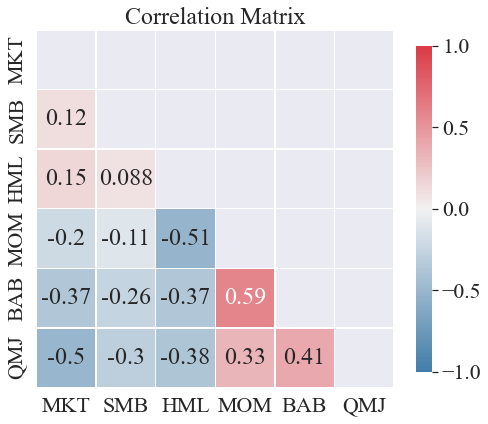

In [314]:
'''Plot the correlation matrix'''

sns.set(font="Times New Roman",font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))
correlation_plot(corr_matrix, names=factors_d_sub.columns, include_values=True, ax=ax)
ax.set_title('Correlation Matrix',)

In [440]:
'''Calculate optimal weights (tangency pf)'''
def sharpe_ratio(w: np.ndarray,factors):
    cov_matrix=factors.cov()
    mean=(factors@w)
    n = len(factors)
    mean_annualized=np.prod(mean+1) ** (252 / n) - 1
    std_annualized=np.sqrt(w@cov_matrix@w)*np.sqrt(252)
    sr=mean_annualized/std_annualized
    return -sr

opt_weights=[]

# define sum to one and maximum weight constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

bounds = [(0,1)] * 6


for i in np.arange(0,4785,63):
    if len(factors_d_sub[i:i+252])<248:
         break
    x0 = np.r_[np.ones(6) / 6]
    res = sci.optimize.minimize(sharpe_ratio, x0=x0, args=(factors_d_sub[i:i+252]),
                        method='SLSQP', constraints=sum_to_one_cons, options={'ftol': 1e-9, 'disp': True},bounds=bounds)
    opt_weights.append(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.6894580125218654
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8.215371311855034
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.66186464792044
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.229316621134821
            Iterations: 9
            Function evaluations: 70
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.462539618649362
            Iterations: 10
            Function evalu

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.426952712040056
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5.312742988899151
            Iterations: 5
            Function evaluations: 36
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.435445351647849
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.372781171260956
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.5872322011550017
            Iterations: 13
            Function eval

In [444]:
'''Calculate optimal weights (min_variance pf)'''
def pf_std(w: np.ndarray,factors):
    cov_matrix=factors.cov()
    #mean=(factors@w)
    #n = len(factors)
    #mean_annualized=np.prod(mean+1) ** (252 / n) - 1
    #print(mean_annualized)
    std_annualized=np.sqrt(w@cov_matrix@w)*np.sqrt(252)
    return std_annualized

opt_weights=[]

# define sum to one and maximum weight constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

bounds = [(0, 1)] * 6


for i in np.arange(0,4785,63):
    if len(factors_d_sub[i:i+252])<248:
         break
    x0 = np.r_[np.ones(6) / 6]
    res = sci.optimize.minimize(pf_std, x0=x0, args=(factors_d_sub[i:i+252]),
                        method='SLSQP', constraints=sum_to_one_cons, options={'ftol': 1e-9, 'disp': True},bounds=bounds)
    opt_weights.append(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.019232807717465005
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.017728813467492353
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.015464819620776704
            Iterations: 17
            Function evaluations: 119
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.01627126249528869
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.016723891155349894
            Iterations: 17
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.017501026853167814
            Iterations: 20
            Function evaluations: 140
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.016223161364824885
            Iterations: 18
            Function evaluations: 126
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.016777149298341187
            Iterations: 16
            Function evaluations: 112
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.016805720833454933
            Iterations: 14
            Function evaluations: 99
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.01662813856140186
            Iterations: 15
            

In [445]:
opt_weights

[array([1.70641126e-01, 1.44149648e-01, 3.52682878e-01, 3.39033143e-17,
        3.66482569e-17, 3.32526348e-01]),
 array([1.47757685e-01, 1.33846252e-01, 3.66396599e-01, 2.86297136e-17,
        0.00000000e+00, 3.51999465e-01]),
 array([8.74201162e-02, 1.09436105e-01, 3.47164792e-01, 7.16732075e-02,
        2.45745434e-18, 3.84305779e-01]),
 array([9.92008368e-02, 1.80416169e-01, 2.43219022e-01, 5.80139885e-02,
        1.17635936e-17, 4.19149984e-01]),
 array([0.09772065, 0.22752201, 0.21608472, 0.03785409, 0.        ,
        0.42081852]),
 array([0.0964121 , 0.24144805, 0.21576265, 0.        , 0.        ,
        0.4463772 ]),
 array([0.08689177, 0.23518492, 0.22616507, 0.        , 0.        ,
        0.45175824]),
 array([7.10163737e-02, 1.71459166e-01, 2.78887993e-01, 0.00000000e+00,
        1.85330809e-18, 4.78636468e-01]),
 array([0.05013054, 0.1713025 , 0.2920662 , 0.        , 0.03103267,
        0.45546809]),
 array([3.90767454e-02, 1.68868935e-01, 2.96740601e-01, 2.36152786e-18

In [446]:
'''Create weights dataframe'''
weights=[]
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))
weights.append(np.array([0,0,0,0]))

for index, row in enumerate(opt_weights[:-1]):
    weights.append(row)
    weights.append(row)
    weights.append(row)
weights
factor_weights=pd.DataFrame(weights[:],index=factors.index,columns = factors_d_sub.columns)
factor_weights.to_csv("/Users/alexandra/Documents/master_thesis/factor_weights.csv")

In [447]:
'''Calculate monthly factor portfolio returns'''

factor_pf_returns=((factor_weights*factors.iloc[:,:]).sum(axis=1))
#factor_pf_returns_min_variance=((factor_weights_min_variance*factors.iloc[:,:]).sum(axis=1))[13:]

'''Calculate annualized factor portfolio returns'''
factor_pf_returns_y_value=pf_return_annualized(factor_pf_returns[20:])
factor_pf_returns_y_momentum=pf_return_annualized(factor_pf_returns[28:])
factor_pf_returns_y_quality=pf_return_annualized(factor_pf_returns[37:])
factor_pf_returns_y_fundamentals=pf_return_annualized(factor_pf_returns[37:])
factor_pf_returns_y_lowvol=pf_return_annualized(factor_pf_returns[49:])
factor_pf_returns_y=pf_return_annualized(factor_pf_returns[13:])
multi_pf_returns_y_new=pf_return_annualized(multi_pf_return_m[7:])
equal_pf_returns_y_new=pf_return_annualized(equal_pf_return_m[12:])
dividend_pf_returns_y_new=pf_return_annualized(dividend_pf_return_m[4:])

print(factor_pf_returns_y_value,factor_pf_returns_y_momentum,factor_pf_returns_y_quality,
      factor_pf_returns_y_fundamentals,factor_pf_returns_y_lowvol,factor_pf_returns_y,"\n, ETFs:",
     value_pf_return_y,momentum_pf_return_y,quality_pf_return_y,fundamentals_pf_return_y,lowvol_pf_return_y,
     equal_pf_returns_y_new,dividend_pf_returns_y_new,multi_pf_returns_y_new)

0.013500084575334803 0.011661460017081016 0.012368425479874379 0.012368425479874379 0.011151482274738278 0.015090337814762877 
, ETFs: 0.07674777678863798 0.08850300573851477 0.08519559987636671 0.09075448300725619 0.09066572259200689 0.09826477305854331 0.07282990979304138 0.08795895245551377


In [409]:
'''Calculate annualized factor portfolio standard deviation'''

factor_pf_std_y_value=pf_std_annualized(factor_pf_returns[20:])
factor_pf_std_y_momentum=pf_std_annualized(factor_pf_returns[28:])
factor_pf_std_y_quality=pf_std_annualized(factor_pf_returns[37:])
factor_pf_std_y_fundamentals=pf_std_annualized(factor_pf_returns[37:])
factor_pf_std_y_lowvol=pf_std_annualized(factor_pf_returns[49:])
factor_pf_std_y=pf_std_annualized(factor_pf_returns[13:])
multi_pf_std_y_new=pf_std_annualized(multi_pf_return_m[7:])
equal_pf_std_y_new=pf_std_annualized(equal_pf_return_m[12:])
dividend_pf_std_y_new=pf_std_annualized(dividend_pf_return_m[4:])

print(factor_pf_std_y_value,factor_pf_std_y_momentum,factor_pf_std_y_quality,
      factor_pf_std_y_fundamentals,factor_pf_std_y_lowvol,factor_pf_std_y,"\n, ETFs:",
     value_pf_std_y,momentum_pf_std_y,quality_pf_std_y,fundamentals_pf_std_y,lowvol_pf_std_y,
     equal_pf_std_y_new,dividend_pf_std_y_new,multi_pf_std_y_new)

0.028118792396953047 0.028367718417655962 0.028756135956067897 0.028756135956067897 0.029215929267060136 0.028095590961911675 
, ETFs: 0.15937191640573917 0.16197254525261667 0.1568210962090775 0.17879583773087843 0.12710496558606646 0.16575298245078107 0.14358233847843863 0.1604123251993836


In [410]:
'''Calculate factor portfolio sharpe ratio'''

factor_pf_sr_value=sr(factor_pf_returns_y_value,factor_pf_std_y_value)
factor_pf_sr_momentum=sr(factor_pf_returns_y_momentum,factor_pf_std_y_momentum)
factor_pf_sr_quality=sr(factor_pf_returns_y_quality,factor_pf_std_y_quality)
factor_pf_sr_fundamentals=sr(factor_pf_returns_y_fundamentals,factor_pf_std_y_fundamentals)
factor_pf_sr_lowvol=sr(factor_pf_returns_y_lowvol,factor_pf_std_y_lowvol)
factor_pf_sr=sr(factor_pf_returns_y,factor_pf_std_y)
multi_sr_new=sr(multi_pf_returns_y_new,multi_pf_std_y_new)
equal_sr_new=sr(equal_pf_returns_y_new,equal_pf_std_y_new)
dividend_sr_new=sr(dividend_pf_returns_y_new,dividend_pf_std_y_new)

print(factor_pf_sr_value,factor_pf_sr_momentum,factor_pf_sr_quality,factor_pf_sr_fundamentals,
     factor_pf_sr_lowvol,factor_pf_sr,"\n, ETFs:",value_sr,momentum_sr,quality_sr,fundamentals_sr, lowvol_sr,
      multi_sr_new,equal_sr_new,dividend_sr_new)


0.909324468705239 0.8240153835284784 0.8022050837193153 0.8022050837193153 0.6634697311038233 0.9651489191400924 
, ETFs: 0.4815639952101009 0.5464074519572631 0.5432661927243639 0.50758722439534 0.71331377317918 0.5483303876194406 0.5928386422109913 0.507234459090371


In [411]:
'''Calculate t stat and p-value'''
def sr_stat(pf1,pf2,mu1,std1,mu2,std2):
    T=len(pf1)
    cov=np.cov((pf1,pf2))[0,1]
    theta=1/T*(2*(std1**2)*(std2**2)-2*std1*std2*cov+1/2*(mu1**2)*(std2**2)+
              1/2*(mu2**2)*(std1**2)-(mu1*mu2)/(2*std1*std2)*(cov**2+(std1**2)*(std2**2)))
    z=(std2*mu1-std1*mu2)/np.sqrt(theta)
    p=scipy.t.sf(abs(z),df=1)
    return z,p

value_st_stat=sr_stat(factor_pf_returns[20:],value_pf_return_m,factor_pf_returns_y_value,
                     factor_pf_std_y_value,value_pf_return_y,value_pf_std_y)
momentum_st_stat=sr_stat(factor_pf_returns[28:],momentum_pf_return_m,factor_pf_returns_y_momentum,
                     factor_pf_std_y_momentum,momentum_pf_return_y,momentum_pf_std_y)
quality_st_stat=sr_stat(factor_pf_returns[37:],quality_pf_return_m,factor_pf_returns_y_quality,
                     factor_pf_std_y_quality,quality_pf_return_y,quality_pf_std_y)
fundamentals_st_stat=sr_stat(factor_pf_returns[37:],fundamentals_pf_return_m,factor_pf_returns_y_fundamentals,
                     factor_pf_std_y_fundamentals,fundamentals_pf_return_y,fundamentals_pf_std_y)
lowvol_st_stat=sr_stat(factor_pf_returns[49:],lowvol_pf_return_m,factor_pf_returns_y_lowvol,
                     factor_pf_std_y_lowvol,lowvol_pf_return_y,lowvol_pf_std_y)
equal_st_stat=sr_stat(factor_pf_returns[13:],equal_pf_return_m[12:],factor_pf_returns_y,
                     factor_pf_std_y,equal_pf_returns_y_new,equal_pf_std_y_new)
dividend_st_stat=sr_stat(factor_pf_returns[13:],dividend_pf_return_m[4:],factor_pf_returns_y,
                     factor_pf_std_y,dividend_pf_returns_y_new,dividend_pf_std_y_new)
multi_st_stat=sr_stat(factor_pf_returns[13:],multi_pf_return_m[7:],factor_pf_returns_y,
                     factor_pf_std_y,multi_pf_returns_y_new,multi_pf_std_y_new)

print(value_st_stat,momentum_st_stat,quality_st_stat,fundamentals_st_stat,lowvol_st_stat,
     equal_st_stat,dividend_st_stat,multi_st_stat)

(4.10512641112606, 0.07605826938461657) (2.622352222844814, 0.11596500640989733) (2.4004044275400256, 0.12564687572671113) (2.7455832345701072, 0.11118168439496634) (-0.4514939852923481, 0.36500616806272557) (3.5805874573831113, 0.08668992424043559) (4.4364977766097455, 0.07056866835875934) (4.015966006925922, 0.07768130004093)


In [448]:
'''Six factor model'''
factors = pd.read_csv("/Users/alexandra/Documents/master_thesis/data/factors.csv",index_col='Date',parse_dates=True)
factor_pf=six_factors(factor_pf_returns[13:],factors.iloc[13:,1:],factors.iloc[13:,0])


 Breusch-Pagan test:  (35.84344687293378, 2.9566308609926886e-06, 6.930343143609739, 9.903866283664341e-07)

 VIF:     VIF Factor   features
0    1.187180  intercept
1    1.706722         BM
2    1.519517        SMB
3    1.267917        HML
4    1.516435        MOM
5    1.118747        BAB
6    2.136128        QMJ 

alpha:  const   -0.002584
x1       0.681353
x2       1.555449
x3       2.966962
x4       0.425776
x5       1.109474
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     95.01
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           5.86e-57
Time:                        13:04:46   Log-Likelihood:                 886.21
No. Observations:                 216   AIC:                            -175

# Assumptions

## Normality of Factor Returns

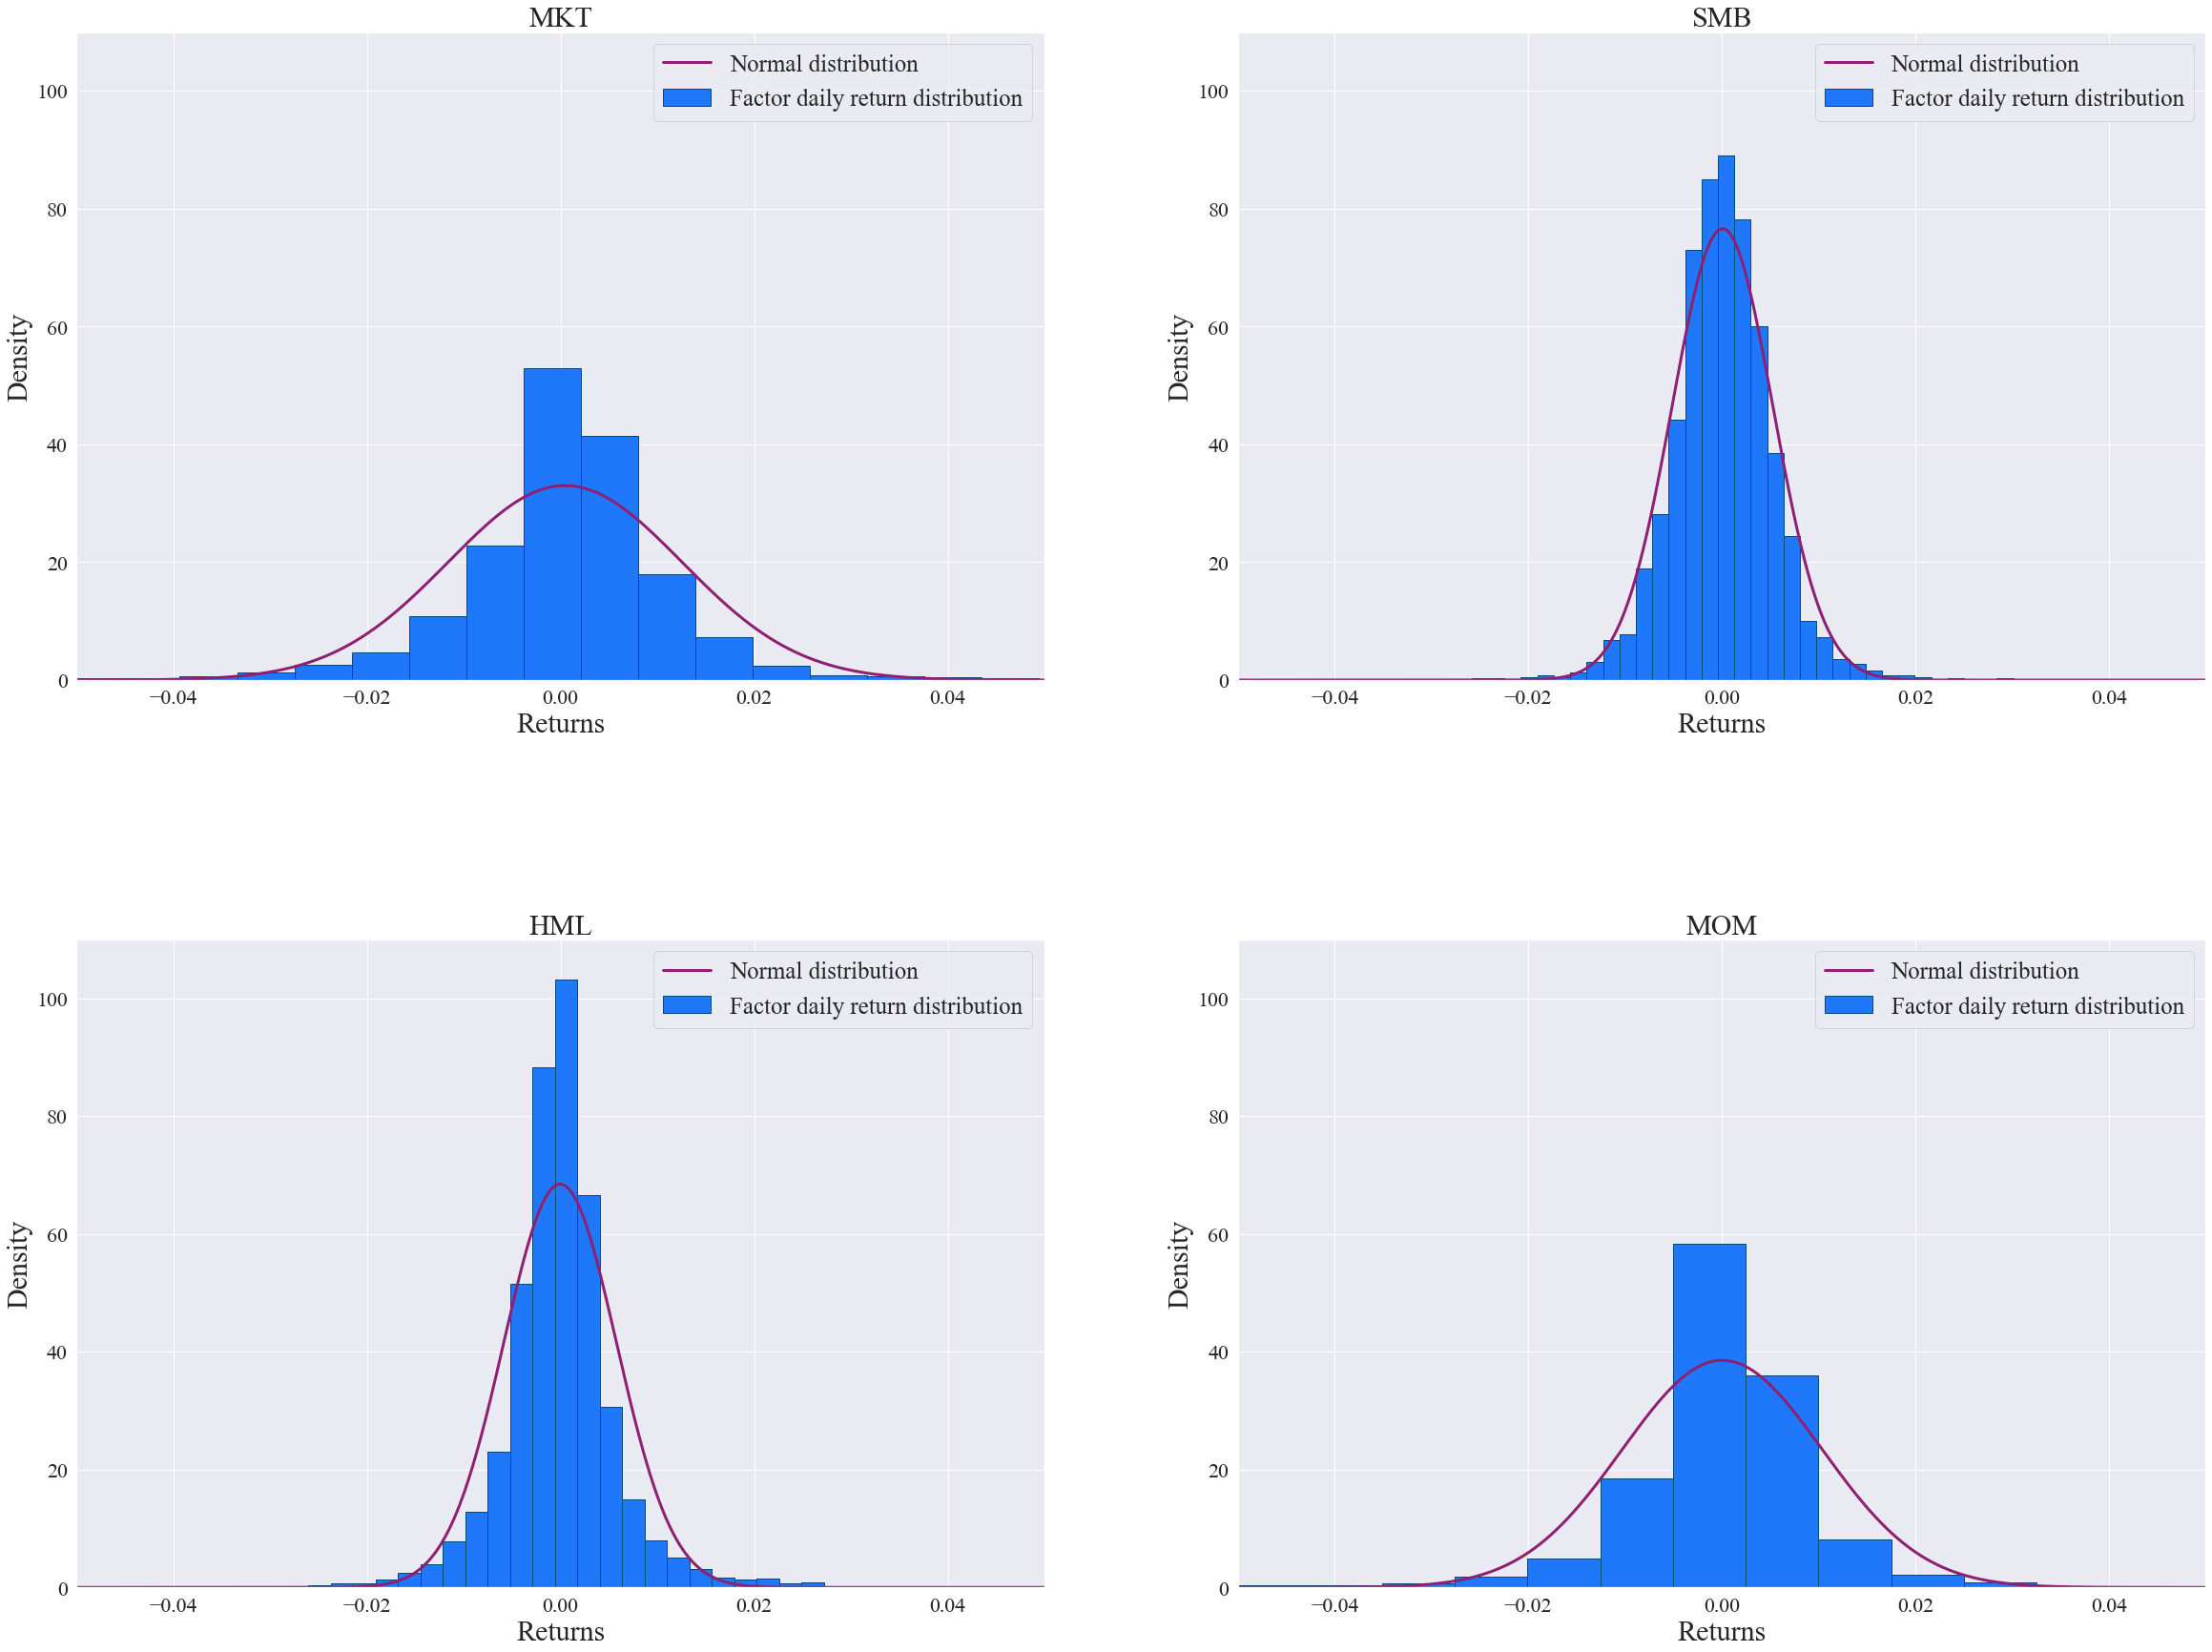

In [253]:
'''Plot the returns'''
x_values = np.linspace(-0.05, 0.05, 1000)

fig, ax = plt.subplots(2,2, figsize=(40,30))
ax=ax.flatten()

#etf_returns=[value_pf_return_m,quality_pf_return_m,momentum_pf_return_m,fundamentals_pf_return_m,
            #lowvol_pf_return_m,equal_pf_return_m,dividend_pf_return_m,multi_pf_return_m]
factor_d_list=[factors_d['MKT'],factors_d['SMB'],factors_d['HML'],factors_d['MOM']]
for count,i in enumerate(factor_d_list):
    ax[count].hist(i.values, bins = 40, color = '#1F77FA', edgecolor = '#014D7A', label= "Factor daily return distribution",density=True)
    ax[count].set_xlabel('Returns',fontsize=30);
    ax[count].set_ylabel('Density',fontsize=30);
    ax[count].set_title(i.name, fontsize=30)
    ax[count].plot(x_values, scipy.norm.pdf(x_values, loc=i.mean(), scale=i.std()), label="Normal distribution", color='#8F2071', linewidth = "3")

    ax[count].set_ylim([0, 110])
    ax[count].set_xlim([-0.05, 0.05])
    ax[count].legend(fontsize=25)

fig.subplots_adjust(hspace=0.4)
